In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm.notebook import tqdm, trange

# Tabular data processing

### Working with one layer for example (layer00002)

In [21]:
df = pd.read_csv('/Users/anastasiavolkova/Desktop/data_airi/Build_Command_Data/XYPT_Commands/T500_3D_Scan_Strategies_fused_layer0002.csv')

In [ ]:
df = pd.read_csv('/Users/anastasiavolkova/Desktop/data_airi/Build_Command_Data/XYPT_Commands/T500_3D_Scan_Strategies_fused_layer0002.csv')
# rows without trigger should be dropped because we don't have images for them
#drop rows without melt pool images
df2 = df.drop(df[df[' 0.000000.2'] == 0].index,inplace = True)

In [144]:
df_for_laser_layer_2 = pd.read_csv('/Users/anastasiavolkova/Desktop/data_airi/Build_Command_Data/XYPT_Commands/T500_3D_Scan_Strategies_fused_layer0002.csv')
df_for_laser_layer_2.drop(df_for_laser_layer_2[df_for_laser_layer_2[' 0.000000.2'] == 0].index,inplace = True)
df_for_laser_layer_2.drop(' 0.000000.2', axis = 1, inplace = True)

In [145]:
data_laser_2 = df_for_laser_layer_2.set_axis( ['X_las','Y_las','Power'], axis = 1)
data_laser_2.head()

X_las    Y_las  Power
218353 -38.77900 -0.42300  100.0
218403 -38.36468 -0.59884  100.0
218453 -37.95036 -0.77468  100.0
218503 -37.53604 -0.95052  100.0
218553 -37.12172 -1.12636  100.0

In [146]:
data_laser_2['Power'].value_counts()

195.0    2747
100.0     180
Name: Power, dtype: int64

Laser power has 2 imbalanced values, maybe it will be dropped

Last two rows were shot when the laser was turned off. So last two rows will be dropped

In [147]:
n = 2 #number of the empty and uninformative rows

In [148]:
data_laser_2.drop(data_laser_2.tail(n).index, inplace = True)

In [149]:
data_laser_2.shape

(2925, 3)

### All dataframes collecting

In [220]:
daframe_path = "/Users/anastasiavolkova/Desktop/data_airi/Build_Command_Data/XYPT_Commands/"
layer_names_df_ls = os.listdir("/Users/anastasiavolkova/Desktop/data_airi/Build_Command_Data/XYPT_Commands/")

In [225]:
#data_frame_commands = pd.DataFrame(columns = ['layer_num','frame_num','X','Y','Power'])

j = 0
for layer_name in tqdm(layer_names_df_ls):
    if layer_name != ".DS_Store":
        folder_layer_name = os.path.join(daframe_path,layer_name)
        #frame_name_ls = os.listdir(folder_layer_name)
        #df_command = pd.read_csv(folder_layer_name)
        
        j = j + 1
        
        #drop_num = 3
        #for frame_name in tqdm(frame_name_ls):
            #folder_frame_name = os.path.join(folder_layer_name,frame_name)
            #print(folder_frame_name)
            #im = plt.imread(folder_frame_name)
            #sum_im = np.sum(im)
            #im_argmax = np.unravel_index(np.argmax(im, axis = None), im.shape)
            #X_argmax = im_argmax[0]
            #Y_argmax = im_argmax[1]
            #i = i + 1
            #frames_layer2_df.loc[i] = [layer_name] + [frame_name]+[X_argmax] + [Y_argmax] + [sum_im]
            # drop first three rows because they are empty
            #frames_layer2_df = frames_layer2_df.iloc[3:]
            
#data_frame_images.head()  

print(j)

  0%|          | 0/249 [00:00<?, ?it/s]

249


# Image processing

### Layer MIA_L0002

First two  frames are empty, we will delete them

path for the images: data_airi --> In-Situ_Meas_Data --> Melt_Pool_Camera --> MIA_Lxxxx

where xxxx layer number from 0001 to 0250 --> frameyyyyy.bmp
where yyyyy number of picture
first two frames should be deleted, because the third frame describes the first row in XYPT dataframe

# Full dataset collecting

path_dataset_images = "/Users/anastasiavolkova/Desktop/data_airi/In-situ_Meas_Data/Melt_Pool_Camera"
layers = os.listdir(path_dataset_images)
layers

number_of_layer = ["{:04d}".format(n) for n in range(1,251)]
print(number_of_layer)

path_dataset_images_layer = "/Users/anastasiavolkova/Desktop/data_airi/In-situ_Meas_Data/Melt_Pool_Camera/MIA_L0002"

frames = os.listdir(path_dataset_images_layer)
number_of_frames = ["{:05d}".format(n) for n in range(1,len(frames)+1)] 
number_of_frames

### Dataset with all images creation

data_path = "/Users/anastasiavolkova/Desktop/data_airi/In-situ_Meas_Data/Melt_Pool_Camera/"
layer_names_ls = os.listdir("/Users/anastasiavolkova/Desktop/data_airi/In-situ_Meas_Data/Melt_Pool_Camera/")

data_frame_images = pd.DataFrame(columns = ['Layer','Frame','X_max','Y_max','sum_im'])


for layer_name in tqdm(layer_names_ls):
        folder_layer_name = os.path.join(data_path,layer_name)
        frame_name_ls = os.listdir(folder_layer_name)
        i = 0
        drop_num = 3
        for frame_name in tqdm(frame_name_ls):
            folder_frame_name = os.path.join(folder_layer_name,frame_name)
            #print(folder_frame_name)
            im = plt.imread(folder_frame_name)
            sum_im = np.sum(im)
            im_argmax = np.unravel_index(np.argmax(im, axis = None), im.shape)
            X_argmax = im_argmax[0]
            Y_argmax = im_argmax[1]
            i = i + 1
            frames_layer2_df.loc[i] = [layer_name] + [frame_name]+[X_argmax] + [Y_argmax] + [sum_im]
            # drop first three rows because they are empty
            frames_layer2_df = frames_layer2_df.iloc[3:]
            
data_frame_images.head()            
            
        
        

data_path = "/Users/anastasiavolkova/Desktop/data_airi/In-situ_Meas_Data/Melt_Pool_Camera/"
layer_names_ls = os.listdir("/Users/anastasiavolkova/Desktop/data_airi/In-situ_Meas_Data/Melt_Pool_Camera/")

#data_frame_images = pd.DataFrame(columns = ['Layer','Frame','X_max','Y_max','sum_im'])

i = 0
for layer_name in tqdm(layer_names_ls):
    if layer_name != ".DS_Store":
        folder_layer_name = os.path.join(data_path,layer_name)
        frame_name_ls = os.listdir(folder_layer_name)
        #drop_num = 3
        for frame_name in tqdm(frame_name_ls):
            #folder_frame_name = os.path.join(folder_layer_name,frame_name)
            #print(folder_frame_name)
            #im = plt.imread(folder_frame_name)
            #sum_im = np.sum(im)
            #im_argmax = np.unravel_index(np.argmax(im, axis = None), im.shape)
            #X_argmax = im_argmax[0]
            #Y_argmax = im_argmax[1]
            i = i + 1
            #frames_layer2_df.loc[i] = [layer_name] + [frame_name]+[X_argmax] + [Y_argmax] + [sum_im]
            # drop first three rows because they are empty
            #frames_layer2_df = frames_layer2_df.iloc[3:]
            
#data_frame_images.head()  

print(i)
            

In [216]:
# 1033611 frames in this 249 layers

In [174]:
#number_of_frames = ["{:05d}".format(n) for n in range(1,len(frames)+1)] 

In [177]:
#number_of_layers = ["{:04d}".format(n) for n in range(1,251)]

In [ ]:
# path for the laser coordinates and power: data_airi --> Build_Command_Data --> XYPT_Commands -->
# --> T500_3D_Scan_Strategies_fused_layer****.csv where **** is the layer number from 0001 to 0250


# Only one layer example

### Loading the dataframe

In [9]:
# images layer 2 pass

frames_layer2_df = pd.DataFrame(columns = ['Layer','Frame','X_max','Y_max','sum_im'])

layer2_frame_name = "/Users/anastasiavolkova/Desktop/data_airi/In-situ_Meas_Data/Melt_Pool_Camera/MIA_L0002"
layer2_frame_name_ls = os.listdir("/Users/anastasiavolkova/Desktop/data_airi/In-situ_Meas_Data/Melt_Pool_Camera/MIA_L0002")
i = 0
layer = 2
for frame_name in tqdm(layer2_frame_name_ls):
            folder_frame_name = os.path.join(layer2_frame_name,frame_name)
            #print(folder_frame_name)
            im = plt.imread(folder_frame_name)
            im_argmax = np.unravel_index(np.argmax(im, axis = None), im.shape)
            X_argmax = im_argmax[0]
            Y_argmax = im_argmax[1]
            sum_im = np.sum(im)
            i = i + 1
            #print(X_argmax,Y_argmax, sum_im)
            frames_layer2_df.loc[i] = [layer] + [frame_name]+[X_argmax] + [Y_argmax] + [sum_im]
frames_layer2_df.head()

  0%|          | 0/2927 [00:00<?, ?it/s]

Layer           Frame  X_max  Y_max  sum_im
1      2  frame01283.bmp     12    108   54828
2      2  frame00823.bmp     11    108   70252
3      2  frame00837.bmp     11    108   56000
4      2  frame01297.bmp    123     62   55269
5      2  frame00189.bmp     60     49  156048

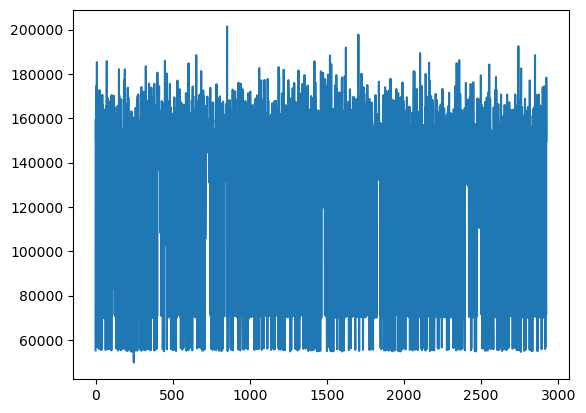

In [80]:
plt.plot(frames_layer2_df['sum_im'])

In [81]:
import seaborn as sns

/Users/anastasiavolkova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sum_im', ylabel='Density'>

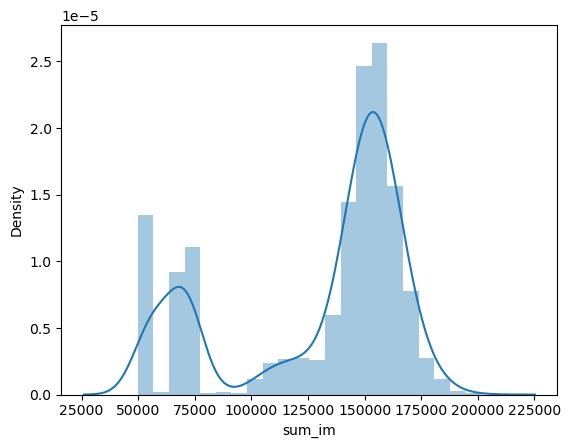

In [82]:
sns.distplot(frames_layer2_df['sum_im'])

In [10]:
 # drop first three rows because they are empty
frames_layer2_df = frames_layer2_df.iloc[3:]
frames_layer2_df.shape

In [12]:
daframe_path = "/Users/anastasiavolkova/Desktop/data_airi/Build_Command_Data/XYPT_Commands/"
layer_names_df_ls = os.listdir("/Users/anastasiavolkova/Desktop/data_airi/Build_Command_Data/XYPT_Commands/")

In [13]:
#data_frame_commands = pd.DataFrame(columns = ['layer_num','frame_num','X','Y','Power'])

layer_name = 'T500_3D_Scan_Strategies_fused_layer0002.csv'
folder_layer_name = os.path.join(daframe_path,layer_name)
df_command = pd.read_csv(folder_layer_name)
df_command.drop(df_command[df_command[' 0.000000.2'] == 0].index,inplace = True)
df_command.drop(' 0.000000.2', axis = 1, inplace = True)
df_command = df_command.set_axis( ['X_las','Y_las','Power'], axis = 1)


In [14]:
#drop last three rows because they are empty
n = 3
df_command.drop(df_command.tail(n).index,inplace=True)

df_command.tail()  

X_las     Y_las  Power
475234 -37.406507  2.811457  195.0
475284 -37.308891  3.041504  195.0
475334 -37.211274  3.271550  195.0
475384 -37.113657  3.501597  195.0
475434 -37.016040  3.731644  195.0

In [16]:
df_command.reset_index(drop=True, inplace=True)
frames_layer2_df.reset_index(drop=True, inplace=True)

In [18]:
# frames_layer2_df - name of the images df
# df_command - name of the commands df
#df_full = pd.DataFrame()
#df_full = frames_layer2_df.join(df_command)

result = pd.DataFrame()
result = pd.concat([df_command, frames_layer2_df], axis = 1)
result.head()

X_las    Y_las  Power  Layer           Frame  X_max  Y_max  sum_im
0 -38.77900 -0.42300  100.0      2  frame01297.bmp    123     62   55269
1 -38.36468 -0.59884  100.0      2  frame00189.bmp     60     49  156048
2 -37.95036 -0.77468  100.0      2  frame02749.bmp     65     49  159716
3 -37.53604 -0.95052  100.0      2  frame01240.bmp     62     53  149585
4 -37.12172 -1.12636  100.0      2  frame01526.bmp     63     43  157030

In [21]:
result = result.drop(['Layer','Frame'], axis =1)
result.shape

# Dataset with 5 values in row

In [23]:
df1 = result
df1.columns = ['X_las1','Y_las1','Power1','X_max1','Y_max1','sum_im1']
df1 = df1[:-4]
df1.reset_index(drop=True, inplace=True)

df2 = result.iloc[1:]
df2.columns = ['X_las2','Y_las2','Power2','X_max2','Y_max2','sum_im2']
df2 = df2[:-3]
df2.reset_index(drop=True, inplace=True)

df3 = result.iloc[2:]
df3.columns = ['X_las3','Y_las3','Power3','X_max3','Y_max3','sum_im3']
df3 = df3[:-2]
df3.reset_index(drop=True, inplace=True)

df4 = result.iloc[3:]
df4.columns = ['X_las4','Y_las4','Power4','X_max4','Y_max4','sum_im4']
df4 = df4[:-1]
df4.reset_index(drop=True, inplace=True)

df5 = result.iloc[4:]
df5.columns = ['X_las5','Y_las5','Power5','X_max5','Y_max5','sum_im5']
df5.reset_index(drop=True, inplace=True)

final = pd.concat([df1, df2, df3, df4, df5], axis = 1)
final.head()

# Train Val Test Split

In [30]:
end_train = '1863'
start_validation = '1868'
end_validation = '2336'
start_test = '2341'
data_train = final.loc[: end_train, :]
data_val   = final.loc[start_validation:end_validation, :]
data_test  = final.loc[start_test:, :]


train_labels = data_train['sum_im5']
data_train = data_train.iloc[:,:-1]

val_labels = data_val['sum_im5']
data_val = data_val.iloc[:,:-1]

test_labels = data_test['sum_im5']
data_test = data_test.iloc[:,:-1]

In [31]:
data_train.head()

X_las1   Y_las1  Power1  X_max1  Y_max1  sum_im1    X_las2   Y_las2  \
0 -38.77900 -0.42300   100.0     123      62    55269 -38.36468 -0.59884   
1 -38.36468 -0.59884   100.0      60      49   156048 -37.95036 -0.77468   
2 -37.95036 -0.77468   100.0      65      49   159716 -37.53604 -0.95052   
3 -37.53604 -0.95052   100.0      62      53   149585 -37.12172 -1.12636   
4 -37.12172 -1.12636   100.0      63      43   157030 -36.70740 -1.30220   

   Power2  X_max2  ...  Power4  X_max4  Y_max4  sum_im4    X_las5   Y_las5  \
0   100.0      60  ...   100.0      62      53   149585 -37.12172 -1.12636   
1   100.0      65  ...   100.0      63      43   157030 -36.70740 -1.30220   
2   100.0      62  ...   100.0     122      30    71173 -36.29308 -1.47804   
3   100.0      63  ...   100.0      63      47   145197 -35.87876 -1.65388   
4   100.0     122  ...   100.0      65      47   174697 -35.46444 -1.82972   

   Power5  X_max5  Y_max5  sum_im5  
0   100.0      63      43   157030  
1   100.0     122      30    71173  
2   100.0      63      47   145197  
3   100.0      65      47   174697  
4   100.0      64      50   113976  

[5 rows x 30 columns]

In [32]:
train_labels = data_train['sum_im5']
train_labels.shape

(1864,)

In [33]:
data_train = data_train.iloc[:,:-1]
data_train.head()

X_las1   Y_las1  Power1  X_max1  Y_max1  sum_im1    X_las2   Y_las2  \
0 -38.77900 -0.42300   100.0     123      62    55269 -38.36468 -0.59884   
1 -38.36468 -0.59884   100.0      60      49   156048 -37.95036 -0.77468   
2 -37.95036 -0.77468   100.0      65      49   159716 -37.53604 -0.95052   
3 -37.53604 -0.95052   100.0      62      53   149585 -37.12172 -1.12636   
4 -37.12172 -1.12636   100.0      63      43   157030 -36.70740 -1.30220   

   Power2  X_max2  ...   Y_las4  Power4  X_max4  Y_max4  sum_im4    X_las5  \
0   100.0      60  ... -0.95052   100.0      62      53   149585 -37.12172   
1   100.0      65  ... -1.12636   100.0      63      43   157030 -36.70740   
2   100.0      62  ... -1.30220   100.0     122      30    71173 -36.29308   
3   100.0      63  ... -1.47804   100.0      63      47   145197 -35.87876   
4   100.0     122  ... -1.65388   100.0      65      47   174697 -35.46444   

    Y_las5  Power5  X_max5  Y_max5  
0 -1.12636   100.0      63      43  
1 -1.30220   100.0     122      30  
2 -1.47804   100.0      63      47  
3 -1.65388   100.0      65      47  
4 -1.82972   100.0      64      50  

[5 rows x 29 columns]

In [34]:
train_labels.head()

0    157030
1     71173
2    145197
3    174697
4    113976
Name: sum_im5, dtype: int64

In [35]:
data_val.tail()

X_las1    Y_las1  Power1  X_max1  Y_max1  sum_im1     X_las2  \
2332 -42.361931  4.183371   195.0      64      43   156455 -42.639903   
2333 -42.639903  4.471216   195.0      65      48   173654 -42.562290   
2334 -42.562290  4.246905   195.0      65      50   148717 -42.284552   
2335 -42.284552  3.959297   195.0      65      48   162477 -42.006813   
2336 -42.006813  3.671689   195.0      64      49   158321 -41.729074   

        Y_las2  Power2  X_max2  ...  Power4  X_max4  Y_max4  sum_im4  \
2332  4.471216   195.0      65  ...   195.0      65      48   162477   
2333  4.246905   195.0      65  ...   195.0      64      49   158321   
2334  3.959297   195.0      65  ...   195.0      65      50   160705   
2335  3.671689   195.0      64  ...   195.0      12     108    55296   
2336  3.384082   195.0      65  ...   195.0      59      51   151842   

         X_las5    Y_las5  Power5  X_max5  Y_max5  sum_im5  
2332 -42.006813  3.671689   195.0      64      49   158321  
2333 -41.729074  3.384082   195.0      65      50   160705  
2334 -41.451336  3.096474   195.0      12     108    55296  
2335 -41.173597  2.808866   195.0      59      51   151842  
2336 -40.895859  2.521258   195.0      12     108    70660  

[5 rows x 30 columns]

In [36]:
val_labels = data_val['sum_im5']
val_labels.shape

(469,)

In [37]:
data_val = data_val.iloc[:,:-1]
data_val.head()

X_las1    Y_las1  Power1  X_max1  Y_max1  sum_im1     X_las2  \
1868 -42.658793 -1.466085   195.0      62      50   108295 -42.665769   
1869 -42.665769 -1.865888   195.0      64      50   152458 -42.672744   
1870 -42.672744 -2.265691   195.0     123      62    55797 -42.679719   
1871 -42.679719 -2.665494   195.0      60      49   120121 -42.686694   
1872 -42.686694 -3.065298   195.0      27      79    55303 -42.693669   

        Y_las2  Power2  X_max2  ...    Y_las4  Power4  X_max4  Y_max4  \
1868 -1.865888   195.0      64  ... -2.665494   195.0      60      49   
1869 -2.265691   195.0     123  ... -3.065298   195.0      27      79   
1870 -2.665494   195.0      60  ... -3.465101   195.0      11     108   
1871 -3.065298   195.0      27  ... -3.864904   195.0      60      57   
1872 -3.465101   195.0      11  ... -4.264707   195.0      65      48   

      sum_im4     X_las5    Y_las5  Power5  X_max5  Y_max5  
1868   120121 -42.686694 -3.065298   195.0      27      79  
1869    55303 -42.693669 -3.465101   195.0      11     108  
1870    55917 -42.700644 -3.864904   195.0      60      57  
1871   162185 -42.707619 -4.264707   195.0      65      48  
1872   157354 -42.714594 -4.664510   195.0      62      49  

[5 rows x 29 columns]

In [38]:
data_val.shape

(469, 29)

In [39]:
data_test.head()

X_las1    Y_las1  Power1  X_max1  Y_max1  sum_im1     X_las2  \
2341 -40.618120  2.233650   195.0      64      47   184852 -40.340382   
2342 -40.340382  1.946042   195.0      59      44   157300 -40.062643   
2343 -40.062643  1.658435   195.0      65      48   155575 -39.784904   
2344 -39.784904  1.370827   195.0      65      48   158871 -39.507166   
2345 -39.507166  1.083219   195.0      65      49   102718 -39.229427   

        Y_las2  Power2  X_max2  ...  Power4  X_max4  Y_max4  sum_im4  \
2341  1.946042   195.0      59  ...   195.0      65      48   158871   
2342  1.658435   195.0      65  ...   195.0      65      49   102718   
2343  1.370827   195.0      65  ...   195.0      67      50    97602   
2344  1.083219   195.0      65  ...   195.0      65      49   158102   
2345  0.795611   195.0      67  ...   195.0      12     108    70587   

         X_las5    Y_las5  Power5  X_max5  Y_max5  sum_im5  
2341 -39.507166  1.083219   195.0      65      49   102718  
2342 -39.229427  0.795611   195.0      67      50    97602  
2343 -38.951689  0.508003   195.0      65      49   158102  
2344 -38.673950  0.220395   195.0      12     108    70587  
2345 -38.755311  0.160643   195.0      64      49   131103  

[5 rows x 30 columns]

In [40]:
test_labels = data_test['sum_im5']
test_labels.shape

(579,)

In [41]:
test_labels = data_test['sum_im5']
data_test = data_test.iloc[:,:-1]
data_test.head()

X_las1    Y_las1  Power1  X_max1  Y_max1  sum_im1     X_las2  \
2341 -40.618120  2.233650   195.0      64      47   184852 -40.340382   
2342 -40.340382  1.946042   195.0      59      44   157300 -40.062643   
2343 -40.062643  1.658435   195.0      65      48   155575 -39.784904   
2344 -39.784904  1.370827   195.0      65      48   158871 -39.507166   
2345 -39.507166  1.083219   195.0      65      49   102718 -39.229427   

        Y_las2  Power2  X_max2  ...    Y_las4  Power4  X_max4  Y_max4  \
2341  1.946042   195.0      59  ...  1.370827   195.0      65      48   
2342  1.658435   195.0      65  ...  1.083219   195.0      65      49   
2343  1.370827   195.0      65  ...  0.795611   195.0      67      50   
2344  1.083219   195.0      65  ...  0.508003   195.0      65      49   
2345  0.795611   195.0      67  ...  0.220395   195.0      12     108   

      sum_im4     X_las5    Y_las5  Power5  X_max5  Y_max5  
2341   158871 -39.507166  1.083219   195.0      65      49  
2342   102718 -39.229427  0.795611   195.0      67      50  
2343    97602 -38.951689  0.508003   195.0      65      49  
2344   158102 -38.673950  0.220395   195.0      12     108  
2345    70587 -38.755311  0.160643   195.0      64      49  

[5 rows x 29 columns]

In [42]:
data_test.shape

(579, 29)

# CatBoost

In [43]:
from catboost import CatBoostRegressor
from catboost import Pool, cv

In [44]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


%%bash
conda install -c conda-forge catboost

%%bash
conda update -n base -c defaults conda

%%bash
conda install conda=24.7.1

In [59]:
model = CatBoostRegressor(iterations = 25000, learning_rate = 0.5, random_seed = 42, depth = 2)

model.fit(data_train, train_labels, plot = True)
preds = model.predict(data_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 23671.2379093	total: 3.6ms	remaining: 1m 29s
1:	learn: 17404.7664247	total: 4.32ms	remaining: 54s
2:	learn: 15429.0160432	total: 4.76ms	remaining: 39.7s
3:	learn: 14625.9039240	total: 5.2ms	remaining: 32.5s
4:	learn: 14339.3918904	total: 5.62ms	remaining: 28.1s
5:	learn: 14120.5489249	total: 6.07ms	remaining: 25.3s
6:	learn: 13980.7390502	total: 6.47ms	remaining: 23.1s
7:	learn: 13849.1853131	total: 6.85ms	remaining: 21.4s
8:	learn: 13773.8492326	total: 7.29ms	remaining: 20.2s
9:	learn: 13754.6683475	total: 7.68ms	remaining: 19.2s
10:	learn: 13727.7770091	total: 8.08ms	remaining: 18.4s
11:	learn: 13680.0367993	total: 8.52ms	remaining: 17.7s
12:	learn: 13655.6452113	total: 8.91ms	remaining: 17.1s
13:	learn: 13628.5356309	total: 9.31ms	remaining: 16.6s
14:	learn: 13531.0976789	total: 9.74ms	remaining: 16.2s
15:	learn: 13399.7776824	total: 10.2ms	remaining: 15.9s
16:	learn: 13361.2567275	total: 10.6ms	remaining: 15.5s
17:	learn: 13328.0157150	total: 11ms	remaining: 15.3s
18:	lea

405:	learn: 8366.3463056	total: 190ms	remaining: 11.5s
406:	learn: 8359.1112595	total: 190ms	remaining: 11.5s
407:	learn: 8355.7469399	total: 191ms	remaining: 11.5s
408:	learn: 8353.1231019	total: 191ms	remaining: 11.5s
409:	learn: 8338.8600975	total: 192ms	remaining: 11.5s
410:	learn: 8328.7678116	total: 193ms	remaining: 11.5s
411:	learn: 8317.6887926	total: 193ms	remaining: 11.5s
412:	learn: 8317.0434125	total: 194ms	remaining: 11.5s
413:	learn: 8307.2447688	total: 194ms	remaining: 11.5s
414:	learn: 8302.1371334	total: 195ms	remaining: 11.5s
415:	learn: 8294.4039695	total: 195ms	remaining: 11.5s
416:	learn: 8293.5050411	total: 195ms	remaining: 11.5s
417:	learn: 8292.8982697	total: 196ms	remaining: 11.5s
418:	learn: 8283.9143543	total: 196ms	remaining: 11.5s
419:	learn: 8276.6336419	total: 197ms	remaining: 11.5s
420:	learn: 8274.1603947	total: 197ms	remaining: 11.5s
421:	learn: 8269.1886334	total: 198ms	remaining: 11.5s
422:	learn: 8261.2654861	total: 198ms	remaining: 11.5s
423:	learn

628:	learn: 7059.5679244	total: 376ms	remaining: 14.6s
629:	learn: 7054.9246525	total: 377ms	remaining: 14.6s
630:	learn: 7050.0807099	total: 378ms	remaining: 14.6s
631:	learn: 7045.8337085	total: 379ms	remaining: 14.6s
632:	learn: 7038.5020432	total: 381ms	remaining: 14.6s
633:	learn: 7037.9645945	total: 383ms	remaining: 14.7s
634:	learn: 7033.4368792	total: 384ms	remaining: 14.7s
635:	learn: 7029.1761432	total: 384ms	remaining: 14.7s
636:	learn: 7024.6924298	total: 385ms	remaining: 14.7s
637:	learn: 7019.5665916	total: 386ms	remaining: 14.8s
638:	learn: 7015.2005798	total: 388ms	remaining: 14.8s
639:	learn: 7007.9471251	total: 389ms	remaining: 14.8s
640:	learn: 7001.7505686	total: 391ms	remaining: 14.8s
641:	learn: 6999.4273754	total: 391ms	remaining: 14.8s
642:	learn: 6994.6286964	total: 392ms	remaining: 14.9s
643:	learn: 6990.1049377	total: 393ms	remaining: 14.9s
644:	learn: 6982.9856591	total: 394ms	remaining: 14.9s
645:	learn: 6979.6409817	total: 395ms	remaining: 14.9s
646:	learn

850:	learn: 6099.8159144	total: 564ms	remaining: 16s
851:	learn: 6096.5938256	total: 565ms	remaining: 16s
852:	learn: 6094.3494800	total: 566ms	remaining: 16s
853:	learn: 6092.3931626	total: 567ms	remaining: 16s
854:	learn: 6088.0215536	total: 568ms	remaining: 16s
855:	learn: 6084.2824093	total: 569ms	remaining: 16s
856:	learn: 6082.9475507	total: 569ms	remaining: 16s
857:	learn: 6078.0073606	total: 570ms	remaining: 16s
858:	learn: 6077.2156381	total: 571ms	remaining: 16.1s
859:	learn: 6076.1795523	total: 572ms	remaining: 16.1s
860:	learn: 6072.5871366	total: 573ms	remaining: 16.1s
861:	learn: 6070.0926906	total: 574ms	remaining: 16.1s
862:	learn: 6066.8318382	total: 575ms	remaining: 16.1s
863:	learn: 6063.1059518	total: 576ms	remaining: 16.1s
864:	learn: 6061.5967790	total: 577ms	remaining: 16.1s
865:	learn: 6057.4958512	total: 578ms	remaining: 16.1s
866:	learn: 6049.7993710	total: 579ms	remaining: 16.1s
867:	learn: 6048.1696332	total: 580ms	remaining: 16.1s
868:	learn: 6044.0323484	t

1064:	learn: 5378.1410313	total: 748ms	remaining: 16.8s
1065:	learn: 5370.8774070	total: 749ms	remaining: 16.8s
1066:	learn: 5366.8192347	total: 750ms	remaining: 16.8s
1067:	learn: 5364.9131655	total: 751ms	remaining: 16.8s
1068:	learn: 5362.9919533	total: 752ms	remaining: 16.8s
1069:	learn: 5359.3988433	total: 753ms	remaining: 16.8s
1070:	learn: 5357.1765169	total: 754ms	remaining: 16.8s
1071:	learn: 5352.6838906	total: 755ms	remaining: 16.8s
1072:	learn: 5348.9423144	total: 755ms	remaining: 16.8s
1073:	learn: 5346.5747609	total: 756ms	remaining: 16.8s
1074:	learn: 5344.5467518	total: 757ms	remaining: 16.8s
1075:	learn: 5340.1281901	total: 758ms	remaining: 16.8s
1076:	learn: 5339.2631004	total: 758ms	remaining: 16.8s
1077:	learn: 5337.9341705	total: 759ms	remaining: 16.8s
1078:	learn: 5331.3779142	total: 760ms	remaining: 16.9s
1079:	learn: 5326.8546831	total: 761ms	remaining: 16.9s
1080:	learn: 5322.9286095	total: 762ms	remaining: 16.9s
1081:	learn: 5321.8942184	total: 762ms	remaining

1264:	learn: 4793.1425790	total: 922ms	remaining: 17.3s
1265:	learn: 4791.3704917	total: 923ms	remaining: 17.3s
1266:	learn: 4788.3335631	total: 923ms	remaining: 17.3s
1267:	learn: 4786.9367336	total: 924ms	remaining: 17.3s
1268:	learn: 4786.2815079	total: 925ms	remaining: 17.3s
1269:	learn: 4785.6516983	total: 926ms	remaining: 17.3s
1270:	learn: 4783.0932576	total: 926ms	remaining: 17.3s
1271:	learn: 4778.0722294	total: 927ms	remaining: 17.3s
1272:	learn: 4776.3826987	total: 928ms	remaining: 17.3s
1273:	learn: 4774.6157325	total: 928ms	remaining: 17.3s
1274:	learn: 4774.3934777	total: 929ms	remaining: 17.3s
1275:	learn: 4771.6171004	total: 929ms	remaining: 17.3s
1276:	learn: 4769.5026151	total: 930ms	remaining: 17.3s
1277:	learn: 4768.1358980	total: 931ms	remaining: 17.3s
1278:	learn: 4767.5365586	total: 932ms	remaining: 17.3s
1279:	learn: 4764.5867289	total: 933ms	remaining: 17.3s
1280:	learn: 4758.3241942	total: 933ms	remaining: 17.3s
1281:	learn: 4755.8837032	total: 934ms	remaining

1490:	learn: 4290.8245156	total: 1.11s	remaining: 17.5s
1491:	learn: 4288.5042057	total: 1.11s	remaining: 17.5s
1492:	learn: 4286.4004504	total: 1.11s	remaining: 17.5s
1493:	learn: 4286.3015599	total: 1.11s	remaining: 17.5s
1494:	learn: 4285.7006672	total: 1.11s	remaining: 17.5s
1495:	learn: 4281.7881047	total: 1.11s	remaining: 17.5s
1496:	learn: 4280.9358061	total: 1.11s	remaining: 17.5s
1497:	learn: 4279.9771658	total: 1.11s	remaining: 17.5s
1498:	learn: 4279.7527583	total: 1.11s	remaining: 17.5s
1499:	learn: 4277.1752360	total: 1.11s	remaining: 17.5s
1500:	learn: 4274.6262102	total: 1.12s	remaining: 17.5s
1501:	learn: 4272.3348759	total: 1.12s	remaining: 17.5s
1502:	learn: 4267.5937170	total: 1.12s	remaining: 17.5s
1503:	learn: 4266.3058272	total: 1.12s	remaining: 17.5s
1504:	learn: 4265.8897017	total: 1.12s	remaining: 17.5s
1505:	learn: 4263.9780524	total: 1.12s	remaining: 17.5s
1506:	learn: 4261.0594210	total: 1.12s	remaining: 17.5s
1507:	learn: 4260.6675866	total: 1.12s	remaining

1675:	learn: 3912.9597882	total: 1.29s	remaining: 18s
1676:	learn: 3911.0801461	total: 1.29s	remaining: 18s
1677:	learn: 3910.6652282	total: 1.29s	remaining: 18s
1678:	learn: 3906.4500102	total: 1.29s	remaining: 18s
1679:	learn: 3904.7731819	total: 1.3s	remaining: 18s
1680:	learn: 3904.6729703	total: 1.3s	remaining: 18s
1681:	learn: 3902.8904242	total: 1.3s	remaining: 18s
1682:	learn: 3902.6759789	total: 1.3s	remaining: 18s
1683:	learn: 3901.5291644	total: 1.3s	remaining: 18s
1684:	learn: 3898.9856862	total: 1.3s	remaining: 18s
1685:	learn: 3898.0615274	total: 1.3s	remaining: 18s
1686:	learn: 3895.7168832	total: 1.3s	remaining: 18s
1687:	learn: 3893.4965287	total: 1.3s	remaining: 18s
1688:	learn: 3892.2646784	total: 1.3s	remaining: 18s
1689:	learn: 3891.9218162	total: 1.3s	remaining: 18s
1690:	learn: 3887.4632795	total: 1.31s	remaining: 18s
1691:	learn: 3887.1160629	total: 1.31s	remaining: 18s
1692:	learn: 3884.3794314	total: 1.31s	remaining: 18s
1693:	learn: 3883.4875038	total: 1.31s	

1916:	learn: 3479.0638689	total: 1.48s	remaining: 17.8s
1917:	learn: 3476.1054253	total: 1.48s	remaining: 17.8s
1918:	learn: 3472.7624905	total: 1.48s	remaining: 17.8s
1919:	learn: 3472.2924292	total: 1.48s	remaining: 17.8s
1920:	learn: 3471.1758383	total: 1.48s	remaining: 17.8s
1921:	learn: 3469.0040226	total: 1.48s	remaining: 17.8s
1922:	learn: 3467.3337325	total: 1.48s	remaining: 17.8s
1923:	learn: 3465.2033492	total: 1.48s	remaining: 17.8s
1924:	learn: 3463.0425971	total: 1.49s	remaining: 17.8s
1925:	learn: 3461.9869158	total: 1.49s	remaining: 17.8s
1926:	learn: 3459.8881608	total: 1.49s	remaining: 17.8s
1927:	learn: 3459.6417853	total: 1.49s	remaining: 17.8s
1928:	learn: 3457.2982380	total: 1.49s	remaining: 17.8s
1929:	learn: 3456.3164381	total: 1.49s	remaining: 17.8s
1930:	learn: 3456.1290663	total: 1.49s	remaining: 17.8s
1931:	learn: 3454.5846797	total: 1.49s	remaining: 17.8s
1932:	learn: 3452.4896250	total: 1.49s	remaining: 17.8s
1933:	learn: 3450.8318007	total: 1.49s	remaining

2166:	learn: 3109.8815673	total: 1.66s	remaining: 17.5s
2167:	learn: 3107.8469198	total: 1.67s	remaining: 17.5s
2168:	learn: 3105.3415368	total: 1.67s	remaining: 17.5s
2169:	learn: 3104.7190247	total: 1.67s	remaining: 17.5s
2170:	learn: 3103.1471931	total: 1.67s	remaining: 17.5s
2171:	learn: 3101.5030768	total: 1.67s	remaining: 17.5s
2172:	learn: 3100.4225397	total: 1.67s	remaining: 17.5s
2173:	learn: 3099.8141672	total: 1.67s	remaining: 17.5s
2174:	learn: 3098.7881985	total: 1.67s	remaining: 17.5s
2175:	learn: 3096.8827470	total: 1.67s	remaining: 17.5s
2176:	learn: 3094.8612773	total: 1.67s	remaining: 17.5s
2177:	learn: 3093.9407696	total: 1.67s	remaining: 17.5s
2178:	learn: 3093.0650501	total: 1.67s	remaining: 17.5s
2179:	learn: 3092.7876269	total: 1.67s	remaining: 17.5s
2180:	learn: 3091.2790824	total: 1.68s	remaining: 17.5s
2181:	learn: 3088.3293003	total: 1.68s	remaining: 17.5s
2182:	learn: 3085.9582483	total: 1.68s	remaining: 17.5s
2183:	learn: 3085.1035124	total: 1.68s	remaining

2413:	learn: 2814.2740046	total: 1.84s	remaining: 17.3s
2414:	learn: 2813.5069204	total: 1.84s	remaining: 17.3s
2415:	learn: 2813.0265754	total: 1.85s	remaining: 17.3s
2416:	learn: 2812.4847314	total: 1.85s	remaining: 17.3s
2417:	learn: 2812.3897300	total: 1.85s	remaining: 17.3s
2418:	learn: 2809.9906272	total: 1.85s	remaining: 17.3s
2419:	learn: 2808.0703161	total: 1.85s	remaining: 17.3s
2420:	learn: 2807.7532265	total: 1.85s	remaining: 17.3s
2421:	learn: 2806.7232171	total: 1.85s	remaining: 17.3s
2422:	learn: 2806.3645562	total: 1.85s	remaining: 17.2s
2423:	learn: 2804.5579430	total: 1.85s	remaining: 17.2s
2424:	learn: 2803.5838771	total: 1.85s	remaining: 17.2s
2425:	learn: 2802.7259813	total: 1.85s	remaining: 17.2s
2426:	learn: 2800.9515035	total: 1.85s	remaining: 17.2s
2427:	learn: 2799.0740266	total: 1.85s	remaining: 17.2s
2428:	learn: 2797.3716770	total: 1.85s	remaining: 17.2s
2429:	learn: 2797.3372366	total: 1.86s	remaining: 17.2s
2430:	learn: 2795.0961113	total: 1.86s	remaining

2629:	learn: 2553.2259796	total: 2.03s	remaining: 17.3s
2630:	learn: 2552.1609562	total: 2.03s	remaining: 17.3s
2631:	learn: 2551.6050019	total: 2.04s	remaining: 17.3s
2632:	learn: 2550.6661146	total: 2.04s	remaining: 17.3s
2633:	learn: 2550.2403512	total: 2.04s	remaining: 17.3s
2634:	learn: 2546.2719537	total: 2.04s	remaining: 17.3s
2635:	learn: 2545.1956085	total: 2.04s	remaining: 17.3s
2636:	learn: 2544.7975967	total: 2.05s	remaining: 17.4s
2637:	learn: 2543.7232244	total: 2.05s	remaining: 17.4s
2638:	learn: 2542.0707818	total: 2.05s	remaining: 17.4s
2639:	learn: 2541.9392303	total: 2.05s	remaining: 17.4s
2640:	learn: 2540.6029453	total: 2.05s	remaining: 17.4s
2641:	learn: 2538.2833211	total: 2.05s	remaining: 17.4s
2642:	learn: 2536.8915932	total: 2.05s	remaining: 17.4s
2643:	learn: 2536.1558298	total: 2.05s	remaining: 17.4s
2644:	learn: 2534.8821710	total: 2.05s	remaining: 17.4s
2645:	learn: 2534.7914836	total: 2.06s	remaining: 17.4s
2646:	learn: 2533.7005176	total: 2.06s	remaining

2812:	learn: 2378.6116262	total: 2.21s	remaining: 17.5s
2813:	learn: 2376.2724010	total: 2.22s	remaining: 17.5s
2814:	learn: 2375.3977466	total: 2.22s	remaining: 17.5s
2815:	learn: 2374.2931839	total: 2.22s	remaining: 17.5s
2816:	learn: 2374.1110203	total: 2.22s	remaining: 17.5s
2817:	learn: 2372.6739506	total: 2.22s	remaining: 17.5s
2818:	learn: 2371.3292590	total: 2.22s	remaining: 17.5s
2819:	learn: 2370.7131506	total: 2.22s	remaining: 17.5s
2820:	learn: 2369.2203162	total: 2.22s	remaining: 17.5s
2821:	learn: 2368.9632245	total: 2.22s	remaining: 17.5s
2822:	learn: 2368.1334909	total: 2.22s	remaining: 17.5s
2823:	learn: 2367.7954266	total: 2.23s	remaining: 17.5s
2824:	learn: 2366.9222467	total: 2.23s	remaining: 17.5s
2825:	learn: 2366.2961439	total: 2.23s	remaining: 17.5s
2826:	learn: 2364.6396786	total: 2.23s	remaining: 17.5s
2827:	learn: 2363.6157998	total: 2.23s	remaining: 17.5s
2828:	learn: 2361.5173770	total: 2.23s	remaining: 17.5s
2829:	learn: 2360.0608267	total: 2.23s	remaining

3019:	learn: 2188.8933746	total: 2.4s	remaining: 17.5s
3020:	learn: 2188.1250763	total: 2.4s	remaining: 17.5s
3021:	learn: 2187.8928044	total: 2.4s	remaining: 17.5s
3022:	learn: 2186.8682412	total: 2.4s	remaining: 17.5s
3023:	learn: 2186.6559499	total: 2.4s	remaining: 17.5s
3024:	learn: 2185.3811155	total: 2.41s	remaining: 17.5s
3025:	learn: 2185.1761083	total: 2.41s	remaining: 17.5s
3026:	learn: 2184.8815350	total: 2.41s	remaining: 17.5s
3027:	learn: 2182.9248109	total: 2.41s	remaining: 17.5s
3028:	learn: 2181.9605150	total: 2.41s	remaining: 17.5s
3029:	learn: 2181.0644631	total: 2.41s	remaining: 17.5s
3030:	learn: 2180.3783203	total: 2.41s	remaining: 17.5s
3031:	learn: 2180.0501211	total: 2.41s	remaining: 17.5s
3032:	learn: 2177.6910368	total: 2.41s	remaining: 17.5s
3033:	learn: 2176.5392775	total: 2.41s	remaining: 17.5s
3034:	learn: 2174.4156991	total: 2.41s	remaining: 17.5s
3035:	learn: 2173.1589440	total: 2.41s	remaining: 17.5s
3036:	learn: 2172.8206063	total: 2.42s	remaining: 17.

3202:	learn: 2038.8578228	total: 2.59s	remaining: 17.6s
3203:	learn: 2037.5722915	total: 2.59s	remaining: 17.6s
3204:	learn: 2037.4830654	total: 2.59s	remaining: 17.6s
3205:	learn: 2036.7961691	total: 2.59s	remaining: 17.6s
3206:	learn: 2036.1578308	total: 2.59s	remaining: 17.6s
3207:	learn: 2035.9159977	total: 2.6s	remaining: 17.6s
3208:	learn: 2035.5781523	total: 2.6s	remaining: 17.6s
3209:	learn: 2034.6680097	total: 2.6s	remaining: 17.6s
3210:	learn: 2034.5541106	total: 2.6s	remaining: 17.6s
3211:	learn: 2034.5055738	total: 2.6s	remaining: 17.6s
3212:	learn: 2033.2507703	total: 2.6s	remaining: 17.7s
3213:	learn: 2032.2799392	total: 2.6s	remaining: 17.7s
3214:	learn: 2031.5793504	total: 2.6s	remaining: 17.7s
3215:	learn: 2031.4205832	total: 2.61s	remaining: 17.7s
3216:	learn: 2029.9648165	total: 2.61s	remaining: 17.7s
3217:	learn: 2028.2259680	total: 2.61s	remaining: 17.7s
3218:	learn: 2028.1035612	total: 2.61s	remaining: 17.7s
3219:	learn: 2027.2089237	total: 2.61s	remaining: 17.7s


3419:	learn: 1875.4216809	total: 2.77s	remaining: 17.5s
3420:	learn: 1874.0145119	total: 2.77s	remaining: 17.5s
3421:	learn: 1872.6941987	total: 2.77s	remaining: 17.5s
3422:	learn: 1871.6328817	total: 2.77s	remaining: 17.5s
3423:	learn: 1871.1612540	total: 2.77s	remaining: 17.5s
3424:	learn: 1870.4353271	total: 2.78s	remaining: 17.5s
3425:	learn: 1869.3953462	total: 2.78s	remaining: 17.5s
3426:	learn: 1868.3776119	total: 2.78s	remaining: 17.5s
3427:	learn: 1867.2541321	total: 2.78s	remaining: 17.5s
3428:	learn: 1866.1773530	total: 2.78s	remaining: 17.5s
3429:	learn: 1866.0113844	total: 2.78s	remaining: 17.5s
3430:	learn: 1864.6731611	total: 2.78s	remaining: 17.5s
3431:	learn: 1863.9190143	total: 2.78s	remaining: 17.5s
3432:	learn: 1862.8102152	total: 2.78s	remaining: 17.5s
3433:	learn: 1862.4085266	total: 2.79s	remaining: 17.5s
3434:	learn: 1861.4759189	total: 2.79s	remaining: 17.5s
3435:	learn: 1860.5305451	total: 2.79s	remaining: 17.5s
3436:	learn: 1859.8320443	total: 2.79s	remaining

3659:	learn: 1703.9843036	total: 2.94s	remaining: 17.2s
3660:	learn: 1702.4403354	total: 2.94s	remaining: 17.2s
3661:	learn: 1701.4008054	total: 2.94s	remaining: 17.2s
3662:	learn: 1700.2932273	total: 2.94s	remaining: 17.2s
3663:	learn: 1699.9327185	total: 2.95s	remaining: 17.2s
3664:	learn: 1699.8250018	total: 2.95s	remaining: 17.2s
3665:	learn: 1698.6109906	total: 2.95s	remaining: 17.2s
3666:	learn: 1698.5552355	total: 2.95s	remaining: 17.2s
3667:	learn: 1698.0560503	total: 2.95s	remaining: 17.2s
3668:	learn: 1697.9891906	total: 2.95s	remaining: 17.2s
3669:	learn: 1697.3259060	total: 2.95s	remaining: 17.1s
3670:	learn: 1696.2086699	total: 2.95s	remaining: 17.1s
3671:	learn: 1695.9756853	total: 2.95s	remaining: 17.1s
3672:	learn: 1695.4644588	total: 2.95s	remaining: 17.1s
3673:	learn: 1695.1105790	total: 2.95s	remaining: 17.1s
3674:	learn: 1694.4953215	total: 2.95s	remaining: 17.1s
3675:	learn: 1693.6284945	total: 2.95s	remaining: 17.1s
3676:	learn: 1693.5161398	total: 2.96s	remaining

3930:	learn: 1524.5265500	total: 3.13s	remaining: 16.8s
3931:	learn: 1524.2449875	total: 3.13s	remaining: 16.8s
3932:	learn: 1523.1519229	total: 3.13s	remaining: 16.8s
3933:	learn: 1522.5804638	total: 3.13s	remaining: 16.8s
3934:	learn: 1522.2008578	total: 3.13s	remaining: 16.8s
3935:	learn: 1521.7742656	total: 3.13s	remaining: 16.8s
3936:	learn: 1521.6528913	total: 3.13s	remaining: 16.8s
3937:	learn: 1520.8862460	total: 3.13s	remaining: 16.8s
3938:	learn: 1520.5844954	total: 3.13s	remaining: 16.8s
3939:	learn: 1519.8426017	total: 3.14s	remaining: 16.8s
3940:	learn: 1519.7173715	total: 3.14s	remaining: 16.8s
3941:	learn: 1519.6387444	total: 3.14s	remaining: 16.8s
3942:	learn: 1519.4256239	total: 3.14s	remaining: 16.8s
3943:	learn: 1519.2269865	total: 3.14s	remaining: 16.8s
3944:	learn: 1519.1072822	total: 3.14s	remaining: 16.8s
3945:	learn: 1518.5777837	total: 3.14s	remaining: 16.8s
3946:	learn: 1518.1102758	total: 3.14s	remaining: 16.8s
3947:	learn: 1517.6833435	total: 3.14s	remaining

4157:	learn: 1398.3136785	total: 3.31s	remaining: 16.6s
4158:	learn: 1398.2670624	total: 3.31s	remaining: 16.6s
4159:	learn: 1397.7750697	total: 3.31s	remaining: 16.6s
4160:	learn: 1397.1385508	total: 3.31s	remaining: 16.6s
4161:	learn: 1396.1706433	total: 3.32s	remaining: 16.6s
4162:	learn: 1395.3713584	total: 3.32s	remaining: 16.6s
4163:	learn: 1394.4993542	total: 3.32s	remaining: 16.6s
4164:	learn: 1393.6026413	total: 3.32s	remaining: 16.6s
4165:	learn: 1393.5270977	total: 3.32s	remaining: 16.6s
4166:	learn: 1392.7342510	total: 3.32s	remaining: 16.6s
4167:	learn: 1392.3278512	total: 3.32s	remaining: 16.6s
4168:	learn: 1391.5244083	total: 3.32s	remaining: 16.6s
4169:	learn: 1390.8228686	total: 3.32s	remaining: 16.6s
4170:	learn: 1390.6872770	total: 3.32s	remaining: 16.6s
4171:	learn: 1390.1596700	total: 3.32s	remaining: 16.6s
4172:	learn: 1389.5124325	total: 3.33s	remaining: 16.6s
4173:	learn: 1388.9932659	total: 3.33s	remaining: 16.6s
4174:	learn: 1388.3730888	total: 3.33s	remaining

4379:	learn: 1280.1136309	total: 3.5s	remaining: 16.5s
4380:	learn: 1279.4343009	total: 3.5s	remaining: 16.5s
4381:	learn: 1278.6758840	total: 3.5s	remaining: 16.5s
4382:	learn: 1278.1705072	total: 3.5s	remaining: 16.5s
4383:	learn: 1277.6006156	total: 3.5s	remaining: 16.5s
4384:	learn: 1276.9768634	total: 3.5s	remaining: 16.5s
4385:	learn: 1276.2693995	total: 3.5s	remaining: 16.5s
4386:	learn: 1275.3002412	total: 3.5s	remaining: 16.5s
4387:	learn: 1274.6048843	total: 3.51s	remaining: 16.5s
4388:	learn: 1274.0145326	total: 3.51s	remaining: 16.5s
4389:	learn: 1273.5881113	total: 3.51s	remaining: 16.5s
4390:	learn: 1273.3515555	total: 3.51s	remaining: 16.5s
4391:	learn: 1272.7635391	total: 3.51s	remaining: 16.5s
4392:	learn: 1271.8439750	total: 3.51s	remaining: 16.5s
4393:	learn: 1271.6471226	total: 3.51s	remaining: 16.5s
4394:	learn: 1270.8880956	total: 3.51s	remaining: 16.5s
4395:	learn: 1270.6685466	total: 3.52s	remaining: 16.5s
4396:	learn: 1270.5963169	total: 3.52s	remaining: 16.5s


4550:	learn: 1194.3780530	total: 3.67s	remaining: 16.5s
4551:	learn: 1193.8483352	total: 3.67s	remaining: 16.5s
4552:	learn: 1193.4045862	total: 3.67s	remaining: 16.5s
4553:	learn: 1192.6724581	total: 3.67s	remaining: 16.5s
4554:	learn: 1192.5766806	total: 3.67s	remaining: 16.5s
4555:	learn: 1192.3183612	total: 3.67s	remaining: 16.5s
4556:	learn: 1191.9152428	total: 3.67s	remaining: 16.5s
4557:	learn: 1191.6564930	total: 3.68s	remaining: 16.5s
4558:	learn: 1191.3100828	total: 3.68s	remaining: 16.5s
4559:	learn: 1191.2843547	total: 3.68s	remaining: 16.5s
4560:	learn: 1190.8590279	total: 3.68s	remaining: 16.5s
4561:	learn: 1190.2493433	total: 3.68s	remaining: 16.5s
4562:	learn: 1190.2376979	total: 3.68s	remaining: 16.5s
4563:	learn: 1189.6305745	total: 3.68s	remaining: 16.5s
4564:	learn: 1189.1599685	total: 3.68s	remaining: 16.5s
4565:	learn: 1188.7544733	total: 3.68s	remaining: 16.5s
4566:	learn: 1188.3061582	total: 3.68s	remaining: 16.5s
4567:	learn: 1187.8085746	total: 3.69s	remaining

4745:	learn: 1111.7634981	total: 3.85s	remaining: 16.4s
4746:	learn: 1111.2508788	total: 3.85s	remaining: 16.4s
4747:	learn: 1110.7073869	total: 3.85s	remaining: 16.4s
4748:	learn: 1110.5375782	total: 3.85s	remaining: 16.4s
4749:	learn: 1110.1876609	total: 3.86s	remaining: 16.4s
4750:	learn: 1109.9629857	total: 3.86s	remaining: 16.4s
4751:	learn: 1109.8129415	total: 3.86s	remaining: 16.4s
4752:	learn: 1108.9267135	total: 3.86s	remaining: 16.4s
4753:	learn: 1108.5472220	total: 3.86s	remaining: 16.4s
4754:	learn: 1108.3480365	total: 3.86s	remaining: 16.4s
4755:	learn: 1107.7379861	total: 3.86s	remaining: 16.4s
4756:	learn: 1107.2893852	total: 3.86s	remaining: 16.4s
4757:	learn: 1106.8270225	total: 3.86s	remaining: 16.4s
4758:	learn: 1106.3439659	total: 3.87s	remaining: 16.4s
4759:	learn: 1106.2352232	total: 3.87s	remaining: 16.4s
4760:	learn: 1106.1923920	total: 3.87s	remaining: 16.4s
4761:	learn: 1105.4463341	total: 3.87s	remaining: 16.4s
4762:	learn: 1104.7905860	total: 3.87s	remaining

4903:	learn: 1048.7377592	total: 4.04s	remaining: 16.5s
4904:	learn: 1048.5052282	total: 4.04s	remaining: 16.5s
4905:	learn: 1048.0120634	total: 4.04s	remaining: 16.5s
4906:	learn: 1047.5129928	total: 4.04s	remaining: 16.5s
4907:	learn: 1047.0116900	total: 4.04s	remaining: 16.5s
4908:	learn: 1046.4784488	total: 4.04s	remaining: 16.5s
4909:	learn: 1046.3700933	total: 4.04s	remaining: 16.5s
4910:	learn: 1046.2760915	total: 4.04s	remaining: 16.5s
4911:	learn: 1045.6708115	total: 4.04s	remaining: 16.5s
4912:	learn: 1045.1561277	total: 4.04s	remaining: 16.5s
4913:	learn: 1044.5219733	total: 4.05s	remaining: 16.5s
4914:	learn: 1044.2730219	total: 4.05s	remaining: 16.5s
4915:	learn: 1044.2497047	total: 4.05s	remaining: 16.5s
4916:	learn: 1044.0335240	total: 4.05s	remaining: 16.5s
4917:	learn: 1043.4950591	total: 4.05s	remaining: 16.5s
4918:	learn: 1043.4705212	total: 4.05s	remaining: 16.5s
4919:	learn: 1042.7946869	total: 4.05s	remaining: 16.5s
4920:	learn: 1042.7475259	total: 4.05s	remaining

5061:	learn: 992.9074537	total: 4.22s	remaining: 16.6s
5062:	learn: 992.1894033	total: 4.22s	remaining: 16.6s
5063:	learn: 991.6940114	total: 4.22s	remaining: 16.6s
5064:	learn: 991.4141412	total: 4.23s	remaining: 16.6s
5065:	learn: 990.7959694	total: 4.23s	remaining: 16.6s
5066:	learn: 990.3561778	total: 4.23s	remaining: 16.6s
5067:	learn: 989.9148572	total: 4.23s	remaining: 16.6s
5068:	learn: 988.9393226	total: 4.23s	remaining: 16.6s
5069:	learn: 988.4135381	total: 4.23s	remaining: 16.6s
5070:	learn: 987.7674582	total: 4.23s	remaining: 16.6s
5071:	learn: 987.7267895	total: 4.24s	remaining: 16.6s
5072:	learn: 987.2702275	total: 4.25s	remaining: 16.7s
5073:	learn: 986.9261633	total: 4.25s	remaining: 16.7s
5074:	learn: 986.6801628	total: 4.25s	remaining: 16.7s
5075:	learn: 986.2672100	total: 4.25s	remaining: 16.7s
5076:	learn: 985.7530169	total: 4.25s	remaining: 16.7s
5077:	learn: 985.2415652	total: 4.25s	remaining: 16.7s
5078:	learn: 984.7469389	total: 4.25s	remaining: 16.7s
5079:	lear

5214:	learn: 940.1410359	total: 4.41s	remaining: 16.7s
5215:	learn: 939.8737902	total: 4.41s	remaining: 16.7s
5216:	learn: 939.2603914	total: 4.41s	remaining: 16.7s
5217:	learn: 938.8948643	total: 4.41s	remaining: 16.7s
5218:	learn: 938.5555986	total: 4.41s	remaining: 16.7s
5219:	learn: 938.2449822	total: 4.41s	remaining: 16.7s
5220:	learn: 938.0207636	total: 4.41s	remaining: 16.7s
5221:	learn: 937.3224102	total: 4.42s	remaining: 16.7s
5222:	learn: 937.3076414	total: 4.42s	remaining: 16.7s
5223:	learn: 936.9696981	total: 4.42s	remaining: 16.7s
5224:	learn: 936.9172185	total: 4.42s	remaining: 16.7s
5225:	learn: 936.7315579	total: 4.42s	remaining: 16.7s
5226:	learn: 936.5129454	total: 4.42s	remaining: 16.7s
5227:	learn: 936.1463587	total: 4.42s	remaining: 16.7s
5228:	learn: 935.9620376	total: 4.42s	remaining: 16.7s
5229:	learn: 935.8262756	total: 4.42s	remaining: 16.7s
5230:	learn: 935.7041640	total: 4.42s	remaining: 16.7s
5231:	learn: 935.2539636	total: 4.42s	remaining: 16.7s
5232:	lear

5393:	learn: 884.0625542	total: 4.59s	remaining: 16.7s
5394:	learn: 883.9894716	total: 4.6s	remaining: 16.7s
5395:	learn: 883.7437324	total: 4.6s	remaining: 16.7s
5396:	learn: 883.2075912	total: 4.6s	remaining: 16.7s
5397:	learn: 883.0682525	total: 4.6s	remaining: 16.7s
5398:	learn: 883.0085151	total: 4.6s	remaining: 16.7s
5399:	learn: 882.7568396	total: 4.6s	remaining: 16.7s
5400:	learn: 882.5830275	total: 4.6s	remaining: 16.7s
5401:	learn: 882.1386856	total: 4.6s	remaining: 16.7s
5402:	learn: 881.7505536	total: 4.6s	remaining: 16.7s
5403:	learn: 881.4496527	total: 4.61s	remaining: 16.7s
5404:	learn: 881.3301967	total: 4.61s	remaining: 16.7s
5405:	learn: 881.3268224	total: 4.61s	remaining: 16.7s
5406:	learn: 880.9967275	total: 4.61s	remaining: 16.7s
5407:	learn: 880.8586104	total: 4.61s	remaining: 16.7s
5408:	learn: 880.7887344	total: 4.61s	remaining: 16.7s
5409:	learn: 880.3568295	total: 4.61s	remaining: 16.7s
5410:	learn: 879.6609899	total: 4.61s	remaining: 16.7s
5411:	learn: 879.39

5625:	learn: 820.6480731	total: 4.78s	remaining: 16.5s
5626:	learn: 820.2490644	total: 4.78s	remaining: 16.5s
5627:	learn: 820.2186655	total: 4.78s	remaining: 16.5s
5628:	learn: 819.4176562	total: 4.78s	remaining: 16.5s
5629:	learn: 819.3058902	total: 4.78s	remaining: 16.5s
5630:	learn: 819.1369160	total: 4.79s	remaining: 16.5s
5631:	learn: 818.7566596	total: 4.79s	remaining: 16.5s
5632:	learn: 818.6605197	total: 4.79s	remaining: 16.5s
5633:	learn: 818.5067885	total: 4.79s	remaining: 16.5s
5634:	learn: 818.2672709	total: 4.79s	remaining: 16.5s
5635:	learn: 817.7452733	total: 4.79s	remaining: 16.5s
5636:	learn: 817.2565140	total: 4.79s	remaining: 16.5s
5637:	learn: 817.2353964	total: 4.79s	remaining: 16.4s
5638:	learn: 816.8968054	total: 4.79s	remaining: 16.4s
5639:	learn: 816.4090362	total: 4.79s	remaining: 16.4s
5640:	learn: 816.0513347	total: 4.79s	remaining: 16.4s
5641:	learn: 815.8258622	total: 4.79s	remaining: 16.4s
5642:	learn: 815.3396186	total: 4.79s	remaining: 16.4s
5643:	lear

5866:	learn: 754.4394247	total: 4.96s	remaining: 16.2s
5867:	learn: 754.4214963	total: 4.96s	remaining: 16.2s
5868:	learn: 754.1146739	total: 4.96s	remaining: 16.2s
5869:	learn: 754.0125577	total: 4.96s	remaining: 16.2s
5870:	learn: 753.7543501	total: 4.96s	remaining: 16.2s
5871:	learn: 753.5088558	total: 4.97s	remaining: 16.2s
5872:	learn: 753.3686555	total: 4.97s	remaining: 16.2s
5873:	learn: 753.1086685	total: 4.97s	remaining: 16.2s
5874:	learn: 752.8179825	total: 4.97s	remaining: 16.2s
5875:	learn: 752.7566826	total: 4.97s	remaining: 16.2s
5876:	learn: 752.5963281	total: 4.97s	remaining: 16.2s
5877:	learn: 752.5755653	total: 4.97s	remaining: 16.2s
5878:	learn: 752.0819529	total: 4.97s	remaining: 16.2s
5879:	learn: 751.7364897	total: 4.97s	remaining: 16.2s
5880:	learn: 750.9717205	total: 4.97s	remaining: 16.2s
5881:	learn: 750.6915758	total: 4.97s	remaining: 16.2s
5882:	learn: 750.1299938	total: 4.97s	remaining: 16.2s
5883:	learn: 749.6675156	total: 4.97s	remaining: 16.2s
5884:	lear

6125:	learn: 691.9698089	total: 5.15s	remaining: 15.9s
6126:	learn: 691.8242780	total: 5.15s	remaining: 15.9s
6127:	learn: 691.5078058	total: 5.15s	remaining: 15.9s
6128:	learn: 690.9680216	total: 5.15s	remaining: 15.9s
6129:	learn: 690.7601249	total: 5.15s	remaining: 15.9s
6130:	learn: 690.7175253	total: 5.15s	remaining: 15.9s
6131:	learn: 690.6546794	total: 5.15s	remaining: 15.9s
6132:	learn: 690.2589737	total: 5.15s	remaining: 15.8s
6133:	learn: 690.0398897	total: 5.15s	remaining: 15.8s
6134:	learn: 689.8403413	total: 5.15s	remaining: 15.8s
6135:	learn: 689.6831401	total: 5.15s	remaining: 15.8s
6136:	learn: 689.3917887	total: 5.16s	remaining: 15.8s
6137:	learn: 689.3007209	total: 5.16s	remaining: 15.8s
6138:	learn: 689.2251461	total: 5.16s	remaining: 15.8s
6139:	learn: 688.8547543	total: 5.16s	remaining: 15.8s
6140:	learn: 688.4947602	total: 5.16s	remaining: 15.8s
6141:	learn: 688.3640735	total: 5.16s	remaining: 15.8s
6142:	learn: 688.0682808	total: 5.16s	remaining: 15.8s
6143:	lear

6405:	learn: 629.2867005	total: 5.33s	remaining: 15.5s
6406:	learn: 629.0615206	total: 5.33s	remaining: 15.5s
6407:	learn: 628.9317515	total: 5.33s	remaining: 15.5s
6408:	learn: 628.7801789	total: 5.33s	remaining: 15.5s
6409:	learn: 628.4035673	total: 5.33s	remaining: 15.5s
6410:	learn: 628.2988786	total: 5.34s	remaining: 15.5s
6411:	learn: 628.1621886	total: 5.34s	remaining: 15.5s
6412:	learn: 627.9233617	total: 5.34s	remaining: 15.5s
6413:	learn: 627.6487941	total: 5.34s	remaining: 15.5s
6414:	learn: 627.2586013	total: 5.34s	remaining: 15.5s
6415:	learn: 626.8231017	total: 5.34s	remaining: 15.5s
6416:	learn: 626.8213694	total: 5.34s	remaining: 15.5s
6417:	learn: 626.6604645	total: 5.34s	remaining: 15.5s
6418:	learn: 626.5281259	total: 5.34s	remaining: 15.5s
6419:	learn: 626.4185707	total: 5.34s	remaining: 15.5s
6420:	learn: 626.3672155	total: 5.34s	remaining: 15.5s
6421:	learn: 626.2388028	total: 5.34s	remaining: 15.5s
6422:	learn: 626.0657947	total: 5.34s	remaining: 15.5s
6423:	lear

6569:	learn: 597.3735925	total: 5.54s	remaining: 15.6s
6570:	learn: 597.1406722	total: 5.54s	remaining: 15.6s
6571:	learn: 596.9577368	total: 5.54s	remaining: 15.5s
6572:	learn: 596.8300654	total: 5.55s	remaining: 15.5s
6573:	learn: 596.1701015	total: 5.55s	remaining: 15.5s
6574:	learn: 595.8492908	total: 5.55s	remaining: 15.5s
6575:	learn: 595.7871541	total: 5.55s	remaining: 15.5s
6576:	learn: 595.7693619	total: 5.55s	remaining: 15.5s
6577:	learn: 595.6349406	total: 5.55s	remaining: 15.5s
6578:	learn: 595.3549423	total: 5.55s	remaining: 15.5s
6579:	learn: 595.3125670	total: 5.55s	remaining: 15.5s
6580:	learn: 595.0895840	total: 5.55s	remaining: 15.5s
6581:	learn: 595.0232775	total: 5.55s	remaining: 15.5s
6582:	learn: 594.6870953	total: 5.55s	remaining: 15.5s
6583:	learn: 594.6043180	total: 5.55s	remaining: 15.5s
6584:	learn: 594.3819727	total: 5.55s	remaining: 15.5s
6585:	learn: 594.2513312	total: 5.55s	remaining: 15.5s
6586:	learn: 594.2369902	total: 5.55s	remaining: 15.5s
6587:	lear

6808:	learn: 551.3868952	total: 5.73s	remaining: 15.3s
6809:	learn: 551.3248523	total: 5.73s	remaining: 15.3s
6810:	learn: 550.9660008	total: 5.73s	remaining: 15.3s
6811:	learn: 550.8698522	total: 5.73s	remaining: 15.3s
6812:	learn: 550.4460687	total: 5.74s	remaining: 15.3s
6813:	learn: 550.3667461	total: 5.74s	remaining: 15.3s
6814:	learn: 550.1816145	total: 5.74s	remaining: 15.3s
6815:	learn: 550.0459342	total: 5.74s	remaining: 15.3s
6816:	learn: 549.9809086	total: 5.74s	remaining: 15.3s
6817:	learn: 549.7950875	total: 5.74s	remaining: 15.3s
6818:	learn: 549.5652358	total: 5.74s	remaining: 15.3s
6819:	learn: 549.2933385	total: 5.74s	remaining: 15.3s
6820:	learn: 549.1568298	total: 5.74s	remaining: 15.3s
6821:	learn: 548.8804179	total: 5.74s	remaining: 15.3s
6822:	learn: 548.6604599	total: 5.74s	remaining: 15.3s
6823:	learn: 548.4729004	total: 5.74s	remaining: 15.3s
6824:	learn: 548.2530450	total: 5.74s	remaining: 15.3s
6825:	learn: 548.1794159	total: 5.75s	remaining: 15.3s
6826:	lear

7048:	learn: 508.3083009	total: 5.92s	remaining: 15.1s
7049:	learn: 508.2325202	total: 5.92s	remaining: 15.1s
7050:	learn: 508.1504302	total: 5.92s	remaining: 15.1s
7051:	learn: 507.8305320	total: 5.92s	remaining: 15.1s
7052:	learn: 507.6734594	total: 5.92s	remaining: 15.1s
7053:	learn: 507.4447872	total: 5.92s	remaining: 15.1s
7054:	learn: 507.4439999	total: 5.92s	remaining: 15.1s
7055:	learn: 507.2920497	total: 5.92s	remaining: 15.1s
7056:	learn: 507.2788859	total: 5.92s	remaining: 15.1s
7057:	learn: 507.2134211	total: 5.93s	remaining: 15.1s
7058:	learn: 507.0632613	total: 5.93s	remaining: 15.1s
7059:	learn: 506.9843784	total: 5.93s	remaining: 15.1s
7060:	learn: 506.9384387	total: 5.93s	remaining: 15.1s
7061:	learn: 506.5932923	total: 5.93s	remaining: 15.1s
7062:	learn: 506.3138349	total: 5.93s	remaining: 15.1s
7063:	learn: 506.1023482	total: 5.93s	remaining: 15.1s
7064:	learn: 505.9067012	total: 5.93s	remaining: 15.1s
7065:	learn: 505.8039178	total: 5.93s	remaining: 15.1s
7066:	lear

7237:	learn: 476.2862794	total: 6.11s	remaining: 15s
7238:	learn: 476.0799910	total: 6.11s	remaining: 15s
7239:	learn: 475.8729201	total: 6.11s	remaining: 15s
7240:	learn: 475.6297653	total: 6.11s	remaining: 15s
7241:	learn: 475.5873679	total: 6.11s	remaining: 15s
7242:	learn: 475.5542974	total: 6.11s	remaining: 15s
7243:	learn: 475.3258980	total: 6.11s	remaining: 15s
7244:	learn: 475.3092886	total: 6.12s	remaining: 15s
7245:	learn: 474.7828023	total: 6.12s	remaining: 15s
7246:	learn: 474.6337521	total: 6.12s	remaining: 15s
7247:	learn: 474.3381122	total: 6.12s	remaining: 15s
7248:	learn: 474.0927104	total: 6.12s	remaining: 15s
7249:	learn: 473.8600298	total: 6.12s	remaining: 15s
7250:	learn: 473.6559206	total: 6.12s	remaining: 15s
7251:	learn: 473.5627233	total: 6.12s	remaining: 15s
7252:	learn: 473.4493637	total: 6.12s	remaining: 15s
7253:	learn: 473.2090914	total: 6.12s	remaining: 15s
7254:	learn: 473.0387065	total: 6.13s	remaining: 15s
7255:	learn: 472.9526249	total: 6.13s	remainin

7416:	learn: 450.7173501	total: 6.29s	remaining: 14.9s
7417:	learn: 450.6339353	total: 6.29s	remaining: 14.9s
7418:	learn: 450.4185391	total: 6.29s	remaining: 14.9s
7419:	learn: 450.3920114	total: 6.3s	remaining: 14.9s
7420:	learn: 450.3747999	total: 6.3s	remaining: 14.9s
7421:	learn: 450.1412953	total: 6.3s	remaining: 14.9s
7422:	learn: 449.9576364	total: 6.3s	remaining: 14.9s
7423:	learn: 449.9457946	total: 6.3s	remaining: 14.9s
7424:	learn: 449.7627369	total: 6.3s	remaining: 14.9s
7425:	learn: 449.7554291	total: 6.3s	remaining: 14.9s
7426:	learn: 449.6486339	total: 6.3s	remaining: 14.9s
7427:	learn: 449.6341804	total: 6.3s	remaining: 14.9s
7428:	learn: 449.4979907	total: 6.3s	remaining: 14.9s
7429:	learn: 449.4292648	total: 6.31s	remaining: 14.9s
7430:	learn: 449.2517206	total: 6.31s	remaining: 14.9s
7431:	learn: 449.1473363	total: 6.31s	remaining: 14.9s
7432:	learn: 448.8349336	total: 6.31s	remaining: 14.9s
7433:	learn: 448.8184240	total: 6.31s	remaining: 14.9s
7434:	learn: 448.791

7598:	learn: 426.6809998	total: 6.47s	remaining: 14.8s
7599:	learn: 426.6628614	total: 6.5s	remaining: 14.9s
7600:	learn: 426.4589396	total: 6.5s	remaining: 14.9s
7601:	learn: 426.2313663	total: 6.5s	remaining: 14.9s
7602:	learn: 426.1187351	total: 6.5s	remaining: 14.9s
7603:	learn: 426.0584143	total: 6.5s	remaining: 14.9s
7604:	learn: 425.9255620	total: 6.5s	remaining: 14.9s
7605:	learn: 425.7766919	total: 6.5s	remaining: 14.9s
7606:	learn: 425.5690553	total: 6.5s	remaining: 14.9s
7607:	learn: 425.3615055	total: 6.5s	remaining: 14.9s
7608:	learn: 425.3504816	total: 6.51s	remaining: 14.9s
7609:	learn: 425.1953316	total: 6.51s	remaining: 14.9s
7610:	learn: 425.0604839	total: 6.51s	remaining: 14.9s
7611:	learn: 425.0494569	total: 6.51s	remaining: 14.9s
7612:	learn: 425.0295859	total: 6.51s	remaining: 14.9s
7613:	learn: 424.7609269	total: 6.51s	remaining: 14.9s
7614:	learn: 424.4163679	total: 6.51s	remaining: 14.9s
7615:	learn: 424.2253324	total: 6.51s	remaining: 14.9s
7616:	learn: 423.86

7775:	learn: 403.2644553	total: 6.69s	remaining: 14.8s
7776:	learn: 403.2106515	total: 6.69s	remaining: 14.8s
7777:	learn: 403.1908313	total: 6.69s	remaining: 14.8s
7778:	learn: 403.0990408	total: 6.69s	remaining: 14.8s
7779:	learn: 402.7104882	total: 6.69s	remaining: 14.8s
7780:	learn: 402.7014141	total: 6.69s	remaining: 14.8s
7781:	learn: 402.6681422	total: 6.7s	remaining: 14.8s
7782:	learn: 402.6651446	total: 6.7s	remaining: 14.8s
7783:	learn: 402.5235324	total: 6.7s	remaining: 14.8s
7784:	learn: 402.2963529	total: 6.7s	remaining: 14.8s
7785:	learn: 402.2620300	total: 6.7s	remaining: 14.8s
7786:	learn: 402.0250397	total: 6.7s	remaining: 14.8s
7787:	learn: 401.9792137	total: 6.7s	remaining: 14.8s
7788:	learn: 401.9671866	total: 6.7s	remaining: 14.8s
7789:	learn: 401.8518639	total: 6.7s	remaining: 14.8s
7790:	learn: 401.8316693	total: 6.7s	remaining: 14.8s
7791:	learn: 401.7568222	total: 6.7s	remaining: 14.8s
7792:	learn: 401.5353869	total: 6.71s	remaining: 14.8s
7793:	learn: 401.5171

8065:	learn: 368.6018391	total: 7.06s	remaining: 14.8s
8066:	learn: 368.3095445	total: 7.06s	remaining: 14.8s
8067:	learn: 368.0916625	total: 7.06s	remaining: 14.8s
8068:	learn: 368.0167975	total: 7.06s	remaining: 14.8s
8069:	learn: 367.8746964	total: 7.06s	remaining: 14.8s
8070:	learn: 367.8578065	total: 7.06s	remaining: 14.8s
8071:	learn: 367.7634847	total: 7.07s	remaining: 14.8s
8072:	learn: 367.5743061	total: 7.07s	remaining: 14.8s
8073:	learn: 367.5231445	total: 7.07s	remaining: 14.8s
8074:	learn: 367.4854443	total: 7.07s	remaining: 14.8s
8075:	learn: 367.4261349	total: 7.07s	remaining: 14.8s
8076:	learn: 367.3554477	total: 7.07s	remaining: 14.8s
8077:	learn: 367.3387771	total: 7.07s	remaining: 14.8s
8078:	learn: 367.2573417	total: 7.08s	remaining: 14.8s
8079:	learn: 367.2254922	total: 7.08s	remaining: 14.8s
8080:	learn: 367.1161279	total: 7.08s	remaining: 14.8s
8081:	learn: 367.0890712	total: 7.08s	remaining: 14.8s
8082:	learn: 366.9942276	total: 7.08s	remaining: 14.8s
8083:	lear

8327:	learn: 340.1454489	total: 7.43s	remaining: 14.9s
8328:	learn: 340.0681908	total: 7.43s	remaining: 14.9s
8329:	learn: 340.0560938	total: 7.43s	remaining: 14.9s
8330:	learn: 340.0484157	total: 7.43s	remaining: 14.9s
8331:	learn: 339.9373411	total: 7.43s	remaining: 14.9s
8332:	learn: 339.9155084	total: 7.43s	remaining: 14.9s
8333:	learn: 339.7881746	total: 7.44s	remaining: 14.9s
8334:	learn: 339.6975346	total: 7.44s	remaining: 14.9s
8335:	learn: 339.5522979	total: 7.44s	remaining: 14.9s
8336:	learn: 339.5142712	total: 7.44s	remaining: 14.9s
8337:	learn: 339.3320615	total: 7.44s	remaining: 14.9s
8338:	learn: 339.2108713	total: 7.44s	remaining: 14.9s
8339:	learn: 339.1486856	total: 7.45s	remaining: 14.9s
8340:	learn: 338.9763522	total: 7.45s	remaining: 14.9s
8341:	learn: 338.9206430	total: 7.45s	remaining: 14.9s
8342:	learn: 338.9070534	total: 7.45s	remaining: 14.9s
8343:	learn: 338.7643404	total: 7.45s	remaining: 14.9s
8344:	learn: 338.7034892	total: 7.45s	remaining: 14.9s
8345:	lear

8623:	learn: 309.5418505	total: 7.8s	remaining: 14.8s
8624:	learn: 309.4917472	total: 7.8s	remaining: 14.8s
8625:	learn: 309.4557957	total: 7.8s	remaining: 14.8s
8626:	learn: 309.4440185	total: 7.8s	remaining: 14.8s
8627:	learn: 309.3498189	total: 7.8s	remaining: 14.8s
8628:	learn: 309.1854890	total: 7.8s	remaining: 14.8s
8629:	learn: 309.0220680	total: 7.81s	remaining: 14.8s
8630:	learn: 308.8739084	total: 7.81s	remaining: 14.8s
8631:	learn: 308.8039075	total: 7.81s	remaining: 14.8s
8632:	learn: 308.6294252	total: 7.81s	remaining: 14.8s
8633:	learn: 308.4253664	total: 7.81s	remaining: 14.8s
8634:	learn: 308.1384532	total: 7.81s	remaining: 14.8s
8635:	learn: 308.0913154	total: 7.81s	remaining: 14.8s
8636:	learn: 307.9536250	total: 7.81s	remaining: 14.8s
8637:	learn: 307.8842573	total: 7.81s	remaining: 14.8s
8638:	learn: 307.8790821	total: 7.82s	remaining: 14.8s
8639:	learn: 307.8069070	total: 7.82s	remaining: 14.8s
8640:	learn: 307.7955166	total: 7.82s	remaining: 14.8s
8641:	learn: 307

8796:	learn: 291.8924562	total: 7.99s	remaining: 14.7s
8797:	learn: 291.8800907	total: 7.99s	remaining: 14.7s
8798:	learn: 291.8083616	total: 7.99s	remaining: 14.7s
8799:	learn: 291.7912039	total: 7.99s	remaining: 14.7s
8800:	learn: 291.6528297	total: 7.99s	remaining: 14.7s
8801:	learn: 291.5430796	total: 8s	remaining: 14.7s
8802:	learn: 291.5407742	total: 8s	remaining: 14.7s
8803:	learn: 291.4626788	total: 8s	remaining: 14.7s
8804:	learn: 291.4098387	total: 8s	remaining: 14.7s
8805:	learn: 291.2897206	total: 8s	remaining: 14.7s
8806:	learn: 291.2250040	total: 8s	remaining: 14.7s
8807:	learn: 291.2194902	total: 8s	remaining: 14.7s
8808:	learn: 291.0187886	total: 8s	remaining: 14.7s
8809:	learn: 290.8033767	total: 8s	remaining: 14.7s
8810:	learn: 290.6347405	total: 8.01s	remaining: 14.7s
8811:	learn: 290.5662283	total: 8.01s	remaining: 14.7s
8812:	learn: 290.4324737	total: 8.01s	remaining: 14.7s
8813:	learn: 290.3834363	total: 8.01s	remaining: 14.7s
8814:	learn: 290.2699954	total: 8.01s

8990:	learn: 276.0239223	total: 8.18s	remaining: 14.6s
8991:	learn: 275.9034906	total: 8.18s	remaining: 14.6s
8992:	learn: 275.7517763	total: 8.18s	remaining: 14.6s
8993:	learn: 275.6646041	total: 8.18s	remaining: 14.6s
8994:	learn: 275.5851729	total: 8.18s	remaining: 14.6s
8995:	learn: 275.5785647	total: 8.18s	remaining: 14.6s
8996:	learn: 275.5010168	total: 8.18s	remaining: 14.6s
8997:	learn: 275.4048915	total: 8.18s	remaining: 14.6s
8998:	learn: 275.2319277	total: 8.18s	remaining: 14.6s
8999:	learn: 275.1388248	total: 8.19s	remaining: 14.6s
9000:	learn: 275.0584254	total: 8.19s	remaining: 14.6s
9001:	learn: 275.0080433	total: 8.19s	remaining: 14.6s
9002:	learn: 274.9276417	total: 8.19s	remaining: 14.6s
9003:	learn: 274.8398360	total: 8.19s	remaining: 14.6s
9004:	learn: 274.7677747	total: 8.19s	remaining: 14.5s
9005:	learn: 274.7476721	total: 8.19s	remaining: 14.5s
9006:	learn: 274.6511700	total: 8.19s	remaining: 14.5s
9007:	learn: 274.5656882	total: 8.19s	remaining: 14.5s
9008:	lear

9218:	learn: 256.3784256	total: 8.41s	remaining: 14.4s
9219:	learn: 256.2584971	total: 8.41s	remaining: 14.4s
9220:	learn: 256.1639937	total: 8.41s	remaining: 14.4s
9221:	learn: 256.0405578	total: 8.41s	remaining: 14.4s
9222:	learn: 255.9327339	total: 8.41s	remaining: 14.4s
9223:	learn: 255.8416183	total: 8.41s	remaining: 14.4s
9224:	learn: 255.7313392	total: 8.42s	remaining: 14.4s
9225:	learn: 255.7125199	total: 8.42s	remaining: 14.4s
9226:	learn: 255.6306646	total: 8.42s	remaining: 14.4s
9227:	learn: 255.5707368	total: 8.42s	remaining: 14.4s
9228:	learn: 255.4996397	total: 8.42s	remaining: 14.4s
9229:	learn: 255.3661283	total: 8.42s	remaining: 14.4s
9230:	learn: 255.2441296	total: 8.42s	remaining: 14.4s
9231:	learn: 255.1904226	total: 8.42s	remaining: 14.4s
9232:	learn: 255.1708276	total: 8.42s	remaining: 14.4s
9233:	learn: 255.1570413	total: 8.42s	remaining: 14.4s
9234:	learn: 254.9929944	total: 8.42s	remaining: 14.4s
9235:	learn: 254.9294876	total: 8.42s	remaining: 14.4s
9236:	lear

9457:	learn: 237.2643475	total: 8.62s	remaining: 14.2s
9458:	learn: 237.1557090	total: 8.62s	remaining: 14.2s
9459:	learn: 237.0995216	total: 8.63s	remaining: 14.2s
9460:	learn: 237.0114802	total: 8.63s	remaining: 14.2s
9461:	learn: 236.9276665	total: 8.63s	remaining: 14.2s
9462:	learn: 236.9179385	total: 8.63s	remaining: 14.2s
9463:	learn: 236.8597553	total: 8.63s	remaining: 14.2s
9464:	learn: 236.7981805	total: 8.63s	remaining: 14.2s
9465:	learn: 236.7938766	total: 8.63s	remaining: 14.2s
9466:	learn: 236.7546252	total: 8.64s	remaining: 14.2s
9467:	learn: 236.7501788	total: 8.64s	remaining: 14.2s
9468:	learn: 236.6797316	total: 8.64s	remaining: 14.2s
9469:	learn: 236.5827410	total: 8.64s	remaining: 14.2s
9470:	learn: 236.5732995	total: 8.64s	remaining: 14.2s
9471:	learn: 236.5362109	total: 8.64s	remaining: 14.2s
9472:	learn: 236.4359238	total: 8.64s	remaining: 14.2s
9473:	learn: 236.3266241	total: 8.64s	remaining: 14.2s
9474:	learn: 236.3083171	total: 8.64s	remaining: 14.2s
9475:	lear

9608:	learn: 227.1555701	total: 8.8s	remaining: 14.1s
9609:	learn: 227.1503492	total: 8.81s	remaining: 14.1s
9610:	learn: 227.1425176	total: 8.81s	remaining: 14.1s
9611:	learn: 227.0483223	total: 8.82s	remaining: 14.1s
9612:	learn: 226.9420558	total: 8.82s	remaining: 14.1s
9613:	learn: 226.8202873	total: 8.82s	remaining: 14.1s
9614:	learn: 226.7105682	total: 8.82s	remaining: 14.1s
9615:	learn: 226.6169605	total: 8.82s	remaining: 14.1s
9616:	learn: 226.6020381	total: 8.82s	remaining: 14.1s
9617:	learn: 226.5941742	total: 8.82s	remaining: 14.1s
9618:	learn: 226.4323148	total: 8.82s	remaining: 14.1s
9619:	learn: 226.3901743	total: 8.82s	remaining: 14.1s
9620:	learn: 226.3129898	total: 8.83s	remaining: 14.1s
9621:	learn: 226.2118791	total: 8.83s	remaining: 14.1s
9622:	learn: 226.1865885	total: 8.83s	remaining: 14.1s
9623:	learn: 226.1691814	total: 8.83s	remaining: 14.1s
9624:	learn: 226.1654843	total: 8.83s	remaining: 14.1s
9625:	learn: 226.1232442	total: 8.84s	remaining: 14.1s
9626:	learn

9793:	learn: 214.5399166	total: 8.99s	remaining: 14s
9794:	learn: 214.4422052	total: 8.99s	remaining: 14s
9795:	learn: 214.3488222	total: 8.99s	remaining: 14s
9796:	learn: 214.3278367	total: 8.99s	remaining: 14s
9797:	learn: 214.2144132	total: 8.99s	remaining: 14s
9798:	learn: 214.1498697	total: 8.99s	remaining: 14s
9799:	learn: 214.0135238	total: 8.99s	remaining: 14s
9800:	learn: 213.9419153	total: 8.99s	remaining: 14s
9801:	learn: 213.9293085	total: 8.99s	remaining: 13.9s
9802:	learn: 213.9107205	total: 9s	remaining: 13.9s
9803:	learn: 213.7691616	total: 9s	remaining: 13.9s
9804:	learn: 213.7161460	total: 9s	remaining: 13.9s
9805:	learn: 213.6773485	total: 9s	remaining: 13.9s
9806:	learn: 213.5777568	total: 9s	remaining: 13.9s
9807:	learn: 213.5280111	total: 9s	remaining: 13.9s
9808:	learn: 213.5268097	total: 9s	remaining: 13.9s
9809:	learn: 213.5025520	total: 9s	remaining: 13.9s
9810:	learn: 213.4795230	total: 9s	remaining: 13.9s
9811:	learn: 213.4189702	total: 9s	remaining: 13.9s
9

10005:	learn: 201.2170077	total: 9.18s	remaining: 13.8s
10006:	learn: 201.1554029	total: 9.18s	remaining: 13.8s
10007:	learn: 201.1120574	total: 9.18s	remaining: 13.8s
10008:	learn: 200.9807527	total: 9.18s	remaining: 13.8s
10009:	learn: 200.9767270	total: 9.18s	remaining: 13.8s
10010:	learn: 200.9526463	total: 9.18s	remaining: 13.8s
10011:	learn: 200.8826822	total: 9.18s	remaining: 13.8s
10012:	learn: 200.8071588	total: 9.19s	remaining: 13.8s
10013:	learn: 200.7586769	total: 9.19s	remaining: 13.8s
10014:	learn: 200.6598654	total: 9.19s	remaining: 13.7s
10015:	learn: 200.5942547	total: 9.19s	remaining: 13.7s
10016:	learn: 200.5529939	total: 9.19s	remaining: 13.7s
10017:	learn: 200.4615473	total: 9.19s	remaining: 13.7s
10018:	learn: 200.3676458	total: 9.19s	remaining: 13.7s
10019:	learn: 200.2861017	total: 9.19s	remaining: 13.7s
10020:	learn: 200.1950151	total: 9.19s	remaining: 13.7s
10021:	learn: 200.1278593	total: 9.19s	remaining: 13.7s
10022:	learn: 200.0368426	total: 9.19s	remaining

10163:	learn: 190.7953800	total: 9.37s	remaining: 13.7s
10164:	learn: 190.7863074	total: 9.37s	remaining: 13.7s
10165:	learn: 190.7826847	total: 9.37s	remaining: 13.7s
10166:	learn: 190.7605838	total: 9.37s	remaining: 13.7s
10167:	learn: 190.6822858	total: 9.37s	remaining: 13.7s
10168:	learn: 190.6784795	total: 9.38s	remaining: 13.7s
10169:	learn: 190.6317420	total: 9.38s	remaining: 13.7s
10170:	learn: 190.6179815	total: 9.38s	remaining: 13.7s
10171:	learn: 190.5490233	total: 9.38s	remaining: 13.7s
10172:	learn: 190.4726143	total: 9.38s	remaining: 13.7s
10173:	learn: 190.4404814	total: 9.38s	remaining: 13.7s
10174:	learn: 190.3576820	total: 9.38s	remaining: 13.7s
10175:	learn: 190.3302652	total: 9.38s	remaining: 13.7s
10176:	learn: 190.2503819	total: 9.38s	remaining: 13.7s
10177:	learn: 190.2078416	total: 9.38s	remaining: 13.7s
10178:	learn: 190.1345818	total: 9.38s	remaining: 13.7s
10179:	learn: 190.1160898	total: 9.38s	remaining: 13.7s
10180:	learn: 190.1028242	total: 9.38s	remaining

10357:	learn: 180.7094113	total: 9.55s	remaining: 13.5s
10358:	learn: 180.6627366	total: 9.55s	remaining: 13.5s
10359:	learn: 180.6228144	total: 9.56s	remaining: 13.5s
10360:	learn: 180.5759793	total: 9.56s	remaining: 13.5s
10361:	learn: 180.5202596	total: 9.56s	remaining: 13.5s
10362:	learn: 180.5151059	total: 9.56s	remaining: 13.5s
10363:	learn: 180.4839605	total: 9.56s	remaining: 13.5s
10364:	learn: 180.4240721	total: 9.56s	remaining: 13.5s
10365:	learn: 180.3422170	total: 9.56s	remaining: 13.5s
10366:	learn: 180.3066047	total: 9.56s	remaining: 13.5s
10367:	learn: 180.2950172	total: 9.56s	remaining: 13.5s
10368:	learn: 180.2400759	total: 9.56s	remaining: 13.5s
10369:	learn: 180.1009545	total: 9.56s	remaining: 13.5s
10370:	learn: 180.0963566	total: 9.57s	remaining: 13.5s
10371:	learn: 180.0183473	total: 9.57s	remaining: 13.5s
10372:	learn: 179.9445998	total: 9.57s	remaining: 13.5s
10373:	learn: 179.9400754	total: 9.57s	remaining: 13.5s
10374:	learn: 179.8953683	total: 9.57s	remaining

10570:	learn: 170.0648234	total: 9.74s	remaining: 13.3s
10571:	learn: 170.0051811	total: 9.74s	remaining: 13.3s
10572:	learn: 169.9985926	total: 9.74s	remaining: 13.3s
10573:	learn: 169.9682494	total: 9.74s	remaining: 13.3s
10574:	learn: 169.9192538	total: 9.74s	remaining: 13.3s
10575:	learn: 169.9163383	total: 9.75s	remaining: 13.3s
10576:	learn: 169.8630068	total: 9.75s	remaining: 13.3s
10577:	learn: 169.7951267	total: 9.75s	remaining: 13.3s
10578:	learn: 169.6981438	total: 9.75s	remaining: 13.3s
10579:	learn: 169.6800515	total: 9.75s	remaining: 13.3s
10580:	learn: 169.6567788	total: 9.75s	remaining: 13.3s
10581:	learn: 169.6454566	total: 9.75s	remaining: 13.3s
10582:	learn: 169.5710088	total: 9.75s	remaining: 13.3s
10583:	learn: 169.5657261	total: 9.75s	remaining: 13.3s
10584:	learn: 169.5108885	total: 9.75s	remaining: 13.3s
10585:	learn: 169.4617921	total: 9.75s	remaining: 13.3s
10586:	learn: 169.4430561	total: 9.75s	remaining: 13.3s
10587:	learn: 169.3875316	total: 9.76s	remaining

10799:	learn: 159.9623711	total: 9.93s	remaining: 13.1s
10800:	learn: 159.9073073	total: 9.93s	remaining: 13.1s
10801:	learn: 159.8240922	total: 9.93s	remaining: 13.1s
10802:	learn: 159.8177489	total: 9.93s	remaining: 13.1s
10803:	learn: 159.7629872	total: 9.93s	remaining: 13.1s
10804:	learn: 159.7014632	total: 9.93s	remaining: 13.1s
10805:	learn: 159.6935947	total: 9.93s	remaining: 13s
10806:	learn: 159.6444898	total: 9.93s	remaining: 13s
10807:	learn: 159.6180923	total: 9.93s	remaining: 13s
10808:	learn: 159.6159867	total: 9.93s	remaining: 13s
10809:	learn: 159.5449811	total: 9.94s	remaining: 13s
10810:	learn: 159.4982483	total: 9.94s	remaining: 13s
10811:	learn: 159.4336244	total: 9.94s	remaining: 13s
10812:	learn: 159.4060923	total: 9.94s	remaining: 13s
10813:	learn: 159.3734653	total: 9.94s	remaining: 13s
10814:	learn: 159.2813914	total: 9.94s	remaining: 13s
10815:	learn: 159.2106173	total: 9.94s	remaining: 13s
10816:	learn: 159.1611969	total: 9.94s	remaining: 13s
10817:	learn: 15

11041:	learn: 149.3803840	total: 10.1s	remaining: 12.8s
11042:	learn: 149.3745655	total: 10.1s	remaining: 12.8s
11043:	learn: 149.2698434	total: 10.1s	remaining: 12.8s
11044:	learn: 149.2102002	total: 10.1s	remaining: 12.8s
11045:	learn: 149.1732706	total: 10.1s	remaining: 12.8s
11046:	learn: 149.1101264	total: 10.1s	remaining: 12.8s
11047:	learn: 149.0343245	total: 10.1s	remaining: 12.8s
11048:	learn: 148.9806173	total: 10.1s	remaining: 12.8s
11049:	learn: 148.9067769	total: 10.1s	remaining: 12.8s
11050:	learn: 148.8540409	total: 10.1s	remaining: 12.8s
11051:	learn: 148.8522762	total: 10.1s	remaining: 12.8s
11052:	learn: 148.8474291	total: 10.1s	remaining: 12.8s
11053:	learn: 148.7953370	total: 10.1s	remaining: 12.8s
11054:	learn: 148.7593422	total: 10.1s	remaining: 12.8s
11055:	learn: 148.7220025	total: 10.1s	remaining: 12.8s
11056:	learn: 148.6734084	total: 10.1s	remaining: 12.8s
11057:	learn: 148.6666470	total: 10.1s	remaining: 12.8s
11058:	learn: 148.6266961	total: 10.1s	remaining

11267:	learn: 139.8949020	total: 10.3s	remaining: 12.5s
11268:	learn: 139.8680336	total: 10.3s	remaining: 12.5s
11269:	learn: 139.7974131	total: 10.3s	remaining: 12.5s
11270:	learn: 139.7193474	total: 10.3s	remaining: 12.5s
11271:	learn: 139.7185439	total: 10.3s	remaining: 12.5s
11272:	learn: 139.6564280	total: 10.3s	remaining: 12.5s
11273:	learn: 139.5973317	total: 10.3s	remaining: 12.5s
11274:	learn: 139.5671603	total: 10.3s	remaining: 12.5s
11275:	learn: 139.5078478	total: 10.3s	remaining: 12.5s
11276:	learn: 139.4602989	total: 10.3s	remaining: 12.5s
11277:	learn: 139.3940232	total: 10.3s	remaining: 12.5s
11278:	learn: 139.3576968	total: 10.3s	remaining: 12.5s
11279:	learn: 139.3488524	total: 10.3s	remaining: 12.5s
11280:	learn: 139.3343848	total: 10.3s	remaining: 12.5s
11281:	learn: 139.3111654	total: 10.3s	remaining: 12.5s
11282:	learn: 139.2339181	total: 10.3s	remaining: 12.5s
11283:	learn: 139.1908265	total: 10.3s	remaining: 12.5s
11284:	learn: 139.1869373	total: 10.3s	remaining

11535:	learn: 129.6789755	total: 10.5s	remaining: 12.2s
11536:	learn: 129.6703321	total: 10.5s	remaining: 12.2s
11537:	learn: 129.6629284	total: 10.5s	remaining: 12.2s
11538:	learn: 129.6507360	total: 10.5s	remaining: 12.2s
11539:	learn: 129.6040511	total: 10.5s	remaining: 12.2s
11540:	learn: 129.5411390	total: 10.5s	remaining: 12.2s
11541:	learn: 129.5371278	total: 10.5s	remaining: 12.2s
11542:	learn: 129.5304695	total: 10.5s	remaining: 12.2s
11543:	learn: 129.5182353	total: 10.5s	remaining: 12.2s
11544:	learn: 129.4967300	total: 10.5s	remaining: 12.2s
11545:	learn: 129.4259139	total: 10.5s	remaining: 12.2s
11546:	learn: 129.4250420	total: 10.5s	remaining: 12.2s
11547:	learn: 129.3660112	total: 10.5s	remaining: 12.2s
11548:	learn: 129.3189913	total: 10.5s	remaining: 12.2s
11549:	learn: 129.3003678	total: 10.5s	remaining: 12.2s
11550:	learn: 129.2486487	total: 10.5s	remaining: 12.2s
11551:	learn: 129.2447838	total: 10.5s	remaining: 12.2s
11552:	learn: 129.2394327	total: 10.5s	remaining

11790:	learn: 120.1825694	total: 10.7s	remaining: 12s
11791:	learn: 120.1532102	total: 10.7s	remaining: 12s
11792:	learn: 120.0865907	total: 10.7s	remaining: 11.9s
11793:	learn: 120.0339437	total: 10.7s	remaining: 11.9s
11794:	learn: 119.9774014	total: 10.7s	remaining: 11.9s
11795:	learn: 119.9726005	total: 10.7s	remaining: 11.9s
11796:	learn: 119.9462318	total: 10.7s	remaining: 11.9s
11797:	learn: 119.9098141	total: 10.7s	remaining: 11.9s
11798:	learn: 119.8514601	total: 10.7s	remaining: 11.9s
11799:	learn: 119.8250360	total: 10.7s	remaining: 11.9s
11800:	learn: 119.7794153	total: 10.7s	remaining: 11.9s
11801:	learn: 119.7487845	total: 10.7s	remaining: 11.9s
11802:	learn: 119.7441222	total: 10.7s	remaining: 11.9s
11803:	learn: 119.6749755	total: 10.7s	remaining: 11.9s
11804:	learn: 119.6261110	total: 10.7s	remaining: 11.9s
11805:	learn: 119.5859930	total: 10.7s	remaining: 11.9s
11806:	learn: 119.5500960	total: 10.7s	remaining: 11.9s
11807:	learn: 119.5094051	total: 10.7s	remaining: 11

11973:	learn: 113.5579227	total: 10.8s	remaining: 11.8s
11974:	learn: 113.5486108	total: 10.8s	remaining: 11.8s
11975:	learn: 113.5029296	total: 10.8s	remaining: 11.8s
11976:	learn: 113.4932622	total: 10.8s	remaining: 11.8s
11977:	learn: 113.4761611	total: 10.8s	remaining: 11.8s
11978:	learn: 113.4535613	total: 10.8s	remaining: 11.8s
11979:	learn: 113.4247268	total: 10.8s	remaining: 11.8s
11980:	learn: 113.3938016	total: 10.8s	remaining: 11.8s
11981:	learn: 113.3611919	total: 10.8s	remaining: 11.8s
11982:	learn: 113.3588396	total: 10.8s	remaining: 11.8s
11983:	learn: 113.3452966	total: 10.8s	remaining: 11.8s
11984:	learn: 113.2806111	total: 10.8s	remaining: 11.8s
11985:	learn: 113.2389751	total: 10.8s	remaining: 11.8s
11986:	learn: 113.2151401	total: 10.8s	remaining: 11.8s
11987:	learn: 113.1790306	total: 10.8s	remaining: 11.8s
11988:	learn: 113.1649633	total: 10.9s	remaining: 11.8s
11989:	learn: 113.1221035	total: 10.9s	remaining: 11.8s
11990:	learn: 113.0501422	total: 10.9s	remaining

12158:	learn: 107.8350489	total: 11s	remaining: 11.6s
12159:	learn: 107.8049111	total: 11s	remaining: 11.6s
12160:	learn: 107.7447693	total: 11s	remaining: 11.6s
12161:	learn: 107.7260062	total: 11s	remaining: 11.6s
12162:	learn: 107.7072946	total: 11s	remaining: 11.6s
12163:	learn: 107.6879904	total: 11s	remaining: 11.6s
12164:	learn: 107.6127399	total: 11s	remaining: 11.6s
12165:	learn: 107.5365060	total: 11s	remaining: 11.6s
12166:	learn: 107.5201603	total: 11s	remaining: 11.6s
12167:	learn: 107.4911860	total: 11s	remaining: 11.6s
12168:	learn: 107.4431790	total: 11s	remaining: 11.6s
12169:	learn: 107.4400466	total: 11s	remaining: 11.6s
12170:	learn: 107.4298655	total: 11s	remaining: 11.6s
12171:	learn: 107.4004431	total: 11s	remaining: 11.6s
12172:	learn: 107.3568597	total: 11s	remaining: 11.6s
12173:	learn: 107.3285738	total: 11s	remaining: 11.6s
12174:	learn: 107.2954688	total: 11s	remaining: 11.6s
12175:	learn: 107.2516117	total: 11s	remaining: 11.6s
12176:	learn: 107.2421025	to

12380:	learn: 101.4098644	total: 11.2s	remaining: 11.4s
12381:	learn: 101.3804149	total: 11.3s	remaining: 11.5s
12382:	learn: 101.3496778	total: 11.3s	remaining: 11.5s
12383:	learn: 101.3230244	total: 11.3s	remaining: 11.5s
12384:	learn: 101.2956891	total: 11.3s	remaining: 11.5s
12385:	learn: 101.2907815	total: 11.3s	remaining: 11.5s
12386:	learn: 101.2352110	total: 11.3s	remaining: 11.5s
12387:	learn: 101.1986499	total: 11.3s	remaining: 11.5s
12388:	learn: 101.1682391	total: 11.3s	remaining: 11.5s
12389:	learn: 101.1525188	total: 11.3s	remaining: 11.5s
12390:	learn: 101.1233794	total: 11.3s	remaining: 11.5s
12391:	learn: 101.0947585	total: 11.3s	remaining: 11.5s
12392:	learn: 101.0355551	total: 11.3s	remaining: 11.5s
12393:	learn: 101.0141302	total: 11.3s	remaining: 11.5s
12394:	learn: 101.0002674	total: 11.3s	remaining: 11.5s
12395:	learn: 100.9956322	total: 11.3s	remaining: 11.5s
12396:	learn: 100.9821911	total: 11.3s	remaining: 11.5s
12397:	learn: 100.9752218	total: 11.3s	remaining

12770:	learn: 90.4436726	total: 11.5s	remaining: 11s
12771:	learn: 90.4280974	total: 11.5s	remaining: 11s
12772:	learn: 90.4264809	total: 11.5s	remaining: 11s
12773:	learn: 90.4091666	total: 11.5s	remaining: 11s
12774:	learn: 90.3594285	total: 11.5s	remaining: 11s
12775:	learn: 90.3523669	total: 11.5s	remaining: 11s
12776:	learn: 90.3236615	total: 11.5s	remaining: 11s
12777:	learn: 90.3121106	total: 11.5s	remaining: 11s
12778:	learn: 90.2381622	total: 11.5s	remaining: 11s
12779:	learn: 90.2013807	total: 11.5s	remaining: 11s
12780:	learn: 90.1580070	total: 11.5s	remaining: 11s
12781:	learn: 90.1562052	total: 11.5s	remaining: 11s
12782:	learn: 90.1332969	total: 11.5s	remaining: 11s
12783:	learn: 90.0628253	total: 11.5s	remaining: 11s
12784:	learn: 90.0146126	total: 11.5s	remaining: 11s
12785:	learn: 89.9701031	total: 11.5s	remaining: 11s
12786:	learn: 89.9317817	total: 11.5s	remaining: 11s
12787:	learn: 89.9029843	total: 11.5s	remaining: 11s
12788:	learn: 89.8822459	total: 11.5s	remainin

12955:	learn: 85.9007021	total: 11.7s	remaining: 10.8s
12956:	learn: 85.8741598	total: 11.7s	remaining: 10.8s
12957:	learn: 85.8247293	total: 11.7s	remaining: 10.8s
12958:	learn: 85.7765164	total: 11.7s	remaining: 10.8s
12959:	learn: 85.7307893	total: 11.7s	remaining: 10.8s
12960:	learn: 85.6861400	total: 11.7s	remaining: 10.8s
12961:	learn: 85.6395489	total: 11.7s	remaining: 10.8s
12962:	learn: 85.5959970	total: 11.7s	remaining: 10.8s
12963:	learn: 85.5952680	total: 11.7s	remaining: 10.8s
12964:	learn: 85.5618802	total: 11.7s	remaining: 10.8s
12965:	learn: 85.5225278	total: 11.7s	remaining: 10.8s
12966:	learn: 85.5092140	total: 11.7s	remaining: 10.8s
12967:	learn: 85.4755721	total: 11.7s	remaining: 10.8s
12968:	learn: 85.4703275	total: 11.7s	remaining: 10.8s
12969:	learn: 85.4466925	total: 11.7s	remaining: 10.8s
12970:	learn: 85.4110281	total: 11.7s	remaining: 10.8s
12971:	learn: 85.4071976	total: 11.7s	remaining: 10.8s
12972:	learn: 85.3909100	total: 11.7s	remaining: 10.8s
12973:	lea

13154:	learn: 81.2194483	total: 11.8s	remaining: 10.7s
13155:	learn: 81.1994114	total: 11.8s	remaining: 10.7s
13156:	learn: 81.1795883	total: 11.8s	remaining: 10.7s
13157:	learn: 81.1538145	total: 11.8s	remaining: 10.7s
13158:	learn: 81.1513226	total: 11.8s	remaining: 10.7s
13159:	learn: 81.1187059	total: 11.8s	remaining: 10.7s
13160:	learn: 81.0875319	total: 11.8s	remaining: 10.7s
13161:	learn: 81.0679048	total: 11.8s	remaining: 10.7s
13162:	learn: 81.0490864	total: 11.8s	remaining: 10.7s
13163:	learn: 81.0408514	total: 11.8s	remaining: 10.7s
13164:	learn: 81.0190268	total: 11.9s	remaining: 10.7s
13165:	learn: 80.9979642	total: 11.9s	remaining: 10.7s
13166:	learn: 80.9659035	total: 11.9s	remaining: 10.7s
13167:	learn: 80.9546368	total: 11.9s	remaining: 10.7s
13168:	learn: 80.9512925	total: 11.9s	remaining: 10.7s
13169:	learn: 80.9234284	total: 11.9s	remaining: 10.7s
13170:	learn: 80.8865784	total: 11.9s	remaining: 10.7s
13171:	learn: 80.8585697	total: 11.9s	remaining: 10.7s
13172:	lea

13318:	learn: 77.1615913	total: 12s	remaining: 10.6s
13319:	learn: 77.1291670	total: 12s	remaining: 10.6s
13320:	learn: 77.1271608	total: 12s	remaining: 10.6s
13321:	learn: 77.1047551	total: 12s	remaining: 10.6s
13322:	learn: 77.0625503	total: 12s	remaining: 10.6s
13323:	learn: 77.0249579	total: 12s	remaining: 10.5s
13324:	learn: 77.0203450	total: 12s	remaining: 10.5s
13325:	learn: 76.9861160	total: 12s	remaining: 10.5s
13326:	learn: 76.9477203	total: 12s	remaining: 10.5s
13327:	learn: 76.9252066	total: 12s	remaining: 10.5s
13328:	learn: 76.8948911	total: 12s	remaining: 10.5s
13329:	learn: 76.8896458	total: 12s	remaining: 10.5s
13330:	learn: 76.8889688	total: 12s	remaining: 10.5s
13331:	learn: 76.8693886	total: 12s	remaining: 10.5s
13332:	learn: 76.8368755	total: 12s	remaining: 10.5s
13333:	learn: 76.8110008	total: 12s	remaining: 10.5s
13334:	learn: 76.7876611	total: 12s	remaining: 10.5s
13335:	learn: 76.7555986	total: 12s	remaining: 10.5s
13336:	learn: 76.7513586	total: 12s	remaining:

13506:	learn: 72.8615125	total: 12.2s	remaining: 10.4s
13507:	learn: 72.8371369	total: 12.2s	remaining: 10.4s
13508:	learn: 72.8028735	total: 12.2s	remaining: 10.4s
13509:	learn: 72.7526898	total: 12.2s	remaining: 10.4s
13510:	learn: 72.7343907	total: 12.2s	remaining: 10.4s
13511:	learn: 72.7217623	total: 12.2s	remaining: 10.4s
13512:	learn: 72.6683904	total: 12.2s	remaining: 10.4s
13513:	learn: 72.6540452	total: 12.2s	remaining: 10.4s
13514:	learn: 72.6016242	total: 12.2s	remaining: 10.4s
13515:	learn: 72.5954595	total: 12.2s	remaining: 10.4s
13516:	learn: 72.5695891	total: 12.2s	remaining: 10.4s
13517:	learn: 72.5611203	total: 12.2s	remaining: 10.4s
13518:	learn: 72.5317344	total: 12.2s	remaining: 10.4s
13519:	learn: 72.5061327	total: 12.2s	remaining: 10.4s
13520:	learn: 72.4991959	total: 12.2s	remaining: 10.4s
13521:	learn: 72.4752071	total: 12.2s	remaining: 10.4s
13522:	learn: 72.4527276	total: 12.2s	remaining: 10.4s
13523:	learn: 72.4461059	total: 12.2s	remaining: 10.4s
13524:	lea

13724:	learn: 68.2878744	total: 12.4s	remaining: 10.2s
13725:	learn: 68.2476513	total: 12.4s	remaining: 10.2s
13726:	learn: 68.2244696	total: 12.4s	remaining: 10.2s
13727:	learn: 68.2055281	total: 12.4s	remaining: 10.2s
13728:	learn: 68.2038656	total: 12.4s	remaining: 10.2s
13729:	learn: 68.1632465	total: 12.4s	remaining: 10.2s
13730:	learn: 68.1320987	total: 12.4s	remaining: 10.2s
13731:	learn: 68.0948454	total: 12.4s	remaining: 10.2s
13732:	learn: 68.0613917	total: 12.4s	remaining: 10.2s
13733:	learn: 68.0109408	total: 12.4s	remaining: 10.2s
13734:	learn: 67.9988114	total: 12.4s	remaining: 10.2s
13735:	learn: 67.9882476	total: 12.4s	remaining: 10.2s
13736:	learn: 67.9679036	total: 12.4s	remaining: 10.2s
13737:	learn: 67.9609305	total: 12.4s	remaining: 10.2s
13738:	learn: 67.9357455	total: 12.4s	remaining: 10.2s
13739:	learn: 67.9067064	total: 12.4s	remaining: 10.2s
13740:	learn: 67.8822718	total: 12.4s	remaining: 10.2s
13741:	learn: 67.8700443	total: 12.4s	remaining: 10.2s
13742:	lea

13940:	learn: 64.3497208	total: 12.6s	remaining: 9.99s
13941:	learn: 64.3390089	total: 12.6s	remaining: 9.99s
13942:	learn: 64.3288861	total: 12.6s	remaining: 9.99s
13943:	learn: 64.3280884	total: 12.6s	remaining: 9.99s
13944:	learn: 64.2962587	total: 12.6s	remaining: 9.99s
13945:	learn: 64.2900865	total: 12.6s	remaining: 9.98s
13946:	learn: 64.2899423	total: 12.6s	remaining: 9.98s
13947:	learn: 64.2655048	total: 12.6s	remaining: 9.98s
13948:	learn: 64.2493566	total: 12.6s	remaining: 9.98s
13949:	learn: 64.2168240	total: 12.6s	remaining: 9.98s
13950:	learn: 64.1857997	total: 12.6s	remaining: 9.98s
13951:	learn: 64.1547797	total: 12.6s	remaining: 9.98s
13952:	learn: 64.1312359	total: 12.6s	remaining: 9.98s
13953:	learn: 64.1185248	total: 12.6s	remaining: 9.98s
13954:	learn: 64.1006220	total: 12.6s	remaining: 9.98s
13955:	learn: 64.0856578	total: 12.6s	remaining: 9.98s
13956:	learn: 64.0321855	total: 12.6s	remaining: 9.97s
13957:	learn: 64.0284408	total: 12.6s	remaining: 9.97s
13958:	lea

14135:	learn: 60.6616014	total: 12.8s	remaining: 9.82s
14136:	learn: 60.6466689	total: 12.8s	remaining: 9.82s
14137:	learn: 60.6418617	total: 12.8s	remaining: 9.82s
14138:	learn: 60.6182303	total: 12.8s	remaining: 9.82s
14139:	learn: 60.5911266	total: 12.8s	remaining: 9.82s
14140:	learn: 60.5846785	total: 12.8s	remaining: 9.82s
14141:	learn: 60.5826442	total: 12.8s	remaining: 9.82s
14142:	learn: 60.5736960	total: 12.8s	remaining: 9.82s
14143:	learn: 60.5531844	total: 12.8s	remaining: 9.82s
14144:	learn: 60.5301134	total: 12.8s	remaining: 9.82s
14145:	learn: 60.5203119	total: 12.8s	remaining: 9.82s
14146:	learn: 60.5115306	total: 12.8s	remaining: 9.81s
14147:	learn: 60.4877919	total: 12.8s	remaining: 9.81s
14148:	learn: 60.4776772	total: 12.8s	remaining: 9.81s
14149:	learn: 60.4599153	total: 12.8s	remaining: 9.81s
14150:	learn: 60.4578676	total: 12.8s	remaining: 9.81s
14151:	learn: 60.4498921	total: 12.8s	remaining: 9.81s
14152:	learn: 60.4359072	total: 12.8s	remaining: 9.81s
14153:	lea

14305:	learn: 57.9986740	total: 13s	remaining: 9.7s
14306:	learn: 57.9854593	total: 13s	remaining: 9.7s
14307:	learn: 57.9818124	total: 13s	remaining: 9.7s
14308:	learn: 57.9643024	total: 13s	remaining: 9.7s
14309:	learn: 57.9494555	total: 13s	remaining: 9.7s
14310:	learn: 57.9241394	total: 13s	remaining: 9.7s
14311:	learn: 57.9230634	total: 13s	remaining: 9.7s
14312:	learn: 57.9214783	total: 13s	remaining: 9.69s
14313:	learn: 57.9166769	total: 13s	remaining: 9.69s
14314:	learn: 57.9016268	total: 13s	remaining: 9.69s
14315:	learn: 57.8555617	total: 13s	remaining: 9.69s
14316:	learn: 57.8358338	total: 13s	remaining: 9.69s
14317:	learn: 57.8182291	total: 13s	remaining: 9.69s
14318:	learn: 57.8176882	total: 13s	remaining: 9.69s
14319:	learn: 57.7830844	total: 13s	remaining: 9.69s
14320:	learn: 57.7813970	total: 13s	remaining: 9.69s
14321:	learn: 57.7706101	total: 13s	remaining: 9.69s
14322:	learn: 57.7377973	total: 13s	remaining: 9.69s
14323:	learn: 57.7220542	total: 13s	remaining: 9.69s


14694:	learn: 51.9718335	total: 13.4s	remaining: 9.39s
14695:	learn: 51.9614652	total: 13.4s	remaining: 9.39s
14696:	learn: 51.9604039	total: 13.4s	remaining: 9.39s
14697:	learn: 51.9410607	total: 13.4s	remaining: 9.39s
14698:	learn: 51.9172030	total: 13.4s	remaining: 9.39s
14699:	learn: 51.9112230	total: 13.4s	remaining: 9.38s
14700:	learn: 51.9079865	total: 13.4s	remaining: 9.38s
14701:	learn: 51.8942103	total: 13.4s	remaining: 9.38s
14702:	learn: 51.8814913	total: 13.4s	remaining: 9.38s
14703:	learn: 51.8764777	total: 13.4s	remaining: 9.38s
14704:	learn: 51.8611700	total: 13.4s	remaining: 9.38s
14705:	learn: 51.8381364	total: 13.4s	remaining: 9.38s
14706:	learn: 51.8212218	total: 13.4s	remaining: 9.38s
14707:	learn: 51.8160634	total: 13.4s	remaining: 9.38s
14708:	learn: 51.8081853	total: 13.4s	remaining: 9.38s
14709:	learn: 51.7882822	total: 13.4s	remaining: 9.38s
14710:	learn: 51.7791836	total: 13.4s	remaining: 9.38s
14711:	learn: 51.7436454	total: 13.4s	remaining: 9.37s
14712:	lea

14920:	learn: 48.9092173	total: 13.6s	remaining: 9.17s
14921:	learn: 48.8958912	total: 13.6s	remaining: 9.17s
14922:	learn: 48.8949319	total: 13.6s	remaining: 9.17s
14923:	learn: 48.8886646	total: 13.6s	remaining: 9.16s
14924:	learn: 48.8737366	total: 13.6s	remaining: 9.16s
14925:	learn: 48.8660441	total: 13.6s	remaining: 9.16s
14926:	learn: 48.8589866	total: 13.6s	remaining: 9.16s
14927:	learn: 48.8549918	total: 13.6s	remaining: 9.16s
14928:	learn: 48.8529681	total: 13.6s	remaining: 9.16s
14929:	learn: 48.8404938	total: 13.6s	remaining: 9.16s
14930:	learn: 48.8258205	total: 13.6s	remaining: 9.16s
14931:	learn: 48.8199369	total: 13.6s	remaining: 9.16s
14932:	learn: 48.8079990	total: 13.6s	remaining: 9.16s
14933:	learn: 48.7755393	total: 13.6s	remaining: 9.15s
14934:	learn: 48.7614342	total: 13.6s	remaining: 9.15s
14935:	learn: 48.7269421	total: 13.6s	remaining: 9.15s
14936:	learn: 48.7053428	total: 13.6s	remaining: 9.15s
14937:	learn: 48.6877771	total: 13.6s	remaining: 9.15s
14938:	lea

15180:	learn: 45.6923833	total: 13.8s	remaining: 8.9s
15181:	learn: 45.6771968	total: 13.8s	remaining: 8.9s
15182:	learn: 45.6745646	total: 13.8s	remaining: 8.9s
15183:	learn: 45.6468269	total: 13.8s	remaining: 8.9s
15184:	learn: 45.6427824	total: 13.8s	remaining: 8.89s
15185:	learn: 45.6199911	total: 13.8s	remaining: 8.89s
15186:	learn: 45.6073570	total: 13.8s	remaining: 8.89s
15187:	learn: 45.5845065	total: 13.8s	remaining: 8.89s
15188:	learn: 45.5817885	total: 13.8s	remaining: 8.89s
15189:	learn: 45.5637381	total: 13.8s	remaining: 8.89s
15190:	learn: 45.5570087	total: 13.8s	remaining: 8.89s
15191:	learn: 45.5523850	total: 13.8s	remaining: 8.89s
15192:	learn: 45.5490932	total: 13.8s	remaining: 8.89s
15193:	learn: 45.5346027	total: 13.8s	remaining: 8.89s
15194:	learn: 45.5230056	total: 13.8s	remaining: 8.89s
15195:	learn: 45.4945076	total: 13.8s	remaining: 8.88s
15196:	learn: 45.4877079	total: 13.8s	remaining: 8.88s
15197:	learn: 45.4724229	total: 13.8s	remaining: 8.88s
15198:	learn: 

15410:	learn: 42.7587950	total: 13.9s	remaining: 8.68s
15411:	learn: 42.7338382	total: 13.9s	remaining: 8.68s
15412:	learn: 42.7142652	total: 13.9s	remaining: 8.67s
15413:	learn: 42.7066691	total: 13.9s	remaining: 8.67s
15414:	learn: 42.7008209	total: 13.9s	remaining: 8.67s
15415:	learn: 42.6894265	total: 13.9s	remaining: 8.67s
15416:	learn: 42.6845232	total: 13.9s	remaining: 8.67s
15417:	learn: 42.6647662	total: 13.9s	remaining: 8.67s
15418:	learn: 42.6548364	total: 13.9s	remaining: 8.67s
15419:	learn: 42.6527017	total: 13.9s	remaining: 8.67s
15420:	learn: 42.6511615	total: 14s	remaining: 8.67s
15421:	learn: 42.6356607	total: 14s	remaining: 8.67s
15422:	learn: 42.6296539	total: 14s	remaining: 8.66s
15423:	learn: 42.6285737	total: 14s	remaining: 8.66s
15424:	learn: 42.6050646	total: 14s	remaining: 8.66s
15425:	learn: 42.5848226	total: 14s	remaining: 8.66s
15426:	learn: 42.5742876	total: 14s	remaining: 8.66s
15427:	learn: 42.5695414	total: 14s	remaining: 8.66s
15428:	learn: 42.5572928	t

15636:	learn: 40.2909480	total: 14.1s	remaining: 8.46s
15637:	learn: 40.2769078	total: 14.1s	remaining: 8.46s
15638:	learn: 40.2512421	total: 14.1s	remaining: 8.45s
15639:	learn: 40.2445043	total: 14.1s	remaining: 8.45s
15640:	learn: 40.2308144	total: 14.1s	remaining: 8.45s
15641:	learn: 40.2043777	total: 14.1s	remaining: 8.45s
15642:	learn: 40.1920576	total: 14.1s	remaining: 8.45s
15643:	learn: 40.1875239	total: 14.1s	remaining: 8.45s
15644:	learn: 40.1840484	total: 14.1s	remaining: 8.45s
15645:	learn: 40.1753553	total: 14.1s	remaining: 8.45s
15646:	learn: 40.1712905	total: 14.1s	remaining: 8.45s
15647:	learn: 40.1695583	total: 14.1s	remaining: 8.45s
15648:	learn: 40.1662239	total: 14.1s	remaining: 8.44s
15649:	learn: 40.1516825	total: 14.1s	remaining: 8.44s
15650:	learn: 40.1279027	total: 14.1s	remaining: 8.44s
15651:	learn: 40.1184657	total: 14.1s	remaining: 8.44s
15652:	learn: 40.1171153	total: 14.1s	remaining: 8.44s
15653:	learn: 40.0932787	total: 14.1s	remaining: 8.44s
15654:	lea

15865:	learn: 37.6230945	total: 14.3s	remaining: 8.24s
15866:	learn: 37.6192060	total: 14.3s	remaining: 8.24s
15867:	learn: 37.5971765	total: 14.3s	remaining: 8.24s
15868:	learn: 37.5908773	total: 14.3s	remaining: 8.24s
15869:	learn: 37.5763022	total: 14.3s	remaining: 8.23s
15870:	learn: 37.5751232	total: 14.3s	remaining: 8.23s
15871:	learn: 37.5726214	total: 14.3s	remaining: 8.23s
15872:	learn: 37.5652918	total: 14.3s	remaining: 8.23s
15873:	learn: 37.5529750	total: 14.3s	remaining: 8.23s
15874:	learn: 37.5514840	total: 14.3s	remaining: 8.23s
15875:	learn: 37.5469085	total: 14.3s	remaining: 8.23s
15876:	learn: 37.5446771	total: 14.3s	remaining: 8.23s
15877:	learn: 37.5387594	total: 14.3s	remaining: 8.23s
15878:	learn: 37.5363294	total: 14.3s	remaining: 8.23s
15879:	learn: 37.5223470	total: 14.3s	remaining: 8.23s
15880:	learn: 37.5158783	total: 14.3s	remaining: 8.23s
15881:	learn: 37.5140094	total: 14.3s	remaining: 8.23s
15882:	learn: 37.4996982	total: 14.3s	remaining: 8.22s
15883:	lea

16043:	learn: 35.9163280	total: 14.5s	remaining: 8.09s
16044:	learn: 35.9027471	total: 14.5s	remaining: 8.09s
16045:	learn: 35.8926753	total: 14.5s	remaining: 8.09s
16046:	learn: 35.8894258	total: 14.5s	remaining: 8.09s
16047:	learn: 35.8792956	total: 14.5s	remaining: 8.09s
16048:	learn: 35.8786155	total: 14.5s	remaining: 8.09s
16049:	learn: 35.8756581	total: 14.5s	remaining: 8.09s
16050:	learn: 35.8611682	total: 14.5s	remaining: 8.09s
16051:	learn: 35.8586736	total: 14.5s	remaining: 8.08s
16052:	learn: 35.8383017	total: 14.5s	remaining: 8.08s
16053:	learn: 35.8345267	total: 14.5s	remaining: 8.08s
16054:	learn: 35.8274481	total: 14.5s	remaining: 8.08s
16055:	learn: 35.8235504	total: 14.5s	remaining: 8.08s
16056:	learn: 35.8211661	total: 14.5s	remaining: 8.08s
16057:	learn: 35.8052680	total: 14.5s	remaining: 8.08s
16058:	learn: 35.7950438	total: 14.5s	remaining: 8.08s
16059:	learn: 35.7924354	total: 14.5s	remaining: 8.08s
16060:	learn: 35.7821462	total: 14.5s	remaining: 8.08s
16061:	lea

16275:	learn: 33.7435957	total: 14.7s	remaining: 7.87s
16276:	learn: 33.7299379	total: 14.7s	remaining: 7.87s
16277:	learn: 33.7281500	total: 14.7s	remaining: 7.87s
16278:	learn: 33.7228803	total: 14.7s	remaining: 7.87s
16279:	learn: 33.7139081	total: 14.7s	remaining: 7.87s
16280:	learn: 33.7086102	total: 14.7s	remaining: 7.87s
16281:	learn: 33.6898323	total: 14.7s	remaining: 7.86s
16282:	learn: 33.6812087	total: 14.7s	remaining: 7.86s
16283:	learn: 33.6704584	total: 14.7s	remaining: 7.86s
16284:	learn: 33.6570919	total: 14.7s	remaining: 7.86s
16285:	learn: 33.6462865	total: 14.7s	remaining: 7.86s
16286:	learn: 33.6384642	total: 14.7s	remaining: 7.86s
16287:	learn: 33.6384190	total: 14.7s	remaining: 7.86s
16288:	learn: 33.6286983	total: 14.7s	remaining: 7.86s
16289:	learn: 33.6152918	total: 14.7s	remaining: 7.86s
16290:	learn: 33.6150604	total: 14.7s	remaining: 7.86s
16291:	learn: 33.6022283	total: 14.7s	remaining: 7.86s
16292:	learn: 33.5954794	total: 14.7s	remaining: 7.85s
16293:	lea

16488:	learn: 31.8625394	total: 14.9s	remaining: 7.67s
16489:	learn: 31.8439846	total: 14.9s	remaining: 7.67s
16490:	learn: 31.8403911	total: 14.9s	remaining: 7.67s
16491:	learn: 31.8323856	total: 14.9s	remaining: 7.67s
16492:	learn: 31.8306003	total: 14.9s	remaining: 7.67s
16493:	learn: 31.8187645	total: 14.9s	remaining: 7.67s
16494:	learn: 31.8181501	total: 14.9s	remaining: 7.67s
16495:	learn: 31.8015083	total: 14.9s	remaining: 7.67s
16496:	learn: 31.7957424	total: 14.9s	remaining: 7.66s
16497:	learn: 31.7935453	total: 14.9s	remaining: 7.66s
16498:	learn: 31.7816540	total: 14.9s	remaining: 7.66s
16499:	learn: 31.7673084	total: 14.9s	remaining: 7.66s
16500:	learn: 31.7610352	total: 14.9s	remaining: 7.66s
16501:	learn: 31.7603814	total: 14.9s	remaining: 7.66s
16502:	learn: 31.7481620	total: 14.9s	remaining: 7.66s
16503:	learn: 31.7384953	total: 14.9s	remaining: 7.66s
16504:	learn: 31.7335942	total: 14.9s	remaining: 7.66s
16505:	learn: 31.7274647	total: 14.9s	remaining: 7.66s
16506:	lea

16663:	learn: 30.3396409	total: 15s	remaining: 7.52s
16664:	learn: 30.3378231	total: 15s	remaining: 7.52s
16665:	learn: 30.3326398	total: 15s	remaining: 7.52s
16666:	learn: 30.3323940	total: 15s	remaining: 7.52s
16667:	learn: 30.3246580	total: 15s	remaining: 7.52s
16668:	learn: 30.3205203	total: 15s	remaining: 7.52s
16669:	learn: 30.3081580	total: 15s	remaining: 7.52s
16670:	learn: 30.2978732	total: 15s	remaining: 7.52s
16671:	learn: 30.2846001	total: 15s	remaining: 7.52s
16672:	learn: 30.2784596	total: 15s	remaining: 7.51s
16673:	learn: 30.2764013	total: 15s	remaining: 7.51s
16674:	learn: 30.2725602	total: 15s	remaining: 7.51s
16675:	learn: 30.2690538	total: 15s	remaining: 7.51s
16676:	learn: 30.2609991	total: 15s	remaining: 7.51s
16677:	learn: 30.2552561	total: 15s	remaining: 7.51s
16678:	learn: 30.2432389	total: 15.1s	remaining: 7.51s
16679:	learn: 30.2310594	total: 15.1s	remaining: 7.51s
16680:	learn: 30.2282156	total: 15.1s	remaining: 7.51s
16681:	learn: 30.2121866	total: 15.1s	re

16876:	learn: 28.5745784	total: 15.2s	remaining: 7.33s
16877:	learn: 28.5633473	total: 15.2s	remaining: 7.33s
16878:	learn: 28.5545458	total: 15.2s	remaining: 7.33s
16879:	learn: 28.5395289	total: 15.2s	remaining: 7.33s
16880:	learn: 28.5382613	total: 15.2s	remaining: 7.33s
16881:	learn: 28.5315290	total: 15.2s	remaining: 7.33s
16882:	learn: 28.5203004	total: 15.2s	remaining: 7.32s
16883:	learn: 28.5184724	total: 15.2s	remaining: 7.32s
16884:	learn: 28.5120957	total: 15.2s	remaining: 7.32s
16885:	learn: 28.5063799	total: 15.2s	remaining: 7.32s
16886:	learn: 28.4974856	total: 15.2s	remaining: 7.32s
16887:	learn: 28.4848802	total: 15.2s	remaining: 7.32s
16888:	learn: 28.4791824	total: 15.2s	remaining: 7.32s
16889:	learn: 28.4743126	total: 15.2s	remaining: 7.32s
16890:	learn: 28.4653589	total: 15.2s	remaining: 7.32s
16891:	learn: 28.4645381	total: 15.2s	remaining: 7.32s
16892:	learn: 28.4541405	total: 15.2s	remaining: 7.32s
16893:	learn: 28.4464223	total: 15.2s	remaining: 7.31s
16894:	lea

17109:	learn: 26.7820781	total: 15.4s	remaining: 7.11s
17110:	learn: 26.7733331	total: 15.4s	remaining: 7.11s
17111:	learn: 26.7714698	total: 15.4s	remaining: 7.11s
17112:	learn: 26.7547077	total: 15.4s	remaining: 7.11s
17113:	learn: 26.7456293	total: 15.4s	remaining: 7.11s
17114:	learn: 26.7356503	total: 15.4s	remaining: 7.1s
17115:	learn: 26.7244306	total: 15.4s	remaining: 7.1s
17116:	learn: 26.7194376	total: 15.4s	remaining: 7.1s
17117:	learn: 26.7076496	total: 15.4s	remaining: 7.1s
17118:	learn: 26.7069415	total: 15.4s	remaining: 7.1s
17119:	learn: 26.7042192	total: 15.4s	remaining: 7.1s
17120:	learn: 26.7012496	total: 15.4s	remaining: 7.1s
17121:	learn: 26.6864470	total: 15.4s	remaining: 7.1s
17122:	learn: 26.6796820	total: 15.4s	remaining: 7.1s
17123:	learn: 26.6682633	total: 15.4s	remaining: 7.1s
17124:	learn: 26.6560703	total: 15.4s	remaining: 7.1s
17125:	learn: 26.6448590	total: 15.4s	remaining: 7.09s
17126:	learn: 26.6350324	total: 15.4s	remaining: 7.09s
17127:	learn: 26.6287

17333:	learn: 25.1150689	total: 15.6s	remaining: 6.89s
17334:	learn: 25.0984296	total: 15.6s	remaining: 6.89s
17335:	learn: 25.0958286	total: 15.6s	remaining: 6.89s
17336:	learn: 25.0823277	total: 15.6s	remaining: 6.89s
17337:	learn: 25.0797495	total: 15.6s	remaining: 6.89s
17338:	learn: 25.0721197	total: 15.6s	remaining: 6.89s
17339:	learn: 25.0634815	total: 15.6s	remaining: 6.89s
17340:	learn: 25.0576844	total: 15.6s	remaining: 6.89s
17341:	learn: 25.0425600	total: 15.6s	remaining: 6.89s
17342:	learn: 25.0279022	total: 15.6s	remaining: 6.89s
17343:	learn: 25.0188381	total: 15.6s	remaining: 6.89s
17344:	learn: 25.0091825	total: 15.6s	remaining: 6.89s
17345:	learn: 25.0084554	total: 15.6s	remaining: 6.88s
17346:	learn: 25.0059353	total: 15.6s	remaining: 6.88s
17347:	learn: 24.9962110	total: 15.6s	remaining: 6.88s
17348:	learn: 24.9869814	total: 15.6s	remaining: 6.88s
17349:	learn: 24.9861754	total: 15.6s	remaining: 6.88s
17350:	learn: 24.9747482	total: 15.6s	remaining: 6.88s
17351:	lea

17504:	learn: 23.9009088	total: 15.8s	remaining: 6.76s
17505:	learn: 23.8911014	total: 15.8s	remaining: 6.75s
17506:	learn: 23.8850633	total: 15.8s	remaining: 6.75s
17507:	learn: 23.8704901	total: 15.8s	remaining: 6.75s
17508:	learn: 23.8619103	total: 15.8s	remaining: 6.75s
17509:	learn: 23.8456355	total: 15.8s	remaining: 6.75s
17510:	learn: 23.8410368	total: 15.8s	remaining: 6.75s
17511:	learn: 23.8409538	total: 15.8s	remaining: 6.75s
17512:	learn: 23.8312628	total: 15.8s	remaining: 6.75s
17513:	learn: 23.8254726	total: 15.8s	remaining: 6.75s
17514:	learn: 23.8249343	total: 15.8s	remaining: 6.75s
17515:	learn: 23.8238985	total: 15.8s	remaining: 6.75s
17516:	learn: 23.8234725	total: 15.8s	remaining: 6.75s
17517:	learn: 23.8137445	total: 15.8s	remaining: 6.75s
17518:	learn: 23.7985256	total: 15.8s	remaining: 6.75s
17519:	learn: 23.7980208	total: 15.8s	remaining: 6.75s
17520:	learn: 23.7930696	total: 15.8s	remaining: 6.75s
17521:	learn: 23.7924525	total: 15.8s	remaining: 6.74s
17522:	lea

17670:	learn: 22.8988299	total: 16s	remaining: 6.62s
17671:	learn: 22.8939887	total: 16s	remaining: 6.62s
17672:	learn: 22.8873308	total: 16s	remaining: 6.62s
17673:	learn: 22.8753439	total: 16s	remaining: 6.62s
17674:	learn: 22.8740040	total: 16s	remaining: 6.62s
17675:	learn: 22.8665980	total: 16s	remaining: 6.61s
17676:	learn: 22.8546770	total: 16s	remaining: 6.61s
17677:	learn: 22.8474442	total: 16s	remaining: 6.61s
17678:	learn: 22.8414870	total: 16s	remaining: 6.61s
17679:	learn: 22.8398633	total: 16s	remaining: 6.61s
17680:	learn: 22.8324069	total: 16s	remaining: 6.61s
17681:	learn: 22.8251784	total: 16s	remaining: 6.61s
17682:	learn: 22.8239348	total: 16s	remaining: 6.61s
17683:	learn: 22.8189948	total: 16s	remaining: 6.61s
17684:	learn: 22.8118836	total: 16s	remaining: 6.61s
17685:	learn: 22.8050134	total: 16s	remaining: 6.6s
17686:	learn: 22.8048499	total: 16s	remaining: 6.6s
17687:	learn: 22.7988192	total: 16s	remaining: 6.6s
17688:	learn: 22.7951941	total: 16s	remaining: 6.

17878:	learn: 21.5989479	total: 16.1s	remaining: 6.43s
17879:	learn: 21.5928930	total: 16.1s	remaining: 6.43s
17880:	learn: 21.5920196	total: 16.1s	remaining: 6.43s
17881:	learn: 21.5821062	total: 16.1s	remaining: 6.43s
17882:	learn: 21.5752737	total: 16.1s	remaining: 6.43s
17883:	learn: 21.5713683	total: 16.1s	remaining: 6.43s
17884:	learn: 21.5651524	total: 16.1s	remaining: 6.42s
17885:	learn: 21.5600320	total: 16.1s	remaining: 6.42s
17886:	learn: 21.5528352	total: 16.2s	remaining: 6.42s
17887:	learn: 21.5513740	total: 16.2s	remaining: 6.42s
17888:	learn: 21.5420652	total: 16.2s	remaining: 6.42s
17889:	learn: 21.5346147	total: 16.2s	remaining: 6.42s
17890:	learn: 21.5258395	total: 16.2s	remaining: 6.42s
17891:	learn: 21.5233796	total: 16.2s	remaining: 6.42s
17892:	learn: 21.5199435	total: 16.2s	remaining: 6.42s
17893:	learn: 21.5181496	total: 16.2s	remaining: 6.42s
17894:	learn: 21.5143519	total: 16.2s	remaining: 6.42s
17895:	learn: 21.5139920	total: 16.2s	remaining: 6.42s
17896:	lea

18064:	learn: 20.5415965	total: 16.3s	remaining: 6.27s
18065:	learn: 20.5404957	total: 16.3s	remaining: 6.27s
18066:	learn: 20.5397869	total: 16.3s	remaining: 6.27s
18067:	learn: 20.5392230	total: 16.3s	remaining: 6.27s
18068:	learn: 20.5340059	total: 16.3s	remaining: 6.27s
18069:	learn: 20.5263715	total: 16.3s	remaining: 6.26s
18070:	learn: 20.5243649	total: 16.3s	remaining: 6.26s
18071:	learn: 20.5136941	total: 16.3s	remaining: 6.26s
18072:	learn: 20.5076492	total: 16.3s	remaining: 6.26s
18073:	learn: 20.5065957	total: 16.3s	remaining: 6.26s
18074:	learn: 20.5053467	total: 16.3s	remaining: 6.26s
18075:	learn: 20.4939577	total: 16.3s	remaining: 6.26s
18076:	learn: 20.4897409	total: 16.3s	remaining: 6.26s
18077:	learn: 20.4833813	total: 16.3s	remaining: 6.26s
18078:	learn: 20.4721812	total: 16.3s	remaining: 6.26s
18079:	learn: 20.4709484	total: 16.3s	remaining: 6.26s
18080:	learn: 20.4644965	total: 16.3s	remaining: 6.26s
18081:	learn: 20.4616648	total: 16.3s	remaining: 6.26s
18082:	lea

18367:	learn: 18.8791824	total: 16.7s	remaining: 6.03s
18368:	learn: 18.8767870	total: 16.7s	remaining: 6.03s
18369:	learn: 18.8716553	total: 16.7s	remaining: 6.03s
18370:	learn: 18.8651484	total: 16.7s	remaining: 6.03s
18371:	learn: 18.8558105	total: 16.7s	remaining: 6.03s
18372:	learn: 18.8418729	total: 16.7s	remaining: 6.03s
18373:	learn: 18.8374666	total: 16.7s	remaining: 6.03s
18374:	learn: 18.8332541	total: 16.7s	remaining: 6.03s
18375:	learn: 18.8312684	total: 16.7s	remaining: 6.03s
18376:	learn: 18.8295893	total: 16.7s	remaining: 6.03s
18377:	learn: 18.8262669	total: 16.7s	remaining: 6.02s
18378:	learn: 18.8225856	total: 16.7s	remaining: 6.02s
18379:	learn: 18.8164108	total: 16.7s	remaining: 6.02s
18380:	learn: 18.8156134	total: 16.7s	remaining: 6.02s
18381:	learn: 18.8042084	total: 16.7s	remaining: 6.02s
18382:	learn: 18.7993973	total: 16.7s	remaining: 6.02s
18383:	learn: 18.7920467	total: 16.7s	remaining: 6.02s
18384:	learn: 18.7861755	total: 16.7s	remaining: 6.02s
18385:	lea

18530:	learn: 17.9614143	total: 16.9s	remaining: 5.89s
18531:	learn: 17.9597014	total: 16.9s	remaining: 5.89s
18532:	learn: 17.9591654	total: 16.9s	remaining: 5.89s
18533:	learn: 17.9567376	total: 16.9s	remaining: 5.89s
18534:	learn: 17.9406172	total: 16.9s	remaining: 5.89s
18535:	learn: 17.9313387	total: 16.9s	remaining: 5.89s
18536:	learn: 17.9250457	total: 16.9s	remaining: 5.89s
18537:	learn: 17.9202592	total: 16.9s	remaining: 5.89s
18538:	learn: 17.9113615	total: 16.9s	remaining: 5.89s
18539:	learn: 17.9109663	total: 16.9s	remaining: 5.89s
18540:	learn: 17.9098108	total: 16.9s	remaining: 5.89s
18541:	learn: 17.9093102	total: 16.9s	remaining: 5.88s
18542:	learn: 17.9042798	total: 16.9s	remaining: 5.88s
18543:	learn: 17.9015489	total: 16.9s	remaining: 5.88s
18544:	learn: 17.8973479	total: 16.9s	remaining: 5.88s
18545:	learn: 17.8970504	total: 16.9s	remaining: 5.88s
18546:	learn: 17.8907940	total: 16.9s	remaining: 5.88s
18547:	learn: 17.8828529	total: 16.9s	remaining: 5.88s
18548:	lea

18742:	learn: 16.9543264	total: 17.1s	remaining: 5.7s
18743:	learn: 16.9535308	total: 17.1s	remaining: 5.7s
18744:	learn: 16.9498052	total: 17.1s	remaining: 5.7s
18745:	learn: 16.9488718	total: 17.1s	remaining: 5.7s
18746:	learn: 16.9486391	total: 17.1s	remaining: 5.7s
18747:	learn: 16.9448917	total: 17.1s	remaining: 5.7s
18748:	learn: 16.9420204	total: 17.1s	remaining: 5.69s
18749:	learn: 16.9368224	total: 17.1s	remaining: 5.69s
18750:	learn: 16.9279626	total: 17.1s	remaining: 5.69s
18751:	learn: 16.9239074	total: 17.1s	remaining: 5.69s
18752:	learn: 16.9197436	total: 17.1s	remaining: 5.69s
18753:	learn: 16.9131299	total: 17.1s	remaining: 5.69s
18754:	learn: 16.9108733	total: 17.1s	remaining: 5.69s
18755:	learn: 16.9015950	total: 17.1s	remaining: 5.69s
18756:	learn: 16.8913793	total: 17.1s	remaining: 5.69s
18757:	learn: 16.8834121	total: 17.1s	remaining: 5.69s
18758:	learn: 16.8810220	total: 17.1s	remaining: 5.69s
18759:	learn: 16.8791672	total: 17.1s	remaining: 5.69s
18760:	learn: 16

18984:	learn: 15.8469187	total: 17.3s	remaining: 5.47s
18985:	learn: 15.8421936	total: 17.3s	remaining: 5.47s
18986:	learn: 15.8326475	total: 17.3s	remaining: 5.47s
18987:	learn: 15.8279949	total: 17.3s	remaining: 5.46s
18988:	learn: 15.8237498	total: 17.3s	remaining: 5.46s
18989:	learn: 15.8211937	total: 17.3s	remaining: 5.46s
18990:	learn: 15.8110563	total: 17.3s	remaining: 5.46s
18991:	learn: 15.8077906	total: 17.3s	remaining: 5.46s
18992:	learn: 15.8054548	total: 17.3s	remaining: 5.46s
18993:	learn: 15.8046634	total: 17.3s	remaining: 5.46s
18994:	learn: 15.7951810	total: 17.3s	remaining: 5.46s
18995:	learn: 15.7947516	total: 17.3s	remaining: 5.46s
18996:	learn: 15.7850984	total: 17.3s	remaining: 5.46s
18997:	learn: 15.7780153	total: 17.3s	remaining: 5.46s
18998:	learn: 15.7726962	total: 17.3s	remaining: 5.45s
18999:	learn: 15.7662868	total: 17.3s	remaining: 5.45s
19000:	learn: 15.7630777	total: 17.3s	remaining: 5.45s
19001:	learn: 15.7578412	total: 17.3s	remaining: 5.45s
19002:	lea

19282:	learn: 14.6121719	total: 17.4s	remaining: 5.17s
19283:	learn: 14.6079097	total: 17.4s	remaining: 5.17s
19284:	learn: 14.6007080	total: 17.4s	remaining: 5.17s
19285:	learn: 14.5961087	total: 17.4s	remaining: 5.17s
19286:	learn: 14.5837725	total: 17.4s	remaining: 5.17s
19287:	learn: 14.5771637	total: 17.4s	remaining: 5.17s
19288:	learn: 14.5736548	total: 17.4s	remaining: 5.17s
19289:	learn: 14.5712305	total: 17.4s	remaining: 5.17s
19290:	learn: 14.5708190	total: 17.4s	remaining: 5.16s
19291:	learn: 14.5694571	total: 17.4s	remaining: 5.16s
19292:	learn: 14.5627396	total: 17.4s	remaining: 5.16s
19293:	learn: 14.5624129	total: 17.4s	remaining: 5.16s
19294:	learn: 14.5584842	total: 17.4s	remaining: 5.16s
19295:	learn: 14.5573201	total: 17.4s	remaining: 5.16s
19296:	learn: 14.5551957	total: 17.4s	remaining: 5.16s
19297:	learn: 14.5549266	total: 17.5s	remaining: 5.16s
19298:	learn: 14.5543343	total: 17.5s	remaining: 5.16s
19299:	learn: 14.5530194	total: 17.5s	remaining: 5.16s
19300:	lea

19559:	learn: 13.6238088	total: 17.6s	remaining: 4.9s
19560:	learn: 13.6207866	total: 17.6s	remaining: 4.9s
19561:	learn: 13.6144280	total: 17.6s	remaining: 4.9s
19562:	learn: 13.6102163	total: 17.6s	remaining: 4.9s
19563:	learn: 13.6086328	total: 17.6s	remaining: 4.9s
19564:	learn: 13.6079879	total: 17.6s	remaining: 4.9s
19565:	learn: 13.6056040	total: 17.6s	remaining: 4.9s
19566:	learn: 13.5977168	total: 17.6s	remaining: 4.9s
19567:	learn: 13.5920466	total: 17.6s	remaining: 4.9s
19568:	learn: 13.5853973	total: 17.6s	remaining: 4.9s
19569:	learn: 13.5851667	total: 17.6s	remaining: 4.89s
19570:	learn: 13.5844000	total: 17.6s	remaining: 4.89s
19571:	learn: 13.5776602	total: 17.6s	remaining: 4.89s
19572:	learn: 13.5768672	total: 17.6s	remaining: 4.89s
19573:	learn: 13.5721557	total: 17.6s	remaining: 4.89s
19574:	learn: 13.5714021	total: 17.6s	remaining: 4.89s
19575:	learn: 13.5683955	total: 17.6s	remaining: 4.89s
19576:	learn: 13.5679418	total: 17.6s	remaining: 4.89s
19577:	learn: 13.567

19795:	learn: 12.8513932	total: 17.8s	remaining: 4.68s
19796:	learn: 12.8449021	total: 17.9s	remaining: 4.69s
19797:	learn: 12.8439830	total: 17.9s	remaining: 4.69s
19798:	learn: 12.8399044	total: 17.9s	remaining: 4.71s
19799:	learn: 12.8388392	total: 17.9s	remaining: 4.71s
19800:	learn: 12.8355529	total: 17.9s	remaining: 4.71s
19801:	learn: 12.8297702	total: 17.9s	remaining: 4.71s
19802:	learn: 12.8281832	total: 17.9s	remaining: 4.71s
19803:	learn: 12.8266568	total: 17.9s	remaining: 4.71s
19804:	learn: 12.8218729	total: 17.9s	remaining: 4.71s
19805:	learn: 12.8199762	total: 17.9s	remaining: 4.71s
19806:	learn: 12.8197666	total: 17.9s	remaining: 4.71s
19807:	learn: 12.8161557	total: 17.9s	remaining: 4.71s
19808:	learn: 12.8117566	total: 17.9s	remaining: 4.7s
19809:	learn: 12.8113387	total: 17.9s	remaining: 4.7s
19810:	learn: 12.8067590	total: 17.9s	remaining: 4.7s
19811:	learn: 12.8043847	total: 17.9s	remaining: 4.7s
19812:	learn: 12.8032351	total: 17.9s	remaining: 4.7s
19813:	learn: 1

20228:	learn: 11.5181362	total: 18.1s	remaining: 4.28s
20229:	learn: 11.5145540	total: 18.1s	remaining: 4.28s
20230:	learn: 11.5138120	total: 18.1s	remaining: 4.28s
20231:	learn: 11.5083999	total: 18.1s	remaining: 4.27s
20232:	learn: 11.5042435	total: 18.1s	remaining: 4.27s
20233:	learn: 11.5026503	total: 18.1s	remaining: 4.27s
20234:	learn: 11.4979742	total: 18.1s	remaining: 4.27s
20235:	learn: 11.4920513	total: 18.1s	remaining: 4.27s
20236:	learn: 11.4867773	total: 18.1s	remaining: 4.27s
20237:	learn: 11.4854002	total: 18.1s	remaining: 4.27s
20238:	learn: 11.4830991	total: 18.1s	remaining: 4.27s
20239:	learn: 11.4823445	total: 18.1s	remaining: 4.26s
20240:	learn: 11.4790553	total: 18.1s	remaining: 4.26s
20241:	learn: 11.4765460	total: 18.1s	remaining: 4.26s
20242:	learn: 11.4738355	total: 18.1s	remaining: 4.26s
20243:	learn: 11.4733171	total: 18.1s	remaining: 4.26s
20244:	learn: 11.4693771	total: 18.1s	remaining: 4.26s
20245:	learn: 11.4675079	total: 18.1s	remaining: 4.26s
20246:	lea

20563:	learn: 10.5319720	total: 18.3s	remaining: 3.95s
20564:	learn: 10.5260906	total: 18.3s	remaining: 3.95s
20565:	learn: 10.5240634	total: 18.3s	remaining: 3.95s
20566:	learn: 10.5187694	total: 18.3s	remaining: 3.95s
20567:	learn: 10.5164674	total: 18.3s	remaining: 3.95s
20568:	learn: 10.5137441	total: 18.3s	remaining: 3.95s
20569:	learn: 10.5121067	total: 18.3s	remaining: 3.95s
20570:	learn: 10.5095854	total: 18.3s	remaining: 3.95s
20571:	learn: 10.5063235	total: 18.3s	remaining: 3.95s
20572:	learn: 10.5059603	total: 18.3s	remaining: 3.94s
20573:	learn: 10.5027734	total: 18.3s	remaining: 3.94s
20574:	learn: 10.5020392	total: 18.3s	remaining: 3.94s
20575:	learn: 10.4998109	total: 18.3s	remaining: 3.94s
20576:	learn: 10.4972391	total: 18.3s	remaining: 3.94s
20577:	learn: 10.4971730	total: 18.3s	remaining: 3.94s
20578:	learn: 10.4950021	total: 18.3s	remaining: 3.94s
20579:	learn: 10.4937540	total: 18.3s	remaining: 3.94s
20580:	learn: 10.4884551	total: 18.3s	remaining: 3.94s
20581:	lea

20876:	learn: 9.6963573	total: 18.7s	remaining: 3.69s
20877:	learn: 9.6920217	total: 18.7s	remaining: 3.69s
20878:	learn: 9.6872628	total: 18.7s	remaining: 3.69s
20879:	learn: 9.6848094	total: 18.7s	remaining: 3.69s
20880:	learn: 9.6835797	total: 18.7s	remaining: 3.69s
20881:	learn: 9.6828027	total: 18.7s	remaining: 3.69s
20882:	learn: 9.6801568	total: 18.7s	remaining: 3.69s
20883:	learn: 9.6764978	total: 18.7s	remaining: 3.69s
20884:	learn: 9.6745986	total: 18.7s	remaining: 3.69s
20885:	learn: 9.6694821	total: 18.7s	remaining: 3.69s
20886:	learn: 9.6652278	total: 18.7s	remaining: 3.69s
20887:	learn: 9.6644167	total: 18.7s	remaining: 3.69s
20888:	learn: 9.6628252	total: 18.7s	remaining: 3.68s
20889:	learn: 9.6588358	total: 18.7s	remaining: 3.68s
20890:	learn: 9.6574338	total: 18.7s	remaining: 3.68s
20891:	learn: 9.6547260	total: 18.7s	remaining: 3.68s
20892:	learn: 9.6506307	total: 18.7s	remaining: 3.68s
20893:	learn: 9.6443328	total: 18.7s	remaining: 3.68s
20894:	learn: 9.6440668	tota

21048:	learn: 9.2821051	total: 18.9s	remaining: 3.55s
21049:	learn: 9.2810756	total: 18.9s	remaining: 3.55s
21050:	learn: 9.2803602	total: 18.9s	remaining: 3.55s
21051:	learn: 9.2755082	total: 18.9s	remaining: 3.55s
21052:	learn: 9.2715986	total: 18.9s	remaining: 3.55s
21053:	learn: 9.2680273	total: 18.9s	remaining: 3.55s
21054:	learn: 9.2679273	total: 18.9s	remaining: 3.55s
21055:	learn: 9.2650460	total: 18.9s	remaining: 3.55s
21056:	learn: 9.2601473	total: 18.9s	remaining: 3.55s
21057:	learn: 9.2567762	total: 18.9s	remaining: 3.55s
21058:	learn: 9.2553436	total: 18.9s	remaining: 3.55s
21059:	learn: 9.2547522	total: 18.9s	remaining: 3.54s
21060:	learn: 9.2520485	total: 18.9s	remaining: 3.54s
21061:	learn: 9.2505020	total: 18.9s	remaining: 3.54s
21062:	learn: 9.2492829	total: 18.9s	remaining: 3.54s
21063:	learn: 9.2487435	total: 18.9s	remaining: 3.54s
21064:	learn: 9.2461314	total: 18.9s	remaining: 3.54s
21065:	learn: 9.2455278	total: 19s	remaining: 3.54s
21066:	learn: 9.2413976	total:

21228:	learn: 8.8684674	total: 19.1s	remaining: 3.4s
21229:	learn: 8.8662934	total: 19.1s	remaining: 3.4s
21230:	learn: 8.8628685	total: 19.1s	remaining: 3.4s
21231:	learn: 8.8610300	total: 19.1s	remaining: 3.39s
21232:	learn: 8.8576594	total: 19.1s	remaining: 3.39s
21233:	learn: 8.8574407	total: 19.1s	remaining: 3.39s
21234:	learn: 8.8541982	total: 19.1s	remaining: 3.39s
21235:	learn: 8.8514737	total: 19.1s	remaining: 3.39s
21236:	learn: 8.8482854	total: 19.1s	remaining: 3.39s
21237:	learn: 8.8461638	total: 19.1s	remaining: 3.39s
21238:	learn: 8.8424499	total: 19.1s	remaining: 3.39s
21239:	learn: 8.8414795	total: 19.1s	remaining: 3.39s
21240:	learn: 8.8382379	total: 19.1s	remaining: 3.39s
21241:	learn: 8.8342526	total: 19.1s	remaining: 3.38s
21242:	learn: 8.8295593	total: 19.1s	remaining: 3.38s
21243:	learn: 8.8286911	total: 19.1s	remaining: 3.38s
21244:	learn: 8.8258991	total: 19.1s	remaining: 3.38s
21245:	learn: 8.8230663	total: 19.1s	remaining: 3.38s
21246:	learn: 8.8223627	total: 

21485:	learn: 8.2541339	total: 19.3s	remaining: 3.16s
21486:	learn: 8.2527010	total: 19.3s	remaining: 3.16s
21487:	learn: 8.2495658	total: 19.3s	remaining: 3.16s
21488:	learn: 8.2459204	total: 19.3s	remaining: 3.15s
21489:	learn: 8.2457911	total: 19.3s	remaining: 3.15s
21490:	learn: 8.2409638	total: 19.3s	remaining: 3.15s
21491:	learn: 8.2402351	total: 19.3s	remaining: 3.15s
21492:	learn: 8.2400012	total: 19.3s	remaining: 3.15s
21493:	learn: 8.2385761	total: 19.3s	remaining: 3.15s
21494:	learn: 8.2367691	total: 19.3s	remaining: 3.15s
21495:	learn: 8.2363060	total: 19.3s	remaining: 3.15s
21496:	learn: 8.2323445	total: 19.3s	remaining: 3.15s
21497:	learn: 8.2314043	total: 19.3s	remaining: 3.15s
21498:	learn: 8.2299569	total: 19.3s	remaining: 3.15s
21499:	learn: 8.2270449	total: 19.3s	remaining: 3.15s
21500:	learn: 8.2258650	total: 19.3s	remaining: 3.14s
21501:	learn: 8.2221039	total: 19.3s	remaining: 3.14s
21502:	learn: 8.2215449	total: 19.3s	remaining: 3.14s
21503:	learn: 8.2198910	tota

21768:	learn: 7.6228684	total: 19.5s	remaining: 2.89s
21769:	learn: 7.6218301	total: 19.5s	remaining: 2.89s
21770:	learn: 7.6203704	total: 19.5s	remaining: 2.89s
21771:	learn: 7.6168782	total: 19.5s	remaining: 2.89s
21772:	learn: 7.6163221	total: 19.5s	remaining: 2.89s
21773:	learn: 7.6130001	total: 19.5s	remaining: 2.89s
21774:	learn: 7.6111973	total: 19.5s	remaining: 2.89s
21775:	learn: 7.6078356	total: 19.5s	remaining: 2.89s
21776:	learn: 7.6069373	total: 19.5s	remaining: 2.89s
21777:	learn: 7.6066660	total: 19.5s	remaining: 2.88s
21778:	learn: 7.6064131	total: 19.5s	remaining: 2.88s
21779:	learn: 7.6033155	total: 19.5s	remaining: 2.88s
21780:	learn: 7.6021856	total: 19.5s	remaining: 2.88s
21781:	learn: 7.6015341	total: 19.5s	remaining: 2.88s
21782:	learn: 7.5999089	total: 19.5s	remaining: 2.88s
21783:	learn: 7.5959892	total: 19.5s	remaining: 2.88s
21784:	learn: 7.5925983	total: 19.5s	remaining: 2.88s
21785:	learn: 7.5921366	total: 19.5s	remaining: 2.88s
21786:	learn: 7.5913586	tota

21995:	learn: 7.1789603	total: 19.7s	remaining: 2.69s
21996:	learn: 7.1755256	total: 19.7s	remaining: 2.69s
21997:	learn: 7.1732532	total: 19.7s	remaining: 2.69s
21998:	learn: 7.1698541	total: 19.7s	remaining: 2.69s
21999:	learn: 7.1673375	total: 19.7s	remaining: 2.69s
22000:	learn: 7.1653141	total: 19.7s	remaining: 2.68s
22001:	learn: 7.1641320	total: 19.7s	remaining: 2.68s
22002:	learn: 7.1633979	total: 19.7s	remaining: 2.68s
22003:	learn: 7.1629596	total: 19.7s	remaining: 2.68s
22004:	learn: 7.1624246	total: 19.7s	remaining: 2.68s
22005:	learn: 7.1616796	total: 19.7s	remaining: 2.68s
22006:	learn: 7.1610569	total: 19.7s	remaining: 2.68s
22007:	learn: 7.1592325	total: 19.7s	remaining: 2.68s
22008:	learn: 7.1529222	total: 19.7s	remaining: 2.68s
22009:	learn: 7.1525913	total: 19.7s	remaining: 2.68s
22010:	learn: 7.1505336	total: 19.7s	remaining: 2.68s
22011:	learn: 7.1472204	total: 19.7s	remaining: 2.67s
22012:	learn: 7.1470922	total: 19.7s	remaining: 2.67s
22013:	learn: 7.1469005	tota

22184:	learn: 6.8254810	total: 19.9s	remaining: 2.53s
22185:	learn: 6.8252449	total: 19.9s	remaining: 2.52s
22186:	learn: 6.8222924	total: 19.9s	remaining: 2.52s
22187:	learn: 6.8221068	total: 19.9s	remaining: 2.52s
22188:	learn: 6.8187389	total: 19.9s	remaining: 2.52s
22189:	learn: 6.8156172	total: 19.9s	remaining: 2.52s
22190:	learn: 6.8151978	total: 19.9s	remaining: 2.52s
22191:	learn: 6.8119037	total: 19.9s	remaining: 2.52s
22192:	learn: 6.8081224	total: 19.9s	remaining: 2.52s
22193:	learn: 6.8050228	total: 19.9s	remaining: 2.52s
22194:	learn: 6.8037539	total: 19.9s	remaining: 2.52s
22195:	learn: 6.8014853	total: 19.9s	remaining: 2.52s
22196:	learn: 6.7989180	total: 19.9s	remaining: 2.52s
22197:	learn: 6.7985118	total: 19.9s	remaining: 2.51s
22198:	learn: 6.7983812	total: 19.9s	remaining: 2.51s
22199:	learn: 6.7959392	total: 19.9s	remaining: 2.51s
22200:	learn: 6.7949043	total: 19.9s	remaining: 2.51s
22201:	learn: 6.7935061	total: 19.9s	remaining: 2.51s
22202:	learn: 6.7927082	tota

22457:	learn: 6.3600894	total: 20.1s	remaining: 2.27s
22458:	learn: 6.3589123	total: 20.1s	remaining: 2.27s
22459:	learn: 6.3561388	total: 20.1s	remaining: 2.27s
22460:	learn: 6.3558974	total: 20.1s	remaining: 2.27s
22461:	learn: 6.3535701	total: 20.1s	remaining: 2.27s
22462:	learn: 6.3500221	total: 20.1s	remaining: 2.27s
22463:	learn: 6.3490964	total: 20.1s	remaining: 2.27s
22464:	learn: 6.3486551	total: 20.1s	remaining: 2.27s
22465:	learn: 6.3473591	total: 20.1s	remaining: 2.27s
22466:	learn: 6.3463139	total: 20.1s	remaining: 2.27s
22467:	learn: 6.3459987	total: 20.1s	remaining: 2.27s
22468:	learn: 6.3446863	total: 20.1s	remaining: 2.27s
22469:	learn: 6.3445495	total: 20.1s	remaining: 2.27s
22470:	learn: 6.3443492	total: 20.1s	remaining: 2.26s
22471:	learn: 6.3406970	total: 20.1s	remaining: 2.26s
22472:	learn: 6.3405601	total: 20.1s	remaining: 2.26s
22473:	learn: 6.3380122	total: 20.1s	remaining: 2.26s
22474:	learn: 6.3356600	total: 20.1s	remaining: 2.26s
22475:	learn: 6.3325990	tota

22716:	learn: 5.9377116	total: 20.5s	remaining: 2.06s
22717:	learn: 5.9363732	total: 20.5s	remaining: 2.06s
22718:	learn: 5.9357640	total: 20.5s	remaining: 2.06s
22719:	learn: 5.9343940	total: 20.5s	remaining: 2.06s
22720:	learn: 5.9316736	total: 20.5s	remaining: 2.05s
22721:	learn: 5.9311859	total: 20.5s	remaining: 2.05s
22722:	learn: 5.9303731	total: 20.5s	remaining: 2.05s
22723:	learn: 5.9300472	total: 20.5s	remaining: 2.05s
22724:	learn: 5.9271930	total: 20.5s	remaining: 2.05s
22725:	learn: 5.9232862	total: 20.5s	remaining: 2.05s
22726:	learn: 5.9201609	total: 20.5s	remaining: 2.05s
22727:	learn: 5.9175235	total: 20.5s	remaining: 2.05s
22728:	learn: 5.9161415	total: 20.5s	remaining: 2.05s
22729:	learn: 5.9146168	total: 20.5s	remaining: 2.05s
22730:	learn: 5.9129392	total: 20.5s	remaining: 2.04s
22731:	learn: 5.9106499	total: 20.5s	remaining: 2.04s
22732:	learn: 5.9092000	total: 20.5s	remaining: 2.04s
22733:	learn: 5.9091248	total: 20.5s	remaining: 2.04s
22734:	learn: 5.9088203	tota

22886:	learn: 5.6769624	total: 20.7s	remaining: 1.91s
22887:	learn: 5.6766849	total: 20.7s	remaining: 1.91s
22888:	learn: 5.6738506	total: 20.7s	remaining: 1.91s
22889:	learn: 5.6735395	total: 20.7s	remaining: 1.91s
22890:	learn: 5.6732077	total: 20.7s	remaining: 1.91s
22891:	learn: 5.6702306	total: 20.7s	remaining: 1.91s
22892:	learn: 5.6684091	total: 20.7s	remaining: 1.91s
22893:	learn: 5.6683186	total: 20.7s	remaining: 1.91s
22894:	learn: 5.6658754	total: 20.7s	remaining: 1.9s
22895:	learn: 5.6649216	total: 20.7s	remaining: 1.9s
22896:	learn: 5.6640494	total: 20.7s	remaining: 1.9s
22897:	learn: 5.6635102	total: 20.7s	remaining: 1.9s
22898:	learn: 5.6619335	total: 20.7s	remaining: 1.9s
22899:	learn: 5.6612106	total: 20.7s	remaining: 1.9s
22900:	learn: 5.6606898	total: 20.7s	remaining: 1.9s
22901:	learn: 5.6592003	total: 20.7s	remaining: 1.9s
22902:	learn: 5.6589591	total: 20.7s	remaining: 1.9s
22903:	learn: 5.6582963	total: 20.7s	remaining: 1.9s
22904:	learn: 5.6570602	total: 20.7s	r

23159:	learn: 5.2954581	total: 21.2s	remaining: 1.68s
23160:	learn: 5.2943249	total: 21.2s	remaining: 1.68s
23161:	learn: 5.2927369	total: 21.2s	remaining: 1.68s
23162:	learn: 5.2899662	total: 21.2s	remaining: 1.68s
23163:	learn: 5.2890405	total: 21.2s	remaining: 1.68s
23164:	learn: 5.2877520	total: 21.2s	remaining: 1.68s
23165:	learn: 5.2854684	total: 21.2s	remaining: 1.68s
23166:	learn: 5.2829993	total: 21.2s	remaining: 1.68s
23167:	learn: 5.2817196	total: 21.2s	remaining: 1.68s
23168:	learn: 5.2814331	total: 21.2s	remaining: 1.68s
23169:	learn: 5.2776238	total: 21.2s	remaining: 1.68s
23170:	learn: 5.2760412	total: 21.2s	remaining: 1.67s
23171:	learn: 5.2718472	total: 21.2s	remaining: 1.67s
23172:	learn: 5.2708582	total: 21.2s	remaining: 1.67s
23173:	learn: 5.2695422	total: 21.2s	remaining: 1.67s
23174:	learn: 5.2686237	total: 21.2s	remaining: 1.67s
23175:	learn: 5.2653209	total: 21.2s	remaining: 1.67s
23176:	learn: 5.2649632	total: 21.2s	remaining: 1.67s
23177:	learn: 5.2648293	tota

23477:	learn: 4.8523832	total: 21.6s	remaining: 1.4s
23478:	learn: 4.8518641	total: 21.6s	remaining: 1.4s
23479:	learn: 4.8502599	total: 21.6s	remaining: 1.4s
23480:	learn: 4.8499891	total: 21.6s	remaining: 1.4s
23481:	learn: 4.8497321	total: 21.6s	remaining: 1.4s
23482:	learn: 4.8480220	total: 21.6s	remaining: 1.39s
23483:	learn: 4.8456180	total: 21.6s	remaining: 1.39s
23484:	learn: 4.8445289	total: 21.6s	remaining: 1.39s
23485:	learn: 4.8422071	total: 21.6s	remaining: 1.39s
23486:	learn: 4.8392945	total: 21.6s	remaining: 1.39s
23487:	learn: 4.8371839	total: 21.6s	remaining: 1.39s
23488:	learn: 4.8358262	total: 21.6s	remaining: 1.39s
23489:	learn: 4.8342207	total: 21.6s	remaining: 1.39s
23490:	learn: 4.8337621	total: 21.6s	remaining: 1.39s
23491:	learn: 4.8316386	total: 21.6s	remaining: 1.39s
23492:	learn: 4.8304663	total: 21.6s	remaining: 1.39s
23493:	learn: 4.8286893	total: 21.6s	remaining: 1.38s
23494:	learn: 4.8260548	total: 21.6s	remaining: 1.38s
23495:	learn: 4.8235871	total: 21

23726:	learn: 4.5248604	total: 21.8s	remaining: 1.17s
23727:	learn: 4.5235336	total: 21.8s	remaining: 1.17s
23728:	learn: 4.5222518	total: 21.8s	remaining: 1.17s
23729:	learn: 4.5195407	total: 21.8s	remaining: 1.17s
23730:	learn: 4.5176821	total: 21.8s	remaining: 1.16s
23731:	learn: 4.5174646	total: 21.8s	remaining: 1.16s
23732:	learn: 4.5167474	total: 21.8s	remaining: 1.16s
23733:	learn: 4.5164652	total: 21.8s	remaining: 1.16s
23734:	learn: 4.5139836	total: 21.8s	remaining: 1.16s
23735:	learn: 4.5115314	total: 21.8s	remaining: 1.16s
23736:	learn: 4.5105961	total: 21.8s	remaining: 1.16s
23737:	learn: 4.5087778	total: 21.8s	remaining: 1.16s
23738:	learn: 4.5084679	total: 21.8s	remaining: 1.16s
23739:	learn: 4.5084233	total: 21.8s	remaining: 1.16s
23740:	learn: 4.5072031	total: 21.8s	remaining: 1.16s
23741:	learn: 4.5068018	total: 21.8s	remaining: 1.15s
23742:	learn: 4.5050010	total: 21.8s	remaining: 1.15s
23743:	learn: 4.5043887	total: 21.8s	remaining: 1.15s
23744:	learn: 4.5029081	tota

23903:	learn: 4.3219054	total: 22s	remaining: 1.01s
23904:	learn: 4.3202204	total: 22s	remaining: 1.01s
23905:	learn: 4.3181904	total: 22s	remaining: 1s
23906:	learn: 4.3171886	total: 22s	remaining: 1s
23907:	learn: 4.3161039	total: 22s	remaining: 1s
23908:	learn: 4.3147205	total: 22s	remaining: 1s
23909:	learn: 4.3136674	total: 22s	remaining: 1s
23910:	learn: 4.3133314	total: 22s	remaining: 1s
23911:	learn: 4.3110064	total: 22s	remaining: 1s
23912:	learn: 4.3101864	total: 22s	remaining: 999ms
23913:	learn: 4.3094262	total: 22s	remaining: 998ms
23914:	learn: 4.3091561	total: 22s	remaining: 997ms
23915:	learn: 4.3079978	total: 22s	remaining: 996ms
23916:	learn: 4.3068078	total: 22s	remaining: 995ms
23917:	learn: 4.3059909	total: 22s	remaining: 994ms
23918:	learn: 4.3045051	total: 22s	remaining: 994ms
23919:	learn: 4.3032501	total: 22s	remaining: 993ms
23920:	learn: 4.3010952	total: 22s	remaining: 992ms
23921:	learn: 4.2993543	total: 22s	remaining: 991ms
23922:	learn: 4.2974715	total: 22

24137:	learn: 4.0697894	total: 22.1s	remaining: 791ms
24138:	learn: 4.0682750	total: 22.2s	remaining: 790ms
24139:	learn: 4.0672292	total: 22.2s	remaining: 789ms
24140:	learn: 4.0653754	total: 22.2s	remaining: 789ms
24141:	learn: 4.0631455	total: 22.2s	remaining: 788ms
24142:	learn: 4.0618527	total: 22.2s	remaining: 787ms
24143:	learn: 4.0611141	total: 22.2s	remaining: 786ms
24144:	learn: 4.0604011	total: 22.2s	remaining: 785ms
24145:	learn: 4.0597252	total: 22.2s	remaining: 784ms
24146:	learn: 4.0581525	total: 22.2s	remaining: 783ms
24147:	learn: 4.0567613	total: 22.2s	remaining: 782ms
24148:	learn: 4.0549643	total: 22.2s	remaining: 781ms
24149:	learn: 4.0537642	total: 22.2s	remaining: 780ms
24150:	learn: 4.0535112	total: 22.2s	remaining: 779ms
24151:	learn: 4.0522094	total: 22.2s	remaining: 778ms
24152:	learn: 4.0508978	total: 22.2s	remaining: 778ms
24153:	learn: 4.0480812	total: 22.2s	remaining: 777ms
24154:	learn: 4.0455565	total: 22.2s	remaining: 776ms
24155:	learn: 4.0428690	tota

24334:	learn: 3.8564655	total: 22.3s	remaining: 611ms
24335:	learn: 3.8564146	total: 22.3s	remaining: 610ms
24336:	learn: 3.8533509	total: 22.3s	remaining: 609ms
24337:	learn: 3.8530534	total: 22.3s	remaining: 608ms
24338:	learn: 3.8520445	total: 22.3s	remaining: 607ms
24339:	learn: 3.8517073	total: 22.3s	remaining: 606ms
24340:	learn: 3.8508406	total: 22.3s	remaining: 605ms
24341:	learn: 3.8491257	total: 22.3s	remaining: 604ms
24342:	learn: 3.8470884	total: 22.3s	remaining: 603ms
24343:	learn: 3.8458218	total: 22.3s	remaining: 602ms
24344:	learn: 3.8444462	total: 22.3s	remaining: 601ms
24345:	learn: 3.8429085	total: 22.3s	remaining: 600ms
24346:	learn: 3.8427239	total: 22.3s	remaining: 600ms
24347:	learn: 3.8410078	total: 22.3s	remaining: 599ms
24348:	learn: 3.8392472	total: 22.3s	remaining: 598ms
24349:	learn: 3.8381862	total: 22.4s	remaining: 597ms
24350:	learn: 3.8371271	total: 22.4s	remaining: 596ms
24351:	learn: 3.8358093	total: 22.4s	remaining: 595ms
24352:	learn: 3.8343588	tota

24503:	learn: 3.6874877	total: 22.5s	remaining: 456ms
24504:	learn: 3.6855787	total: 22.5s	remaining: 455ms
24505:	learn: 3.6854857	total: 22.5s	remaining: 454ms
24506:	learn: 3.6853703	total: 22.5s	remaining: 453ms
24507:	learn: 3.6841238	total: 22.5s	remaining: 453ms
24508:	learn: 3.6829682	total: 22.5s	remaining: 452ms
24509:	learn: 3.6827951	total: 22.5s	remaining: 451ms
24510:	learn: 3.6827240	total: 22.5s	remaining: 450ms
24511:	learn: 3.6821089	total: 22.5s	remaining: 449ms
24512:	learn: 3.6820296	total: 22.5s	remaining: 448ms
24513:	learn: 3.6799180	total: 22.5s	remaining: 447ms
24514:	learn: 3.6778698	total: 22.5s	remaining: 446ms
24515:	learn: 3.6771217	total: 22.5s	remaining: 445ms
24516:	learn: 3.6759545	total: 22.5s	remaining: 444ms
24517:	learn: 3.6737789	total: 22.6s	remaining: 443ms
24518:	learn: 3.6717841	total: 22.6s	remaining: 443ms
24519:	learn: 3.6702646	total: 22.6s	remaining: 442ms
24520:	learn: 3.6697283	total: 22.6s	remaining: 441ms
24521:	learn: 3.6674722	tota

24774:	learn: 3.4310216	total: 22.9s	remaining: 209ms
24775:	learn: 3.4296485	total: 22.9s	remaining: 207ms
24776:	learn: 3.4285452	total: 22.9s	remaining: 206ms
24777:	learn: 3.4282576	total: 22.9s	remaining: 205ms
24778:	learn: 3.4279848	total: 22.9s	remaining: 204ms
24779:	learn: 3.4278826	total: 22.9s	remaining: 203ms
24780:	learn: 3.4276304	total: 22.9s	remaining: 202ms
24781:	learn: 3.4265953	total: 22.9s	remaining: 201ms
24782:	learn: 3.4259166	total: 22.9s	remaining: 200ms
24783:	learn: 3.4248531	total: 22.9s	remaining: 200ms
24784:	learn: 3.4232115	total: 22.9s	remaining: 199ms
24785:	learn: 3.4230797	total: 22.9s	remaining: 198ms
24786:	learn: 3.4228518	total: 22.9s	remaining: 197ms
24787:	learn: 3.4225207	total: 22.9s	remaining: 196ms
24788:	learn: 3.4218461	total: 22.9s	remaining: 195ms
24789:	learn: 3.4215109	total: 22.9s	remaining: 194ms
24790:	learn: 3.4196327	total: 22.9s	remaining: 193ms
24791:	learn: 3.4192064	total: 22.9s	remaining: 192ms
24792:	learn: 3.4182843	tota

TypeError: predict() got an unexpected keyword argument 'plot'

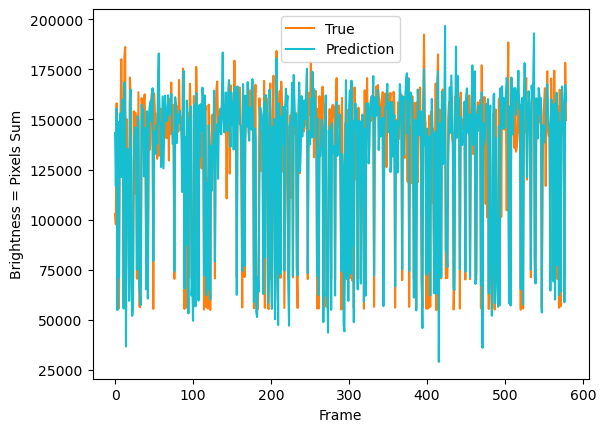

In [71]:
plt.plot(test_labels_ar, color='tab:orange', label='True')
plt.plot(preds, color='tab:cyan', label='Prediction')

plt.xlabel("Frame")
plt.ylabel("Brightness = Pixels Sum")

plt.legend()

plt.show()

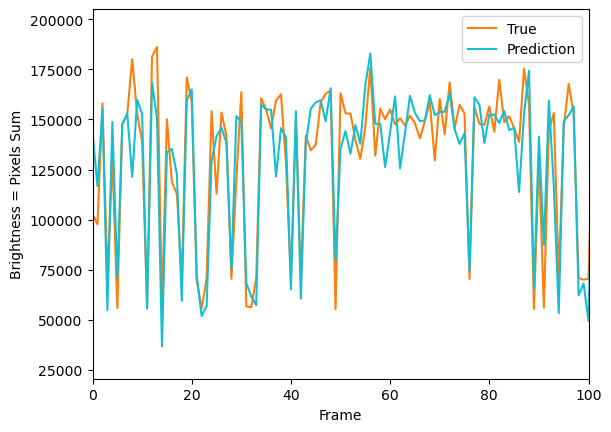

In [72]:
plt.plot(test_labels_ar, color='tab:orange', label='True')
plt.plot(preds, color='tab:cyan', label='Prediction')

plt.xlabel("Frame")
plt.ylabel("Brightness = Pixels Sum")

plt.legend()
plt.xlim(0, 100)

plt.show()

In [66]:
test_labels_ar =test_labels.to_numpy()
test_labels_ar

array([102718,  97602, 158102,  70587, 131103,  55736, 147573, 152719,
       180155, 152922, 138697,  56014, 181538, 186204,  55985, 150135,
       118788, 112881,  69838, 171016, 158825,  69799,  55501,  70600,
       154107, 112947, 153445, 141832,  70416, 120072, 163631,  56636,
        56172,  70733, 160646, 154993, 145516, 159595, 162588, 128034,
        69749, 149995,  70332, 141851, 134624, 137345, 158608, 162891,
       164464,  55331, 163121, 153100, 152977, 139800, 130299, 146323,
       175940, 131922, 155420, 150111, 155019, 147585, 150628, 146893,
       151940, 148153, 140604, 149122, 158853, 129544, 160288, 142613,
       168503, 145503, 157358, 153100,  70360, 156166, 147860, 147301,
       156483, 143880, 169757, 148674, 151578, 145755, 138769, 175420,
       157360,  55364, 129971,  56002, 144292, 153231,  71024, 145927,
       167806, 152711,  70834,  69964,  70399, 161727, 114322,  70681,
       176287, 155683, 150161,  70696, 150188, 140538, 142292, 125566,
      

In [74]:
model = CatBoostRegressor(iterations = 25000, 
                          learning_rate = 0.15, 
                          random_seed = 42, 
                          depth = 2
                         ,loss_function='RMSE'
                         )

model.fit(data_train, 
          train_labels, 
          verbose = False,
          plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [77]:
pred_test = model.predict(data_test)

In [1]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(data_train)

# visualize the first prediction's explanation
shap.plots.force(shap_values)

NameError: name 'shap' is not defined

In [54]:
shap.plots.force(shap_values[0, ...])

!pip install shap

In [4]:
import shap

shap.initjs()

!pip install shap

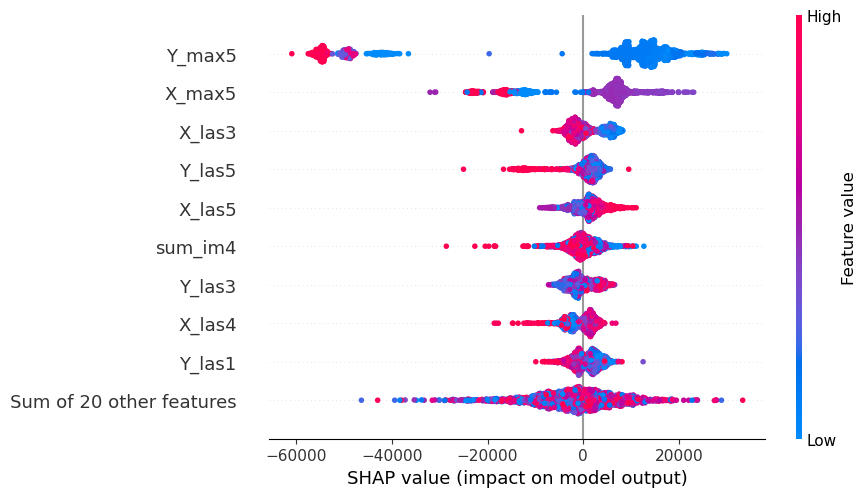

In [55]:
shap.plots.force(shap_values[0, ...])

shap.plots.beeswarm(shap_values)

In [75]:
from sklearn.metrics import mean_squared_error

In [79]:
mse_err = mean_squared_error(test_labels_ar, pred_test)
mse_err

277113298.60671866

# Dataset restruction

/Users/anastasiavolkova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sum_im', ylabel='Density'>

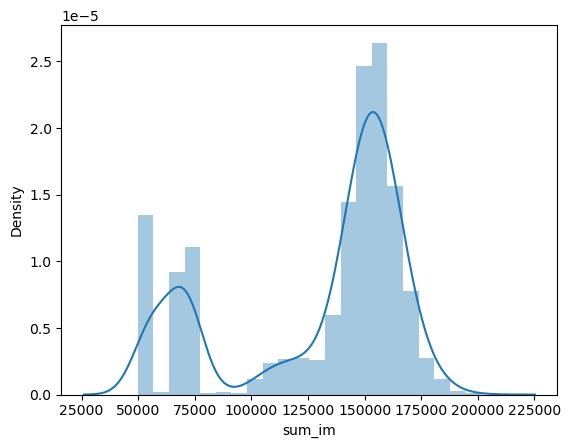

In [83]:
sns.distplot(frames_layer2_df['sum_im'])

We need to drop all the pictures without the white spot. We will drop all the images with "sum_im" less than 8000

In [84]:
df_clear = pd.DataFrame()
df_clear = pd.concat([df_command, frames_layer2_df], axis = 1)
df_clear.head()

X_las    Y_las  Power  Layer           Frame  X_max  Y_max  sum_im
0 -38.77900 -0.42300  100.0      2  frame01297.bmp    123     62   55269
1 -38.36468 -0.59884  100.0      2  frame00189.bmp     60     49  156048
2 -37.95036 -0.77468  100.0      2  frame02749.bmp     65     49  159716
3 -37.53604 -0.95052  100.0      2  frame01240.bmp     62     53  149585
4 -37.12172 -1.12636  100.0      2  frame01526.bmp     63     43  157030

In [87]:
mask = df_clear['sum_im'] < 80000
df_clear = df_clear[~mask]
df_clear.head()

X_las    Y_las  Power  Layer           Frame  X_max  Y_max  sum_im
1 -38.36468 -0.59884  100.0      2  frame00189.bmp     60     49  156048
2 -37.95036 -0.77468  100.0      2  frame02749.bmp     65     49  159716
3 -37.53604 -0.95052  100.0      2  frame01240.bmp     62     53  149585
4 -37.12172 -1.12636  100.0      2  frame01526.bmp     63     43  157030
6 -36.29308 -1.47804  100.0      2  frame01532.bmp     63     47  145197

/Users/anastasiavolkova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sum_im', ylabel='Density'>

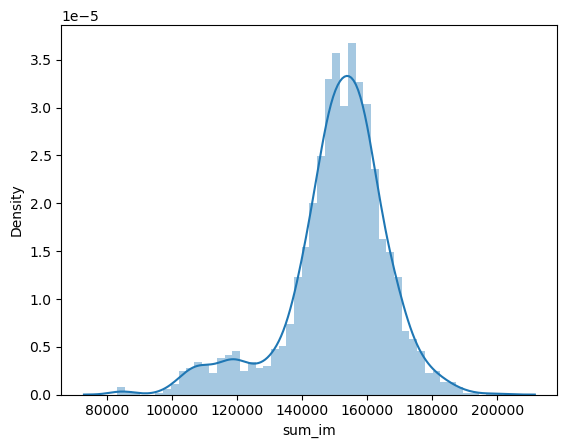

In [88]:
sns.distplot(df_clear['sum_im'])

In [89]:
result = df_clear.drop(['Layer','Frame'], axis =1)
result.shape

df1 = result
df1.columns = ['X_las1','Y_las1','Power1','X_max1','Y_max1','sum_im1']
df1 = df1[:-4]
df1.reset_index(drop=True, inplace=True)

df2 = result.iloc[1:]
df2.columns = ['X_las2','Y_las2','Power2','X_max2','Y_max2','sum_im2']
df2 = df2[:-3]
df2.reset_index(drop=True, inplace=True)

df3 = result.iloc[2:]
df3.columns = ['X_las3','Y_las3','Power3','X_max3','Y_max3','sum_im3']
df3 = df3[:-2]
df3.reset_index(drop=True, inplace=True)

df4 = result.iloc[3:]
df4.columns = ['X_las4','Y_las4','Power4','X_max4','Y_max4','sum_im4']
df4 = df4[:-1]
df4.reset_index(drop=True, inplace=True)

df5 = result.iloc[4:]
df5.columns = ['X_las5','Y_las5','Power5','X_max5','Y_max5','sum_im5']
df5.reset_index(drop=True, inplace=True)

final = pd.concat([df1, df2, df3, df4, df5], axis = 1)
final.head()

X_las1   Y_las1  Power1  X_max1  Y_max1  sum_im1    X_las2   Y_las2  \
0 -38.36468 -0.59884   100.0      60      49   156048 -37.95036 -0.77468   
1 -37.95036 -0.77468   100.0      65      49   159716 -37.53604 -0.95052   
2 -37.53604 -0.95052   100.0      62      53   149585 -37.12172 -1.12636   
3 -37.12172 -1.12636   100.0      63      43   157030 -36.29308 -1.47804   
4 -36.29308 -1.47804   100.0      63      47   145197 -35.87876 -1.65388   

   Power2  X_max2  ...  Power4  X_max4  Y_max4  sum_im4    X_las5   Y_las5  \
0   100.0      65  ...   100.0      63      43   157030 -36.29308 -1.47804   
1   100.0      62  ...   100.0      63      47   145197 -35.87876 -1.65388   
2   100.0      63  ...   100.0      65      47   174697 -35.46444 -1.82972   
3   100.0      63  ...   100.0      64      50   113976 -35.05012 -2.00556   
4   100.0      65  ...   100.0      64      47   185316 -34.22148 -2.35724   

   Power5  X_max5  Y_max5  sum_im5  
0   100.0      63      47   145197  
1   100.0      65      47   174697  
2   100.0      64      50   113976  
3   100.0      64      47   185316  
4   100.0      64      48   156867  

[5 rows x 30 columns]

In [90]:
final.shape

(2237, 30)

In [91]:
end_train = '1425'
start_validation = '1430'
end_validation = '1785'
start_test = '1790'
data_train = final.loc[: end_train, :]
data_val   = final.loc[start_validation:end_validation, :]
data_test  = final.loc[start_test:, :]


train_labels = data_train['sum_im5']
data_train = data_train.iloc[:,:-1]

val_labels = data_val['sum_im5']
data_val = data_val.iloc[:,:-1]

test_labels = data_test['sum_im5']
data_test = data_test.iloc[:,:-1]

In [115]:
model = CatBoostRegressor(iterations = 5000, 
                          random_seed = 42, 
                          depth = 10,
                          #task_type = "GPU",
                          #devices = '0'
                         )

model.fit(data_train, train_labels, plot = True, eval_set = (data_test,test_labels))
preds = model.predict(data_test)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.020171
0:	learn: 16069.0179257	test: 14795.2556638	best: 14795.2556638 (0)	total: 24.3ms	remaining: 2m 1s
1:	learn: 16017.7027748	test: 14774.7516333	best: 14774.7516333 (1)	total: 42.5ms	remaining: 1m 46s
2:	learn: 15974.9755846	test: 14760.2850548	best: 14760.2850548 (2)	total: 59.6ms	remaining: 1m 39s
3:	learn: 15931.0096580	test: 14735.4624447	best: 14735.4624447 (3)	total: 74.6ms	remaining: 1m 33s
4:	learn: 15885.8766699	test: 14718.6839474	best: 14718.6839474 (4)	total: 90.2ms	remaining: 1m 30s
5:	learn: 15841.9806457	test: 14704.2800709	best: 14704.2800709 (5)	total: 112ms	remaining: 1m 32s
6:	learn: 15798.2186011	test: 14680.1573988	best: 14680.1573988 (6)	total: 140ms	remaining: 1m 40s
7:	learn: 15765.0891921	test: 14658.0433444	best: 14658.0433444 (7)	total: 189ms	remaining: 1m 57s
8:	learn: 15710.3692685	test: 14627.0239711	best: 14627.0239711 (8)	total: 241ms	remaining: 2m 13s
9:	learn: 15676.4171557	test: 14603.7195337	best: 14603.7195337 (9)	total: 

82:	learn: 13652.7218238	test: 14017.2968481	best: 14017.2968481 (82)	total: 3.52s	remaining: 3m 28s
83:	learn: 13630.0865084	test: 14013.2770393	best: 14013.2770393 (83)	total: 3.56s	remaining: 3m 28s
84:	learn: 13611.9435806	test: 14010.7447408	best: 14010.7447408 (84)	total: 3.59s	remaining: 3m 27s
85:	learn: 13576.3635398	test: 14004.2467213	best: 14004.2467213 (85)	total: 3.63s	remaining: 3m 27s
86:	learn: 13559.6834774	test: 14002.1073357	best: 14002.1073357 (86)	total: 3.66s	remaining: 3m 26s
87:	learn: 13526.0866934	test: 13997.5263210	best: 13997.5263210 (87)	total: 3.69s	remaining: 3m 26s
88:	learn: 13504.8333657	test: 13986.8191267	best: 13986.8191267 (88)	total: 3.73s	remaining: 3m 25s
89:	learn: 13489.5268917	test: 13984.9604864	best: 13984.9604864 (89)	total: 3.76s	remaining: 3m 25s
90:	learn: 13466.8043220	test: 13981.4720464	best: 13981.4720464 (90)	total: 3.81s	remaining: 3m 25s
91:	learn: 13455.0603524	test: 13976.7447545	best: 13976.7447545 (91)	total: 3.85s	remainin

165:	learn: 12012.7388225	test: 13819.2814388	best: 13819.2814388 (165)	total: 6.4s	remaining: 3m 6s
166:	learn: 12001.0324703	test: 13820.5696994	best: 13819.2814388 (165)	total: 6.45s	remaining: 3m 6s
167:	learn: 11985.3054590	test: 13820.0665611	best: 13819.2814388 (165)	total: 6.49s	remaining: 3m 6s
168:	learn: 11968.8730822	test: 13820.7075440	best: 13819.2814388 (165)	total: 6.52s	remaining: 3m 6s
169:	learn: 11960.0799133	test: 13822.1472085	best: 13819.2814388 (165)	total: 6.56s	remaining: 3m 6s
170:	learn: 11942.7344772	test: 13818.4463682	best: 13818.4463682 (170)	total: 6.62s	remaining: 3m 6s
171:	learn: 11928.5175239	test: 13820.5508248	best: 13818.4463682 (170)	total: 6.71s	remaining: 3m 8s
172:	learn: 11896.9230610	test: 13821.7447944	best: 13818.4463682 (170)	total: 6.77s	remaining: 3m 8s
173:	learn: 11881.7854690	test: 13814.8944206	best: 13814.8944206 (173)	total: 6.84s	remaining: 3m 9s
174:	learn: 11866.4984502	test: 13816.0545732	best: 13814.8944206 (173)	total: 6.87

245:	learn: 10699.1112319	test: 13740.4611694	best: 13740.4611694 (245)	total: 9.96s	remaining: 3m 12s
246:	learn: 10676.0738786	test: 13738.0036533	best: 13738.0036533 (246)	total: 10s	remaining: 3m 12s
247:	learn: 10660.9785088	test: 13735.7232144	best: 13735.7232144 (247)	total: 10.1s	remaining: 3m 12s
248:	learn: 10649.8134626	test: 13735.8709743	best: 13735.7232144 (247)	total: 10.1s	remaining: 3m 12s
249:	learn: 10636.2805497	test: 13732.7663857	best: 13732.7663857 (249)	total: 10.1s	remaining: 3m 12s
250:	learn: 10612.5187908	test: 13728.4596004	best: 13728.4596004 (250)	total: 10.2s	remaining: 3m 12s
251:	learn: 10605.4472455	test: 13728.0705656	best: 13728.0705656 (251)	total: 10.2s	remaining: 3m 12s
252:	learn: 10590.0587476	test: 13725.7326638	best: 13725.7326638 (252)	total: 10.2s	remaining: 3m 11s
253:	learn: 10567.4096207	test: 13726.3320427	best: 13725.7326638 (252)	total: 10.3s	remaining: 3m 11s
254:	learn: 10559.5379946	test: 13727.2474383	best: 13725.7326638 (252)	tot

330:	learn: 9412.0085216	test: 13714.6419687	best: 13711.0435052 (306)	total: 13.2s	remaining: 3m 6s
331:	learn: 9401.3217391	test: 13714.8595977	best: 13711.0435052 (306)	total: 13.2s	remaining: 3m 6s
332:	learn: 9380.2615115	test: 13716.2488091	best: 13711.0435052 (306)	total: 13.3s	remaining: 3m 6s
333:	learn: 9356.4048504	test: 13715.1801774	best: 13711.0435052 (306)	total: 13.3s	remaining: 3m 6s
334:	learn: 9340.1913984	test: 13711.5759624	best: 13711.0435052 (306)	total: 13.3s	remaining: 3m 5s
335:	learn: 9334.3090380	test: 13711.2282630	best: 13711.0435052 (306)	total: 13.4s	remaining: 3m 5s
336:	learn: 9316.9933843	test: 13712.9368215	best: 13711.0435052 (306)	total: 13.4s	remaining: 3m 5s
337:	learn: 9306.2120716	test: 13712.3205035	best: 13711.0435052 (306)	total: 13.4s	remaining: 3m 5s
338:	learn: 9293.1345265	test: 13713.0816654	best: 13711.0435052 (306)	total: 13.5s	remaining: 3m 5s
339:	learn: 9282.7761573	test: 13713.6033461	best: 13711.0435052 (306)	total: 13.5s	remaini

413:	learn: 8290.9959511	test: 13677.6532917	best: 13677.1941453 (412)	total: 16.3s	remaining: 3m
414:	learn: 8281.3716147	test: 13675.5739691	best: 13675.5739691 (414)	total: 16.3s	remaining: 3m
415:	learn: 8272.7352170	test: 13672.2993529	best: 13672.2993529 (415)	total: 16.4s	remaining: 3m
416:	learn: 8260.9965463	test: 13672.6455763	best: 13672.2993529 (415)	total: 16.4s	remaining: 3m
417:	learn: 8248.6680923	test: 13675.9267234	best: 13672.2993529 (415)	total: 16.4s	remaining: 3m
418:	learn: 8238.4089439	test: 13675.6033409	best: 13672.2993529 (415)	total: 16.5s	remaining: 3m
419:	learn: 8215.4072336	test: 13677.1571112	best: 13672.2993529 (415)	total: 16.6s	remaining: 3m
420:	learn: 8204.2247217	test: 13679.8263484	best: 13672.2993529 (415)	total: 16.6s	remaining: 3m
421:	learn: 8190.8141653	test: 13680.2761489	best: 13672.2993529 (415)	total: 16.7s	remaining: 3m
422:	learn: 8170.4127154	test: 13684.0221607	best: 13672.2993529 (415)	total: 16.7s	remaining: 3m
423:	learn: 8154.680

497:	learn: 7320.3516057	test: 13632.3692442	best: 13631.4401818 (487)	total: 19.6s	remaining: 2m 57s
498:	learn: 7309.6151440	test: 13631.1451662	best: 13631.1451662 (498)	total: 19.6s	remaining: 2m 57s
499:	learn: 7303.1593344	test: 13632.7865604	best: 13631.1451662 (498)	total: 19.7s	remaining: 2m 57s
500:	learn: 7290.3208039	test: 13634.8744715	best: 13631.1451662 (498)	total: 19.7s	remaining: 2m 56s
501:	learn: 7283.5054752	test: 13636.1335266	best: 13631.1451662 (498)	total: 19.7s	remaining: 2m 56s
502:	learn: 7276.8836802	test: 13636.8079385	best: 13631.1451662 (498)	total: 19.8s	remaining: 2m 56s
503:	learn: 7269.7188757	test: 13636.3672742	best: 13631.1451662 (498)	total: 19.8s	remaining: 2m 56s
504:	learn: 7259.2775040	test: 13636.1744450	best: 13631.1451662 (498)	total: 19.8s	remaining: 2m 56s
505:	learn: 7252.4800879	test: 13635.9460769	best: 13631.1451662 (498)	total: 19.9s	remaining: 2m 56s
506:	learn: 7236.9490044	test: 13635.6508352	best: 13631.1451662 (498)	total: 19.9

581:	learn: 6604.8961846	test: 13582.6288757	best: 13582.6288757 (581)	total: 22.4s	remaining: 2m 50s
582:	learn: 6591.6608656	test: 13580.9621238	best: 13580.9621238 (582)	total: 22.4s	remaining: 2m 49s
583:	learn: 6583.2203489	test: 13577.2319726	best: 13577.2319726 (583)	total: 22.5s	remaining: 2m 49s
584:	learn: 6578.5197606	test: 13578.4968138	best: 13577.2319726 (583)	total: 22.5s	remaining: 2m 49s
585:	learn: 6568.6113385	test: 13574.9903004	best: 13574.9903004 (585)	total: 22.6s	remaining: 2m 50s
586:	learn: 6560.3772137	test: 13575.4038601	best: 13574.9903004 (585)	total: 22.6s	remaining: 2m 50s
587:	learn: 6553.5124576	test: 13575.7768914	best: 13574.9903004 (585)	total: 22.7s	remaining: 2m 50s
588:	learn: 6543.3772384	test: 13573.2947361	best: 13573.2947361 (588)	total: 22.7s	remaining: 2m 50s
589:	learn: 6531.8009381	test: 13575.1134723	best: 13573.2947361 (588)	total: 22.8s	remaining: 2m 50s
590:	learn: 6526.6553106	test: 13573.3801490	best: 13573.2947361 (588)	total: 22.8

664:	learn: 5943.2661108	test: 13561.5735091	best: 13560.7157277 (652)	total: 26.3s	remaining: 2m 51s
665:	learn: 5930.4539661	test: 13562.4146585	best: 13560.7157277 (652)	total: 26.4s	remaining: 2m 51s
666:	learn: 5926.9417595	test: 13562.3185644	best: 13560.7157277 (652)	total: 26.4s	remaining: 2m 51s
667:	learn: 5916.8551318	test: 13563.2937271	best: 13560.7157277 (652)	total: 26.5s	remaining: 2m 51s
668:	learn: 5907.7049134	test: 13563.7334397	best: 13560.7157277 (652)	total: 26.5s	remaining: 2m 51s
669:	learn: 5899.2423680	test: 13563.0533656	best: 13560.7157277 (652)	total: 26.6s	remaining: 2m 51s
670:	learn: 5892.8316358	test: 13563.6623991	best: 13560.7157277 (652)	total: 26.6s	remaining: 2m 51s
671:	learn: 5881.2977614	test: 13563.0961638	best: 13560.7157277 (652)	total: 26.6s	remaining: 2m 51s
672:	learn: 5872.2696570	test: 13563.7062684	best: 13560.7157277 (652)	total: 26.7s	remaining: 2m 51s
673:	learn: 5871.5386173	test: 13563.8835406	best: 13560.7157277 (652)	total: 26.7

749:	learn: 5333.6942123	test: 13542.1620100	best: 13540.4049282 (746)	total: 29.7s	remaining: 2m 48s
750:	learn: 5326.4305159	test: 13542.9211170	best: 13540.4049282 (746)	total: 29.7s	remaining: 2m 48s
751:	learn: 5317.6042131	test: 13541.5087377	best: 13540.4049282 (746)	total: 29.7s	remaining: 2m 47s
752:	learn: 5312.5022365	test: 13542.4528041	best: 13540.4049282 (746)	total: 29.8s	remaining: 2m 47s
753:	learn: 5304.8660349	test: 13542.8722375	best: 13540.4049282 (746)	total: 29.8s	remaining: 2m 47s
754:	learn: 5299.8662554	test: 13543.9018711	best: 13540.4049282 (746)	total: 29.9s	remaining: 2m 47s
755:	learn: 5292.5251153	test: 13546.2493731	best: 13540.4049282 (746)	total: 29.9s	remaining: 2m 47s
756:	learn: 5285.1420348	test: 13547.3163059	best: 13540.4049282 (746)	total: 29.9s	remaining: 2m 47s
757:	learn: 5280.1700919	test: 13547.2806208	best: 13540.4049282 (746)	total: 30s	remaining: 2m 47s
758:	learn: 5277.9050804	test: 13547.0916393	best: 13540.4049282 (746)	total: 30s	re

835:	learn: 4814.3684298	test: 13545.7270982	best: 13540.4049282 (746)	total: 32.5s	remaining: 2m 41s
836:	learn: 4814.0573051	test: 13545.2891302	best: 13540.4049282 (746)	total: 32.5s	remaining: 2m 41s
837:	learn: 4808.5163965	test: 13544.6818302	best: 13540.4049282 (746)	total: 32.5s	remaining: 2m 41s
838:	learn: 4806.0359352	test: 13544.4766784	best: 13540.4049282 (746)	total: 32.5s	remaining: 2m 41s
839:	learn: 4800.2758493	test: 13544.0427504	best: 13540.4049282 (746)	total: 32.6s	remaining: 2m 41s
840:	learn: 4789.1170856	test: 13545.7104595	best: 13540.4049282 (746)	total: 32.6s	remaining: 2m 41s
841:	learn: 4783.1910312	test: 13545.8323003	best: 13540.4049282 (746)	total: 32.7s	remaining: 2m 41s
842:	learn: 4778.4767559	test: 13545.5801827	best: 13540.4049282 (746)	total: 32.7s	remaining: 2m 41s
843:	learn: 4766.5510328	test: 13544.3525080	best: 13540.4049282 (746)	total: 32.7s	remaining: 2m 41s
844:	learn: 4764.5864737	test: 13544.3379462	best: 13540.4049282 (746)	total: 32.8

916:	learn: 4394.0599677	test: 13551.0567594	best: 13540.4049282 (746)	total: 35s	remaining: 2m 35s
917:	learn: 4389.3299380	test: 13552.1300883	best: 13540.4049282 (746)	total: 35.1s	remaining: 2m 35s
918:	learn: 4378.1678158	test: 13553.0934806	best: 13540.4049282 (746)	total: 35.1s	remaining: 2m 35s
919:	learn: 4372.8333556	test: 13553.8551894	best: 13540.4049282 (746)	total: 35.1s	remaining: 2m 35s
920:	learn: 4367.7561341	test: 13553.9621240	best: 13540.4049282 (746)	total: 35.2s	remaining: 2m 35s
921:	learn: 4366.6199759	test: 13553.8304150	best: 13540.4049282 (746)	total: 35.2s	remaining: 2m 35s
922:	learn: 4361.6999965	test: 13553.4572246	best: 13540.4049282 (746)	total: 35.2s	remaining: 2m 35s
923:	learn: 4355.1436962	test: 13553.9927603	best: 13540.4049282 (746)	total: 35.3s	remaining: 2m 35s
924:	learn: 4348.4599775	test: 13553.8864984	best: 13540.4049282 (746)	total: 35.3s	remaining: 2m 35s
925:	learn: 4345.2701657	test: 13553.9237522	best: 13540.4049282 (746)	total: 35.3s	

1003:	learn: 3966.1778401	test: 13542.8679127	best: 13540.4049282 (746)	total: 37.8s	remaining: 2m 30s
1004:	learn: 3961.2331596	test: 13543.5060964	best: 13540.4049282 (746)	total: 37.8s	remaining: 2m 30s
1005:	learn: 3953.7848634	test: 13545.5826454	best: 13540.4049282 (746)	total: 37.9s	remaining: 2m 30s
1006:	learn: 3949.1664857	test: 13545.3346852	best: 13540.4049282 (746)	total: 37.9s	remaining: 2m 30s
1007:	learn: 3946.9934822	test: 13545.0093986	best: 13540.4049282 (746)	total: 37.9s	remaining: 2m 30s
1008:	learn: 3943.1495317	test: 13544.3633948	best: 13540.4049282 (746)	total: 38s	remaining: 2m 30s
1009:	learn: 3936.1393371	test: 13545.9535242	best: 13540.4049282 (746)	total: 38s	remaining: 2m 30s
1010:	learn: 3930.0005838	test: 13547.3618811	best: 13540.4049282 (746)	total: 38s	remaining: 2m 30s
1011:	learn: 3922.7731136	test: 13545.2827948	best: 13540.4049282 (746)	total: 38.1s	remaining: 2m 29s
1012:	learn: 3915.1925663	test: 13545.7009156	best: 13540.4049282 (746)	total: 

1084:	learn: 3579.8247098	test: 13547.8840024	best: 13540.4049282 (746)	total: 40.8s	remaining: 2m 27s
1085:	learn: 3575.9641894	test: 13546.5134608	best: 13540.4049282 (746)	total: 40.8s	remaining: 2m 27s
1086:	learn: 3575.0174970	test: 13546.8525851	best: 13540.4049282 (746)	total: 40.9s	remaining: 2m 27s
1087:	learn: 3574.7268894	test: 13546.7282252	best: 13540.4049282 (746)	total: 40.9s	remaining: 2m 27s
1088:	learn: 3570.4377945	test: 13546.8873531	best: 13540.4049282 (746)	total: 41s	remaining: 2m 27s
1089:	learn: 3562.4417255	test: 13546.5088518	best: 13540.4049282 (746)	total: 41s	remaining: 2m 27s
1090:	learn: 3556.7145624	test: 13546.3429051	best: 13540.4049282 (746)	total: 41s	remaining: 2m 27s
1091:	learn: 3554.0028780	test: 13547.2469122	best: 13540.4049282 (746)	total: 41.1s	remaining: 2m 27s
1092:	learn: 3545.3868940	test: 13548.3011311	best: 13540.4049282 (746)	total: 41.1s	remaining: 2m 27s
1093:	learn: 3536.1918973	test: 13548.6115136	best: 13540.4049282 (746)	total: 

1165:	learn: 3194.5407634	test: 13554.5218230	best: 13540.4049282 (746)	total: 43.5s	remaining: 2m 23s
1166:	learn: 3188.0746200	test: 13553.6285761	best: 13540.4049282 (746)	total: 43.5s	remaining: 2m 22s
1167:	learn: 3184.7220538	test: 13553.8820144	best: 13540.4049282 (746)	total: 43.5s	remaining: 2m 22s
1168:	learn: 3178.8844227	test: 13554.5354360	best: 13540.4049282 (746)	total: 43.6s	remaining: 2m 22s
1169:	learn: 3175.4800488	test: 13554.9960731	best: 13540.4049282 (746)	total: 43.6s	remaining: 2m 22s
1170:	learn: 3169.5928610	test: 13554.9818227	best: 13540.4049282 (746)	total: 43.6s	remaining: 2m 22s
1171:	learn: 3165.7128021	test: 13554.3987713	best: 13540.4049282 (746)	total: 43.7s	remaining: 2m 22s
1172:	learn: 3160.5696811	test: 13554.4211520	best: 13540.4049282 (746)	total: 43.7s	remaining: 2m 22s
1173:	learn: 3155.3360837	test: 13556.0184726	best: 13540.4049282 (746)	total: 43.7s	remaining: 2m 22s
1174:	learn: 3150.9243840	test: 13556.4370150	best: 13540.4049282 (746)	t

1245:	learn: 2873.0140087	test: 13555.9147336	best: 13540.4049282 (746)	total: 46s	remaining: 2m 18s
1246:	learn: 2868.7459470	test: 13555.2127188	best: 13540.4049282 (746)	total: 46.1s	remaining: 2m 18s
1247:	learn: 2864.7843819	test: 13555.6316549	best: 13540.4049282 (746)	total: 46.1s	remaining: 2m 18s
1248:	learn: 2859.8192697	test: 13554.0127558	best: 13540.4049282 (746)	total: 46.1s	remaining: 2m 18s
1249:	learn: 2856.0320610	test: 13553.4267331	best: 13540.4049282 (746)	total: 46.2s	remaining: 2m 18s
1250:	learn: 2852.0397300	test: 13552.8163336	best: 13540.4049282 (746)	total: 46.2s	remaining: 2m 18s
1251:	learn: 2849.2710757	test: 13552.9064835	best: 13540.4049282 (746)	total: 46.2s	remaining: 2m 18s
1252:	learn: 2843.5036349	test: 13554.0934830	best: 13540.4049282 (746)	total: 46.3s	remaining: 2m 18s
1253:	learn: 2839.5250316	test: 13554.2591941	best: 13540.4049282 (746)	total: 46.3s	remaining: 2m 18s
1254:	learn: 2834.9857516	test: 13554.6103244	best: 13540.4049282 (746)	tot

1326:	learn: 2590.0748318	test: 13557.3465985	best: 13540.4049282 (746)	total: 48.9s	remaining: 2m 15s
1327:	learn: 2586.6134013	test: 13556.8665258	best: 13540.4049282 (746)	total: 48.9s	remaining: 2m 15s
1328:	learn: 2583.5790971	test: 13556.9602882	best: 13540.4049282 (746)	total: 49s	remaining: 2m 15s
1329:	learn: 2581.9986622	test: 13556.5739569	best: 13540.4049282 (746)	total: 49s	remaining: 2m 15s
1330:	learn: 2578.4897189	test: 13556.4218926	best: 13540.4049282 (746)	total: 49.1s	remaining: 2m 15s
1331:	learn: 2576.0486636	test: 13556.5761548	best: 13540.4049282 (746)	total: 49.1s	remaining: 2m 15s
1332:	learn: 2573.2614198	test: 13556.4799559	best: 13540.4049282 (746)	total: 49.1s	remaining: 2m 15s
1333:	learn: 2569.6549162	test: 13557.1528572	best: 13540.4049282 (746)	total: 49.1s	remaining: 2m 15s
1334:	learn: 2564.7503871	test: 13557.9043897	best: 13540.4049282 (746)	total: 49.2s	remaining: 2m 15s
1335:	learn: 2561.4709694	test: 13558.2316811	best: 13540.4049282 (746)	total

1409:	learn: 2311.6920109	test: 13548.2564828	best: 13540.4049282 (746)	total: 51.7s	remaining: 2m 11s
1410:	learn: 2306.1889488	test: 13547.8773063	best: 13540.4049282 (746)	total: 51.8s	remaining: 2m 11s
1411:	learn: 2304.2215822	test: 13548.0949223	best: 13540.4049282 (746)	total: 51.8s	remaining: 2m 11s
1412:	learn: 2300.6954385	test: 13547.4581339	best: 13540.4049282 (746)	total: 51.8s	remaining: 2m 11s
1413:	learn: 2297.1485577	test: 13547.4501191	best: 13540.4049282 (746)	total: 51.9s	remaining: 2m 11s
1414:	learn: 2292.2079022	test: 13547.9908890	best: 13540.4049282 (746)	total: 51.9s	remaining: 2m 11s
1415:	learn: 2289.7624331	test: 13547.6064509	best: 13540.4049282 (746)	total: 51.9s	remaining: 2m 11s
1416:	learn: 2287.6841396	test: 13547.5137434	best: 13540.4049282 (746)	total: 52s	remaining: 2m 11s
1417:	learn: 2284.7131742	test: 13547.7211959	best: 13540.4049282 (746)	total: 52s	remaining: 2m 11s
1418:	learn: 2279.9801403	test: 13547.5318750	best: 13540.4049282 (746)	total

1493:	learn: 2068.5407127	test: 13556.6905469	best: 13540.4049282 (746)	total: 55.1s	remaining: 2m 9s
1494:	learn: 2063.9848515	test: 13557.5294105	best: 13540.4049282 (746)	total: 55.1s	remaining: 2m 9s
1495:	learn: 2061.8417394	test: 13557.1345672	best: 13540.4049282 (746)	total: 55.1s	remaining: 2m 9s
1496:	learn: 2059.4343379	test: 13557.0620225	best: 13540.4049282 (746)	total: 55.2s	remaining: 2m 9s
1497:	learn: 2058.1285797	test: 13557.0154059	best: 13540.4049282 (746)	total: 55.2s	remaining: 2m 9s
1498:	learn: 2053.6306167	test: 13557.4792897	best: 13540.4049282 (746)	total: 55.3s	remaining: 2m 9s
1499:	learn: 2051.8387712	test: 13557.5039938	best: 13540.4049282 (746)	total: 55.3s	remaining: 2m 9s
1500:	learn: 2048.6577690	test: 13557.4102805	best: 13540.4049282 (746)	total: 55.3s	remaining: 2m 8s
1501:	learn: 2047.1526843	test: 13557.2641072	best: 13540.4049282 (746)	total: 55.4s	remaining: 2m 8s
1502:	learn: 2043.1501837	test: 13557.1476215	best: 13540.4049282 (746)	total: 55.

1575:	learn: 1848.0845240	test: 13561.2158120	best: 13540.4049282 (746)	total: 58.1s	remaining: 2m 6s
1576:	learn: 1845.0885054	test: 13561.1125443	best: 13540.4049282 (746)	total: 58.1s	remaining: 2m 6s
1577:	learn: 1840.8141586	test: 13560.8443685	best: 13540.4049282 (746)	total: 58.1s	remaining: 2m 6s
1578:	learn: 1840.2735841	test: 13560.8269537	best: 13540.4049282 (746)	total: 58.2s	remaining: 2m 6s
1579:	learn: 1839.2618341	test: 13560.8188088	best: 13540.4049282 (746)	total: 58.2s	remaining: 2m 5s
1580:	learn: 1837.3806549	test: 13560.9361079	best: 13540.4049282 (746)	total: 58.2s	remaining: 2m 5s
1581:	learn: 1835.8954484	test: 13560.7905227	best: 13540.4049282 (746)	total: 58.3s	remaining: 2m 5s
1582:	learn: 1832.6053838	test: 13560.3703685	best: 13540.4049282 (746)	total: 58.3s	remaining: 2m 5s
1583:	learn: 1830.8078101	test: 13560.2107983	best: 13540.4049282 (746)	total: 58.4s	remaining: 2m 5s
1584:	learn: 1826.2134781	test: 13560.5865666	best: 13540.4049282 (746)	total: 58.

1658:	learn: 1641.1725743	test: 13567.1972692	best: 13540.4049282 (746)	total: 1m	remaining: 2m 2s
1659:	learn: 1639.7728737	test: 13567.0713738	best: 13540.4049282 (746)	total: 1m	remaining: 2m 2s
1660:	learn: 1637.0332895	test: 13566.8316666	best: 13540.4049282 (746)	total: 1m	remaining: 2m 2s
1661:	learn: 1636.1190113	test: 13566.5268165	best: 13540.4049282 (746)	total: 1m	remaining: 2m 2s
1662:	learn: 1635.5689461	test: 13566.6386664	best: 13540.4049282 (746)	total: 1m	remaining: 2m 2s
1663:	learn: 1632.8580413	test: 13566.3157117	best: 13540.4049282 (746)	total: 1m	remaining: 2m 2s
1664:	learn: 1629.8529432	test: 13566.5997539	best: 13540.4049282 (746)	total: 1m	remaining: 2m 1s
1665:	learn: 1628.4081625	test: 13566.5673956	best: 13540.4049282 (746)	total: 1m	remaining: 2m 1s
1666:	learn: 1625.5280121	test: 13566.7794750	best: 13540.4049282 (746)	total: 1m	remaining: 2m 1s
1667:	learn: 1624.2241277	test: 13566.7584200	best: 13540.4049282 (746)	total: 1m 1s	remaining: 2m 1s
1668:	l

1744:	learn: 1476.6955427	test: 13573.1827505	best: 13540.4049282 (746)	total: 1m 3s	remaining: 1m 58s
1745:	learn: 1474.6977086	test: 13572.9917588	best: 13540.4049282 (746)	total: 1m 3s	remaining: 1m 58s
1746:	learn: 1473.1936474	test: 13572.9630039	best: 13540.4049282 (746)	total: 1m 3s	remaining: 1m 58s
1747:	learn: 1470.4524786	test: 13573.0071765	best: 13540.4049282 (746)	total: 1m 3s	remaining: 1m 58s
1748:	learn: 1468.7431191	test: 13572.6719392	best: 13540.4049282 (746)	total: 1m 3s	remaining: 1m 58s
1749:	learn: 1466.7971654	test: 13572.3159331	best: 13540.4049282 (746)	total: 1m 3s	remaining: 1m 58s
1750:	learn: 1465.0760877	test: 13572.0173597	best: 13540.4049282 (746)	total: 1m 3s	remaining: 1m 58s
1751:	learn: 1461.9407999	test: 13571.8576721	best: 13540.4049282 (746)	total: 1m 3s	remaining: 1m 58s
1752:	learn: 1460.8594579	test: 13571.7785502	best: 13540.4049282 (746)	total: 1m 3s	remaining: 1m 58s
1753:	learn: 1459.6521721	test: 13571.8633037	best: 13540.4049282 (746)	t

1830:	learn: 1319.8746138	test: 13573.0551983	best: 13540.4049282 (746)	total: 1m 6s	remaining: 1m 55s
1831:	learn: 1318.7591816	test: 13572.8326005	best: 13540.4049282 (746)	total: 1m 6s	remaining: 1m 55s
1832:	learn: 1317.2845151	test: 13572.6452859	best: 13540.4049282 (746)	total: 1m 6s	remaining: 1m 55s
1833:	learn: 1315.8644746	test: 13572.7437555	best: 13540.4049282 (746)	total: 1m 6s	remaining: 1m 55s
1834:	learn: 1314.0496028	test: 13572.7640877	best: 13540.4049282 (746)	total: 1m 6s	remaining: 1m 55s
1835:	learn: 1312.7784035	test: 13572.9045778	best: 13540.4049282 (746)	total: 1m 6s	remaining: 1m 55s
1836:	learn: 1310.8174327	test: 13573.3193093	best: 13540.4049282 (746)	total: 1m 6s	remaining: 1m 54s
1837:	learn: 1309.2684806	test: 13573.4440581	best: 13540.4049282 (746)	total: 1m 6s	remaining: 1m 54s
1838:	learn: 1307.7540041	test: 13573.6214169	best: 13540.4049282 (746)	total: 1m 6s	remaining: 1m 54s
1839:	learn: 1306.9174938	test: 13573.4611234	best: 13540.4049282 (746)	t

1911:	learn: 1188.7268277	test: 13575.6250169	best: 13540.4049282 (746)	total: 1m 9s	remaining: 1m 51s
1912:	learn: 1187.5104801	test: 13575.6244667	best: 13540.4049282 (746)	total: 1m 9s	remaining: 1m 51s
1913:	learn: 1185.9384761	test: 13575.6819406	best: 13540.4049282 (746)	total: 1m 9s	remaining: 1m 51s
1914:	learn: 1184.5700710	test: 13575.9615628	best: 13540.4049282 (746)	total: 1m 9s	remaining: 1m 51s
1915:	learn: 1182.7946027	test: 13576.1132963	best: 13540.4049282 (746)	total: 1m 9s	remaining: 1m 51s
1916:	learn: 1180.7423165	test: 13575.8671691	best: 13540.4049282 (746)	total: 1m 9s	remaining: 1m 51s
1917:	learn: 1179.6607501	test: 13575.9056590	best: 13540.4049282 (746)	total: 1m 9s	remaining: 1m 51s
1918:	learn: 1178.2294072	test: 13575.7772596	best: 13540.4049282 (746)	total: 1m 9s	remaining: 1m 51s
1919:	learn: 1177.8107514	test: 13575.9891926	best: 13540.4049282 (746)	total: 1m 9s	remaining: 1m 51s
1920:	learn: 1177.6805189	test: 13576.0229243	best: 13540.4049282 (746)	t

1996:	learn: 1067.3251352	test: 13575.1492904	best: 13540.4049282 (746)	total: 1m 12s	remaining: 1m 48s
1997:	learn: 1065.1473189	test: 13575.2502563	best: 13540.4049282 (746)	total: 1m 12s	remaining: 1m 48s
1998:	learn: 1063.4929799	test: 13575.0606799	best: 13540.4049282 (746)	total: 1m 12s	remaining: 1m 48s
1999:	learn: 1061.8427419	test: 13574.8441436	best: 13540.4049282 (746)	total: 1m 12s	remaining: 1m 48s
2000:	learn: 1060.6352342	test: 13575.0119684	best: 13540.4049282 (746)	total: 1m 12s	remaining: 1m 48s
2001:	learn: 1058.8816968	test: 13575.1385133	best: 13540.4049282 (746)	total: 1m 12s	remaining: 1m 48s
2002:	learn: 1058.2896482	test: 13575.2531853	best: 13540.4049282 (746)	total: 1m 12s	remaining: 1m 48s
2003:	learn: 1057.1940528	test: 13575.2613499	best: 13540.4049282 (746)	total: 1m 12s	remaining: 1m 48s
2004:	learn: 1056.5211419	test: 13575.1680317	best: 13540.4049282 (746)	total: 1m 12s	remaining: 1m 48s
2005:	learn: 1055.1625952	test: 13575.2610914	best: 13540.404928

2077:	learn: 967.1373896	test: 13577.6401987	best: 13540.4049282 (746)	total: 1m 15s	remaining: 1m 45s
2078:	learn: 965.7366563	test: 13577.7137223	best: 13540.4049282 (746)	total: 1m 15s	remaining: 1m 45s
2079:	learn: 964.2916843	test: 13578.0787595	best: 13540.4049282 (746)	total: 1m 15s	remaining: 1m 45s
2080:	learn: 962.6999753	test: 13578.1878071	best: 13540.4049282 (746)	total: 1m 15s	remaining: 1m 45s
2081:	learn: 960.9575283	test: 13578.4040118	best: 13540.4049282 (746)	total: 1m 15s	remaining: 1m 45s
2082:	learn: 960.9282420	test: 13578.3820081	best: 13540.4049282 (746)	total: 1m 15s	remaining: 1m 45s
2083:	learn: 959.4708161	test: 13578.7095643	best: 13540.4049282 (746)	total: 1m 15s	remaining: 1m 45s
2084:	learn: 958.4610034	test: 13578.8470931	best: 13540.4049282 (746)	total: 1m 15s	remaining: 1m 45s
2085:	learn: 957.8491301	test: 13578.7707538	best: 13540.4049282 (746)	total: 1m 15s	remaining: 1m 45s
2086:	learn: 956.5924752	test: 13578.6420525	best: 13540.4049282 (746)	to

2161:	learn: 872.3419202	test: 13579.1925860	best: 13540.4049282 (746)	total: 1m 18s	remaining: 1m 42s
2162:	learn: 870.6958366	test: 13579.5097189	best: 13540.4049282 (746)	total: 1m 18s	remaining: 1m 42s
2163:	learn: 870.6792513	test: 13579.5184190	best: 13540.4049282 (746)	total: 1m 18s	remaining: 1m 42s
2164:	learn: 869.2162478	test: 13579.5950713	best: 13540.4049282 (746)	total: 1m 18s	remaining: 1m 42s
2165:	learn: 868.5472717	test: 13579.5457929	best: 13540.4049282 (746)	total: 1m 18s	remaining: 1m 42s
2166:	learn: 866.7296406	test: 13579.6588829	best: 13540.4049282 (746)	total: 1m 18s	remaining: 1m 42s
2167:	learn: 865.7361428	test: 13579.7345074	best: 13540.4049282 (746)	total: 1m 18s	remaining: 1m 42s
2168:	learn: 864.2173970	test: 13579.5590457	best: 13540.4049282 (746)	total: 1m 18s	remaining: 1m 42s
2169:	learn: 862.7263730	test: 13579.7098615	best: 13540.4049282 (746)	total: 1m 18s	remaining: 1m 42s
2170:	learn: 861.6823358	test: 13579.8078912	best: 13540.4049282 (746)	to

2241:	learn: 793.4704910	test: 13579.3353620	best: 13540.4049282 (746)	total: 1m 20s	remaining: 1m 39s
2242:	learn: 792.7521897	test: 13579.3853618	best: 13540.4049282 (746)	total: 1m 20s	remaining: 1m 39s
2243:	learn: 791.5539932	test: 13579.4483843	best: 13540.4049282 (746)	total: 1m 20s	remaining: 1m 39s
2244:	learn: 790.8706601	test: 13579.5754877	best: 13540.4049282 (746)	total: 1m 20s	remaining: 1m 39s
2245:	learn: 790.5532535	test: 13579.5201029	best: 13540.4049282 (746)	total: 1m 20s	remaining: 1m 39s
2246:	learn: 789.9650047	test: 13579.4605236	best: 13540.4049282 (746)	total: 1m 20s	remaining: 1m 39s
2247:	learn: 788.9950410	test: 13579.3861507	best: 13540.4049282 (746)	total: 1m 20s	remaining: 1m 39s
2248:	learn: 787.8074156	test: 13579.3234128	best: 13540.4049282 (746)	total: 1m 20s	remaining: 1m 39s
2249:	learn: 786.5168931	test: 13579.5459976	best: 13540.4049282 (746)	total: 1m 21s	remaining: 1m 39s
2250:	learn: 785.2830368	test: 13579.5615633	best: 13540.4049282 (746)	to

2325:	learn: 714.0162959	test: 13580.5834262	best: 13540.4049282 (746)	total: 1m 23s	remaining: 1m 36s
2326:	learn: 713.2936404	test: 13580.7924960	best: 13540.4049282 (746)	total: 1m 23s	remaining: 1m 36s
2327:	learn: 712.8275087	test: 13580.7592073	best: 13540.4049282 (746)	total: 1m 23s	remaining: 1m 36s
2328:	learn: 712.4244188	test: 13580.6678313	best: 13540.4049282 (746)	total: 1m 23s	remaining: 1m 36s
2329:	learn: 711.9467646	test: 13580.6997975	best: 13540.4049282 (746)	total: 1m 23s	remaining: 1m 35s
2330:	learn: 711.6528945	test: 13580.7241550	best: 13540.4049282 (746)	total: 1m 23s	remaining: 1m 35s
2331:	learn: 710.0209210	test: 13581.0371303	best: 13540.4049282 (746)	total: 1m 23s	remaining: 1m 35s
2332:	learn: 709.2982672	test: 13581.0688844	best: 13540.4049282 (746)	total: 1m 23s	remaining: 1m 35s
2333:	learn: 708.4343265	test: 13580.8689884	best: 13540.4049282 (746)	total: 1m 23s	remaining: 1m 35s
2334:	learn: 707.5371571	test: 13580.8804042	best: 13540.4049282 (746)	to

2406:	learn: 653.5186988	test: 13581.7015428	best: 13540.4049282 (746)	total: 1m 26s	remaining: 1m 33s
2407:	learn: 653.2445290	test: 13581.6543512	best: 13540.4049282 (746)	total: 1m 26s	remaining: 1m 33s
2408:	learn: 652.6859386	test: 13581.6294086	best: 13540.4049282 (746)	total: 1m 26s	remaining: 1m 33s
2409:	learn: 651.9584930	test: 13581.6066086	best: 13540.4049282 (746)	total: 1m 26s	remaining: 1m 33s
2410:	learn: 650.9883163	test: 13581.6439748	best: 13540.4049282 (746)	total: 1m 26s	remaining: 1m 32s
2411:	learn: 649.9223359	test: 13581.9442218	best: 13540.4049282 (746)	total: 1m 26s	remaining: 1m 32s
2412:	learn: 648.8745856	test: 13581.8885912	best: 13540.4049282 (746)	total: 1m 26s	remaining: 1m 32s
2413:	learn: 648.1831404	test: 13581.8524562	best: 13540.4049282 (746)	total: 1m 26s	remaining: 1m 32s
2414:	learn: 646.9301922	test: 13581.6841587	best: 13540.4049282 (746)	total: 1m 26s	remaining: 1m 32s
2415:	learn: 646.2649136	test: 13581.5429407	best: 13540.4049282 (746)	to

2491:	learn: 587.0813190	test: 13584.2303943	best: 13540.4049282 (746)	total: 1m 29s	remaining: 1m 30s
2492:	learn: 586.6678085	test: 13584.3321098	best: 13540.4049282 (746)	total: 1m 29s	remaining: 1m 30s
2493:	learn: 586.1628859	test: 13584.3544051	best: 13540.4049282 (746)	total: 1m 29s	remaining: 1m 30s
2494:	learn: 585.4058652	test: 13584.4117099	best: 13540.4049282 (746)	total: 1m 29s	remaining: 1m 30s
2495:	learn: 584.4507353	test: 13584.3582064	best: 13540.4049282 (746)	total: 1m 29s	remaining: 1m 30s
2496:	learn: 583.4785195	test: 13584.5805004	best: 13540.4049282 (746)	total: 1m 29s	remaining: 1m 30s
2497:	learn: 582.9965542	test: 13584.5863026	best: 13540.4049282 (746)	total: 1m 29s	remaining: 1m 30s
2498:	learn: 582.4149902	test: 13584.6315309	best: 13540.4049282 (746)	total: 1m 29s	remaining: 1m 30s
2499:	learn: 581.5739394	test: 13584.3848380	best: 13540.4049282 (746)	total: 1m 30s	remaining: 1m 30s
2500:	learn: 581.1585626	test: 13584.3179620	best: 13540.4049282 (746)	to

2576:	learn: 527.6013343	test: 13584.9549391	best: 13540.4049282 (746)	total: 1m 32s	remaining: 1m 27s
2577:	learn: 526.7946429	test: 13585.0911146	best: 13540.4049282 (746)	total: 1m 32s	remaining: 1m 26s
2578:	learn: 526.2251423	test: 13585.0930194	best: 13540.4049282 (746)	total: 1m 32s	remaining: 1m 26s
2579:	learn: 525.6327993	test: 13584.8966947	best: 13540.4049282 (746)	total: 1m 32s	remaining: 1m 26s
2580:	learn: 524.9455910	test: 13584.8743497	best: 13540.4049282 (746)	total: 1m 32s	remaining: 1m 26s
2581:	learn: 524.5578339	test: 13584.7563381	best: 13540.4049282 (746)	total: 1m 32s	remaining: 1m 26s
2582:	learn: 524.0997685	test: 13584.7061152	best: 13540.4049282 (746)	total: 1m 32s	remaining: 1m 26s
2583:	learn: 523.4540895	test: 13584.6669529	best: 13540.4049282 (746)	total: 1m 32s	remaining: 1m 26s
2584:	learn: 522.3501019	test: 13584.7714592	best: 13540.4049282 (746)	total: 1m 32s	remaining: 1m 26s
2585:	learn: 522.0470680	test: 13584.7767393	best: 13540.4049282 (746)	to

2658:	learn: 480.9645994	test: 13585.5806239	best: 13540.4049282 (746)	total: 1m 35s	remaining: 1m 24s
2659:	learn: 480.5833825	test: 13585.6404738	best: 13540.4049282 (746)	total: 1m 35s	remaining: 1m 24s
2660:	learn: 480.3765721	test: 13585.6633091	best: 13540.4049282 (746)	total: 1m 35s	remaining: 1m 23s
2661:	learn: 479.6877186	test: 13585.7338067	best: 13540.4049282 (746)	total: 1m 35s	remaining: 1m 23s
2662:	learn: 479.2672017	test: 13585.9402186	best: 13540.4049282 (746)	total: 1m 35s	remaining: 1m 23s
2663:	learn: 478.9363263	test: 13585.9187859	best: 13540.4049282 (746)	total: 1m 35s	remaining: 1m 23s
2664:	learn: 478.4638992	test: 13586.0331322	best: 13540.4049282 (746)	total: 1m 35s	remaining: 1m 23s
2665:	learn: 478.0453244	test: 13586.0386043	best: 13540.4049282 (746)	total: 1m 35s	remaining: 1m 23s
2666:	learn: 477.9006489	test: 13586.0460742	best: 13540.4049282 (746)	total: 1m 35s	remaining: 1m 23s
2667:	learn: 477.1039555	test: 13585.9644700	best: 13540.4049282 (746)	to

2738:	learn: 439.2154574	test: 13586.3515246	best: 13540.4049282 (746)	total: 1m 38s	remaining: 1m 21s
2739:	learn: 438.6098961	test: 13586.2967534	best: 13540.4049282 (746)	total: 1m 38s	remaining: 1m 21s
2740:	learn: 437.7015554	test: 13586.3473567	best: 13540.4049282 (746)	total: 1m 38s	remaining: 1m 21s
2741:	learn: 437.2033216	test: 13586.2899683	best: 13540.4049282 (746)	total: 1m 38s	remaining: 1m 20s
2742:	learn: 436.7497376	test: 13586.2107054	best: 13540.4049282 (746)	total: 1m 38s	remaining: 1m 20s
2743:	learn: 435.9893324	test: 13586.1806220	best: 13540.4049282 (746)	total: 1m 38s	remaining: 1m 20s
2744:	learn: 435.4987769	test: 13586.0936872	best: 13540.4049282 (746)	total: 1m 38s	remaining: 1m 20s
2745:	learn: 435.3017107	test: 13586.0912469	best: 13540.4049282 (746)	total: 1m 38s	remaining: 1m 20s
2746:	learn: 434.8548121	test: 13586.1343068	best: 13540.4049282 (746)	total: 1m 38s	remaining: 1m 20s
2747:	learn: 434.4270462	test: 13586.2099497	best: 13540.4049282 (746)	to

2818:	learn: 402.5380048	test: 13586.5087570	best: 13540.4049282 (746)	total: 1m 40s	remaining: 1m 18s
2819:	learn: 402.2312289	test: 13586.4530276	best: 13540.4049282 (746)	total: 1m 40s	remaining: 1m 18s
2820:	learn: 401.7276950	test: 13586.3970260	best: 13540.4049282 (746)	total: 1m 40s	remaining: 1m 18s
2821:	learn: 401.4446502	test: 13586.4220650	best: 13540.4049282 (746)	total: 1m 41s	remaining: 1m 17s
2822:	learn: 400.9109597	test: 13586.2921092	best: 13540.4049282 (746)	total: 1m 41s	remaining: 1m 17s
2823:	learn: 400.1594377	test: 13586.3429168	best: 13540.4049282 (746)	total: 1m 41s	remaining: 1m 17s
2824:	learn: 399.8858629	test: 13586.2711060	best: 13540.4049282 (746)	total: 1m 41s	remaining: 1m 17s
2825:	learn: 399.5012793	test: 13586.2258902	best: 13540.4049282 (746)	total: 1m 41s	remaining: 1m 17s
2826:	learn: 399.1929968	test: 13586.1748242	best: 13540.4049282 (746)	total: 1m 41s	remaining: 1m 17s
2827:	learn: 398.7435397	test: 13586.2265981	best: 13540.4049282 (746)	to

2903:	learn: 366.3385777	test: 13587.0882719	best: 13540.4049282 (746)	total: 1m 44s	remaining: 1m 15s
2904:	learn: 366.1861329	test: 13587.1457240	best: 13540.4049282 (746)	total: 1m 44s	remaining: 1m 15s
2905:	learn: 365.8060577	test: 13587.1126614	best: 13540.4049282 (746)	total: 1m 44s	remaining: 1m 15s
2906:	learn: 365.2578065	test: 13587.0316191	best: 13540.4049282 (746)	total: 1m 44s	remaining: 1m 15s
2907:	learn: 364.7366163	test: 13587.0858046	best: 13540.4049282 (746)	total: 1m 44s	remaining: 1m 15s
2908:	learn: 364.2795909	test: 13587.1122250	best: 13540.4049282 (746)	total: 1m 44s	remaining: 1m 14s
2909:	learn: 363.9375960	test: 13587.1988262	best: 13540.4049282 (746)	total: 1m 44s	remaining: 1m 14s
2910:	learn: 363.4646843	test: 13587.1735812	best: 13540.4049282 (746)	total: 1m 44s	remaining: 1m 14s
2911:	learn: 362.9937183	test: 13587.0983035	best: 13540.4049282 (746)	total: 1m 44s	remaining: 1m 14s
2912:	learn: 362.8452379	test: 13587.1125866	best: 13540.4049282 (746)	to

2987:	learn: 335.4937768	test: 13587.5965744	best: 13540.4049282 (746)	total: 1m 47s	remaining: 1m 12s
2988:	learn: 335.2073856	test: 13587.5924534	best: 13540.4049282 (746)	total: 1m 47s	remaining: 1m 12s
2989:	learn: 334.9369765	test: 13587.6749684	best: 13540.4049282 (746)	total: 1m 47s	remaining: 1m 12s
2990:	learn: 334.7117217	test: 13587.5899943	best: 13540.4049282 (746)	total: 1m 47s	remaining: 1m 11s
2991:	learn: 334.2578755	test: 13587.5638741	best: 13540.4049282 (746)	total: 1m 47s	remaining: 1m 11s
2992:	learn: 333.9019555	test: 13587.5483007	best: 13540.4049282 (746)	total: 1m 47s	remaining: 1m 11s
2993:	learn: 333.3397220	test: 13587.5345239	best: 13540.4049282 (746)	total: 1m 47s	remaining: 1m 11s
2994:	learn: 333.2228524	test: 13587.5215277	best: 13540.4049282 (746)	total: 1m 47s	remaining: 1m 11s
2995:	learn: 332.6407904	test: 13587.5928990	best: 13540.4049282 (746)	total: 1m 47s	remaining: 1m 11s
2996:	learn: 332.3871587	test: 13587.5784267	best: 13540.4049282 (746)	to

3071:	learn: 306.4109683	test: 13588.0159033	best: 13540.4049282 (746)	total: 1m 49s	remaining: 1m 9s
3072:	learn: 306.1319815	test: 13588.0081363	best: 13540.4049282 (746)	total: 1m 50s	remaining: 1m 8s
3073:	learn: 305.8621566	test: 13588.0251373	best: 13540.4049282 (746)	total: 1m 50s	remaining: 1m 8s
3074:	learn: 305.6294993	test: 13587.9903917	best: 13540.4049282 (746)	total: 1m 50s	remaining: 1m 8s
3075:	learn: 305.0396186	test: 13588.0212307	best: 13540.4049282 (746)	total: 1m 50s	remaining: 1m 8s
3076:	learn: 304.6770879	test: 13588.1125595	best: 13540.4049282 (746)	total: 1m 50s	remaining: 1m 8s
3077:	learn: 304.5155834	test: 13588.1190869	best: 13540.4049282 (746)	total: 1m 50s	remaining: 1m 8s
3078:	learn: 304.3815372	test: 13588.1197424	best: 13540.4049282 (746)	total: 1m 50s	remaining: 1m 8s
3079:	learn: 304.2099459	test: 13588.0771994	best: 13540.4049282 (746)	total: 1m 50s	remaining: 1m 8s
3080:	learn: 303.9288489	test: 13588.0374116	best: 13540.4049282 (746)	total: 1m 5

3152:	learn: 281.3151413	test: 13588.2031346	best: 13540.4049282 (746)	total: 1m 52s	remaining: 1m 6s
3153:	learn: 281.0933034	test: 13588.1944350	best: 13540.4049282 (746)	total: 1m 52s	remaining: 1m 6s
3154:	learn: 280.7159076	test: 13588.2581160	best: 13540.4049282 (746)	total: 1m 52s	remaining: 1m 6s
3155:	learn: 280.3282777	test: 13588.2374559	best: 13540.4049282 (746)	total: 1m 52s	remaining: 1m 6s
3156:	learn: 279.9858066	test: 13588.2267581	best: 13540.4049282 (746)	total: 1m 52s	remaining: 1m 5s
3157:	learn: 279.3931645	test: 13588.1658765	best: 13540.4049282 (746)	total: 1m 53s	remaining: 1m 5s
3158:	learn: 279.2169846	test: 13588.1468453	best: 13540.4049282 (746)	total: 1m 53s	remaining: 1m 5s
3159:	learn: 278.9866519	test: 13588.1557310	best: 13540.4049282 (746)	total: 1m 53s	remaining: 1m 5s
3160:	learn: 278.7439372	test: 13588.1256056	best: 13540.4049282 (746)	total: 1m 53s	remaining: 1m 5s
3161:	learn: 278.4570854	test: 13588.1492872	best: 13540.4049282 (746)	total: 1m 5

3237:	learn: 257.1693579	test: 13588.6708620	best: 13540.4049282 (746)	total: 1m 55s	remaining: 1m 3s
3238:	learn: 256.8591286	test: 13588.6334446	best: 13540.4049282 (746)	total: 1m 55s	remaining: 1m 2s
3239:	learn: 256.3265567	test: 13588.7887136	best: 13540.4049282 (746)	total: 1m 55s	remaining: 1m 2s
3240:	learn: 256.1605602	test: 13588.7577243	best: 13540.4049282 (746)	total: 1m 55s	remaining: 1m 2s
3241:	learn: 255.8254171	test: 13588.7361472	best: 13540.4049282 (746)	total: 1m 55s	remaining: 1m 2s
3242:	learn: 255.6428542	test: 13588.7328844	best: 13540.4049282 (746)	total: 1m 55s	remaining: 1m 2s
3243:	learn: 255.3301468	test: 13588.7322735	best: 13540.4049282 (746)	total: 1m 56s	remaining: 1m 2s
3244:	learn: 254.9898836	test: 13588.6774874	best: 13540.4049282 (746)	total: 1m 56s	remaining: 1m 2s
3245:	learn: 254.7917721	test: 13588.6670067	best: 13540.4049282 (746)	total: 1m 56s	remaining: 1m 2s
3246:	learn: 254.4684416	test: 13588.7242979	best: 13540.4049282 (746)	total: 1m 5

3323:	learn: 234.3149332	test: 13589.6088751	best: 13540.4049282 (746)	total: 1m 58s	remaining: 59.9s
3324:	learn: 234.1412474	test: 13589.6264196	best: 13540.4049282 (746)	total: 1m 58s	remaining: 59.8s
3325:	learn: 234.1350639	test: 13589.6171396	best: 13540.4049282 (746)	total: 1m 58s	remaining: 59.8s
3326:	learn: 233.9703812	test: 13589.5979625	best: 13540.4049282 (746)	total: 1m 58s	remaining: 59.8s
3327:	learn: 233.7911417	test: 13589.5934724	best: 13540.4049282 (746)	total: 1m 58s	remaining: 59.7s
3328:	learn: 233.6009956	test: 13589.6219604	best: 13540.4049282 (746)	total: 1m 58s	remaining: 59.7s
3329:	learn: 233.3119268	test: 13589.6103256	best: 13540.4049282 (746)	total: 1m 58s	remaining: 59.7s
3330:	learn: 233.2244401	test: 13589.5932081	best: 13540.4049282 (746)	total: 1m 58s	remaining: 59.6s
3331:	learn: 232.9471020	test: 13589.6304117	best: 13540.4049282 (746)	total: 1m 59s	remaining: 59.6s
3332:	learn: 232.5754045	test: 13589.5816806	best: 13540.4049282 (746)	total: 1m 5

3408:	learn: 215.1184785	test: 13589.5430080	best: 13540.4049282 (746)	total: 2m 2s	remaining: 57s
3409:	learn: 215.0555133	test: 13589.5520319	best: 13540.4049282 (746)	total: 2m 2s	remaining: 56.9s
3410:	learn: 214.6708611	test: 13589.5509492	best: 13540.4049282 (746)	total: 2m 2s	remaining: 56.9s
3411:	learn: 214.4674271	test: 13589.5436921	best: 13540.4049282 (746)	total: 2m 2s	remaining: 56.9s
3412:	learn: 214.1024389	test: 13589.5429489	best: 13540.4049282 (746)	total: 2m 2s	remaining: 56.8s
3413:	learn: 214.0513884	test: 13589.5567964	best: 13540.4049282 (746)	total: 2m 2s	remaining: 56.8s
3414:	learn: 213.8268931	test: 13589.5315909	best: 13540.4049282 (746)	total: 2m 2s	remaining: 56.8s
3415:	learn: 213.7078443	test: 13589.5390856	best: 13540.4049282 (746)	total: 2m 2s	remaining: 56.7s
3416:	learn: 213.4277277	test: 13589.5838213	best: 13540.4049282 (746)	total: 2m 2s	remaining: 56.7s
3417:	learn: 213.2803663	test: 13589.6244799	best: 13540.4049282 (746)	total: 2m 2s	remaining

3495:	learn: 196.9960883	test: 13589.6429129	best: 13540.4049282 (746)	total: 2m 5s	remaining: 53.8s
3496:	learn: 196.8349313	test: 13589.6755251	best: 13540.4049282 (746)	total: 2m 5s	remaining: 53.8s
3497:	learn: 196.5806952	test: 13589.6663342	best: 13540.4049282 (746)	total: 2m 5s	remaining: 53.7s
3498:	learn: 196.4362133	test: 13589.6475151	best: 13540.4049282 (746)	total: 2m 5s	remaining: 53.7s
3499:	learn: 196.2173933	test: 13589.6176652	best: 13540.4049282 (746)	total: 2m 5s	remaining: 53.7s
3500:	learn: 196.0722205	test: 13589.5703159	best: 13540.4049282 (746)	total: 2m 5s	remaining: 53.6s
3501:	learn: 195.7792981	test: 13589.5539686	best: 13540.4049282 (746)	total: 2m 5s	remaining: 53.6s
3502:	learn: 195.6418925	test: 13589.5619086	best: 13540.4049282 (746)	total: 2m 5s	remaining: 53.6s
3503:	learn: 195.5023255	test: 13589.5648437	best: 13540.4049282 (746)	total: 2m 5s	remaining: 53.5s
3504:	learn: 195.3907931	test: 13589.5713875	best: 13540.4049282 (746)	total: 2m 5s	remaini

3581:	learn: 177.9691149	test: 13589.9400788	best: 13540.4049282 (746)	total: 2m 7s	remaining: 50.6s
3582:	learn: 177.6781247	test: 13589.9230255	best: 13540.4049282 (746)	total: 2m 7s	remaining: 50.6s
3583:	learn: 177.6164984	test: 13589.9142534	best: 13540.4049282 (746)	total: 2m 8s	remaining: 50.6s
3584:	learn: 177.4849418	test: 13589.9128652	best: 13540.4049282 (746)	total: 2m 8s	remaining: 50.5s
3585:	learn: 177.2258869	test: 13589.9073687	best: 13540.4049282 (746)	total: 2m 8s	remaining: 50.5s
3586:	learn: 177.1081622	test: 13589.9077794	best: 13540.4049282 (746)	total: 2m 8s	remaining: 50.5s
3587:	learn: 176.9775519	test: 13589.8768732	best: 13540.4049282 (746)	total: 2m 8s	remaining: 50.4s
3588:	learn: 176.7171813	test: 13589.9143734	best: 13540.4049282 (746)	total: 2m 8s	remaining: 50.4s
3589:	learn: 176.5707633	test: 13589.9317741	best: 13540.4049282 (746)	total: 2m 8s	remaining: 50.3s
3590:	learn: 176.1755507	test: 13589.9379384	best: 13540.4049282 (746)	total: 2m 8s	remaini

3665:	learn: 163.8467243	test: 13590.1296649	best: 13540.4049282 (746)	total: 2m 10s	remaining: 47.6s
3666:	learn: 163.6834790	test: 13590.1474467	best: 13540.4049282 (746)	total: 2m 10s	remaining: 47.5s
3667:	learn: 163.4333439	test: 13590.1527164	best: 13540.4049282 (746)	total: 2m 10s	remaining: 47.5s
3668:	learn: 163.2065119	test: 13590.1621176	best: 13540.4049282 (746)	total: 2m 10s	remaining: 47.5s
3669:	learn: 162.9518926	test: 13590.1844449	best: 13540.4049282 (746)	total: 2m 10s	remaining: 47.4s
3670:	learn: 162.6593363	test: 13590.2237362	best: 13540.4049282 (746)	total: 2m 10s	remaining: 47.4s
3671:	learn: 162.5659953	test: 13590.2210878	best: 13540.4049282 (746)	total: 2m 10s	remaining: 47.4s
3672:	learn: 162.2790855	test: 13590.1986582	best: 13540.4049282 (746)	total: 2m 10s	remaining: 47.3s
3673:	learn: 162.0656508	test: 13590.1530389	best: 13540.4049282 (746)	total: 2m 11s	remaining: 47.3s
3674:	learn: 161.9821605	test: 13590.1155315	best: 13540.4049282 (746)	total: 2m 1

3751:	learn: 149.9819399	test: 13590.2501424	best: 13540.4049282 (746)	total: 2m 13s	remaining: 44.4s
3752:	learn: 149.9199417	test: 13590.2649072	best: 13540.4049282 (746)	total: 2m 13s	remaining: 44.4s
3753:	learn: 149.7284671	test: 13590.2481743	best: 13540.4049282 (746)	total: 2m 13s	remaining: 44.4s
3754:	learn: 149.5004998	test: 13590.2543784	best: 13540.4049282 (746)	total: 2m 13s	remaining: 44.3s
3755:	learn: 149.4761561	test: 13590.2665591	best: 13540.4049282 (746)	total: 2m 13s	remaining: 44.3s
3756:	learn: 149.1798174	test: 13590.2600855	best: 13540.4049282 (746)	total: 2m 13s	remaining: 44.3s
3757:	learn: 149.1653131	test: 13590.2584443	best: 13540.4049282 (746)	total: 2m 13s	remaining: 44.2s
3758:	learn: 149.0397636	test: 13590.2188547	best: 13540.4049282 (746)	total: 2m 13s	remaining: 44.2s
3759:	learn: 148.8765037	test: 13590.2105343	best: 13540.4049282 (746)	total: 2m 13s	remaining: 44.2s
3760:	learn: 148.5666440	test: 13590.1728699	best: 13540.4049282 (746)	total: 2m 1

3833:	learn: 136.8255153	test: 13590.2296967	best: 13540.4049282 (746)	total: 2m 16s	remaining: 41.6s
3834:	learn: 136.6946175	test: 13590.2182665	best: 13540.4049282 (746)	total: 2m 16s	remaining: 41.6s
3835:	learn: 136.4692490	test: 13590.1956783	best: 13540.4049282 (746)	total: 2m 16s	remaining: 41.6s
3836:	learn: 136.2856698	test: 13590.2215832	best: 13540.4049282 (746)	total: 2m 16s	remaining: 41.5s
3837:	learn: 136.2209350	test: 13590.2404638	best: 13540.4049282 (746)	total: 2m 17s	remaining: 41.5s
3838:	learn: 136.0930224	test: 13590.1983976	best: 13540.4049282 (746)	total: 2m 17s	remaining: 41.5s
3839:	learn: 135.9653846	test: 13590.1979719	best: 13540.4049282 (746)	total: 2m 17s	remaining: 41.4s
3840:	learn: 135.8329300	test: 13590.1980062	best: 13540.4049282 (746)	total: 2m 17s	remaining: 41.4s
3841:	learn: 135.6507676	test: 13590.2080984	best: 13540.4049282 (746)	total: 2m 17s	remaining: 41.3s
3842:	learn: 135.4672405	test: 13590.2112076	best: 13540.4049282 (746)	total: 2m 1

3917:	learn: 125.3167524	test: 13590.3566163	best: 13540.4049282 (746)	total: 2m 19s	remaining: 38.6s
3918:	learn: 125.1812223	test: 13590.3691064	best: 13540.4049282 (746)	total: 2m 19s	remaining: 38.6s
3919:	learn: 125.0267028	test: 13590.3881349	best: 13540.4049282 (746)	total: 2m 19s	remaining: 38.5s
3920:	learn: 124.8687056	test: 13590.4005918	best: 13540.4049282 (746)	total: 2m 19s	remaining: 38.5s
3921:	learn: 124.8137777	test: 13590.4030182	best: 13540.4049282 (746)	total: 2m 19s	remaining: 38.5s
3922:	learn: 124.6820369	test: 13590.4225219	best: 13540.4049282 (746)	total: 2m 19s	remaining: 38.4s
3923:	learn: 124.5863530	test: 13590.4145600	best: 13540.4049282 (746)	total: 2m 20s	remaining: 38.4s
3924:	learn: 124.4560729	test: 13590.3838423	best: 13540.4049282 (746)	total: 2m 20s	remaining: 38.4s
3925:	learn: 124.2506586	test: 13590.3891213	best: 13540.4049282 (746)	total: 2m 20s	remaining: 38.3s
3926:	learn: 124.1095144	test: 13590.3916513	best: 13540.4049282 (746)	total: 2m 2

4004:	learn: 113.1713350	test: 13590.2210036	best: 13540.4049282 (746)	total: 2m 22s	remaining: 35.5s
4005:	learn: 112.9756140	test: 13590.2352205	best: 13540.4049282 (746)	total: 2m 22s	remaining: 35.4s
4006:	learn: 112.8693753	test: 13590.2377342	best: 13540.4049282 (746)	total: 2m 22s	remaining: 35.4s
4007:	learn: 112.7989622	test: 13590.2117079	best: 13540.4049282 (746)	total: 2m 22s	remaining: 35.4s
4008:	learn: 112.6392238	test: 13590.2418586	best: 13540.4049282 (746)	total: 2m 22s	remaining: 35.3s
4009:	learn: 112.6145592	test: 13590.2453664	best: 13540.4049282 (746)	total: 2m 22s	remaining: 35.3s
4010:	learn: 112.4864779	test: 13590.2427284	best: 13540.4049282 (746)	total: 2m 22s	remaining: 35.2s
4011:	learn: 112.4175898	test: 13590.2491787	best: 13540.4049282 (746)	total: 2m 22s	remaining: 35.2s
4012:	learn: 112.2539365	test: 13590.2082675	best: 13540.4049282 (746)	total: 2m 23s	remaining: 35.2s
4013:	learn: 111.9963829	test: 13590.2077073	best: 13540.4049282 (746)	total: 2m 2

4087:	learn: 104.1605375	test: 13590.3112190	best: 13540.4049282 (746)	total: 2m 25s	remaining: 32.5s
4088:	learn: 104.0399607	test: 13590.3046432	best: 13540.4049282 (746)	total: 2m 25s	remaining: 32.5s
4089:	learn: 104.0190681	test: 13590.3102673	best: 13540.4049282 (746)	total: 2m 25s	remaining: 32.4s
4090:	learn: 103.9021806	test: 13590.3121976	best: 13540.4049282 (746)	total: 2m 25s	remaining: 32.4s
4091:	learn: 103.8217537	test: 13590.2952240	best: 13540.4049282 (746)	total: 2m 25s	remaining: 32.4s
4092:	learn: 103.7293869	test: 13590.2817867	best: 13540.4049282 (746)	total: 2m 25s	remaining: 32.3s
4093:	learn: 103.5932511	test: 13590.3034937	best: 13540.4049282 (746)	total: 2m 26s	remaining: 32.3s
4094:	learn: 103.5146197	test: 13590.2998730	best: 13540.4049282 (746)	total: 2m 26s	remaining: 32.3s
4095:	learn: 103.3968303	test: 13590.3015876	best: 13540.4049282 (746)	total: 2m 26s	remaining: 32.2s
4096:	learn: 103.2921399	test: 13590.3182017	best: 13540.4049282 (746)	total: 2m 2

4174:	learn: 94.4232420	test: 13590.4108144	best: 13540.4049282 (746)	total: 2m 28s	remaining: 29.4s
4175:	learn: 94.2615522	test: 13590.4159063	best: 13540.4049282 (746)	total: 2m 28s	remaining: 29.4s
4176:	learn: 94.1926206	test: 13590.4082936	best: 13540.4049282 (746)	total: 2m 28s	remaining: 29.3s
4177:	learn: 94.1094665	test: 13590.4180860	best: 13540.4049282 (746)	total: 2m 28s	remaining: 29.3s
4178:	learn: 93.9906710	test: 13590.4156452	best: 13540.4049282 (746)	total: 2m 28s	remaining: 29.3s
4179:	learn: 93.9059370	test: 13590.4085436	best: 13540.4049282 (746)	total: 2m 28s	remaining: 29.2s
4180:	learn: 93.7958155	test: 13590.4119059	best: 13540.4049282 (746)	total: 2m 29s	remaining: 29.2s
4181:	learn: 93.7781338	test: 13590.4286460	best: 13540.4049282 (746)	total: 2m 29s	remaining: 29.2s
4182:	learn: 93.6524212	test: 13590.4135380	best: 13540.4049282 (746)	total: 2m 29s	remaining: 29.1s
4183:	learn: 93.5738058	test: 13590.3993994	best: 13540.4049282 (746)	total: 2m 29s	remaini

4260:	learn: 86.6509850	test: 13590.5997111	best: 13540.4049282 (746)	total: 2m 32s	remaining: 26.4s
4261:	learn: 86.5281775	test: 13590.5996835	best: 13540.4049282 (746)	total: 2m 32s	remaining: 26.4s
4262:	learn: 86.4355332	test: 13590.6089914	best: 13540.4049282 (746)	total: 2m 32s	remaining: 26.3s
4263:	learn: 86.3102123	test: 13590.5878352	best: 13540.4049282 (746)	total: 2m 32s	remaining: 26.3s
4264:	learn: 86.2087001	test: 13590.5858421	best: 13540.4049282 (746)	total: 2m 32s	remaining: 26.2s
4265:	learn: 86.0518406	test: 13590.6003821	best: 13540.4049282 (746)	total: 2m 32s	remaining: 26.2s
4266:	learn: 85.9466345	test: 13590.5934504	best: 13540.4049282 (746)	total: 2m 32s	remaining: 26.2s
4267:	learn: 85.8528253	test: 13590.6108170	best: 13540.4049282 (746)	total: 2m 32s	remaining: 26.1s
4268:	learn: 85.8315074	test: 13590.6055187	best: 13540.4049282 (746)	total: 2m 32s	remaining: 26.1s
4269:	learn: 85.7375755	test: 13590.6162202	best: 13540.4049282 (746)	total: 2m 32s	remaini

4345:	learn: 79.7446031	test: 13590.7419809	best: 13540.4049282 (746)	total: 2m 35s	remaining: 23.4s
4346:	learn: 79.5879957	test: 13590.7527005	best: 13540.4049282 (746)	total: 2m 35s	remaining: 23.3s
4347:	learn: 79.3984693	test: 13590.7393614	best: 13540.4049282 (746)	total: 2m 35s	remaining: 23.3s
4348:	learn: 79.2949952	test: 13590.7268628	best: 13540.4049282 (746)	total: 2m 35s	remaining: 23.3s
4349:	learn: 79.2535096	test: 13590.7267714	best: 13540.4049282 (746)	total: 2m 35s	remaining: 23.2s
4350:	learn: 79.2515244	test: 13590.7241862	best: 13540.4049282 (746)	total: 2m 35s	remaining: 23.2s
4351:	learn: 79.1409317	test: 13590.7344790	best: 13540.4049282 (746)	total: 2m 35s	remaining: 23.2s
4352:	learn: 79.0601128	test: 13590.7389879	best: 13540.4049282 (746)	total: 2m 35s	remaining: 23.1s
4353:	learn: 78.9602334	test: 13590.7189806	best: 13540.4049282 (746)	total: 2m 35s	remaining: 23.1s
4354:	learn: 78.8619846	test: 13590.7097753	best: 13540.4049282 (746)	total: 2m 35s	remaini

4429:	learn: 73.2430301	test: 13590.6276423	best: 13540.4049282 (746)	total: 2m 38s	remaining: 20.4s
4430:	learn: 73.1623450	test: 13590.6177517	best: 13540.4049282 (746)	total: 2m 38s	remaining: 20.4s
4431:	learn: 73.0621795	test: 13590.5993177	best: 13540.4049282 (746)	total: 2m 38s	remaining: 20.4s
4432:	learn: 73.0108389	test: 13590.5967063	best: 13540.4049282 (746)	total: 2m 38s	remaining: 20.3s
4433:	learn: 72.9162087	test: 13590.6006625	best: 13540.4049282 (746)	total: 2m 38s	remaining: 20.3s
4434:	learn: 72.8069902	test: 13590.6271974	best: 13540.4049282 (746)	total: 2m 38s	remaining: 20.2s
4435:	learn: 72.6947795	test: 13590.6189292	best: 13540.4049282 (746)	total: 2m 38s	remaining: 20.2s
4436:	learn: 72.6940068	test: 13590.6187271	best: 13540.4049282 (746)	total: 2m 38s	remaining: 20.2s
4437:	learn: 72.6786216	test: 13590.6201978	best: 13540.4049282 (746)	total: 2m 38s	remaining: 20.1s
4438:	learn: 72.5773765	test: 13590.6252266	best: 13540.4049282 (746)	total: 2m 39s	remaini

4512:	learn: 67.9825247	test: 13590.6672963	best: 13540.4049282 (746)	total: 2m 41s	remaining: 17.4s
4513:	learn: 67.8522834	test: 13590.6513031	best: 13540.4049282 (746)	total: 2m 41s	remaining: 17.4s
4514:	learn: 67.7758005	test: 13590.6505574	best: 13540.4049282 (746)	total: 2m 41s	remaining: 17.4s
4515:	learn: 67.7051375	test: 13590.6475828	best: 13540.4049282 (746)	total: 2m 41s	remaining: 17.3s
4516:	learn: 67.6972082	test: 13590.6440590	best: 13540.4049282 (746)	total: 2m 41s	remaining: 17.3s
4517:	learn: 67.5742678	test: 13590.6692358	best: 13540.4049282 (746)	total: 2m 41s	remaining: 17.3s
4518:	learn: 67.5571726	test: 13590.6723174	best: 13540.4049282 (746)	total: 2m 41s	remaining: 17.2s
4519:	learn: 67.4698403	test: 13590.6929352	best: 13540.4049282 (746)	total: 2m 41s	remaining: 17.2s
4520:	learn: 67.4426547	test: 13590.6948446	best: 13540.4049282 (746)	total: 2m 41s	remaining: 17.1s
4521:	learn: 67.3879047	test: 13590.6866335	best: 13540.4049282 (746)	total: 2m 41s	remaini

4598:	learn: 62.1062079	test: 13590.5787541	best: 13540.4049282 (746)	total: 2m 44s	remaining: 14.4s
4599:	learn: 62.0124164	test: 13590.5875340	best: 13540.4049282 (746)	total: 2m 44s	remaining: 14.3s
4600:	learn: 61.9656869	test: 13590.5824495	best: 13540.4049282 (746)	total: 2m 44s	remaining: 14.3s
4601:	learn: 61.9168883	test: 13590.5799016	best: 13540.4049282 (746)	total: 2m 44s	remaining: 14.2s
4602:	learn: 61.8612260	test: 13590.5851597	best: 13540.4049282 (746)	total: 2m 44s	remaining: 14.2s
4603:	learn: 61.8044731	test: 13590.5937167	best: 13540.4049282 (746)	total: 2m 44s	remaining: 14.2s
4604:	learn: 61.7910370	test: 13590.6049925	best: 13540.4049282 (746)	total: 2m 44s	remaining: 14.1s
4605:	learn: 61.7241320	test: 13590.6108368	best: 13540.4049282 (746)	total: 2m 44s	remaining: 14.1s
4606:	learn: 61.6417905	test: 13590.6379801	best: 13540.4049282 (746)	total: 2m 44s	remaining: 14.1s
4607:	learn: 61.6223540	test: 13590.6427373	best: 13540.4049282 (746)	total: 2m 44s	remaini

4681:	learn: 58.0066053	test: 13590.7168484	best: 13540.4049282 (746)	total: 2m 48s	remaining: 11.4s
4682:	learn: 57.9450958	test: 13590.7074849	best: 13540.4049282 (746)	total: 2m 48s	remaining: 11.4s
4683:	learn: 57.8750102	test: 13590.7035244	best: 13540.4049282 (746)	total: 2m 48s	remaining: 11.3s
4684:	learn: 57.8191967	test: 13590.7066543	best: 13540.4049282 (746)	total: 2m 48s	remaining: 11.3s
4685:	learn: 57.7327181	test: 13590.7025690	best: 13540.4049282 (746)	total: 2m 48s	remaining: 11.3s
4686:	learn: 57.7255040	test: 13590.6985140	best: 13540.4049282 (746)	total: 2m 48s	remaining: 11.2s
4687:	learn: 57.6553670	test: 13590.6924304	best: 13540.4049282 (746)	total: 2m 48s	remaining: 11.2s
4688:	learn: 57.5369704	test: 13590.6772103	best: 13540.4049282 (746)	total: 2m 48s	remaining: 11.2s
4689:	learn: 57.5203387	test: 13590.6683649	best: 13540.4049282 (746)	total: 2m 48s	remaining: 11.1s
4690:	learn: 57.4730455	test: 13590.6655973	best: 13540.4049282 (746)	total: 2m 48s	remaini

4770:	learn: 52.8592365	test: 13590.7359704	best: 13540.4049282 (746)	total: 2m 50s	remaining: 8.2s
4771:	learn: 52.8041104	test: 13590.7428910	best: 13540.4049282 (746)	total: 2m 50s	remaining: 8.17s
4772:	learn: 52.7494987	test: 13590.7446961	best: 13540.4049282 (746)	total: 2m 51s	remaining: 8.13s
4773:	learn: 52.7137715	test: 13590.7436631	best: 13540.4049282 (746)	total: 2m 51s	remaining: 8.1s
4774:	learn: 52.6612909	test: 13590.7418798	best: 13540.4049282 (746)	total: 2m 51s	remaining: 8.06s
4775:	learn: 52.5909845	test: 13590.7388009	best: 13540.4049282 (746)	total: 2m 51s	remaining: 8.03s
4776:	learn: 52.4854431	test: 13590.7485929	best: 13540.4049282 (746)	total: 2m 51s	remaining: 7.99s
4777:	learn: 52.4419043	test: 13590.7507121	best: 13540.4049282 (746)	total: 2m 51s	remaining: 7.96s
4778:	learn: 52.4199182	test: 13590.7480250	best: 13540.4049282 (746)	total: 2m 51s	remaining: 7.92s
4779:	learn: 52.3660628	test: 13590.7685427	best: 13540.4049282 (746)	total: 2m 51s	remaining

4860:	learn: 48.3921407	test: 13590.6860483	best: 13540.4049282 (746)	total: 2m 54s	remaining: 4.99s
4861:	learn: 48.3220045	test: 13590.6838800	best: 13540.4049282 (746)	total: 2m 54s	remaining: 4.95s
4862:	learn: 48.2648976	test: 13590.6807543	best: 13540.4049282 (746)	total: 2m 54s	remaining: 4.91s
4863:	learn: 48.1857105	test: 13590.6811678	best: 13540.4049282 (746)	total: 2m 54s	remaining: 4.88s
4864:	learn: 48.1040272	test: 13590.6875861	best: 13540.4049282 (746)	total: 2m 54s	remaining: 4.84s
4865:	learn: 48.0444873	test: 13590.6780044	best: 13540.4049282 (746)	total: 2m 54s	remaining: 4.81s
4866:	learn: 47.9854480	test: 13590.6805894	best: 13540.4049282 (746)	total: 2m 54s	remaining: 4.77s
4867:	learn: 47.8753038	test: 13590.6898650	best: 13540.4049282 (746)	total: 2m 54s	remaining: 4.73s
4868:	learn: 47.8022220	test: 13590.6874996	best: 13540.4049282 (746)	total: 2m 54s	remaining: 4.7s
4869:	learn: 47.7107478	test: 13590.6775621	best: 13540.4049282 (746)	total: 2m 54s	remainin

4943:	learn: 44.6285442	test: 13590.7789002	best: 13540.4049282 (746)	total: 2m 57s	remaining: 2.01s
4944:	learn: 44.5782506	test: 13590.7789269	best: 13540.4049282 (746)	total: 2m 57s	remaining: 1.97s
4945:	learn: 44.5207861	test: 13590.7846299	best: 13540.4049282 (746)	total: 2m 57s	remaining: 1.93s
4946:	learn: 44.4326572	test: 13590.7850493	best: 13540.4049282 (746)	total: 2m 57s	remaining: 1.9s
4947:	learn: 44.3925459	test: 13590.7770794	best: 13540.4049282 (746)	total: 2m 57s	remaining: 1.86s
4948:	learn: 44.3226445	test: 13590.7767208	best: 13540.4049282 (746)	total: 2m 57s	remaining: 1.83s
4949:	learn: 44.2905528	test: 13590.7811335	best: 13540.4049282 (746)	total: 2m 57s	remaining: 1.79s
4950:	learn: 44.2446653	test: 13590.7739158	best: 13540.4049282 (746)	total: 2m 57s	remaining: 1.76s
4951:	learn: 44.1500403	test: 13590.7619766	best: 13540.4049282 (746)	total: 2m 57s	remaining: 1.72s
4952:	learn: 44.0688116	test: 13590.7516374	best: 13540.4049282 (746)	total: 2m 57s	remainin

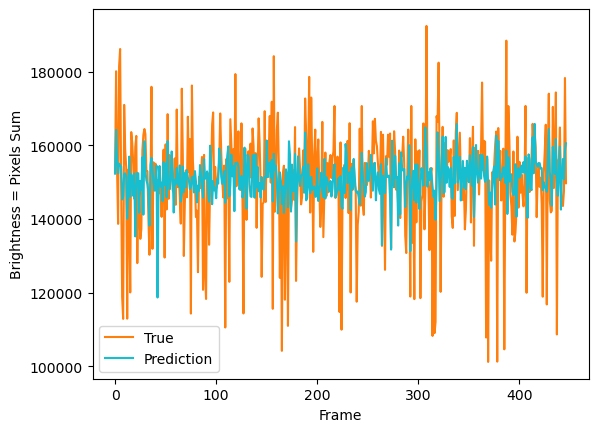

In [116]:
test_labels_ar =test_labels.to_numpy()

plt.plot(test_labels_ar, color='tab:orange', label='True')
plt.plot(preds, color='tab:cyan', label='Prediction')

plt.xlabel("Frame")
plt.ylabel("Brightness = Pixels Sum")

plt.legend()

plt.show()

In [95]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(data_train)

# visualize the first prediction's explanation
shap.plots.force(shap_values)

In [96]:
shap.plots.force(shap_values[0, ...])

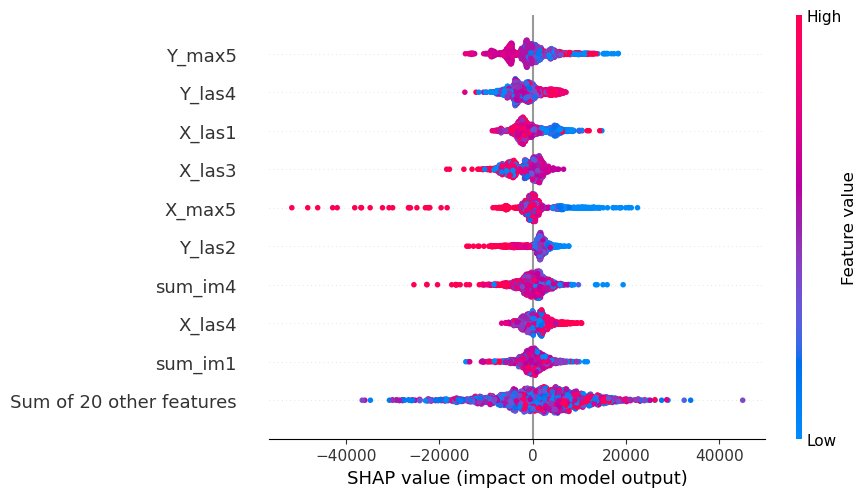

In [97]:
shap.plots.beeswarm(shap_values)

In [117]:
mse_err = mean_squared_error(preds, test_labels_ar)
mse_err

183342565.6186493

# Normalized data

In [120]:
final.shape

(2237, 30)

In [119]:
normalized_final = (final - final.mean())/final.std()
normalized_final.head

<bound method NDFrame.head of         X_las1    Y_las1    Power1    X_max1    Y_max1   sum_im1    X_las2  \
0     0.103876 -0.033470 -4.058226 -1.287004  0.139250  0.340909  0.247425   
1     0.247584 -0.095316 -4.058226  0.965756  0.139250  0.572480  0.391127   
2     0.391291 -0.157163 -4.058226 -0.385900  1.690939 -0.067119  0.534829   
3     0.534999 -0.219009 -4.058226  0.064652 -2.188284  0.402905  0.822233   
4     0.822414 -0.342702 -4.058226  0.064652 -0.636595 -0.344146  0.965935   
...        ...       ...       ...       ...       ...       ...       ...   
2232  0.165351  0.518703  0.246303  0.515204 -0.248673  0.321022  0.232911   
2233  0.233068  0.680527  0.246303 -1.287004 -0.636595  0.368940  0.300625   
2234  0.300785  0.842351  0.246303 -0.836452  1.690939  0.898435  0.368339   
2235  0.368503  1.004175  0.246303  0.965756  0.527172 -0.095339  0.402197   
2236  0.402361  1.085087  0.246303  0.515204 -0.248673 -0.412266  0.436054   

        Y_las2    Power2    X_max

In [121]:
end_train = '1425'
start_validation = '1430'
end_validation = '1785'
start_test = '1790'
data_train = normalized_final.loc[: end_train, :]
data_val   = normalized_final.loc[start_validation:end_validation, :]
data_test  = normalized_final.loc[start_test:, :]


train_labels = data_train['sum_im5']
data_train = data_train.iloc[:,:-1]

val_labels = data_val['sum_im5']
data_val = data_val.iloc[:,:-1]

test_labels = data_test['sum_im5']
data_test = data_test.iloc[:,:-1]

In [122]:
model = CatBoostRegressor(iterations = 5000, 
                          random_seed = 42, 
                          depth = 10,
                          #task_type = "GPU",
                          #devices = '0'
                         )

model.fit(data_train, train_labels, plot = True, eval_set = (data_test,test_labels))
preds = model.predict(data_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.020171
0:	learn: 1.0138747	test: 0.9335067	best: 0.9335067 (0)	total: 41ms	remaining: 3m 24s
1:	learn: 1.0106370	test: 0.9322129	best: 0.9322129 (1)	total: 61ms	remaining: 2m 32s
2:	learn: 1.0079411	test: 0.9313002	best: 0.9313002 (2)	total: 74.3ms	remaining: 2m 3s
3:	learn: 1.0051671	test: 0.9297340	best: 0.9297340 (3)	total: 90.7ms	remaining: 1m 53s
4:	learn: 1.0023194	test: 0.9286754	best: 0.9286754 (4)	total: 105ms	remaining: 1m 44s
5:	learn: 0.9995498	test: 0.9277665	best: 0.9277665 (5)	total: 120ms	remaining: 1m 39s
6:	learn: 0.9967886	test: 0.9262445	best: 0.9262445 (6)	total: 140ms	remaining: 1m 39s
7:	learn: 0.9946983	test: 0.9248492	best: 0.9248492 (7)	total: 154ms	remaining: 1m 36s
8:	learn: 0.9912457	test: 0.9228921	best: 0.9228921 (8)	total: 168ms	remaining: 1m 32s
9:	learn: 0.9891035	test: 0.9214217	best: 0.9214217 (9)	total: 182ms	remaining: 1m 30s
10:	learn: 0.9860589	test: 0.9202704	best: 0.9202704 (10)	total: 203ms	remaining: 1m 31s
11:	learn: 0

101:	learn: 0.8353770	test: 0.8785644	best: 0.8785644 (101)	total: 1.84s	remaining: 1m 28s
102:	learn: 0.8345951	test: 0.8784192	best: 0.8784192 (102)	total: 1.85s	remaining: 1m 28s
103:	learn: 0.8332276	test: 0.8781789	best: 0.8781789 (103)	total: 1.88s	remaining: 1m 28s
104:	learn: 0.8314515	test: 0.8782177	best: 0.8781789 (103)	total: 1.89s	remaining: 1m 28s
105:	learn: 0.8302566	test: 0.8781476	best: 0.8781476 (105)	total: 1.91s	remaining: 1m 28s
106:	learn: 0.8291265	test: 0.8779269	best: 0.8779269 (106)	total: 1.93s	remaining: 1m 28s
107:	learn: 0.8276915	test: 0.8779384	best: 0.8779269 (106)	total: 1.94s	remaining: 1m 27s
108:	learn: 0.8259139	test: 0.8775654	best: 0.8775654 (108)	total: 1.96s	remaining: 1m 28s
109:	learn: 0.8244045	test: 0.8773758	best: 0.8773758 (109)	total: 1.99s	remaining: 1m 28s
110:	learn: 0.8231392	test: 0.8773853	best: 0.8773758 (109)	total: 2s	remaining: 1m 28s
111:	learn: 0.8219178	test: 0.8768983	best: 0.8768983 (111)	total: 2.02s	remaining: 1m 28s
11

194:	learn: 0.7267125	test: 0.8705017	best: 0.8705017 (194)	total: 4.46s	remaining: 1m 49s
195:	learn: 0.7255095	test: 0.8704173	best: 0.8704173 (195)	total: 4.48s	remaining: 1m 49s
196:	learn: 0.7248447	test: 0.8703542	best: 0.8703542 (196)	total: 4.51s	remaining: 1m 50s
197:	learn: 0.7240045	test: 0.8701175	best: 0.8701175 (197)	total: 4.56s	remaining: 1m 50s
198:	learn: 0.7221600	test: 0.8698255	best: 0.8698255 (198)	total: 4.59s	remaining: 1m 50s
199:	learn: 0.7216397	test: 0.8698974	best: 0.8698255 (198)	total: 4.62s	remaining: 1m 50s
200:	learn: 0.7205994	test: 0.8695588	best: 0.8695588 (200)	total: 4.66s	remaining: 1m 51s
201:	learn: 0.7202285	test: 0.8695920	best: 0.8695588 (200)	total: 4.71s	remaining: 1m 51s
202:	learn: 0.7189766	test: 0.8694492	best: 0.8694492 (202)	total: 4.75s	remaining: 1m 52s
203:	learn: 0.7186794	test: 0.8693184	best: 0.8693184 (203)	total: 4.8s	remaining: 1m 52s
204:	learn: 0.7173854	test: 0.8693257	best: 0.8693184 (203)	total: 4.85s	remaining: 1m 53s


289:	learn: 0.6338093	test: 0.8661000	best: 0.8659024 (287)	total: 8.73s	remaining: 2m 21s
290:	learn: 0.6325917	test: 0.8659205	best: 0.8659024 (287)	total: 8.81s	remaining: 2m 22s
291:	learn: 0.6319913	test: 0.8660027	best: 0.8659024 (287)	total: 8.89s	remaining: 2m 23s
292:	learn: 0.6307505	test: 0.8660731	best: 0.8659024 (287)	total: 8.97s	remaining: 2m 24s
293:	learn: 0.6296445	test: 0.8655701	best: 0.8655701 (293)	total: 9.04s	remaining: 2m 24s
294:	learn: 0.6287848	test: 0.8654312	best: 0.8654312 (294)	total: 9.12s	remaining: 2m 25s
295:	learn: 0.6280002	test: 0.8656036	best: 0.8654312 (294)	total: 9.18s	remaining: 2m 25s
296:	learn: 0.6270277	test: 0.8657159	best: 0.8654312 (294)	total: 9.24s	remaining: 2m 26s
297:	learn: 0.6256989	test: 0.8656260	best: 0.8654312 (294)	total: 9.3s	remaining: 2m 26s
298:	learn: 0.6248517	test: 0.8656174	best: 0.8654312 (294)	total: 9.37s	remaining: 2m 27s
299:	learn: 0.6240853	test: 0.8656543	best: 0.8654312 (294)	total: 9.4s	remaining: 2m 27s
3

385:	learn: 0.5464290	test: 0.8636624	best: 0.8632128 (380)	total: 12.6s	remaining: 2m 30s
386:	learn: 0.5454453	test: 0.8640087	best: 0.8632128 (380)	total: 12.7s	remaining: 2m 30s
387:	learn: 0.5447015	test: 0.8640168	best: 0.8632128 (380)	total: 12.7s	remaining: 2m 30s
388:	learn: 0.5434145	test: 0.8641269	best: 0.8632128 (380)	total: 12.7s	remaining: 2m 31s
389:	learn: 0.5419325	test: 0.8643880	best: 0.8632128 (380)	total: 12.8s	remaining: 2m 31s
390:	learn: 0.5414567	test: 0.8643867	best: 0.8632128 (380)	total: 12.8s	remaining: 2m 31s
391:	learn: 0.5405313	test: 0.8644400	best: 0.8632128 (380)	total: 12.9s	remaining: 2m 31s
392:	learn: 0.5397079	test: 0.8645038	best: 0.8632128 (380)	total: 12.9s	remaining: 2m 31s
393:	learn: 0.5388682	test: 0.8646081	best: 0.8632128 (380)	total: 12.9s	remaining: 2m 31s
394:	learn: 0.5377552	test: 0.8646371	best: 0.8632128 (380)	total: 13s	remaining: 2m 31s
395:	learn: 0.5368296	test: 0.8643864	best: 0.8632128 (380)	total: 13s	remaining: 2m 31s
396

477:	learn: 0.4752066	test: 0.8609136	best: 0.8608547 (475)	total: 20.8s	remaining: 3m 16s
478:	learn: 0.4744287	test: 0.8609124	best: 0.8608547 (475)	total: 20.9s	remaining: 3m 16s
479:	learn: 0.4740768	test: 0.8608917	best: 0.8608547 (475)	total: 20.9s	remaining: 3m 16s
480:	learn: 0.4734237	test: 0.8608278	best: 0.8608278 (480)	total: 20.9s	remaining: 3m 16s
481:	learn: 0.4728950	test: 0.8606899	best: 0.8606899 (481)	total: 21s	remaining: 3m 16s
482:	learn: 0.4723563	test: 0.8607178	best: 0.8606899 (481)	total: 21s	remaining: 3m 16s
483:	learn: 0.4709676	test: 0.8604151	best: 0.8604151 (483)	total: 21.1s	remaining: 3m 16s
484:	learn: 0.4704024	test: 0.8604068	best: 0.8604068 (484)	total: 21.1s	remaining: 3m 16s
485:	learn: 0.4694685	test: 0.8603339	best: 0.8603339 (485)	total: 21.2s	remaining: 3m 17s
486:	learn: 0.4689390	test: 0.8604047	best: 0.8603339 (485)	total: 21.3s	remaining: 3m 17s
487:	learn: 0.4682046	test: 0.8600759	best: 0.8600759 (487)	total: 21.3s	remaining: 3m 17s
488

569:	learn: 0.4226831	test: 0.8571553	best: 0.8571553 (569)	total: 25.4s	remaining: 3m 17s
570:	learn: 0.4224121	test: 0.8570278	best: 0.8570278 (570)	total: 25.4s	remaining: 3m 17s
571:	learn: 0.4219981	test: 0.8570770	best: 0.8570278 (570)	total: 25.5s	remaining: 3m 17s
572:	learn: 0.4216672	test: 0.8571628	best: 0.8570278 (570)	total: 25.5s	remaining: 3m 17s
573:	learn: 0.4214138	test: 0.8571626	best: 0.8570278 (570)	total: 25.5s	remaining: 3m 16s
574:	learn: 0.4210006	test: 0.8571478	best: 0.8570278 (570)	total: 25.6s	remaining: 3m 16s
575:	learn: 0.4201831	test: 0.8572453	best: 0.8570278 (570)	total: 25.6s	remaining: 3m 16s
576:	learn: 0.4195359	test: 0.8572103	best: 0.8570278 (570)	total: 25.6s	remaining: 3m 16s
577:	learn: 0.4192358	test: 0.8572582	best: 0.8570278 (570)	total: 25.7s	remaining: 3m 16s
578:	learn: 0.4186993	test: 0.8571961	best: 0.8570278 (570)	total: 25.7s	remaining: 3m 16s
579:	learn: 0.4183520	test: 0.8571144	best: 0.8570278 (570)	total: 25.8s	remaining: 3m 16s

663:	learn: 0.3755712	test: 0.8556811	best: 0.8556136 (652)	total: 30s	remaining: 3m 15s
664:	learn: 0.3749904	test: 0.8556677	best: 0.8556136 (652)	total: 30s	remaining: 3m 15s
665:	learn: 0.3741820	test: 0.8557208	best: 0.8556136 (652)	total: 30.1s	remaining: 3m 15s
666:	learn: 0.3739604	test: 0.8557147	best: 0.8556136 (652)	total: 30.1s	remaining: 3m 15s
667:	learn: 0.3733240	test: 0.8557762	best: 0.8556136 (652)	total: 30.2s	remaining: 3m 15s
668:	learn: 0.3727466	test: 0.8558040	best: 0.8556136 (652)	total: 30.2s	remaining: 3m 15s
669:	learn: 0.3722127	test: 0.8557611	best: 0.8556136 (652)	total: 30.3s	remaining: 3m 15s
670:	learn: 0.3718082	test: 0.8557995	best: 0.8556136 (652)	total: 30.3s	remaining: 3m 15s
671:	learn: 0.3710805	test: 0.8557638	best: 0.8556136 (652)	total: 30.4s	remaining: 3m 15s
672:	learn: 0.3705109	test: 0.8558023	best: 0.8556136 (652)	total: 30.5s	remaining: 3m 15s
673:	learn: 0.3704647	test: 0.8558134	best: 0.8556136 (652)	total: 30.5s	remaining: 3m 16s
674

754:	learn: 0.3343951	test: 0.8545518	best: 0.8543321 (746)	total: 34.3s	remaining: 3m 12s
755:	learn: 0.3339319	test: 0.8546999	best: 0.8543321 (746)	total: 34.3s	remaining: 3m 12s
756:	learn: 0.3334660	test: 0.8547673	best: 0.8543321 (746)	total: 34.4s	remaining: 3m 12s
757:	learn: 0.3331523	test: 0.8547650	best: 0.8543321 (746)	total: 34.4s	remaining: 3m 12s
758:	learn: 0.3330094	test: 0.8547531	best: 0.8543321 (746)	total: 34.4s	remaining: 3m 12s
759:	learn: 0.3322949	test: 0.8547997	best: 0.8543321 (746)	total: 34.5s	remaining: 3m 12s
760:	learn: 0.3318713	test: 0.8548713	best: 0.8543321 (746)	total: 34.5s	remaining: 3m 12s
761:	learn: 0.3316012	test: 0.8548239	best: 0.8543321 (746)	total: 34.6s	remaining: 3m 12s
762:	learn: 0.3309329	test: 0.8547606	best: 0.8543321 (746)	total: 34.6s	remaining: 3m 12s
763:	learn: 0.3306745	test: 0.8548086	best: 0.8543321 (746)	total: 34.6s	remaining: 3m 11s
764:	learn: 0.3300416	test: 0.8548931	best: 0.8543321 (746)	total: 34.7s	remaining: 3m 11s

845:	learn: 0.3002518	test: 0.8545445	best: 0.8543321 (746)	total: 37.8s	remaining: 3m 5s
846:	learn: 0.2999356	test: 0.8545611	best: 0.8543321 (746)	total: 37.9s	remaining: 3m 5s
847:	learn: 0.2994391	test: 0.8545926	best: 0.8543321 (746)	total: 37.9s	remaining: 3m 5s
848:	learn: 0.2991256	test: 0.8546498	best: 0.8543321 (746)	total: 38s	remaining: 3m 5s
849:	learn: 0.2987056	test: 0.8546316	best: 0.8543321 (746)	total: 38s	remaining: 3m 5s
850:	learn: 0.2982437	test: 0.8545936	best: 0.8543321 (746)	total: 38s	remaining: 3m 5s
851:	learn: 0.2980022	test: 0.8546077	best: 0.8543321 (746)	total: 38.1s	remaining: 3m 5s
852:	learn: 0.2975606	test: 0.8545405	best: 0.8543321 (746)	total: 38.1s	remaining: 3m 5s
853:	learn: 0.2975415	test: 0.8545362	best: 0.8543321 (746)	total: 38.1s	remaining: 3m 5s
854:	learn: 0.2969831	test: 0.8545281	best: 0.8543321 (746)	total: 38.2s	remaining: 3m 4s
855:	learn: 0.2964289	test: 0.8545008	best: 0.8543321 (746)	total: 38.2s	remaining: 3m 4s
856:	learn: 0.29

939:	learn: 0.2688552	test: 0.8550022	best: 0.8543321 (746)	total: 41.4s	remaining: 2m 58s
940:	learn: 0.2687322	test: 0.8549412	best: 0.8543321 (746)	total: 41.4s	remaining: 2m 58s
941:	learn: 0.2684270	test: 0.8550000	best: 0.8543321 (746)	total: 41.4s	remaining: 2m 58s
942:	learn: 0.2683072	test: 0.8549869	best: 0.8543321 (746)	total: 41.5s	remaining: 2m 58s
943:	learn: 0.2680350	test: 0.8549709	best: 0.8543321 (746)	total: 41.5s	remaining: 2m 58s
944:	learn: 0.2676195	test: 0.8550200	best: 0.8543321 (746)	total: 41.5s	remaining: 2m 58s
945:	learn: 0.2674729	test: 0.8549941	best: 0.8543321 (746)	total: 41.6s	remaining: 2m 58s
946:	learn: 0.2668552	test: 0.8549147	best: 0.8543321 (746)	total: 41.6s	remaining: 2m 58s
947:	learn: 0.2668072	test: 0.8549085	best: 0.8543321 (746)	total: 41.7s	remaining: 2m 58s
948:	learn: 0.2664483	test: 0.8549937	best: 0.8543321 (746)	total: 41.7s	remaining: 2m 58s
949:	learn: 0.2660185	test: 0.8549580	best: 0.8543321 (746)	total: 41.7s	remaining: 2m 57s

1029:	learn: 0.2399276	test: 0.8550924	best: 0.8543321 (746)	total: 44.4s	remaining: 2m 51s
1030:	learn: 0.2394766	test: 0.8550447	best: 0.8543321 (746)	total: 44.4s	remaining: 2m 50s
1031:	learn: 0.2392342	test: 0.8550111	best: 0.8543321 (746)	total: 44.5s	remaining: 2m 50s
1032:	learn: 0.2388273	test: 0.8550155	best: 0.8543321 (746)	total: 44.5s	remaining: 2m 50s
1033:	learn: 0.2387977	test: 0.8550264	best: 0.8543321 (746)	total: 44.5s	remaining: 2m 50s
1034:	learn: 0.2385031	test: 0.8549675	best: 0.8543321 (746)	total: 44.6s	remaining: 2m 50s
1035:	learn: 0.2382959	test: 0.8550107	best: 0.8543321 (746)	total: 44.6s	remaining: 2m 50s
1036:	learn: 0.2379080	test: 0.8550877	best: 0.8543321 (746)	total: 44.6s	remaining: 2m 50s
1037:	learn: 0.2373695	test: 0.8551002	best: 0.8543321 (746)	total: 44.7s	remaining: 2m 50s
1038:	learn: 0.2370350	test: 0.8551603	best: 0.8543321 (746)	total: 44.7s	remaining: 2m 50s
1039:	learn: 0.2367502	test: 0.8551178	best: 0.8543321 (746)	total: 44.8s	remain

1122:	learn: 0.2109820	test: 0.8552143	best: 0.8543321 (746)	total: 48.1s	remaining: 2m 46s
1123:	learn: 0.2105741	test: 0.8552081	best: 0.8543321 (746)	total: 48.2s	remaining: 2m 46s
1124:	learn: 0.2101846	test: 0.8552406	best: 0.8543321 (746)	total: 48.3s	remaining: 2m 46s
1125:	learn: 0.2096481	test: 0.8553152	best: 0.8543321 (746)	total: 48.3s	remaining: 2m 46s
1126:	learn: 0.2092351	test: 0.8553352	best: 0.8543321 (746)	total: 48.4s	remaining: 2m 46s
1127:	learn: 0.2089048	test: 0.8553461	best: 0.8543321 (746)	total: 48.4s	remaining: 2m 46s
1128:	learn: 0.2086239	test: 0.8553140	best: 0.8543321 (746)	total: 48.5s	remaining: 2m 46s
1129:	learn: 0.2082520	test: 0.8553974	best: 0.8543321 (746)	total: 48.5s	remaining: 2m 46s
1130:	learn: 0.2079961	test: 0.8553895	best: 0.8543321 (746)	total: 48.6s	remaining: 2m 46s
1131:	learn: 0.2078696	test: 0.8553813	best: 0.8543321 (746)	total: 48.6s	remaining: 2m 46s
1132:	learn: 0.2074456	test: 0.8554221	best: 0.8543321 (746)	total: 48.7s	remain

1212:	learn: 0.1856510	test: 0.8558103	best: 0.8543321 (746)	total: 51.4s	remaining: 2m 40s
1213:	learn: 0.1856335	test: 0.8558177	best: 0.8543321 (746)	total: 51.4s	remaining: 2m 40s
1214:	learn: 0.1853960	test: 0.8558657	best: 0.8543321 (746)	total: 51.5s	remaining: 2m 40s
1215:	learn: 0.1851141	test: 0.8558194	best: 0.8543321 (746)	total: 51.5s	remaining: 2m 40s
1216:	learn: 0.1849918	test: 0.8558087	best: 0.8543321 (746)	total: 51.6s	remaining: 2m 40s
1217:	learn: 0.1847610	test: 0.8557908	best: 0.8543321 (746)	total: 51.7s	remaining: 2m 40s
1218:	learn: 0.1843938	test: 0.8558075	best: 0.8543321 (746)	total: 51.7s	remaining: 2m 40s
1219:	learn: 0.1839983	test: 0.8557964	best: 0.8543321 (746)	total: 51.8s	remaining: 2m 40s
1220:	learn: 0.1836637	test: 0.8558332	best: 0.8543321 (746)	total: 51.8s	remaining: 2m 40s
1221:	learn: 0.1834312	test: 0.8558129	best: 0.8543321 (746)	total: 51.9s	remaining: 2m 40s
1222:	learn: 0.1831701	test: 0.8558041	best: 0.8543321 (746)	total: 51.9s	remain

1302:	learn: 0.1635236	test: 0.8561227	best: 0.8543321 (746)	total: 55.2s	remaining: 2m 36s
1303:	learn: 0.1632399	test: 0.8561784	best: 0.8543321 (746)	total: 55.2s	remaining: 2m 36s
1304:	learn: 0.1629483	test: 0.8562063	best: 0.8543321 (746)	total: 55.2s	remaining: 2m 36s
1305:	learn: 0.1627125	test: 0.8562418	best: 0.8543321 (746)	total: 55.3s	remaining: 2m 36s
1306:	learn: 0.1624052	test: 0.8562086	best: 0.8543321 (746)	total: 55.3s	remaining: 2m 36s
1307:	learn: 0.1622946	test: 0.8561980	best: 0.8543321 (746)	total: 55.3s	remaining: 2m 36s
1308:	learn: 0.1618619	test: 0.8561514	best: 0.8543321 (746)	total: 55.4s	remaining: 2m 36s
1309:	learn: 0.1615908	test: 0.8561276	best: 0.8543321 (746)	total: 55.4s	remaining: 2m 36s
1310:	learn: 0.1613743	test: 0.8560887	best: 0.8543321 (746)	total: 55.4s	remaining: 2m 35s
1311:	learn: 0.1612068	test: 0.8560824	best: 0.8543321 (746)	total: 55.5s	remaining: 2m 35s
1312:	learn: 0.1609491	test: 0.8560300	best: 0.8543321 (746)	total: 55.5s	remain

1399:	learn: 0.1422664	test: 0.8568053	best: 0.8543321 (746)	total: 57.9s	remaining: 2m 28s
1400:	learn: 0.1421023	test: 0.8568201	best: 0.8543321 (746)	total: 58s	remaining: 2m 28s
1401:	learn: 0.1418577	test: 0.8567801	best: 0.8543321 (746)	total: 58s	remaining: 2m 28s
1402:	learn: 0.1415475	test: 0.8567617	best: 0.8543321 (746)	total: 58.1s	remaining: 2m 28s
1403:	learn: 0.1414059	test: 0.8567826	best: 0.8543321 (746)	total: 58.1s	remaining: 2m 28s
1404:	learn: 0.1411511	test: 0.8567712	best: 0.8543321 (746)	total: 58.1s	remaining: 2m 28s
1405:	learn: 0.1408638	test: 0.8567822	best: 0.8543321 (746)	total: 58.1s	remaining: 2m 28s
1406:	learn: 0.1406088	test: 0.8568140	best: 0.8543321 (746)	total: 58.2s	remaining: 2m 28s
1407:	learn: 0.1404751	test: 0.8568569	best: 0.8543321 (746)	total: 58.2s	remaining: 2m 28s
1408:	learn: 0.1402854	test: 0.8569124	best: 0.8543321 (746)	total: 58.2s	remaining: 2m 28s
1409:	learn: 0.1401587	test: 0.8569093	best: 0.8543321 (746)	total: 58.3s	remaining:

1489:	learn: 0.1249666	test: 0.8572407	best: 0.8543321 (746)	total: 1m	remaining: 2m 22s
1490:	learn: 0.1248049	test: 0.8572197	best: 0.8543321 (746)	total: 1m	remaining: 2m 22s
1491:	learn: 0.1246779	test: 0.8572257	best: 0.8543321 (746)	total: 1m	remaining: 2m 22s
1492:	learn: 0.1245203	test: 0.8572514	best: 0.8543321 (746)	total: 1m	remaining: 2m 22s
1493:	learn: 0.1242913	test: 0.8572416	best: 0.8543321 (746)	total: 1m	remaining: 2m 22s
1494:	learn: 0.1241282	test: 0.8572132	best: 0.8543321 (746)	total: 1m	remaining: 2m 22s
1495:	learn: 0.1239239	test: 0.8572234	best: 0.8543321 (746)	total: 1m	remaining: 2m 22s
1496:	learn: 0.1237307	test: 0.8571984	best: 0.8543321 (746)	total: 1m	remaining: 2m 22s
1497:	learn: 0.1235701	test: 0.8572289	best: 0.8543321 (746)	total: 1m	remaining: 2m 22s
1498:	learn: 0.1234012	test: 0.8572164	best: 0.8543321 (746)	total: 1m	remaining: 2m 22s
1499:	learn: 0.1232667	test: 0.8572230	best: 0.8543321 (746)	total: 1m 1s	remaining: 2m 22s
1500:	learn: 0.123

1582:	learn: 0.1104311	test: 0.8572283	best: 0.8543321 (746)	total: 1m 4s	remaining: 2m 18s
1583:	learn: 0.1101308	test: 0.8572002	best: 0.8543321 (746)	total: 1m 4s	remaining: 2m 18s
1584:	learn: 0.1099071	test: 0.8571909	best: 0.8543321 (746)	total: 1m 4s	remaining: 2m 18s
1585:	learn: 0.1097967	test: 0.8572147	best: 0.8543321 (746)	total: 1m 4s	remaining: 2m 18s
1586:	learn: 0.1096356	test: 0.8572359	best: 0.8543321 (746)	total: 1m 4s	remaining: 2m 18s
1587:	learn: 0.1095507	test: 0.8572387	best: 0.8543321 (746)	total: 1m 4s	remaining: 2m 18s
1588:	learn: 0.1094027	test: 0.8572013	best: 0.8543321 (746)	total: 1m 4s	remaining: 2m 18s
1589:	learn: 0.1092298	test: 0.8571826	best: 0.8543321 (746)	total: 1m 4s	remaining: 2m 18s
1590:	learn: 0.1091125	test: 0.8572125	best: 0.8543321 (746)	total: 1m 4s	remaining: 2m 18s
1591:	learn: 0.1089977	test: 0.8572015	best: 0.8543321 (746)	total: 1m 4s	remaining: 2m 18s
1592:	learn: 0.1087452	test: 0.8571825	best: 0.8543321 (746)	total: 1m 4s	remain

1678:	learn: 0.0968693	test: 0.8572620	best: 0.8543321 (746)	total: 1m 7s	remaining: 2m 12s
1679:	learn: 0.0966872	test: 0.8572809	best: 0.8543321 (746)	total: 1m 7s	remaining: 2m 12s
1680:	learn: 0.0965940	test: 0.8572840	best: 0.8543321 (746)	total: 1m 7s	remaining: 2m 12s
1681:	learn: 0.0964983	test: 0.8572821	best: 0.8543321 (746)	total: 1m 7s	remaining: 2m 12s
1682:	learn: 0.0963551	test: 0.8572615	best: 0.8543321 (746)	total: 1m 7s	remaining: 2m 12s
1683:	learn: 0.0963156	test: 0.8572580	best: 0.8543321 (746)	total: 1m 7s	remaining: 2m 12s
1684:	learn: 0.0962194	test: 0.8572606	best: 0.8543321 (746)	total: 1m 7s	remaining: 2m 12s
1685:	learn: 0.0960642	test: 0.8572280	best: 0.8543321 (746)	total: 1m 7s	remaining: 2m 12s
1686:	learn: 0.0959501	test: 0.8572379	best: 0.8543321 (746)	total: 1m 7s	remaining: 2m 12s
1687:	learn: 0.0958682	test: 0.8572342	best: 0.8543321 (746)	total: 1m 7s	remaining: 2m 12s
1688:	learn: 0.0956941	test: 0.8572492	best: 0.8543321 (746)	total: 1m 7s	remain

1772:	learn: 0.0861503	test: 0.8570935	best: 0.8543321 (746)	total: 1m 10s	remaining: 2m 8s
1773:	learn: 0.0859865	test: 0.8570887	best: 0.8543321 (746)	total: 1m 10s	remaining: 2m 8s
1774:	learn: 0.0858848	test: 0.8570898	best: 0.8543321 (746)	total: 1m 10s	remaining: 2m 8s
1775:	learn: 0.0857954	test: 0.8570787	best: 0.8543321 (746)	total: 1m 10s	remaining: 2m 8s
1776:	learn: 0.0856812	test: 0.8570815	best: 0.8543321 (746)	total: 1m 10s	remaining: 2m 8s
1777:	learn: 0.0855443	test: 0.8570833	best: 0.8543321 (746)	total: 1m 10s	remaining: 2m 8s
1778:	learn: 0.0853240	test: 0.8570375	best: 0.8543321 (746)	total: 1m 10s	remaining: 2m 8s
1779:	learn: 0.0851776	test: 0.8570531	best: 0.8543321 (746)	total: 1m 10s	remaining: 2m 8s
1780:	learn: 0.0851215	test: 0.8570476	best: 0.8543321 (746)	total: 1m 10s	remaining: 2m 8s
1781:	learn: 0.0850343	test: 0.8570366	best: 0.8543321 (746)	total: 1m 10s	remaining: 2m 7s
1782:	learn: 0.0849558	test: 0.8570411	best: 0.8543321 (746)	total: 1m 10s	remai

1868:	learn: 0.0763010	test: 0.8572862	best: 0.8543321 (746)	total: 1m 15s	remaining: 2m 6s
1869:	learn: 0.0762391	test: 0.8572822	best: 0.8543321 (746)	total: 1m 15s	remaining: 2m 6s
1870:	learn: 0.0760980	test: 0.8572716	best: 0.8543321 (746)	total: 1m 15s	remaining: 2m 6s
1871:	learn: 0.0759838	test: 0.8572744	best: 0.8543321 (746)	total: 1m 15s	remaining: 2m 5s
1872:	learn: 0.0759037	test: 0.8572659	best: 0.8543321 (746)	total: 1m 15s	remaining: 2m 5s
1873:	learn: 0.0758522	test: 0.8572730	best: 0.8543321 (746)	total: 1m 15s	remaining: 2m 5s
1874:	learn: 0.0757414	test: 0.8572595	best: 0.8543321 (746)	total: 1m 15s	remaining: 2m 5s
1875:	learn: 0.0756718	test: 0.8572644	best: 0.8543321 (746)	total: 1m 15s	remaining: 2m 5s
1876:	learn: 0.0755962	test: 0.8572642	best: 0.8543321 (746)	total: 1m 15s	remaining: 2m 5s
1877:	learn: 0.0754722	test: 0.8572709	best: 0.8543321 (746)	total: 1m 15s	remaining: 2m 5s
1878:	learn: 0.0753407	test: 0.8572771	best: 0.8543321 (746)	total: 1m 15s	remai

1963:	learn: 0.0678230	test: 0.8574288	best: 0.8543321 (746)	total: 1m 19s	remaining: 2m 2s
1964:	learn: 0.0678174	test: 0.8574293	best: 0.8543321 (746)	total: 1m 19s	remaining: 2m 2s
1965:	learn: 0.0677525	test: 0.8574283	best: 0.8543321 (746)	total: 1m 19s	remaining: 2m 2s
1966:	learn: 0.0676299	test: 0.8574327	best: 0.8543321 (746)	total: 1m 19s	remaining: 2m 2s
1967:	learn: 0.0675350	test: 0.8574463	best: 0.8543321 (746)	total: 1m 19s	remaining: 2m 2s
1968:	learn: 0.0673843	test: 0.8574683	best: 0.8543321 (746)	total: 1m 19s	remaining: 2m 2s
1969:	learn: 0.0672891	test: 0.8574530	best: 0.8543321 (746)	total: 1m 19s	remaining: 2m 2s
1970:	learn: 0.0672236	test: 0.8574712	best: 0.8543321 (746)	total: 1m 19s	remaining: 2m 2s
1971:	learn: 0.0671208	test: 0.8574845	best: 0.8543321 (746)	total: 1m 19s	remaining: 2m 2s
1972:	learn: 0.0670798	test: 0.8575045	best: 0.8543321 (746)	total: 1m 19s	remaining: 2m 2s
1973:	learn: 0.0670725	test: 0.8575041	best: 0.8543321 (746)	total: 1m 19s	remai

2056:	learn: 0.0608058	test: 0.8575732	best: 0.8543321 (746)	total: 1m 23s	remaining: 2m
2057:	learn: 0.0606929	test: 0.8575668	best: 0.8543321 (746)	total: 1m 24s	remaining: 2m
2058:	learn: 0.0606292	test: 0.8575702	best: 0.8543321 (746)	total: 1m 24s	remaining: 2m
2059:	learn: 0.0605382	test: 0.8575645	best: 0.8543321 (746)	total: 1m 24s	remaining: 2m
2060:	learn: 0.0604750	test: 0.8575589	best: 0.8543321 (746)	total: 1m 24s	remaining: 2m
2061:	learn: 0.0603800	test: 0.8575666	best: 0.8543321 (746)	total: 1m 24s	remaining: 2m
2062:	learn: 0.0602368	test: 0.8575673	best: 0.8543321 (746)	total: 1m 24s	remaining: 2m
2063:	learn: 0.0601822	test: 0.8575644	best: 0.8543321 (746)	total: 1m 24s	remaining: 2m
2064:	learn: 0.0601253	test: 0.8575573	best: 0.8543321 (746)	total: 1m 24s	remaining: 2m
2065:	learn: 0.0600703	test: 0.8575603	best: 0.8543321 (746)	total: 1m 24s	remaining: 2m
2066:	learn: 0.0599998	test: 0.8575586	best: 0.8543321 (746)	total: 1m 24s	remaining: 2m
2067:	learn: 0.059929

2147:	learn: 0.0545443	test: 0.8576118	best: 0.8543321 (746)	total: 1m 28s	remaining: 1m 56s
2148:	learn: 0.0544931	test: 0.8576069	best: 0.8543321 (746)	total: 1m 28s	remaining: 1m 56s
2149:	learn: 0.0543761	test: 0.8576011	best: 0.8543321 (746)	total: 1m 28s	remaining: 1m 56s
2150:	learn: 0.0542975	test: 0.8576134	best: 0.8543321 (746)	total: 1m 28s	remaining: 1m 56s
2151:	learn: 0.0542613	test: 0.8576046	best: 0.8543321 (746)	total: 1m 28s	remaining: 1m 56s
2152:	learn: 0.0541928	test: 0.8576177	best: 0.8543321 (746)	total: 1m 28s	remaining: 1m 56s
2153:	learn: 0.0541376	test: 0.8576217	best: 0.8543321 (746)	total: 1m 28s	remaining: 1m 56s
2154:	learn: 0.0540240	test: 0.8576527	best: 0.8543321 (746)	total: 1m 28s	remaining: 1m 56s
2155:	learn: 0.0539754	test: 0.8576614	best: 0.8543321 (746)	total: 1m 28s	remaining: 1m 56s
2156:	learn: 0.0538858	test: 0.8576719	best: 0.8543321 (746)	total: 1m 28s	remaining: 1m 56s
2157:	learn: 0.0538177	test: 0.8576681	best: 0.8543321 (746)	total: 1m

2238:	learn: 0.0488835	test: 0.8577431	best: 0.8543321 (746)	total: 1m 32s	remaining: 1m 53s
2239:	learn: 0.0488328	test: 0.8577360	best: 0.8543321 (746)	total: 1m 32s	remaining: 1m 53s
2240:	learn: 0.0487757	test: 0.8577358	best: 0.8543321 (746)	total: 1m 32s	remaining: 1m 53s
2241:	learn: 0.0487180	test: 0.8577362	best: 0.8543321 (746)	total: 1m 32s	remaining: 1m 53s
2242:	learn: 0.0486457	test: 0.8577284	best: 0.8543321 (746)	total: 1m 32s	remaining: 1m 53s
2243:	learn: 0.0486175	test: 0.8577306	best: 0.8543321 (746)	total: 1m 32s	remaining: 1m 53s
2244:	learn: 0.0485949	test: 0.8577205	best: 0.8543321 (746)	total: 1m 32s	remaining: 1m 53s
2245:	learn: 0.0485630	test: 0.8577222	best: 0.8543321 (746)	total: 1m 32s	remaining: 1m 53s
2246:	learn: 0.0485099	test: 0.8577275	best: 0.8543321 (746)	total: 1m 32s	remaining: 1m 53s
2247:	learn: 0.0484391	test: 0.8577380	best: 0.8543321 (746)	total: 1m 32s	remaining: 1m 53s
2248:	learn: 0.0483673	test: 0.8577342	best: 0.8543321 (746)	total: 1m

2328:	learn: 0.0442023	test: 0.8576751	best: 0.8543321 (746)	total: 1m 37s	remaining: 1m 51s
2329:	learn: 0.0441329	test: 0.8576656	best: 0.8543321 (746)	total: 1m 37s	remaining: 1m 51s
2330:	learn: 0.0440422	test: 0.8576673	best: 0.8543321 (746)	total: 1m 37s	remaining: 1m 51s
2331:	learn: 0.0440124	test: 0.8576751	best: 0.8543321 (746)	total: 1m 37s	remaining: 1m 51s
2332:	learn: 0.0439679	test: 0.8576691	best: 0.8543321 (746)	total: 1m 37s	remaining: 1m 51s
2333:	learn: 0.0439117	test: 0.8576755	best: 0.8543321 (746)	total: 1m 37s	remaining: 1m 51s
2334:	learn: 0.0438593	test: 0.8576861	best: 0.8543321 (746)	total: 1m 37s	remaining: 1m 51s
2335:	learn: 0.0437888	test: 0.8577069	best: 0.8543321 (746)	total: 1m 37s	remaining: 1m 51s
2336:	learn: 0.0437128	test: 0.8576938	best: 0.8543321 (746)	total: 1m 37s	remaining: 1m 51s
2337:	learn: 0.0435989	test: 0.8577123	best: 0.8543321 (746)	total: 1m 37s	remaining: 1m 51s
2338:	learn: 0.0435396	test: 0.8577121	best: 0.8543321 (746)	total: 1m

2421:	learn: 0.0392472	test: 0.8578297	best: 0.8543321 (746)	total: 1m 42s	remaining: 1m 48s
2422:	learn: 0.0392214	test: 0.8578285	best: 0.8543321 (746)	total: 1m 42s	remaining: 1m 48s
2423:	learn: 0.0391841	test: 0.8578215	best: 0.8543321 (746)	total: 1m 42s	remaining: 1m 48s
2424:	learn: 0.0391278	test: 0.8578262	best: 0.8543321 (746)	total: 1m 42s	remaining: 1m 48s
2425:	learn: 0.0390915	test: 0.8578260	best: 0.8543321 (746)	total: 1m 42s	remaining: 1m 48s
2426:	learn: 0.0390332	test: 0.8578378	best: 0.8543321 (746)	total: 1m 42s	remaining: 1m 48s
2427:	learn: 0.0389661	test: 0.8578346	best: 0.8543321 (746)	total: 1m 42s	remaining: 1m 48s
2428:	learn: 0.0389145	test: 0.8578372	best: 0.8543321 (746)	total: 1m 42s	remaining: 1m 48s
2429:	learn: 0.0388992	test: 0.8578410	best: 0.8543321 (746)	total: 1m 42s	remaining: 1m 48s
2430:	learn: 0.0388558	test: 0.8578352	best: 0.8543321 (746)	total: 1m 42s	remaining: 1m 48s
2431:	learn: 0.0388032	test: 0.8578237	best: 0.8543321 (746)	total: 1m

2513:	learn: 0.0352528	test: 0.8577982	best: 0.8543321 (746)	total: 1m 47s	remaining: 1m 45s
2514:	learn: 0.0352231	test: 0.8577980	best: 0.8543321 (746)	total: 1m 47s	remaining: 1m 45s
2515:	learn: 0.0351388	test: 0.8577868	best: 0.8543321 (746)	total: 1m 47s	remaining: 1m 45s
2516:	learn: 0.0351085	test: 0.8577873	best: 0.8543321 (746)	total: 1m 47s	remaining: 1m 45s
2517:	learn: 0.0350851	test: 0.8577875	best: 0.8543321 (746)	total: 1m 47s	remaining: 1m 45s
2518:	learn: 0.0350394	test: 0.8577853	best: 0.8543321 (746)	total: 1m 47s	remaining: 1m 45s
2519:	learn: 0.0350055	test: 0.8577815	best: 0.8543321 (746)	total: 1m 47s	remaining: 1m 45s
2520:	learn: 0.0349623	test: 0.8577799	best: 0.8543321 (746)	total: 1m 47s	remaining: 1m 45s
2521:	learn: 0.0349057	test: 0.8577823	best: 0.8543321 (746)	total: 1m 47s	remaining: 1m 45s
2522:	learn: 0.0348854	test: 0.8577761	best: 0.8543321 (746)	total: 1m 47s	remaining: 1m 45s
2523:	learn: 0.0348506	test: 0.8577845	best: 0.8543321 (746)	total: 1m

2605:	learn: 0.0317868	test: 0.8577658	best: 0.8543321 (746)	total: 1m 52s	remaining: 1m 43s
2606:	learn: 0.0317527	test: 0.8577652	best: 0.8543321 (746)	total: 1m 52s	remaining: 1m 43s
2607:	learn: 0.0316952	test: 0.8577633	best: 0.8543321 (746)	total: 1m 52s	remaining: 1m 43s
2608:	learn: 0.0316713	test: 0.8577605	best: 0.8543321 (746)	total: 1m 53s	remaining: 1m 43s
2609:	learn: 0.0316091	test: 0.8577587	best: 0.8543321 (746)	total: 1m 53s	remaining: 1m 43s
2610:	learn: 0.0315785	test: 0.8577482	best: 0.8543321 (746)	total: 1m 53s	remaining: 1m 43s
2611:	learn: 0.0315463	test: 0.8577408	best: 0.8543321 (746)	total: 1m 53s	remaining: 1m 43s
2612:	learn: 0.0315425	test: 0.8577425	best: 0.8543321 (746)	total: 1m 53s	remaining: 1m 43s
2613:	learn: 0.0315173	test: 0.8577463	best: 0.8543321 (746)	total: 1m 53s	remaining: 1m 43s
2614:	learn: 0.0314634	test: 0.8577501	best: 0.8543321 (746)	total: 1m 53s	remaining: 1m 43s
2615:	learn: 0.0314382	test: 0.8577488	best: 0.8543321 (746)	total: 1m

2695:	learn: 0.0288334	test: 0.8577366	best: 0.8543321 (746)	total: 1m 58s	remaining: 1m 41s
2696:	learn: 0.0288148	test: 0.8577351	best: 0.8543321 (746)	total: 1m 58s	remaining: 1m 41s
2697:	learn: 0.0287814	test: 0.8577344	best: 0.8543321 (746)	total: 1m 58s	remaining: 1m 41s
2698:	learn: 0.0287523	test: 0.8577278	best: 0.8543321 (746)	total: 1m 58s	remaining: 1m 41s
2699:	learn: 0.0287004	test: 0.8577248	best: 0.8543321 (746)	total: 1m 58s	remaining: 1m 41s
2700:	learn: 0.0286447	test: 0.8577237	best: 0.8543321 (746)	total: 1m 58s	remaining: 1m 41s
2701:	learn: 0.0286012	test: 0.8577261	best: 0.8543321 (746)	total: 1m 59s	remaining: 1m 41s
2702:	learn: 0.0285906	test: 0.8577266	best: 0.8543321 (746)	total: 1m 59s	remaining: 1m 41s
2703:	learn: 0.0285523	test: 0.8577279	best: 0.8543321 (746)	total: 1m 59s	remaining: 1m 41s
2704:	learn: 0.0285150	test: 0.8577268	best: 0.8543321 (746)	total: 1m 59s	remaining: 1m 41s
2705:	learn: 0.0284570	test: 0.8577198	best: 0.8543321 (746)	total: 1m

2785:	learn: 0.0260519	test: 0.8576636	best: 0.8543321 (746)	total: 2m 4s	remaining: 1m 39s
2786:	learn: 0.0260233	test: 0.8576745	best: 0.8543321 (746)	total: 2m 4s	remaining: 1m 39s
2787:	learn: 0.0260228	test: 0.8576744	best: 0.8543321 (746)	total: 2m 4s	remaining: 1m 39s
2788:	learn: 0.0260224	test: 0.8576751	best: 0.8543321 (746)	total: 2m 4s	remaining: 1m 38s
2789:	learn: 0.0259793	test: 0.8576799	best: 0.8543321 (746)	total: 2m 4s	remaining: 1m 38s
2790:	learn: 0.0259535	test: 0.8576760	best: 0.8543321 (746)	total: 2m 4s	remaining: 1m 38s
2791:	learn: 0.0259199	test: 0.8576811	best: 0.8543321 (746)	total: 2m 4s	remaining: 1m 38s
2792:	learn: 0.0258863	test: 0.8576790	best: 0.8543321 (746)	total: 2m 5s	remaining: 1m 38s
2793:	learn: 0.0258422	test: 0.8576763	best: 0.8543321 (746)	total: 2m 5s	remaining: 1m 38s
2794:	learn: 0.0258313	test: 0.8576790	best: 0.8543321 (746)	total: 2m 5s	remaining: 1m 38s
2795:	learn: 0.0257925	test: 0.8576785	best: 0.8543321 (746)	total: 2m 5s	remain

2875:	learn: 0.0235891	test: 0.8576723	best: 0.8543321 (746)	total: 2m 9s	remaining: 1m 35s
2876:	learn: 0.0235577	test: 0.8576681	best: 0.8543321 (746)	total: 2m 9s	remaining: 1m 35s
2877:	learn: 0.0235258	test: 0.8576696	best: 0.8543321 (746)	total: 2m 9s	remaining: 1m 35s
2878:	learn: 0.0235091	test: 0.8576718	best: 0.8543321 (746)	total: 2m 9s	remaining: 1m 35s
2879:	learn: 0.0234717	test: 0.8576727	best: 0.8543321 (746)	total: 2m 9s	remaining: 1m 35s
2880:	learn: 0.0234416	test: 0.8576771	best: 0.8543321 (746)	total: 2m 9s	remaining: 1m 35s
2881:	learn: 0.0234058	test: 0.8576848	best: 0.8543321 (746)	total: 2m 9s	remaining: 1m 35s
2882:	learn: 0.0233795	test: 0.8576838	best: 0.8543321 (746)	total: 2m 9s	remaining: 1m 35s
2883:	learn: 0.0233586	test: 0.8576847	best: 0.8543321 (746)	total: 2m 9s	remaining: 1m 35s
2884:	learn: 0.0233165	test: 0.8576947	best: 0.8543321 (746)	total: 2m 9s	remaining: 1m 35s
2885:	learn: 0.0232710	test: 0.8576922	best: 0.8543321 (746)	total: 2m 10s	remai

2967:	learn: 0.0209642	test: 0.8577526	best: 0.8543321 (746)	total: 2m 15s	remaining: 1m 33s
2968:	learn: 0.0209398	test: 0.8577536	best: 0.8543321 (746)	total: 2m 16s	remaining: 1m 33s
2969:	learn: 0.0209307	test: 0.8577503	best: 0.8543321 (746)	total: 2m 16s	remaining: 1m 33s
2970:	learn: 0.0209114	test: 0.8577518	best: 0.8543321 (746)	total: 2m 16s	remaining: 1m 32s
2971:	learn: 0.0208721	test: 0.8577493	best: 0.8543321 (746)	total: 2m 16s	remaining: 1m 32s
2972:	learn: 0.0208435	test: 0.8577458	best: 0.8543321 (746)	total: 2m 16s	remaining: 1m 32s
2973:	learn: 0.0208049	test: 0.8577490	best: 0.8543321 (746)	total: 2m 16s	remaining: 1m 32s
2974:	learn: 0.0207937	test: 0.8577489	best: 0.8543321 (746)	total: 2m 16s	remaining: 1m 32s
2975:	learn: 0.0207756	test: 0.8577463	best: 0.8543321 (746)	total: 2m 16s	remaining: 1m 32s
2976:	learn: 0.0207529	test: 0.8577504	best: 0.8543321 (746)	total: 2m 16s	remaining: 1m 32s
2977:	learn: 0.0207369	test: 0.8577505	best: 0.8543321 (746)	total: 2m

3058:	learn: 0.0188147	test: 0.8577674	best: 0.8543321 (746)	total: 2m 22s	remaining: 1m 30s
3059:	learn: 0.0188146	test: 0.8577678	best: 0.8543321 (746)	total: 2m 22s	remaining: 1m 30s
3060:	learn: 0.0187884	test: 0.8577631	best: 0.8543321 (746)	total: 2m 22s	remaining: 1m 30s
3061:	learn: 0.0187756	test: 0.8577666	best: 0.8543321 (746)	total: 2m 22s	remaining: 1m 29s
3062:	learn: 0.0187564	test: 0.8577711	best: 0.8543321 (746)	total: 2m 22s	remaining: 1m 29s
3063:	learn: 0.0187388	test: 0.8577693	best: 0.8543321 (746)	total: 2m 22s	remaining: 1m 29s
3064:	learn: 0.0187249	test: 0.8577716	best: 0.8543321 (746)	total: 2m 22s	remaining: 1m 29s
3065:	learn: 0.0187079	test: 0.8577706	best: 0.8543321 (746)	total: 2m 22s	remaining: 1m 29s
3066:	learn: 0.0186992	test: 0.8577694	best: 0.8543321 (746)	total: 2m 22s	remaining: 1m 29s
3067:	learn: 0.0186730	test: 0.8577637	best: 0.8543321 (746)	total: 2m 22s	remaining: 1m 29s
3068:	learn: 0.0186523	test: 0.8577625	best: 0.8543321 (746)	total: 2m

3152:	learn: 0.0168376	test: 0.8577826	best: 0.8543321 (746)	total: 2m 26s	remaining: 1m 26s
3153:	learn: 0.0168245	test: 0.8577860	best: 0.8543321 (746)	total: 2m 26s	remaining: 1m 26s
3154:	learn: 0.0168058	test: 0.8577867	best: 0.8543321 (746)	total: 2m 27s	remaining: 1m 25s
3155:	learn: 0.0167880	test: 0.8577848	best: 0.8543321 (746)	total: 2m 27s	remaining: 1m 25s
3156:	learn: 0.0167590	test: 0.8577875	best: 0.8543321 (746)	total: 2m 27s	remaining: 1m 25s
3157:	learn: 0.0167455	test: 0.8577852	best: 0.8543321 (746)	total: 2m 27s	remaining: 1m 25s
3158:	learn: 0.0167417	test: 0.8577847	best: 0.8543321 (746)	total: 2m 27s	remaining: 1m 25s
3159:	learn: 0.0167099	test: 0.8577849	best: 0.8543321 (746)	total: 2m 27s	remaining: 1m 25s
3160:	learn: 0.0166960	test: 0.8577846	best: 0.8543321 (746)	total: 2m 27s	remaining: 1m 25s
3161:	learn: 0.0166959	test: 0.8577844	best: 0.8543321 (746)	total: 2m 27s	remaining: 1m 25s
3162:	learn: 0.0166923	test: 0.8577826	best: 0.8543321 (746)	total: 2m

3247:	learn: 0.0152315	test: 0.8577753	best: 0.8543321 (746)	total: 2m 30s	remaining: 1m 21s
3248:	learn: 0.0152195	test: 0.8577761	best: 0.8543321 (746)	total: 2m 30s	remaining: 1m 21s
3249:	learn: 0.0151955	test: 0.8577731	best: 0.8543321 (746)	total: 2m 30s	remaining: 1m 21s
3250:	learn: 0.0151768	test: 0.8577650	best: 0.8543321 (746)	total: 2m 30s	remaining: 1m 21s
3251:	learn: 0.0151609	test: 0.8577622	best: 0.8543321 (746)	total: 2m 30s	remaining: 1m 20s
3252:	learn: 0.0151480	test: 0.8577637	best: 0.8543321 (746)	total: 2m 30s	remaining: 1m 20s
3253:	learn: 0.0151423	test: 0.8577640	best: 0.8543321 (746)	total: 2m 30s	remaining: 1m 20s
3254:	learn: 0.0151292	test: 0.8577660	best: 0.8543321 (746)	total: 2m 30s	remaining: 1m 20s
3255:	learn: 0.0151121	test: 0.8577632	best: 0.8543321 (746)	total: 2m 30s	remaining: 1m 20s
3256:	learn: 0.0150968	test: 0.8577619	best: 0.8543321 (746)	total: 2m 30s	remaining: 1m 20s
3257:	learn: 0.0150691	test: 0.8577562	best: 0.8543321 (746)	total: 2m

3339:	learn: 0.0137958	test: 0.8577726	best: 0.8543321 (746)	total: 2m 34s	remaining: 1m 16s
3340:	learn: 0.0137809	test: 0.8577684	best: 0.8543321 (746)	total: 2m 34s	remaining: 1m 16s
3341:	learn: 0.0137653	test: 0.8577696	best: 0.8543321 (746)	total: 2m 34s	remaining: 1m 16s
3342:	learn: 0.0137495	test: 0.8577697	best: 0.8543321 (746)	total: 2m 34s	remaining: 1m 16s
3343:	learn: 0.0137411	test: 0.8577683	best: 0.8543321 (746)	total: 2m 34s	remaining: 1m 16s
3344:	learn: 0.0137338	test: 0.8577688	best: 0.8543321 (746)	total: 2m 34s	remaining: 1m 16s
3345:	learn: 0.0137310	test: 0.8577686	best: 0.8543321 (746)	total: 2m 34s	remaining: 1m 16s
3346:	learn: 0.0137273	test: 0.8577704	best: 0.8543321 (746)	total: 2m 34s	remaining: 1m 16s
3347:	learn: 0.0137156	test: 0.8577723	best: 0.8543321 (746)	total: 2m 34s	remaining: 1m 16s
3348:	learn: 0.0136964	test: 0.8577729	best: 0.8543321 (746)	total: 2m 34s	remaining: 1m 16s
3349:	learn: 0.0136919	test: 0.8577716	best: 0.8543321 (746)	total: 2m

3428:	learn: 0.0126241	test: 0.8577810	best: 0.8543321 (746)	total: 2m 38s	remaining: 1m 12s
3429:	learn: 0.0126087	test: 0.8577807	best: 0.8543321 (746)	total: 2m 38s	remaining: 1m 12s
3430:	learn: 0.0126024	test: 0.8577802	best: 0.8543321 (746)	total: 2m 38s	remaining: 1m 12s
3431:	learn: 0.0125996	test: 0.8577807	best: 0.8543321 (746)	total: 2m 38s	remaining: 1m 12s
3432:	learn: 0.0125874	test: 0.8577807	best: 0.8543321 (746)	total: 2m 38s	remaining: 1m 12s
3433:	learn: 0.0125686	test: 0.8577829	best: 0.8543321 (746)	total: 2m 38s	remaining: 1m 12s
3434:	learn: 0.0125591	test: 0.8577817	best: 0.8543321 (746)	total: 2m 38s	remaining: 1m 12s
3435:	learn: 0.0125504	test: 0.8577817	best: 0.8543321 (746)	total: 2m 38s	remaining: 1m 12s
3436:	learn: 0.0125471	test: 0.8577794	best: 0.8543321 (746)	total: 2m 38s	remaining: 1m 12s
3437:	learn: 0.0125253	test: 0.8577788	best: 0.8543321 (746)	total: 2m 38s	remaining: 1m 12s
3438:	learn: 0.0125054	test: 0.8577781	best: 0.8543321 (746)	total: 2m

3519:	learn: 0.0113712	test: 0.8578101	best: 0.8543321 (746)	total: 2m 42s	remaining: 1m 8s
3520:	learn: 0.0113522	test: 0.8578090	best: 0.8543321 (746)	total: 2m 42s	remaining: 1m 8s
3521:	learn: 0.0113316	test: 0.8578105	best: 0.8543321 (746)	total: 2m 42s	remaining: 1m 8s
3522:	learn: 0.0113124	test: 0.8578104	best: 0.8543321 (746)	total: 2m 42s	remaining: 1m 8s
3523:	learn: 0.0112944	test: 0.8578082	best: 0.8543321 (746)	total: 2m 42s	remaining: 1m 8s
3524:	learn: 0.0112919	test: 0.8578081	best: 0.8543321 (746)	total: 2m 42s	remaining: 1m 8s
3525:	learn: 0.0112843	test: 0.8578120	best: 0.8543321 (746)	total: 2m 42s	remaining: 1m 8s
3526:	learn: 0.0112593	test: 0.8578156	best: 0.8543321 (746)	total: 2m 42s	remaining: 1m 8s
3527:	learn: 0.0112533	test: 0.8578162	best: 0.8543321 (746)	total: 2m 42s	remaining: 1m 7s
3528:	learn: 0.0112470	test: 0.8578173	best: 0.8543321 (746)	total: 2m 42s	remaining: 1m 7s
3529:	learn: 0.0112368	test: 0.8578168	best: 0.8543321 (746)	total: 2m 42s	remai

3612:	learn: 0.0101744	test: 0.8578192	best: 0.8543321 (746)	total: 2m 46s	remaining: 1m 4s
3613:	learn: 0.0101661	test: 0.8578202	best: 0.8543321 (746)	total: 2m 47s	remaining: 1m 4s
3614:	learn: 0.0101584	test: 0.8578214	best: 0.8543321 (746)	total: 2m 47s	remaining: 1m 4s
3615:	learn: 0.0101550	test: 0.8578205	best: 0.8543321 (746)	total: 2m 47s	remaining: 1m 4s
3616:	learn: 0.0101410	test: 0.8578207	best: 0.8543321 (746)	total: 2m 47s	remaining: 1m 3s
3617:	learn: 0.0101357	test: 0.8578208	best: 0.8543321 (746)	total: 2m 47s	remaining: 1m 3s
3618:	learn: 0.0101242	test: 0.8578166	best: 0.8543321 (746)	total: 2m 47s	remaining: 1m 3s
3619:	learn: 0.0101203	test: 0.8578151	best: 0.8543321 (746)	total: 2m 47s	remaining: 1m 3s
3620:	learn: 0.0101192	test: 0.8578156	best: 0.8543321 (746)	total: 2m 47s	remaining: 1m 3s
3621:	learn: 0.0101091	test: 0.8578145	best: 0.8543321 (746)	total: 2m 47s	remaining: 1m 3s
3622:	learn: 0.0100957	test: 0.8578122	best: 0.8543321 (746)	total: 2m 47s	remai

3704:	learn: 0.0092532	test: 0.8577969	best: 0.8543321 (746)	total: 2m 53s	remaining: 1m
3705:	learn: 0.0092478	test: 0.8577966	best: 0.8543321 (746)	total: 2m 53s	remaining: 1m
3706:	learn: 0.0092252	test: 0.8577984	best: 0.8543321 (746)	total: 2m 53s	remaining: 1m
3707:	learn: 0.0092126	test: 0.8578000	best: 0.8543321 (746)	total: 2m 53s	remaining: 1m
3708:	learn: 0.0092044	test: 0.8578016	best: 0.8543321 (746)	total: 2m 53s	remaining: 1m
3709:	learn: 0.0092043	test: 0.8578013	best: 0.8543321 (746)	total: 2m 53s	remaining: 1m
3710:	learn: 0.0092018	test: 0.8578016	best: 0.8543321 (746)	total: 2m 53s	remaining: 1m
3711:	learn: 0.0092016	test: 0.8578016	best: 0.8543321 (746)	total: 2m 53s	remaining: 1m
3712:	learn: 0.0091896	test: 0.8578020	best: 0.8543321 (746)	total: 2m 54s	remaining: 1m
3713:	learn: 0.0091822	test: 0.8578018	best: 0.8543321 (746)	total: 2m 54s	remaining: 1m
3714:	learn: 0.0091777	test: 0.8578017	best: 0.8543321 (746)	total: 2m 54s	remaining: 1m
3715:	learn: 0.009165

3795:	learn: 0.0084089	test: 0.8578253	best: 0.8543321 (746)	total: 3m 1s	remaining: 57.6s
3796:	learn: 0.0084049	test: 0.8578245	best: 0.8543321 (746)	total: 3m 1s	remaining: 57.6s
3797:	learn: 0.0084014	test: 0.8578246	best: 0.8543321 (746)	total: 3m 1s	remaining: 57.5s
3798:	learn: 0.0083829	test: 0.8578206	best: 0.8543321 (746)	total: 3m 1s	remaining: 57.5s
3799:	learn: 0.0083796	test: 0.8578201	best: 0.8543321 (746)	total: 3m 1s	remaining: 57.5s
3800:	learn: 0.0083735	test: 0.8578206	best: 0.8543321 (746)	total: 3m 2s	remaining: 57.4s
3801:	learn: 0.0083656	test: 0.8578209	best: 0.8543321 (746)	total: 3m 2s	remaining: 57.4s
3802:	learn: 0.0083521	test: 0.8578231	best: 0.8543321 (746)	total: 3m 2s	remaining: 57.4s
3803:	learn: 0.0083446	test: 0.8578239	best: 0.8543321 (746)	total: 3m 2s	remaining: 57.3s
3804:	learn: 0.0083385	test: 0.8578240	best: 0.8543321 (746)	total: 3m 2s	remaining: 57.3s
3805:	learn: 0.0083230	test: 0.8578244	best: 0.8543321 (746)	total: 3m 2s	remaining: 57.2s

3887:	learn: 0.0076557	test: 0.8578371	best: 0.8543321 (746)	total: 3m 9s	remaining: 54.3s
3888:	learn: 0.0076431	test: 0.8578374	best: 0.8543321 (746)	total: 3m 10s	remaining: 54.3s
3889:	learn: 0.0076212	test: 0.8578372	best: 0.8543321 (746)	total: 3m 10s	remaining: 54.3s
3890:	learn: 0.0076175	test: 0.8578364	best: 0.8543321 (746)	total: 3m 10s	remaining: 54.3s
3891:	learn: 0.0076070	test: 0.8578385	best: 0.8543321 (746)	total: 3m 10s	remaining: 54.2s
3892:	learn: 0.0075983	test: 0.8578400	best: 0.8543321 (746)	total: 3m 10s	remaining: 54.2s
3893:	learn: 0.0075949	test: 0.8578407	best: 0.8543321 (746)	total: 3m 10s	remaining: 54.1s
3894:	learn: 0.0075854	test: 0.8578400	best: 0.8543321 (746)	total: 3m 10s	remaining: 54.1s
3895:	learn: 0.0075706	test: 0.8578417	best: 0.8543321 (746)	total: 3m 10s	remaining: 54s
3896:	learn: 0.0075556	test: 0.8578409	best: 0.8543321 (746)	total: 3m 10s	remaining: 54s
3897:	learn: 0.0075399	test: 0.8578394	best: 0.8543321 (746)	total: 3m 10s	remaining:

3978:	learn: 0.0069434	test: 0.8578223	best: 0.8543321 (746)	total: 3m 18s	remaining: 50.9s
3979:	learn: 0.0069310	test: 0.8578231	best: 0.8543321 (746)	total: 3m 18s	remaining: 50.8s
3980:	learn: 0.0069198	test: 0.8578235	best: 0.8543321 (746)	total: 3m 18s	remaining: 50.8s
3981:	learn: 0.0069085	test: 0.8578226	best: 0.8543321 (746)	total: 3m 18s	remaining: 50.8s
3982:	learn: 0.0068999	test: 0.8578248	best: 0.8543321 (746)	total: 3m 18s	remaining: 50.7s
3983:	learn: 0.0068971	test: 0.8578237	best: 0.8543321 (746)	total: 3m 18s	remaining: 50.7s
3984:	learn: 0.0068913	test: 0.8578246	best: 0.8543321 (746)	total: 3m 18s	remaining: 50.6s
3985:	learn: 0.0068864	test: 0.8578237	best: 0.8543321 (746)	total: 3m 19s	remaining: 50.7s
3986:	learn: 0.0068824	test: 0.8578243	best: 0.8543321 (746)	total: 3m 19s	remaining: 50.7s
3987:	learn: 0.0068806	test: 0.8578245	best: 0.8543321 (746)	total: 3m 19s	remaining: 50.6s
3988:	learn: 0.0068730	test: 0.8578247	best: 0.8543321 (746)	total: 3m 19s	remai

4068:	learn: 0.0062937	test: 0.8578249	best: 0.8543321 (746)	total: 3m 25s	remaining: 47s
4069:	learn: 0.0062861	test: 0.8578264	best: 0.8543321 (746)	total: 3m 25s	remaining: 46.9s
4070:	learn: 0.0062777	test: 0.8578268	best: 0.8543321 (746)	total: 3m 25s	remaining: 46.9s
4071:	learn: 0.0062704	test: 0.8578256	best: 0.8543321 (746)	total: 3m 25s	remaining: 46.8s
4072:	learn: 0.0062666	test: 0.8578245	best: 0.8543321 (746)	total: 3m 25s	remaining: 46.8s
4073:	learn: 0.0062621	test: 0.8578243	best: 0.8543321 (746)	total: 3m 25s	remaining: 46.8s
4074:	learn: 0.0062486	test: 0.8578237	best: 0.8543321 (746)	total: 3m 25s	remaining: 46.7s
4075:	learn: 0.0062460	test: 0.8578241	best: 0.8543321 (746)	total: 3m 25s	remaining: 46.7s
4076:	learn: 0.0062393	test: 0.8578252	best: 0.8543321 (746)	total: 3m 25s	remaining: 46.6s
4077:	learn: 0.0062358	test: 0.8578247	best: 0.8543321 (746)	total: 3m 26s	remaining: 46.6s
4078:	learn: 0.0062254	test: 0.8578232	best: 0.8543321 (746)	total: 3m 28s	remaini

4158:	learn: 0.0057342	test: 0.8578384	best: 0.8543321 (746)	total: 3m 35s	remaining: 43.7s
4159:	learn: 0.0057243	test: 0.8578389	best: 0.8543321 (746)	total: 3m 35s	remaining: 43.6s
4160:	learn: 0.0057222	test: 0.8578387	best: 0.8543321 (746)	total: 3m 36s	remaining: 43.6s
4161:	learn: 0.0057202	test: 0.8578390	best: 0.8543321 (746)	total: 3m 36s	remaining: 43.5s
4162:	learn: 0.0057109	test: 0.8578380	best: 0.8543321 (746)	total: 3m 36s	remaining: 43.5s
4163:	learn: 0.0057026	test: 0.8578355	best: 0.8543321 (746)	total: 3m 36s	remaining: 43.4s
4164:	learn: 0.0056989	test: 0.8578360	best: 0.8543321 (746)	total: 3m 36s	remaining: 43.4s
4165:	learn: 0.0056947	test: 0.8578363	best: 0.8543321 (746)	total: 3m 36s	remaining: 43.3s
4166:	learn: 0.0056864	test: 0.8578364	best: 0.8543321 (746)	total: 3m 36s	remaining: 43.3s
4167:	learn: 0.0056812	test: 0.8578364	best: 0.8543321 (746)	total: 3m 36s	remaining: 43.2s
4168:	learn: 0.0056749	test: 0.8578377	best: 0.8543321 (746)	total: 3m 36s	remai

4252:	learn: 0.0051551	test: 0.8578422	best: 0.8543321 (746)	total: 3m 42s	remaining: 39s
4253:	learn: 0.0051495	test: 0.8578426	best: 0.8543321 (746)	total: 3m 42s	remaining: 39s
4254:	learn: 0.0051440	test: 0.8578427	best: 0.8543321 (746)	total: 3m 42s	remaining: 38.9s
4255:	learn: 0.0051407	test: 0.8578429	best: 0.8543321 (746)	total: 3m 42s	remaining: 38.9s
4256:	learn: 0.0051340	test: 0.8578443	best: 0.8543321 (746)	total: 3m 42s	remaining: 38.8s
4257:	learn: 0.0051279	test: 0.8578436	best: 0.8543321 (746)	total: 3m 42s	remaining: 38.8s
4258:	learn: 0.0051214	test: 0.8578424	best: 0.8543321 (746)	total: 3m 42s	remaining: 38.7s
4259:	learn: 0.0051128	test: 0.8578417	best: 0.8543321 (746)	total: 3m 42s	remaining: 38.7s
4260:	learn: 0.0051096	test: 0.8578410	best: 0.8543321 (746)	total: 3m 42s	remaining: 38.6s
4261:	learn: 0.0051029	test: 0.8578413	best: 0.8543321 (746)	total: 3m 42s	remaining: 38.6s
4262:	learn: 0.0050973	test: 0.8578421	best: 0.8543321 (746)	total: 3m 42s	remaining

4343:	learn: 0.0046780	test: 0.8578616	best: 0.8543321 (746)	total: 3m 46s	remaining: 34.2s
4344:	learn: 0.0046709	test: 0.8578602	best: 0.8543321 (746)	total: 3m 46s	remaining: 34.1s
4345:	learn: 0.0046657	test: 0.8578594	best: 0.8543321 (746)	total: 3m 46s	remaining: 34.1s
4346:	learn: 0.0046609	test: 0.8578586	best: 0.8543321 (746)	total: 3m 46s	remaining: 34s
4347:	learn: 0.0046558	test: 0.8578588	best: 0.8543321 (746)	total: 3m 46s	remaining: 34s
4348:	learn: 0.0046499	test: 0.8578585	best: 0.8543321 (746)	total: 3m 46s	remaining: 33.9s
4349:	learn: 0.0046487	test: 0.8578582	best: 0.8543321 (746)	total: 3m 46s	remaining: 33.9s
4350:	learn: 0.0046385	test: 0.8578582	best: 0.8543321 (746)	total: 3m 46s	remaining: 33.8s
4351:	learn: 0.0046364	test: 0.8578585	best: 0.8543321 (746)	total: 3m 46s	remaining: 33.8s
4352:	learn: 0.0046325	test: 0.8578577	best: 0.8543321 (746)	total: 3m 46s	remaining: 33.7s
4353:	learn: 0.0046297	test: 0.8578587	best: 0.8543321 (746)	total: 3m 46s	remaining

4436:	learn: 0.0042451	test: 0.8578453	best: 0.8543321 (746)	total: 3m 52s	remaining: 29.4s
4437:	learn: 0.0042440	test: 0.8578454	best: 0.8543321 (746)	total: 3m 52s	remaining: 29.4s
4438:	learn: 0.0042374	test: 0.8578456	best: 0.8543321 (746)	total: 3m 52s	remaining: 29.3s
4439:	learn: 0.0042305	test: 0.8578437	best: 0.8543321 (746)	total: 3m 52s	remaining: 29.3s
4440:	learn: 0.0042263	test: 0.8578433	best: 0.8543321 (746)	total: 3m 52s	remaining: 29.2s
4441:	learn: 0.0042193	test: 0.8578429	best: 0.8543321 (746)	total: 3m 52s	remaining: 29.2s
4442:	learn: 0.0042149	test: 0.8578436	best: 0.8543321 (746)	total: 3m 52s	remaining: 29.1s
4443:	learn: 0.0042111	test: 0.8578428	best: 0.8543321 (746)	total: 3m 52s	remaining: 29.1s
4444:	learn: 0.0042067	test: 0.8578429	best: 0.8543321 (746)	total: 3m 52s	remaining: 29s
4445:	learn: 0.0042032	test: 0.8578434	best: 0.8543321 (746)	total: 3m 52s	remaining: 29s
4446:	learn: 0.0042028	test: 0.8578433	best: 0.8543321 (746)	total: 3m 52s	remaining

4526:	learn: 0.0039125	test: 0.8578466	best: 0.8543321 (746)	total: 3m 57s	remaining: 24.8s
4527:	learn: 0.0039118	test: 0.8578465	best: 0.8543321 (746)	total: 3m 57s	remaining: 24.7s
4528:	learn: 0.0039089	test: 0.8578464	best: 0.8543321 (746)	total: 3m 57s	remaining: 24.7s
4529:	learn: 0.0039036	test: 0.8578465	best: 0.8543321 (746)	total: 3m 57s	remaining: 24.6s
4530:	learn: 0.0039009	test: 0.8578464	best: 0.8543321 (746)	total: 3m 57s	remaining: 24.6s
4531:	learn: 0.0038968	test: 0.8578463	best: 0.8543321 (746)	total: 3m 57s	remaining: 24.5s
4532:	learn: 0.0038942	test: 0.8578462	best: 0.8543321 (746)	total: 3m 57s	remaining: 24.5s
4533:	learn: 0.0038924	test: 0.8578463	best: 0.8543321 (746)	total: 3m 57s	remaining: 24.4s
4534:	learn: 0.0038867	test: 0.8578461	best: 0.8543321 (746)	total: 3m 57s	remaining: 24.4s
4535:	learn: 0.0038860	test: 0.8578458	best: 0.8543321 (746)	total: 3m 57s	remaining: 24.3s
4536:	learn: 0.0038798	test: 0.8578448	best: 0.8543321 (746)	total: 3m 57s	remai

4620:	learn: 0.0035218	test: 0.8578449	best: 0.8543321 (746)	total: 4m 2s	remaining: 19.8s
4621:	learn: 0.0035210	test: 0.8578446	best: 0.8543321 (746)	total: 4m 2s	remaining: 19.8s
4622:	learn: 0.0035157	test: 0.8578449	best: 0.8543321 (746)	total: 4m 2s	remaining: 19.7s
4623:	learn: 0.0035105	test: 0.8578441	best: 0.8543321 (746)	total: 4m 2s	remaining: 19.7s
4624:	learn: 0.0035041	test: 0.8578439	best: 0.8543321 (746)	total: 4m 2s	remaining: 19.6s
4625:	learn: 0.0035003	test: 0.8578438	best: 0.8543321 (746)	total: 4m 2s	remaining: 19.6s
4626:	learn: 0.0034935	test: 0.8578432	best: 0.8543321 (746)	total: 4m 2s	remaining: 19.5s
4627:	learn: 0.0034893	test: 0.8578429	best: 0.8543321 (746)	total: 4m 2s	remaining: 19.5s
4628:	learn: 0.0034839	test: 0.8578421	best: 0.8543321 (746)	total: 4m 2s	remaining: 19.4s
4629:	learn: 0.0034808	test: 0.8578423	best: 0.8543321 (746)	total: 4m 2s	remaining: 19.4s
4630:	learn: 0.0034782	test: 0.8578419	best: 0.8543321 (746)	total: 4m 2s	remaining: 19.3s

4711:	learn: 0.0031790	test: 0.8578445	best: 0.8543321 (746)	total: 4m 6s	remaining: 15.1s
4712:	learn: 0.0031775	test: 0.8578448	best: 0.8543321 (746)	total: 4m 6s	remaining: 15s
4713:	learn: 0.0031745	test: 0.8578452	best: 0.8543321 (746)	total: 4m 6s	remaining: 15s
4714:	learn: 0.0031726	test: 0.8578455	best: 0.8543321 (746)	total: 4m 6s	remaining: 14.9s
4715:	learn: 0.0031677	test: 0.8578461	best: 0.8543321 (746)	total: 4m 6s	remaining: 14.9s
4716:	learn: 0.0031647	test: 0.8578452	best: 0.8543321 (746)	total: 4m 6s	remaining: 14.8s
4717:	learn: 0.0031614	test: 0.8578463	best: 0.8543321 (746)	total: 4m 7s	remaining: 14.8s
4718:	learn: 0.0031571	test: 0.8578464	best: 0.8543321 (746)	total: 4m 7s	remaining: 14.7s
4719:	learn: 0.0031541	test: 0.8578457	best: 0.8543321 (746)	total: 4m 7s	remaining: 14.7s
4720:	learn: 0.0031503	test: 0.8578470	best: 0.8543321 (746)	total: 4m 7s	remaining: 14.6s
4721:	learn: 0.0031492	test: 0.8578469	best: 0.8543321 (746)	total: 4m 7s	remaining: 14.6s
472

4803:	learn: 0.0028830	test: 0.8578513	best: 0.8543321 (746)	total: 4m 13s	remaining: 10.4s
4804:	learn: 0.0028782	test: 0.8578516	best: 0.8543321 (746)	total: 4m 13s	remaining: 10.3s
4805:	learn: 0.0028735	test: 0.8578513	best: 0.8543321 (746)	total: 4m 13s	remaining: 10.2s
4806:	learn: 0.0028709	test: 0.8578516	best: 0.8543321 (746)	total: 4m 13s	remaining: 10.2s
4807:	learn: 0.0028675	test: 0.8578516	best: 0.8543321 (746)	total: 4m 14s	remaining: 10.1s
4808:	learn: 0.0028651	test: 0.8578519	best: 0.8543321 (746)	total: 4m 14s	remaining: 10.1s
4809:	learn: 0.0028609	test: 0.8578522	best: 0.8543321 (746)	total: 4m 14s	remaining: 10s
4810:	learn: 0.0028555	test: 0.8578527	best: 0.8543321 (746)	total: 4m 14s	remaining: 9.99s
4811:	learn: 0.0028504	test: 0.8578531	best: 0.8543321 (746)	total: 4m 14s	remaining: 9.93s
4812:	learn: 0.0028476	test: 0.8578533	best: 0.8543321 (746)	total: 4m 14s	remaining: 9.88s
4813:	learn: 0.0028470	test: 0.8578535	best: 0.8543321 (746)	total: 4m 14s	remaini

4896:	learn: 0.0025983	test: 0.8578525	best: 0.8543321 (746)	total: 4m 19s	remaining: 5.45s
4897:	learn: 0.0025961	test: 0.8578522	best: 0.8543321 (746)	total: 4m 19s	remaining: 5.4s
4898:	learn: 0.0025931	test: 0.8578523	best: 0.8543321 (746)	total: 4m 19s	remaining: 5.35s
4899:	learn: 0.0025894	test: 0.8578518	best: 0.8543321 (746)	total: 4m 19s	remaining: 5.29s
4900:	learn: 0.0025874	test: 0.8578522	best: 0.8543321 (746)	total: 4m 19s	remaining: 5.24s
4901:	learn: 0.0025839	test: 0.8578512	best: 0.8543321 (746)	total: 4m 19s	remaining: 5.19s
4902:	learn: 0.0025801	test: 0.8578510	best: 0.8543321 (746)	total: 4m 19s	remaining: 5.13s
4903:	learn: 0.0025784	test: 0.8578507	best: 0.8543321 (746)	total: 4m 19s	remaining: 5.08s
4904:	learn: 0.0025768	test: 0.8578506	best: 0.8543321 (746)	total: 4m 19s	remaining: 5.03s
4905:	learn: 0.0025763	test: 0.8578503	best: 0.8543321 (746)	total: 4m 19s	remaining: 4.98s
4906:	learn: 0.0025755	test: 0.8578507	best: 0.8543321 (746)	total: 4m 19s	remain

4989:	learn: 0.0023427	test: 0.8578547	best: 0.8543321 (746)	total: 4m 23s	remaining: 528ms
4990:	learn: 0.0023390	test: 0.8578553	best: 0.8543321 (746)	total: 4m 23s	remaining: 476ms
4991:	learn: 0.0023379	test: 0.8578554	best: 0.8543321 (746)	total: 4m 23s	remaining: 423ms
4992:	learn: 0.0023372	test: 0.8578556	best: 0.8543321 (746)	total: 4m 23s	remaining: 370ms
4993:	learn: 0.0023363	test: 0.8578558	best: 0.8543321 (746)	total: 4m 23s	remaining: 317ms
4994:	learn: 0.0023342	test: 0.8578556	best: 0.8543321 (746)	total: 4m 23s	remaining: 264ms
4995:	learn: 0.0023332	test: 0.8578556	best: 0.8543321 (746)	total: 4m 23s	remaining: 211ms
4996:	learn: 0.0023284	test: 0.8578553	best: 0.8543321 (746)	total: 4m 23s	remaining: 158ms
4997:	learn: 0.0023254	test: 0.8578547	best: 0.8543321 (746)	total: 4m 24s	remaining: 106ms
4998:	learn: 0.0023223	test: 0.8578553	best: 0.8543321 (746)	total: 4m 24s	remaining: 52.8ms
4999:	learn: 0.0023169	test: 0.8578552	best: 0.8543321 (746)	total: 4m 24s	rema

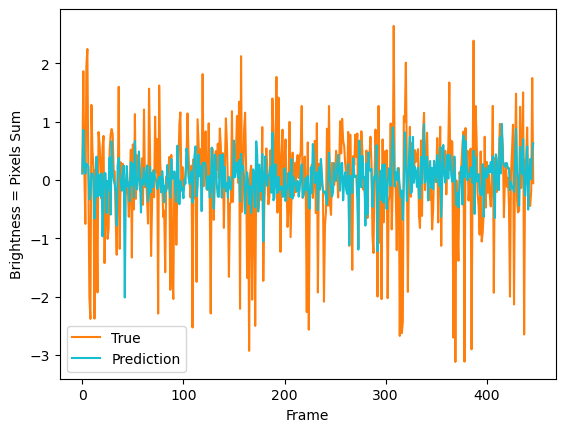

In [123]:
test_labels_ar =test_labels.to_numpy()

plt.plot(test_labels_ar, color='tab:orange', label='True')
plt.plot(preds, color='tab:cyan', label='Prediction')

plt.xlabel("Frame")
plt.ylabel("Brightness = Pixels Sum")

plt.legend()

plt.show()

In [124]:
mse_err = mean_squared_error(preds, test_labels_ar)
mse_err

0.72988332627805

# Data with delta

In [ ]:
df1 = result
df1.columns = ['X_las1','Y_las1','Power1','X_max1','Y_max1','sum_im1']
df1 = df1[:-4]
df1.reset_index(drop=True, inplace=True)

df2 = result.iloc[1:]
df2.columns = ['X_las2','Y_las2','Power2','X_max2','Y_max2','sum_im2']
df2 = df2[:-3]
df2.reset_index(drop=True, inplace=True)

df3 = result.iloc[2:]
df3.columns = ['X_las3','Y_las3','Power3','X_max3','Y_max3','sum_im3']
df3 = df3[:-2]
df3.reset_index(drop=True, inplace=True)

df4 = result.iloc[3:]
df4.columns = ['X_las4','Y_las4','Power4','X_max4','Y_max4','sum_im4']
df4 = df4[:-1]
df4.reset_index(drop=True, inplace=True)

df5 = result.iloc[4:]
df5.columns = ['X_las5','Y_las5','Power5','X_max5','Y_max5','sum_im5']
df5.reset_index(drop=True, inplace=True)


In [137]:
df_12 = df1 - df2.values
df_12.head(5)

X_las1   Y_las1  Power1  X_max1  Y_max1  sum_im1
0 -0.41432  0.17584     0.0    -5.0     0.0  -3668.0
1 -0.41432  0.17584     0.0     3.0    -4.0  10131.0
2 -0.41432  0.17584     0.0    -1.0    10.0  -7445.0
3 -0.82864  0.35168     0.0     0.0    -4.0  11833.0
4 -0.41432  0.17584     0.0    -2.0     0.0 -29500.0

In [139]:
columns_names = ['X_las12','Y_las12','Power12','X_max12','Y_max12','sum_im12']
df_zer = pd.DataFrame(0, index = np.arange(2237), columns = columns_names)
df_zer.head()

X_las12  Y_las12  Power12  X_max12  Y_max12  sum_im12
0        0        0        0        0        0         0
1        0        0        0        0        0         0
2        0        0        0        0        0         0
3        0        0        0        0        0         0
4        0        0        0        0        0         0

In [144]:
result.head()

X_las12  Y_las12  Power12  X_max12  Y_max12  sum_im12
1 -38.36468 -0.59884    100.0       60       49    156048
2 -37.95036 -0.77468    100.0       65       49    159716
3 -37.53604 -0.95052    100.0       62       53    149585
4 -37.12172 -1.12636    100.0       63       43    157030
6 -36.29308 -1.47804    100.0       63       47    145197

In [141]:
final_difference = pd.concat([df_zer, df1, df2, df3, df4], axis = 1)
final_difference.head()

X_las12  Y_las12  Power12  X_max12  Y_max12  sum_im12    X_las1   Y_las1  \
0        0        0        0        0        0         0 -38.36468 -0.59884   
1        0        0        0        0        0         0 -37.95036 -0.77468   
2        0        0        0        0        0         0 -37.53604 -0.95052   
3        0        0        0        0        0         0 -37.12172 -1.12636   
4        0        0        0        0        0         0 -36.29308 -1.47804   

   Power1  X_max1  ...  Power3  X_max3  Y_max3  sum_im3    X_las4   Y_las4  \
0   100.0      60  ...   100.0      62      53   149585 -37.12172 -1.12636   
1   100.0      65  ...   100.0      63      43   157030 -36.29308 -1.47804   
2   100.0      62  ...   100.0      63      47   145197 -35.87876 -1.65388   
3   100.0      63  ...   100.0      65      47   174697 -35.46444 -1.82972   
4   100.0      63  ...   100.0      64      50   113976 -35.05012 -2.00556   

   Power4  X_max4  Y_max4  sum_im4  
0   100.0      63      43   157030  
1   100.0      63      47   145197  
2   100.0      65      47   174697  
3   100.0      64      50   113976  
4   100.0      64      47   185316  

[5 rows x 30 columns]

In [145]:
final_delta = final - final_difference.values
final_delta.head()

X_las1   Y_las1  Power1  X_max1  Y_max1   sum_im1   X_las2   Y_las2  \
0 -38.36468 -0.59884   100.0    60.0    49.0  156048.0  0.41432 -0.17584   
1 -37.95036 -0.77468   100.0    65.0    49.0  159716.0  0.41432 -0.17584   
2 -37.53604 -0.95052   100.0    62.0    53.0  149585.0  0.41432 -0.17584   
3 -37.12172 -1.12636   100.0    63.0    43.0  157030.0  0.82864 -0.35168   
4 -36.29308 -1.47804   100.0    63.0    47.0  145197.0  0.41432 -0.17584   

   Power2  X_max2  ...  Power4  X_max4  Y_max4  sum_im4   X_las5   Y_las5  \
0     0.0     5.0  ...     0.0     1.0   -10.0   7445.0  0.82864 -0.35168   
1     0.0    -3.0  ...     0.0     0.0     4.0 -11833.0  0.41432 -0.17584   
2     0.0     1.0  ...     0.0     2.0     0.0  29500.0  0.41432 -0.17584   
3     0.0     0.0  ...     0.0    -1.0     3.0 -60721.0  0.41432 -0.17584   
4     0.0     2.0  ...     0.0     0.0    -3.0  71340.0  0.82864 -0.35168   

   Power5  X_max5  Y_max5  sum_im5  
0     0.0     0.0     4.0 -11833.0  
1     0.0     2.0     0.0  29500.0  
2     0.0    -1.0     3.0 -60721.0  
3     0.0     0.0    -3.0  71340.0  
4     0.0     0.0     1.0 -28449.0  

[5 rows x 30 columns]

In [147]:
final_with_delta = pd.concat([final,final_delta], axis = 1)
final_with_delta.head(3)

X_las1   Y_las1  Power1  X_max1  Y_max1  sum_im1    X_las2   Y_las2  \
0 -38.36468 -0.59884   100.0      60      49   156048 -37.95036 -0.77468   
1 -37.95036 -0.77468   100.0      65      49   159716 -37.53604 -0.95052   
2 -37.53604 -0.95052   100.0      62      53   149585 -37.12172 -1.12636   

   Power2  X_max2  ...  Power4  X_max4  Y_max4  sum_im4   X_las5   Y_las5  \
0   100.0      65  ...     0.0     1.0   -10.0   7445.0  0.82864 -0.35168   
1   100.0      62  ...     0.0     0.0     4.0 -11833.0  0.41432 -0.17584   
2   100.0      63  ...     0.0     2.0     0.0  29500.0  0.41432 -0.17584   

   Power5  X_max5  Y_max5  sum_im5  
0     0.0     0.0     4.0 -11833.0  
1     0.0     2.0     0.0  29500.0  
2     0.0    -1.0     3.0 -60721.0  

[3 rows x 60 columns]

In [149]:
final_with_delta['Power3']

Power3  Power3
0      100.0     0.0
1      100.0     0.0
2      100.0     0.0
3      100.0     0.0
4      100.0     0.0
...      ...     ...
2232   195.0     0.0
2233   195.0     0.0
2234   195.0     0.0
2235   195.0     0.0
2236   195.0     0.0

[2237 rows x 2 columns]

In [155]:
cols=pd.Series(final_with_delta.columns)
for dup in final_with_delta.columns[final_with_delta.columns.duplicated(keep=False)]: 
    cols[final_with_delta.columns.get_loc(dup)] = ([dup + str(d_idx) 
                                     if d_idx != 0 
                                     else dup 
                                     for d_idx in range(final_with_delta.columns.get_loc(dup).sum())]
                                    )

In [158]:
final_with_delta.columns = cols

In [159]:
final_with_delta['Power3']

0       100.0
1       100.0
2       100.0
3       100.0
4       100.0
        ...  
2232    195.0
2233    195.0
2234    195.0
2235    195.0
2236    195.0
Name: Power3, Length: 2237, dtype: float64

In [163]:
normalized_final_with_delta = (final_with_delta - final_with_delta.mean())/final_with_delta.std()
normalized_final_with_delta.head

<bound method NDFrame.head of         X_las1    Y_las1    Power1    X_max1    Y_max1   sum_im1    X_las2  \
0     0.103876 -0.033470 -4.058226 -1.287004  0.139250  0.340909  0.247425   
1     0.247584 -0.095316 -4.058226  0.965756  0.139250  0.572480  0.391127   
2     0.391291 -0.157163 -4.058226 -0.385900  1.690939 -0.067119  0.534829   
3     0.534999 -0.219009 -4.058226  0.064652 -2.188284  0.402905  0.822233   
4     0.822414 -0.342702 -4.058226  0.064652 -0.636595 -0.344146  0.965935   
...        ...       ...       ...       ...       ...       ...       ...   
2232  0.165351  0.518703  0.246303  0.515204 -0.248673  0.321022  0.232911   
2233  0.233068  0.680527  0.246303 -1.287004 -0.636595  0.368940  0.300625   
2234  0.300785  0.842351  0.246303 -0.836452  1.690939  0.898435  0.368339   
2235  0.368503  1.004175  0.246303  0.965756  0.527172 -0.095339  0.402197   
2236  0.402361  1.085087  0.246303  0.515204 -0.248673 -0.412266  0.436054   

        Y_las2    Power2    X_max

In [164]:
end_train = '1425'
start_validation = '1430'
end_validation = '1785'
start_test = '1790'
data_train = final_with_delta.loc[: end_train, :]
data_val   = final_with_delta.loc[start_validation:end_validation, :]
data_test  = final_with_delta.loc[start_test:, :]


train_labels = data_train['sum_im5']
data_train = data_train.iloc[:,:-1]

val_labels = data_val['sum_im5']
data_val = data_val.iloc[:,:-1]

test_labels = data_test['sum_im5']
data_test = data_test.iloc[:,:-1]

In [165]:
model = CatBoostRegressor(iterations = 6000, 
                          random_seed = 42, 
                          depth = 10,
                          #task_type = "GPU",
                          #devices = '0'
                         )

model.fit(data_train, train_labels, plot = True, eval_set = (data_test,test_labels))
preds = model.predict(data_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.018048
0:	learn: 15915.2454227	test: 14636.1454027	best: 14636.1454027 (0)	total: 42.6ms	remaining: 4m 15s
1:	learn: 15719.5114551	test: 14453.4984007	best: 14453.4984007 (1)	total: 61.7ms	remaining: 3m 5s
2:	learn: 15542.5449771	test: 14289.2714622	best: 14289.2714622 (2)	total: 81.3ms	remaining: 2m 42s
3:	learn: 15351.8824622	test: 14104.9172863	best: 14104.9172863 (3)	total: 101ms	remaining: 2m 30s
4:	learn: 15149.9100035	test: 13907.2544174	best: 13907.2544174 (4)	total: 118ms	remaining: 2m 21s
5:	learn: 14958.1055639	test: 13716.5785416	best: 13716.5785416 (5)	total: 135ms	remaining: 2m 14s
6:	learn: 14761.5276395	test: 13539.3720846	best: 13539.3720846 (6)	total: 153ms	remaining: 2m 11s
7:	learn: 14579.9850778	test: 13365.8632727	best: 13365.8632727 (7)	total: 171ms	remaining: 2m 7s
8:	learn: 14386.3093690	test: 13192.3011533	best: 13192.3011533 (8)	total: 188ms	remaining: 2m 4s
9:	learn: 14199.6216478	test: 13021.2071638	best: 13021.2071638 (9)	total: 205m

88:	learn: 5486.3274339	test: 5431.5593695	best: 5431.5593695 (88)	total: 1.66s	remaining: 1m 50s
89:	learn: 5424.3147624	test: 5376.1666951	best: 5376.1666951 (89)	total: 1.68s	remaining: 1m 50s
90:	learn: 5371.8924082	test: 5328.8284704	best: 5328.8284704 (90)	total: 1.7s	remaining: 1m 50s
91:	learn: 5310.9279369	test: 5271.5776872	best: 5271.5776872 (91)	total: 1.72s	remaining: 1m 50s
92:	learn: 5249.8915236	test: 5213.2926271	best: 5213.2926271 (92)	total: 1.74s	remaining: 1m 50s
93:	learn: 5196.1712573	test: 5182.7884105	best: 5182.7884105 (93)	total: 1.76s	remaining: 1m 50s
94:	learn: 5143.7508758	test: 5136.7866600	best: 5136.7866600 (94)	total: 1.78s	remaining: 1m 50s
95:	learn: 5094.1086328	test: 5094.3470000	best: 5094.3470000 (95)	total: 1.8s	remaining: 1m 50s
96:	learn: 5042.6728874	test: 5049.8554237	best: 5049.8554237 (96)	total: 1.82s	remaining: 1m 50s
97:	learn: 4994.1255767	test: 5017.3857802	best: 5017.3857802 (97)	total: 1.84s	remaining: 1m 50s
98:	learn: 4933.231017

180:	learn: 2236.0803532	test: 2728.2518594	best: 2728.2518594 (180)	total: 3.35s	remaining: 1m 47s
181:	learn: 2216.1337533	test: 2714.5880115	best: 2714.5880115 (181)	total: 3.37s	remaining: 1m 47s
182:	learn: 2198.8862919	test: 2704.1640134	best: 2704.1640134 (182)	total: 3.39s	remaining: 1m 47s
183:	learn: 2182.7489182	test: 2693.9924826	best: 2693.9924826 (183)	total: 3.41s	remaining: 1m 47s
184:	learn: 2164.5632201	test: 2680.0084405	best: 2680.0084405 (184)	total: 3.42s	remaining: 1m 47s
185:	learn: 2146.2340628	test: 2664.9128555	best: 2664.9128555 (185)	total: 3.44s	remaining: 1m 47s
186:	learn: 2127.5876523	test: 2650.1215935	best: 2650.1215935 (186)	total: 3.46s	remaining: 1m 47s
187:	learn: 2110.3311126	test: 2635.6236662	best: 2635.6236662 (187)	total: 3.47s	remaining: 1m 47s
188:	learn: 2092.9570492	test: 2622.7832956	best: 2622.7832956 (188)	total: 3.49s	remaining: 1m 47s
189:	learn: 2072.4442087	test: 2609.6692739	best: 2609.6692739 (189)	total: 3.5s	remaining: 1m 47s
1

270:	learn: 1144.0766853	test: 1996.3637110	best: 1996.3637110 (270)	total: 5.04s	remaining: 1m 46s
271:	learn: 1134.6598623	test: 1989.5755020	best: 1989.5755020 (271)	total: 5.06s	remaining: 1m 46s
272:	learn: 1129.4059958	test: 1986.7611875	best: 1986.7611875 (272)	total: 5.08s	remaining: 1m 46s
273:	learn: 1124.4920660	test: 1984.1962109	best: 1984.1962109 (273)	total: 5.1s	remaining: 1m 46s
274:	learn: 1119.1315919	test: 1982.0519367	best: 1982.0519367 (274)	total: 5.12s	remaining: 1m 46s
275:	learn: 1112.8032662	test: 1978.7628232	best: 1978.7628232 (275)	total: 5.17s	remaining: 1m 47s
276:	learn: 1108.5682106	test: 1977.7399840	best: 1977.7399840 (276)	total: 5.2s	remaining: 1m 47s
277:	learn: 1102.5146187	test: 1973.3388831	best: 1973.3388831 (277)	total: 5.22s	remaining: 1m 47s
278:	learn: 1095.3645809	test: 1967.5222432	best: 1967.5222432 (278)	total: 5.24s	remaining: 1m 47s
279:	learn: 1088.0665885	test: 1961.7152970	best: 1961.7152970 (279)	total: 5.27s	remaining: 1m 47s
28

354:	learn: 741.5839310	test: 1772.5763945	best: 1772.5763945 (354)	total: 6.95s	remaining: 1m 50s
355:	learn: 738.5140593	test: 1771.0424007	best: 1771.0424007 (355)	total: 6.97s	remaining: 1m 50s
356:	learn: 734.1603247	test: 1767.5928804	best: 1767.5928804 (356)	total: 7s	remaining: 1m 50s
357:	learn: 730.4750163	test: 1765.6075155	best: 1765.6075155 (357)	total: 7.02s	remaining: 1m 50s
358:	learn: 727.1109903	test: 1762.9379660	best: 1762.9379660 (358)	total: 7.04s	remaining: 1m 50s
359:	learn: 723.5825190	test: 1760.6240243	best: 1760.6240243 (359)	total: 7.07s	remaining: 1m 50s
360:	learn: 720.3795802	test: 1759.7109681	best: 1759.7109681 (360)	total: 7.09s	remaining: 1m 50s
361:	learn: 717.0495215	test: 1757.6003662	best: 1757.6003662 (361)	total: 7.11s	remaining: 1m 50s
362:	learn: 714.7701393	test: 1756.9680733	best: 1756.9680733 (362)	total: 7.14s	remaining: 1m 50s
363:	learn: 711.3845493	test: 1755.5501748	best: 1755.5501748 (363)	total: 7.16s	remaining: 1m 50s
364:	learn: 7

442:	learn: 519.7455673	test: 1653.5648531	best: 1653.5648531 (442)	total: 8.86s	remaining: 1m 51s
443:	learn: 517.9636151	test: 1653.4251107	best: 1653.4251107 (443)	total: 8.88s	remaining: 1m 51s
444:	learn: 516.1586929	test: 1652.3156038	best: 1652.3156038 (444)	total: 8.9s	remaining: 1m 51s
445:	learn: 514.4420088	test: 1651.4981223	best: 1651.4981223 (445)	total: 8.92s	remaining: 1m 51s
446:	learn: 512.8770573	test: 1650.9800895	best: 1650.9800895 (446)	total: 8.94s	remaining: 1m 51s
447:	learn: 511.1657557	test: 1650.7088194	best: 1650.7088194 (447)	total: 8.96s	remaining: 1m 51s
448:	learn: 509.8917067	test: 1650.0771161	best: 1650.0771161 (448)	total: 8.98s	remaining: 1m 51s
449:	learn: 508.5915208	test: 1649.7856108	best: 1649.7856108 (449)	total: 9s	remaining: 1m 51s
450:	learn: 507.0670143	test: 1649.2791676	best: 1649.2791676 (450)	total: 9.03s	remaining: 1m 51s
451:	learn: 505.0527544	test: 1648.6122477	best: 1648.6122477 (451)	total: 9.05s	remaining: 1m 51s
452:	learn: 50

535:	learn: 386.1272373	test: 1591.8706308	best: 1591.8706308 (535)	total: 10.8s	remaining: 1m 49s
536:	learn: 385.1015075	test: 1591.4129847	best: 1591.4129847 (536)	total: 10.8s	remaining: 1m 49s
537:	learn: 384.1371362	test: 1591.0927213	best: 1591.0927213 (537)	total: 10.8s	remaining: 1m 49s
538:	learn: 382.9452238	test: 1590.2788967	best: 1590.2788967 (538)	total: 10.8s	remaining: 1m 49s
539:	learn: 381.9652086	test: 1589.5087331	best: 1589.5087331 (539)	total: 10.8s	remaining: 1m 49s
540:	learn: 380.7800601	test: 1589.2336874	best: 1589.2336874 (540)	total: 10.8s	remaining: 1m 49s
541:	learn: 379.8241623	test: 1588.6881329	best: 1588.6881329 (541)	total: 10.9s	remaining: 1m 49s
542:	learn: 378.7474820	test: 1588.4438581	best: 1588.4438581 (542)	total: 10.9s	remaining: 1m 49s
543:	learn: 377.7395518	test: 1588.1586646	best: 1588.1586646 (543)	total: 10.9s	remaining: 1m 49s
544:	learn: 376.6009423	test: 1588.0702596	best: 1588.0702596 (544)	total: 10.9s	remaining: 1m 49s
545:	learn

620:	learn: 316.1089992	test: 1557.3721462	best: 1557.3721462 (620)	total: 12.9s	remaining: 1m 51s
621:	learn: 315.9003186	test: 1557.2183883	best: 1557.2183883 (621)	total: 12.9s	remaining: 1m 51s
622:	learn: 315.1789985	test: 1556.5914878	best: 1556.5914878 (622)	total: 12.9s	remaining: 1m 51s
623:	learn: 314.4517376	test: 1556.3537334	best: 1556.3537334 (623)	total: 12.9s	remaining: 1m 51s
624:	learn: 313.7398144	test: 1555.7676464	best: 1555.7676464 (624)	total: 13s	remaining: 1m 51s
625:	learn: 313.2734595	test: 1555.5744976	best: 1555.5744976 (625)	total: 13s	remaining: 1m 51s
626:	learn: 312.6015292	test: 1555.4548208	best: 1555.4548208 (626)	total: 13s	remaining: 1m 51s
627:	learn: 312.3976602	test: 1555.3129448	best: 1555.3129448 (627)	total: 13s	remaining: 1m 51s
628:	learn: 311.8501616	test: 1554.8544051	best: 1554.8544051 (628)	total: 13.1s	remaining: 1m 51s
629:	learn: 311.6396228	test: 1554.6676620	best: 1554.6676620 (629)	total: 13.1s	remaining: 1m 51s
630:	learn: 311.43

704:	learn: 268.7983337	test: 1538.5249769	best: 1538.5249769 (704)	total: 14.7s	remaining: 1m 50s
705:	learn: 268.2752177	test: 1538.1688455	best: 1538.1688455 (705)	total: 14.8s	remaining: 1m 50s
706:	learn: 268.1420907	test: 1537.9824295	best: 1537.9824295 (706)	total: 14.8s	remaining: 1m 50s
707:	learn: 267.4501185	test: 1538.0497931	best: 1537.9824295 (706)	total: 14.8s	remaining: 1m 50s
708:	learn: 266.9134769	test: 1537.7205951	best: 1537.7205951 (708)	total: 14.8s	remaining: 1m 50s
709:	learn: 266.3533372	test: 1537.4557525	best: 1537.4557525 (709)	total: 14.8s	remaining: 1m 50s
710:	learn: 265.8805426	test: 1537.3706522	best: 1537.3706522 (710)	total: 14.9s	remaining: 1m 50s
711:	learn: 265.6229738	test: 1536.8688768	best: 1536.8688768 (711)	total: 14.9s	remaining: 1m 50s
712:	learn: 265.1103563	test: 1536.7734129	best: 1536.7734129 (712)	total: 14.9s	remaining: 1m 50s
713:	learn: 264.4922980	test: 1536.7290793	best: 1536.7290793 (713)	total: 14.9s	remaining: 1m 50s
714:	learn

795:	learn: 228.7298116	test: 1523.4753255	best: 1523.4753255 (795)	total: 16.6s	remaining: 1m 48s
796:	learn: 228.2750230	test: 1523.1097408	best: 1523.1097408 (796)	total: 16.6s	remaining: 1m 48s
797:	learn: 227.6768358	test: 1522.6533768	best: 1522.6533768 (797)	total: 16.6s	remaining: 1m 48s
798:	learn: 227.0362319	test: 1522.3350019	best: 1522.3350019 (798)	total: 16.7s	remaining: 1m 48s
799:	learn: 226.5205028	test: 1522.1049632	best: 1522.1049632 (799)	total: 16.7s	remaining: 1m 48s
800:	learn: 226.0699206	test: 1521.7680055	best: 1521.7680055 (800)	total: 16.7s	remaining: 1m 48s
801:	learn: 225.6435908	test: 1521.6529598	best: 1521.6529598 (801)	total: 16.7s	remaining: 1m 48s
802:	learn: 225.2217215	test: 1521.5054760	best: 1521.5054760 (802)	total: 16.8s	remaining: 1m 48s
803:	learn: 224.7319443	test: 1521.3824977	best: 1521.3824977 (803)	total: 16.8s	remaining: 1m 48s
804:	learn: 224.2985622	test: 1521.3764899	best: 1521.3764899 (804)	total: 16.8s	remaining: 1m 48s
805:	learn

879:	learn: 194.2044017	test: 1513.8041631	best: 1513.7847251 (877)	total: 18.5s	remaining: 1m 47s
880:	learn: 193.8701131	test: 1513.7672300	best: 1513.7672300 (880)	total: 18.5s	remaining: 1m 47s
881:	learn: 193.4211943	test: 1513.6710645	best: 1513.6710645 (881)	total: 18.5s	remaining: 1m 47s
882:	learn: 193.0695393	test: 1513.5656676	best: 1513.5656676 (882)	total: 18.6s	remaining: 1m 47s
883:	learn: 192.6792075	test: 1513.5629753	best: 1513.5629753 (883)	total: 18.6s	remaining: 1m 47s
884:	learn: 192.2339703	test: 1513.4644243	best: 1513.4644243 (884)	total: 18.6s	remaining: 1m 47s
885:	learn: 191.7929219	test: 1513.4439990	best: 1513.4439990 (885)	total: 18.6s	remaining: 1m 47s
886:	learn: 191.5833438	test: 1513.4511277	best: 1513.4439990 (885)	total: 18.6s	remaining: 1m 47s
887:	learn: 191.2867961	test: 1513.4206210	best: 1513.4206210 (887)	total: 18.6s	remaining: 1m 47s
888:	learn: 190.8774676	test: 1513.3597170	best: 1513.3597170 (888)	total: 18.7s	remaining: 1m 47s
889:	learn

971:	learn: 162.8534221	test: 1506.4038801	best: 1506.4038801 (971)	total: 20.8s	remaining: 1m 47s
972:	learn: 162.5384221	test: 1506.3265003	best: 1506.3265003 (972)	total: 20.8s	remaining: 1m 47s
973:	learn: 162.3443086	test: 1506.3229165	best: 1506.3229165 (973)	total: 20.9s	remaining: 1m 47s
974:	learn: 162.0365303	test: 1506.2579195	best: 1506.2579195 (974)	total: 20.9s	remaining: 1m 47s
975:	learn: 161.6896561	test: 1506.2079842	best: 1506.2079842 (975)	total: 20.9s	remaining: 1m 47s
976:	learn: 161.5696236	test: 1506.1411962	best: 1506.1411962 (976)	total: 20.9s	remaining: 1m 47s
977:	learn: 161.2694930	test: 1506.0654410	best: 1506.0654410 (977)	total: 20.9s	remaining: 1m 47s
978:	learn: 160.8963877	test: 1506.0595517	best: 1506.0595517 (978)	total: 21s	remaining: 1m 47s
979:	learn: 160.5654294	test: 1506.0080192	best: 1506.0080192 (979)	total: 21s	remaining: 1m 47s
980:	learn: 160.0919169	test: 1505.9791195	best: 1505.9791195 (980)	total: 21s	remaining: 1m 47s
981:	learn: 159.

1061:	learn: 138.3319984	test: 1501.9282560	best: 1501.9282560 (1061)	total: 22.9s	remaining: 1m 46s
1062:	learn: 138.1496697	test: 1501.9383969	best: 1501.9282560 (1061)	total: 22.9s	remaining: 1m 46s
1063:	learn: 137.8982232	test: 1501.8822528	best: 1501.8822528 (1063)	total: 22.9s	remaining: 1m 46s
1064:	learn: 137.6313975	test: 1501.8466270	best: 1501.8466270 (1064)	total: 23s	remaining: 1m 46s
1065:	learn: 137.4419669	test: 1501.7511204	best: 1501.7511204 (1065)	total: 23s	remaining: 1m 46s
1066:	learn: 137.2157739	test: 1501.7056778	best: 1501.7056778 (1066)	total: 23s	remaining: 1m 46s
1067:	learn: 137.0378673	test: 1501.6858697	best: 1501.6858697 (1067)	total: 23s	remaining: 1m 46s
1068:	learn: 136.7904419	test: 1501.6048248	best: 1501.6048248 (1068)	total: 23.1s	remaining: 1m 46s
1069:	learn: 136.4453183	test: 1501.6477382	best: 1501.6048248 (1068)	total: 23.1s	remaining: 1m 46s
1070:	learn: 136.1510776	test: 1501.5825948	best: 1501.5825948 (1070)	total: 23.1s	remaining: 1m 46

1145:	learn: 120.6209939	test: 1498.4882246	best: 1498.4882246 (1145)	total: 24.8s	remaining: 1m 44s
1146:	learn: 120.3473432	test: 1498.4084796	best: 1498.4084796 (1146)	total: 24.8s	remaining: 1m 44s
1147:	learn: 120.1552133	test: 1498.4132980	best: 1498.4084796 (1146)	total: 24.8s	remaining: 1m 44s
1148:	learn: 119.9830811	test: 1498.3122124	best: 1498.3122124 (1148)	total: 24.8s	remaining: 1m 44s
1149:	learn: 119.7186043	test: 1498.1693864	best: 1498.1693864 (1149)	total: 24.9s	remaining: 1m 44s
1150:	learn: 119.6948411	test: 1498.1539174	best: 1498.1539174 (1150)	total: 24.9s	remaining: 1m 44s
1151:	learn: 119.6011708	test: 1498.1274573	best: 1498.1274573 (1151)	total: 24.9s	remaining: 1m 44s
1152:	learn: 119.3641295	test: 1498.0728382	best: 1498.0728382 (1152)	total: 24.9s	remaining: 1m 44s
1153:	learn: 119.3404710	test: 1498.0078272	best: 1498.0078272 (1153)	total: 25s	remaining: 1m 44s
1154:	learn: 119.2852180	test: 1497.9670685	best: 1497.9670685 (1154)	total: 25s	remaining: 1

1229:	learn: 106.5005088	test: 1495.7818762	best: 1495.7484077 (1227)	total: 26.7s	remaining: 1m 43s
1230:	learn: 106.3617676	test: 1495.6634772	best: 1495.6634772 (1230)	total: 26.7s	remaining: 1m 43s
1231:	learn: 106.1220236	test: 1495.6543131	best: 1495.6543131 (1231)	total: 26.7s	remaining: 1m 43s
1232:	learn: 105.9491723	test: 1495.6596571	best: 1495.6543131 (1231)	total: 26.7s	remaining: 1m 43s
1233:	learn: 105.7347994	test: 1495.6784442	best: 1495.6543131 (1231)	total: 26.7s	remaining: 1m 43s
1234:	learn: 105.5421028	test: 1495.6668151	best: 1495.6543131 (1231)	total: 26.8s	remaining: 1m 43s
1235:	learn: 105.3554686	test: 1495.6403879	best: 1495.6403879 (1235)	total: 26.8s	remaining: 1m 43s
1236:	learn: 105.2187471	test: 1495.6511717	best: 1495.6403879 (1235)	total: 26.8s	remaining: 1m 43s
1237:	learn: 104.9500937	test: 1495.6617721	best: 1495.6403879 (1235)	total: 26.8s	remaining: 1m 43s
1238:	learn: 104.7558331	test: 1495.6619820	best: 1495.6403879 (1235)	total: 26.8s	remainin

1313:	learn: 92.6307139	test: 1494.2114705	best: 1494.2114705 (1313)	total: 28.4s	remaining: 1m 41s
1314:	learn: 92.4284040	test: 1494.2042182	best: 1494.2042182 (1314)	total: 28.4s	remaining: 1m 41s
1315:	learn: 92.2573560	test: 1494.2288329	best: 1494.2042182 (1314)	total: 28.4s	remaining: 1m 41s
1316:	learn: 92.0958950	test: 1494.2643584	best: 1494.2042182 (1314)	total: 28.4s	remaining: 1m 41s
1317:	learn: 91.9011332	test: 1494.2156296	best: 1494.2042182 (1314)	total: 28.4s	remaining: 1m 41s
1318:	learn: 91.7553191	test: 1494.1156709	best: 1494.1156709 (1318)	total: 28.5s	remaining: 1m 41s
1319:	learn: 91.6843872	test: 1494.0808896	best: 1494.0808896 (1319)	total: 28.5s	remaining: 1m 41s
1320:	learn: 91.5531642	test: 1494.0004477	best: 1494.0004477 (1320)	total: 28.5s	remaining: 1m 41s
1321:	learn: 91.3921951	test: 1493.9530646	best: 1493.9530646 (1321)	total: 28.5s	remaining: 1m 41s
1322:	learn: 91.2345429	test: 1493.9142034	best: 1493.9142034 (1322)	total: 28.6s	remaining: 1m 40s


1398:	learn: 81.1335660	test: 1492.3090965	best: 1492.3014475 (1393)	total: 30.3s	remaining: 1m 39s
1399:	learn: 81.0092791	test: 1492.2940687	best: 1492.2940687 (1399)	total: 30.3s	remaining: 1m 39s
1400:	learn: 80.9089038	test: 1492.2610163	best: 1492.2610163 (1400)	total: 30.3s	remaining: 1m 39s
1401:	learn: 80.7250848	test: 1492.2529149	best: 1492.2529149 (1401)	total: 30.3s	remaining: 1m 39s
1402:	learn: 80.6082523	test: 1492.1628646	best: 1492.1628646 (1402)	total: 30.3s	remaining: 1m 39s
1403:	learn: 80.5980915	test: 1492.1445244	best: 1492.1445244 (1403)	total: 30.4s	remaining: 1m 39s
1404:	learn: 80.4819782	test: 1492.1363813	best: 1492.1363813 (1404)	total: 30.4s	remaining: 1m 39s
1405:	learn: 80.3445362	test: 1492.1396177	best: 1492.1363813 (1404)	total: 30.4s	remaining: 1m 39s
1406:	learn: 80.1525567	test: 1492.1222790	best: 1492.1222790 (1406)	total: 30.4s	remaining: 1m 39s
1407:	learn: 80.0099929	test: 1492.1283336	best: 1492.1222790 (1406)	total: 30.5s	remaining: 1m 39s


1481:	learn: 71.9733182	test: 1491.0640462	best: 1491.0640462 (1481)	total: 32.1s	remaining: 1m 37s
1482:	learn: 71.8136436	test: 1491.0709407	best: 1491.0640462 (1481)	total: 32.2s	remaining: 1m 37s
1483:	learn: 71.7278448	test: 1491.0848147	best: 1491.0640462 (1481)	total: 32.2s	remaining: 1m 37s
1484:	learn: 71.7221550	test: 1491.0836915	best: 1491.0640462 (1481)	total: 32.2s	remaining: 1m 37s
1485:	learn: 71.6415866	test: 1491.0636476	best: 1491.0636476 (1485)	total: 32.2s	remaining: 1m 37s
1486:	learn: 71.5246241	test: 1491.0663483	best: 1491.0636476 (1485)	total: 32.3s	remaining: 1m 37s
1487:	learn: 71.4138451	test: 1491.0768869	best: 1491.0636476 (1485)	total: 32.3s	remaining: 1m 37s
1488:	learn: 71.2600771	test: 1491.0867620	best: 1491.0636476 (1485)	total: 32.3s	remaining: 1m 37s
1489:	learn: 71.1676522	test: 1491.0065853	best: 1491.0065853 (1489)	total: 32.3s	remaining: 1m 37s
1490:	learn: 71.0768040	test: 1491.0269556	best: 1491.0065853 (1489)	total: 32.3s	remaining: 1m 37s


1568:	learn: 63.7838395	test: 1489.9593011	best: 1489.9593011 (1568)	total: 34s	remaining: 1m 36s
1569:	learn: 63.7792052	test: 1489.9606929	best: 1489.9593011 (1568)	total: 34.1s	remaining: 1m 36s
1570:	learn: 63.6646408	test: 1489.9356045	best: 1489.9356045 (1570)	total: 34.1s	remaining: 1m 36s
1571:	learn: 63.6015275	test: 1489.9253382	best: 1489.9253382 (1571)	total: 34.1s	remaining: 1m 36s
1572:	learn: 63.5241833	test: 1489.9337224	best: 1489.9253382 (1571)	total: 34.1s	remaining: 1m 36s
1573:	learn: 63.4278926	test: 1489.9734527	best: 1489.9253382 (1571)	total: 34.2s	remaining: 1m 36s
1574:	learn: 63.3528048	test: 1489.9848476	best: 1489.9253382 (1571)	total: 34.2s	remaining: 1m 36s
1575:	learn: 63.2886599	test: 1489.9418195	best: 1489.9253382 (1571)	total: 34.2s	remaining: 1m 36s
1576:	learn: 63.1594870	test: 1489.9177766	best: 1489.9177766 (1576)	total: 34.2s	remaining: 1m 35s
1577:	learn: 63.0901934	test: 1489.8912767	best: 1489.8912767 (1577)	total: 34.2s	remaining: 1m 35s
15

1651:	learn: 56.8904424	test: 1489.3752913	best: 1489.3752913 (1651)	total: 36s	remaining: 1m 34s
1652:	learn: 56.8376029	test: 1489.3673125	best: 1489.3673125 (1652)	total: 36s	remaining: 1m 34s
1653:	learn: 56.8209090	test: 1489.3780593	best: 1489.3673125 (1652)	total: 36s	remaining: 1m 34s
1654:	learn: 56.7580467	test: 1489.3820836	best: 1489.3673125 (1652)	total: 36s	remaining: 1m 34s
1655:	learn: 56.6299452	test: 1489.3688994	best: 1489.3673125 (1652)	total: 36.1s	remaining: 1m 34s
1656:	learn: 56.5011419	test: 1489.3683287	best: 1489.3673125 (1652)	total: 36.1s	remaining: 1m 34s
1657:	learn: 56.4402541	test: 1489.3113886	best: 1489.3113886 (1657)	total: 36.1s	remaining: 1m 34s
1658:	learn: 56.2915520	test: 1489.3109888	best: 1489.3109888 (1658)	total: 36.1s	remaining: 1m 34s
1659:	learn: 56.2646105	test: 1489.3134516	best: 1489.3109888 (1658)	total: 36.2s	remaining: 1m 34s
1660:	learn: 56.1672689	test: 1489.3147609	best: 1489.3109888 (1658)	total: 36.2s	remaining: 1m 34s
1661:	le

1740:	learn: 50.5443799	test: 1488.9136740	best: 1488.9136740 (1740)	total: 38.1s	remaining: 1m 33s
1741:	learn: 50.5145083	test: 1488.9057046	best: 1488.9057046 (1741)	total: 38.1s	remaining: 1m 33s
1742:	learn: 50.4420990	test: 1488.8984212	best: 1488.8984212 (1742)	total: 38.1s	remaining: 1m 33s
1743:	learn: 50.3410767	test: 1488.8780831	best: 1488.8780831 (1743)	total: 38.1s	remaining: 1m 33s
1744:	learn: 50.2325090	test: 1488.8801218	best: 1488.8780831 (1743)	total: 38.2s	remaining: 1m 33s
1745:	learn: 50.1652664	test: 1488.8871734	best: 1488.8780831 (1743)	total: 38.2s	remaining: 1m 33s
1746:	learn: 50.1037862	test: 1488.8802219	best: 1488.8780831 (1743)	total: 38.2s	remaining: 1m 33s
1747:	learn: 50.0223400	test: 1488.9004432	best: 1488.8780831 (1743)	total: 38.2s	remaining: 1m 33s
1748:	learn: 49.9228214	test: 1488.8781871	best: 1488.8780831 (1743)	total: 38.3s	remaining: 1m 33s
1749:	learn: 49.8404896	test: 1488.8919545	best: 1488.8780831 (1743)	total: 38.3s	remaining: 1m 32s


1824:	learn: 45.7845518	test: 1488.4782269	best: 1488.4748539 (1823)	total: 40.2s	remaining: 1m 31s
1825:	learn: 45.6922583	test: 1488.4775275	best: 1488.4748539 (1823)	total: 40.2s	remaining: 1m 31s
1826:	learn: 45.6510869	test: 1488.4601905	best: 1488.4601905 (1826)	total: 40.2s	remaining: 1m 31s
1827:	learn: 45.6197501	test: 1488.4621957	best: 1488.4601905 (1826)	total: 40.2s	remaining: 1m 31s
1828:	learn: 45.5610593	test: 1488.4185405	best: 1488.4185405 (1828)	total: 40.2s	remaining: 1m 31s
1829:	learn: 45.4752410	test: 1488.4035707	best: 1488.4035707 (1829)	total: 40.3s	remaining: 1m 31s
1830:	learn: 45.4046907	test: 1488.4048994	best: 1488.4035707 (1829)	total: 40.3s	remaining: 1m 31s
1831:	learn: 45.3464627	test: 1488.3943659	best: 1488.3943659 (1831)	total: 40.3s	remaining: 1m 31s
1832:	learn: 45.2920129	test: 1488.3962124	best: 1488.3943659 (1831)	total: 40.4s	remaining: 1m 31s
1833:	learn: 45.2472110	test: 1488.3969407	best: 1488.3943659 (1831)	total: 40.4s	remaining: 1m 31s


1913:	learn: 40.6941491	test: 1488.1851987	best: 1488.1811424 (1910)	total: 42.3s	remaining: 1m 30s
1914:	learn: 40.6372130	test: 1488.1609283	best: 1488.1609283 (1914)	total: 42.3s	remaining: 1m 30s
1915:	learn: 40.5573199	test: 1488.1519633	best: 1488.1519633 (1915)	total: 42.3s	remaining: 1m 30s
1916:	learn: 40.5374546	test: 1488.1316174	best: 1488.1316174 (1916)	total: 42.3s	remaining: 1m 30s
1917:	learn: 40.4807382	test: 1488.1155077	best: 1488.1155077 (1917)	total: 42.4s	remaining: 1m 30s
1918:	learn: 40.4276729	test: 1488.1153662	best: 1488.1153662 (1918)	total: 42.4s	remaining: 1m 30s
1919:	learn: 40.3495802	test: 1488.1048532	best: 1488.1048532 (1919)	total: 42.4s	remaining: 1m 30s
1920:	learn: 40.2978146	test: 1488.0922186	best: 1488.0922186 (1920)	total: 42.4s	remaining: 1m 30s
1921:	learn: 40.1936330	test: 1488.1004935	best: 1488.0922186 (1920)	total: 42.4s	remaining: 1m 30s
1922:	learn: 40.1428826	test: 1488.1009544	best: 1488.0922186 (1920)	total: 42.5s	remaining: 1m 30s


1998:	learn: 36.5445328	test: 1487.8349245	best: 1487.8177962 (1995)	total: 44.2s	remaining: 1m 28s
1999:	learn: 36.5381888	test: 1487.8353320	best: 1487.8177962 (1995)	total: 44.2s	remaining: 1m 28s
2000:	learn: 36.4560658	test: 1487.8264856	best: 1487.8177962 (1995)	total: 44.2s	remaining: 1m 28s
2001:	learn: 36.4168304	test: 1487.8159230	best: 1487.8159230 (2001)	total: 44.2s	remaining: 1m 28s
2002:	learn: 36.3710742	test: 1487.8280754	best: 1487.8159230 (2001)	total: 44.3s	remaining: 1m 28s
2003:	learn: 36.3337858	test: 1487.8461415	best: 1487.8159230 (2001)	total: 44.3s	remaining: 1m 28s
2004:	learn: 36.2507955	test: 1487.8544901	best: 1487.8159230 (2001)	total: 44.3s	remaining: 1m 28s
2005:	learn: 36.1908028	test: 1487.8525467	best: 1487.8159230 (2001)	total: 44.3s	remaining: 1m 28s
2006:	learn: 36.1387219	test: 1487.8577577	best: 1487.8159230 (2001)	total: 44.3s	remaining: 1m 28s
2007:	learn: 36.0852210	test: 1487.8636933	best: 1487.8159230 (2001)	total: 44.4s	remaining: 1m 28s


2081:	learn: 32.6867745	test: 1487.6163867	best: 1487.6163867 (2081)	total: 45.9s	remaining: 1m 26s
2082:	learn: 32.6625180	test: 1487.6091110	best: 1487.6091110 (2082)	total: 45.9s	remaining: 1m 26s
2083:	learn: 32.6343989	test: 1487.6016079	best: 1487.6016079 (2083)	total: 45.9s	remaining: 1m 26s
2084:	learn: 32.5568295	test: 1487.6160222	best: 1487.6016079 (2083)	total: 45.9s	remaining: 1m 26s
2085:	learn: 32.5107665	test: 1487.6090520	best: 1487.6016079 (2083)	total: 45.9s	remaining: 1m 26s
2086:	learn: 32.4687737	test: 1487.6200783	best: 1487.6016079 (2083)	total: 46s	remaining: 1m 26s
2087:	learn: 32.4118552	test: 1487.6309236	best: 1487.6016079 (2083)	total: 46s	remaining: 1m 26s
2088:	learn: 32.3838704	test: 1487.6310106	best: 1487.6016079 (2083)	total: 46s	remaining: 1m 26s
2089:	learn: 32.3363757	test: 1487.6254666	best: 1487.6016079 (2083)	total: 46s	remaining: 1m 26s
2090:	learn: 32.3005941	test: 1487.6244693	best: 1487.6016079 (2083)	total: 46s	remaining: 1m 26s
2091:	lear

2169:	learn: 29.0035765	test: 1487.4285232	best: 1487.4070581 (2163)	total: 47.6s	remaining: 1m 23s
2170:	learn: 28.9634262	test: 1487.4224626	best: 1487.4070581 (2163)	total: 47.6s	remaining: 1m 23s
2171:	learn: 28.9122520	test: 1487.4162747	best: 1487.4070581 (2163)	total: 47.6s	remaining: 1m 23s
2172:	learn: 28.9070336	test: 1487.4169726	best: 1487.4070581 (2163)	total: 47.6s	remaining: 1m 23s
2173:	learn: 28.8721570	test: 1487.4067347	best: 1487.4067347 (2173)	total: 47.6s	remaining: 1m 23s
2174:	learn: 28.8311734	test: 1487.4034379	best: 1487.4034379 (2174)	total: 47.7s	remaining: 1m 23s
2175:	learn: 28.8073096	test: 1487.3812227	best: 1487.3812227 (2175)	total: 47.7s	remaining: 1m 23s
2176:	learn: 28.7548137	test: 1487.3853806	best: 1487.3812227 (2175)	total: 47.7s	remaining: 1m 23s
2177:	learn: 28.6969311	test: 1487.3904125	best: 1487.3812227 (2175)	total: 47.7s	remaining: 1m 23s
2178:	learn: 28.6461432	test: 1487.3887093	best: 1487.3812227 (2175)	total: 47.7s	remaining: 1m 23s


2258:	learn: 25.8367300	test: 1487.2517402	best: 1487.2517402 (2258)	total: 49.4s	remaining: 1m 21s
2259:	learn: 25.8004569	test: 1487.2496295	best: 1487.2496295 (2259)	total: 49.5s	remaining: 1m 21s
2260:	learn: 25.7913660	test: 1487.2433085	best: 1487.2433085 (2260)	total: 49.5s	remaining: 1m 21s
2261:	learn: 25.7646592	test: 1487.2350317	best: 1487.2350317 (2261)	total: 49.5s	remaining: 1m 21s
2262:	learn: 25.7203475	test: 1487.2350131	best: 1487.2350131 (2262)	total: 49.5s	remaining: 1m 21s
2263:	learn: 25.6835661	test: 1487.2347667	best: 1487.2347667 (2263)	total: 49.5s	remaining: 1m 21s
2264:	learn: 25.6703357	test: 1487.2325585	best: 1487.2325585 (2264)	total: 49.6s	remaining: 1m 21s
2265:	learn: 25.6444808	test: 1487.2347477	best: 1487.2325585 (2264)	total: 49.6s	remaining: 1m 21s
2266:	learn: 25.6246476	test: 1487.2393983	best: 1487.2325585 (2264)	total: 49.6s	remaining: 1m 21s
2267:	learn: 25.5922865	test: 1487.2303477	best: 1487.2303477 (2267)	total: 49.6s	remaining: 1m 21s


2347:	learn: 23.0616495	test: 1487.0413243	best: 1487.0377848 (2346)	total: 51.5s	remaining: 1m 20s
2348:	learn: 23.0445188	test: 1487.0365985	best: 1487.0365985 (2348)	total: 51.5s	remaining: 1m 20s
2349:	learn: 22.9872543	test: 1487.0335967	best: 1487.0335967 (2349)	total: 51.5s	remaining: 1m 20s
2350:	learn: 22.9616637	test: 1487.0422950	best: 1487.0335967 (2349)	total: 51.5s	remaining: 1m 19s
2351:	learn: 22.9184231	test: 1487.0505966	best: 1487.0335967 (2349)	total: 51.5s	remaining: 1m 19s
2352:	learn: 22.8885130	test: 1487.0416458	best: 1487.0335967 (2349)	total: 51.6s	remaining: 1m 19s
2353:	learn: 22.8478317	test: 1487.0414751	best: 1487.0335967 (2349)	total: 51.6s	remaining: 1m 19s
2354:	learn: 22.8446244	test: 1487.0414354	best: 1487.0335967 (2349)	total: 51.6s	remaining: 1m 19s
2355:	learn: 22.8230978	test: 1487.0451180	best: 1487.0335967 (2349)	total: 51.6s	remaining: 1m 19s
2356:	learn: 22.8077044	test: 1487.0468861	best: 1487.0335967 (2349)	total: 51.6s	remaining: 1m 19s


2435:	learn: 20.6035142	test: 1486.9404601	best: 1486.9359540 (2418)	total: 53.1s	remaining: 1m 17s
2436:	learn: 20.5944097	test: 1486.9334972	best: 1486.9334972 (2436)	total: 53.2s	remaining: 1m 17s
2437:	learn: 20.5783345	test: 1486.9303056	best: 1486.9303056 (2437)	total: 53.2s	remaining: 1m 17s
2438:	learn: 20.5382544	test: 1486.9295450	best: 1486.9295450 (2438)	total: 53.2s	remaining: 1m 17s
2439:	learn: 20.5148220	test: 1486.9282629	best: 1486.9282629 (2439)	total: 53.2s	remaining: 1m 17s
2440:	learn: 20.4742033	test: 1486.9298115	best: 1486.9282629 (2439)	total: 53.2s	remaining: 1m 17s
2441:	learn: 20.4464597	test: 1486.9180807	best: 1486.9180807 (2441)	total: 53.3s	remaining: 1m 17s
2442:	learn: 20.4175225	test: 1486.9204582	best: 1486.9180807 (2441)	total: 53.3s	remaining: 1m 17s
2443:	learn: 20.3977707	test: 1486.9188503	best: 1486.9180807 (2441)	total: 53.3s	remaining: 1m 17s
2444:	learn: 20.3819592	test: 1486.9128080	best: 1486.9128080 (2444)	total: 53.3s	remaining: 1m 17s


2526:	learn: 18.4500473	test: 1486.8332813	best: 1486.8332813 (2526)	total: 54.8s	remaining: 1m 15s
2527:	learn: 18.4281626	test: 1486.8261031	best: 1486.8261031 (2527)	total: 54.9s	remaining: 1m 15s
2528:	learn: 18.4035268	test: 1486.8277708	best: 1486.8261031 (2527)	total: 54.9s	remaining: 1m 15s
2529:	learn: 18.3841567	test: 1486.8253073	best: 1486.8253073 (2529)	total: 54.9s	remaining: 1m 15s
2530:	learn: 18.3627560	test: 1486.8177432	best: 1486.8177432 (2530)	total: 54.9s	remaining: 1m 15s
2531:	learn: 18.3274878	test: 1486.8123562	best: 1486.8123562 (2531)	total: 54.9s	remaining: 1m 15s
2532:	learn: 18.2964570	test: 1486.8114180	best: 1486.8114180 (2532)	total: 54.9s	remaining: 1m 15s
2533:	learn: 18.2692360	test: 1486.8105511	best: 1486.8105511 (2533)	total: 55s	remaining: 1m 15s
2534:	learn: 18.2419203	test: 1486.8077839	best: 1486.8077839 (2534)	total: 55s	remaining: 1m 15s
2535:	learn: 18.2076894	test: 1486.8102801	best: 1486.8077839 (2534)	total: 55s	remaining: 1m 15s
2536:	

2615:	learn: 16.7266003	test: 1486.7798019	best: 1486.7714211 (2607)	total: 56.5s	remaining: 1m 13s
2616:	learn: 16.7239545	test: 1486.7775340	best: 1486.7714211 (2607)	total: 56.5s	remaining: 1m 13s
2617:	learn: 16.7083829	test: 1486.7785273	best: 1486.7714211 (2607)	total: 56.6s	remaining: 1m 13s
2618:	learn: 16.7004840	test: 1486.7821357	best: 1486.7714211 (2607)	total: 56.6s	remaining: 1m 13s
2619:	learn: 16.6784917	test: 1486.7773788	best: 1486.7714211 (2607)	total: 56.6s	remaining: 1m 13s
2620:	learn: 16.6611151	test: 1486.7804951	best: 1486.7714211 (2607)	total: 56.6s	remaining: 1m 12s
2621:	learn: 16.6338125	test: 1486.7748305	best: 1486.7714211 (2607)	total: 56.6s	remaining: 1m 12s
2622:	learn: 16.6165576	test: 1486.7737912	best: 1486.7714211 (2607)	total: 56.7s	remaining: 1m 12s
2623:	learn: 16.5955581	test: 1486.7763858	best: 1486.7714211 (2607)	total: 56.7s	remaining: 1m 12s
2624:	learn: 16.5610774	test: 1486.7775556	best: 1486.7714211 (2607)	total: 56.7s	remaining: 1m 12s


2703:	learn: 15.1433797	test: 1486.6958843	best: 1486.6958843 (2703)	total: 58.2s	remaining: 1m 10s
2704:	learn: 15.1247878	test: 1486.6947486	best: 1486.6947486 (2704)	total: 58.2s	remaining: 1m 10s
2705:	learn: 15.1171325	test: 1486.6942539	best: 1486.6942539 (2705)	total: 58.2s	remaining: 1m 10s
2706:	learn: 15.1057396	test: 1486.6937961	best: 1486.6937961 (2706)	total: 58.2s	remaining: 1m 10s
2707:	learn: 15.0813776	test: 1486.6828823	best: 1486.6828823 (2707)	total: 58.2s	remaining: 1m 10s
2708:	learn: 15.0768890	test: 1486.6829725	best: 1486.6828823 (2707)	total: 58.3s	remaining: 1m 10s
2709:	learn: 15.0642731	test: 1486.6831087	best: 1486.6828823 (2707)	total: 58.3s	remaining: 1m 10s
2710:	learn: 15.0546870	test: 1486.6898401	best: 1486.6828823 (2707)	total: 58.3s	remaining: 1m 10s
2711:	learn: 15.0272991	test: 1486.6887526	best: 1486.6828823 (2707)	total: 58.3s	remaining: 1m 10s
2712:	learn: 15.0095425	test: 1486.6841109	best: 1486.6828823 (2707)	total: 58.3s	remaining: 1m 10s


2793:	learn: 13.7986289	test: 1486.6353724	best: 1486.6353724 (2793)	total: 59.9s	remaining: 1m 8s
2794:	learn: 13.7909815	test: 1486.6345706	best: 1486.6345706 (2794)	total: 59.9s	remaining: 1m 8s
2795:	learn: 13.7760721	test: 1486.6358661	best: 1486.6345706 (2794)	total: 59.9s	remaining: 1m 8s
2796:	learn: 13.7731215	test: 1486.6356590	best: 1486.6345706 (2794)	total: 59.9s	remaining: 1m 8s
2797:	learn: 13.7539428	test: 1486.6351676	best: 1486.6345706 (2794)	total: 59.9s	remaining: 1m 8s
2798:	learn: 13.7388639	test: 1486.6367387	best: 1486.6345706 (2794)	total: 60s	remaining: 1m 8s
2799:	learn: 13.7205732	test: 1486.6358674	best: 1486.6345706 (2794)	total: 60s	remaining: 1m 8s
2800:	learn: 13.7049959	test: 1486.6343760	best: 1486.6343760 (2800)	total: 1m	remaining: 1m 8s
2801:	learn: 13.6820988	test: 1486.6285840	best: 1486.6285840 (2801)	total: 1m	remaining: 1m 8s
2802:	learn: 13.6740435	test: 1486.6326889	best: 1486.6285840 (2801)	total: 1m	remaining: 1m 8s
2803:	learn: 13.6722002

2881:	learn: 12.4871450	test: 1486.6179856	best: 1486.6179856 (2881)	total: 1m 1s	remaining: 1m 6s
2882:	learn: 12.4585316	test: 1486.6207734	best: 1486.6179856 (2881)	total: 1m 1s	remaining: 1m 6s
2883:	learn: 12.4279000	test: 1486.6193799	best: 1486.6179856 (2881)	total: 1m 1s	remaining: 1m 6s
2884:	learn: 12.4160644	test: 1486.6225850	best: 1486.6179856 (2881)	total: 1m 1s	remaining: 1m 6s
2885:	learn: 12.3861202	test: 1486.6151619	best: 1486.6151619 (2885)	total: 1m 1s	remaining: 1m 6s
2886:	learn: 12.3780819	test: 1486.6143264	best: 1486.6143264 (2886)	total: 1m 1s	remaining: 1m 6s
2887:	learn: 12.3641344	test: 1486.6127664	best: 1486.6127664 (2887)	total: 1m 1s	remaining: 1m 6s
2888:	learn: 12.3492727	test: 1486.6141996	best: 1486.6127664 (2887)	total: 1m 1s	remaining: 1m 6s
2889:	learn: 12.3410050	test: 1486.6109811	best: 1486.6109811 (2889)	total: 1m 1s	remaining: 1m 6s
2890:	learn: 12.3240157	test: 1486.6099710	best: 1486.6099710 (2890)	total: 1m 1s	remaining: 1m 6s
2891:	lear

2968:	learn: 11.2759248	test: 1486.6384177	best: 1486.6080830 (2931)	total: 1m 3s	remaining: 1m 4s
2969:	learn: 11.2708534	test: 1486.6403271	best: 1486.6080830 (2931)	total: 1m 3s	remaining: 1m 4s
2970:	learn: 11.2606766	test: 1486.6387697	best: 1486.6080830 (2931)	total: 1m 3s	remaining: 1m 4s
2971:	learn: 11.2371388	test: 1486.6365646	best: 1486.6080830 (2931)	total: 1m 3s	remaining: 1m 4s
2972:	learn: 11.2251983	test: 1486.6378494	best: 1486.6080830 (2931)	total: 1m 3s	remaining: 1m 4s
2973:	learn: 11.2121397	test: 1486.6364895	best: 1486.6080830 (2931)	total: 1m 3s	remaining: 1m 4s
2974:	learn: 11.1950481	test: 1486.6354253	best: 1486.6080830 (2931)	total: 1m 3s	remaining: 1m 4s
2975:	learn: 11.1846693	test: 1486.6345399	best: 1486.6080830 (2931)	total: 1m 3s	remaining: 1m 4s
2976:	learn: 11.1734496	test: 1486.6346979	best: 1486.6080830 (2931)	total: 1m 3s	remaining: 1m 4s
2977:	learn: 11.1658281	test: 1486.6336689	best: 1486.6080830 (2931)	total: 1m 3s	remaining: 1m 4s
2978:	lear

3058:	learn: 10.1020123	test: 1486.5816084	best: 1486.5799375 (3057)	total: 1m 5s	remaining: 1m 2s
3059:	learn: 10.1012094	test: 1486.5819522	best: 1486.5799375 (3057)	total: 1m 5s	remaining: 1m 2s
3060:	learn: 10.0992755	test: 1486.5795240	best: 1486.5795240 (3060)	total: 1m 5s	remaining: 1m 2s
3061:	learn: 10.0952211	test: 1486.5779190	best: 1486.5779190 (3061)	total: 1m 5s	remaining: 1m 2s
3062:	learn: 10.0807370	test: 1486.5752401	best: 1486.5752401 (3062)	total: 1m 5s	remaining: 1m 2s
3063:	learn: 10.0798251	test: 1486.5760453	best: 1486.5752401 (3062)	total: 1m 5s	remaining: 1m 2s
3064:	learn: 10.0710553	test: 1486.5757411	best: 1486.5752401 (3062)	total: 1m 5s	remaining: 1m 2s
3065:	learn: 10.0593414	test: 1486.5738974	best: 1486.5738974 (3065)	total: 1m 5s	remaining: 1m 2s
3066:	learn: 10.0453115	test: 1486.5768871	best: 1486.5738974 (3065)	total: 1m 5s	remaining: 1m 2s
3067:	learn: 10.0281364	test: 1486.5766681	best: 1486.5738974 (3065)	total: 1m 5s	remaining: 1m 2s
3068:	lear

3143:	learn: 9.2227339	test: 1486.5400993	best: 1486.5363496 (3128)	total: 1m 7s	remaining: 1m
3144:	learn: 9.2170137	test: 1486.5428115	best: 1486.5363496 (3128)	total: 1m 7s	remaining: 1m
3145:	learn: 9.2148603	test: 1486.5432819	best: 1486.5363496 (3128)	total: 1m 7s	remaining: 1m
3146:	learn: 9.1992030	test: 1486.5415650	best: 1486.5363496 (3128)	total: 1m 7s	remaining: 1m
3147:	learn: 9.1893415	test: 1486.5413472	best: 1486.5363496 (3128)	total: 1m 7s	remaining: 1m
3148:	learn: 9.1875635	test: 1486.5418474	best: 1486.5363496 (3128)	total: 1m 7s	remaining: 1m
3149:	learn: 9.1709204	test: 1486.5408404	best: 1486.5363496 (3128)	total: 1m 7s	remaining: 1m
3150:	learn: 9.1549876	test: 1486.5399946	best: 1486.5363496 (3128)	total: 1m 7s	remaining: 1m
3151:	learn: 9.1403219	test: 1486.5408006	best: 1486.5363496 (3128)	total: 1m 7s	remaining: 1m
3152:	learn: 9.1354661	test: 1486.5396746	best: 1486.5363496 (3128)	total: 1m 7s	remaining: 1m
3153:	learn: 9.1298053	test: 1486.5371929	best: 14

3239:	learn: 8.1823724	test: 1486.5146138	best: 1486.5142976 (3234)	total: 1m 9s	remaining: 59.1s
3240:	learn: 8.1691269	test: 1486.5143948	best: 1486.5142976 (3234)	total: 1m 9s	remaining: 59.1s
3241:	learn: 8.1554306	test: 1486.5140472	best: 1486.5140472 (3241)	total: 1m 9s	remaining: 59.1s
3242:	learn: 8.1440305	test: 1486.5140122	best: 1486.5140122 (3242)	total: 1m 9s	remaining: 59s
3243:	learn: 8.1256905	test: 1486.5146629	best: 1486.5140122 (3242)	total: 1m 9s	remaining: 59s
3244:	learn: 8.1155941	test: 1486.5128904	best: 1486.5128904 (3244)	total: 1m 9s	remaining: 59s
3245:	learn: 8.1042481	test: 1486.5106276	best: 1486.5106276 (3245)	total: 1m 9s	remaining: 59s
3246:	learn: 8.0964981	test: 1486.5096489	best: 1486.5096489 (3246)	total: 1m 9s	remaining: 59s
3247:	learn: 8.0767244	test: 1486.5109895	best: 1486.5096489 (3246)	total: 1m 9s	remaining: 58.9s
3248:	learn: 8.0654218	test: 1486.5134779	best: 1486.5096489 (3246)	total: 1m 9s	remaining: 58.9s
3249:	learn: 8.0584938	test: 1

3328:	learn: 7.3554856	test: 1486.4925303	best: 1486.4887209 (3303)	total: 1m 11s	remaining: 57.2s
3329:	learn: 7.3456786	test: 1486.4929495	best: 1486.4887209 (3303)	total: 1m 11s	remaining: 57.2s
3330:	learn: 7.3302992	test: 1486.4930175	best: 1486.4887209 (3303)	total: 1m 11s	remaining: 57.1s
3331:	learn: 7.3178206	test: 1486.4939089	best: 1486.4887209 (3303)	total: 1m 11s	remaining: 57.1s
3332:	learn: 7.3088712	test: 1486.4940912	best: 1486.4887209 (3303)	total: 1m 11s	remaining: 57.1s
3333:	learn: 7.3023890	test: 1486.4940575	best: 1486.4887209 (3303)	total: 1m 11s	remaining: 57.1s
3334:	learn: 7.2937041	test: 1486.4937533	best: 1486.4887209 (3303)	total: 1m 11s	remaining: 57.1s
3335:	learn: 7.2933729	test: 1486.4938808	best: 1486.4887209 (3303)	total: 1m 11s	remaining: 57s
3336:	learn: 7.2838535	test: 1486.4933090	best: 1486.4887209 (3303)	total: 1m 11s	remaining: 57s
3337:	learn: 7.2738046	test: 1486.4926019	best: 1486.4887209 (3303)	total: 1m 11s	remaining: 57s
3338:	learn: 7.2

3415:	learn: 6.5335485	test: 1486.4504328	best: 1486.4489809 (3414)	total: 1m 13s	remaining: 55.4s
3416:	learn: 6.5199186	test: 1486.4517060	best: 1486.4489809 (3414)	total: 1m 13s	remaining: 55.3s
3417:	learn: 6.5139491	test: 1486.4522253	best: 1486.4489809 (3414)	total: 1m 13s	remaining: 55.3s
3418:	learn: 6.5058623	test: 1486.4495911	best: 1486.4489809 (3414)	total: 1m 13s	remaining: 55.3s
3419:	learn: 6.4949157	test: 1486.4485150	best: 1486.4485150 (3419)	total: 1m 13s	remaining: 55.3s
3420:	learn: 6.4862281	test: 1486.4472625	best: 1486.4472625 (3420)	total: 1m 13s	remaining: 55.3s
3421:	learn: 6.4780592	test: 1486.4465931	best: 1486.4465931 (3421)	total: 1m 13s	remaining: 55.2s
3422:	learn: 6.4696409	test: 1486.4486098	best: 1486.4465931 (3421)	total: 1m 13s	remaining: 55.2s
3423:	learn: 6.4603021	test: 1486.4491171	best: 1486.4465931 (3421)	total: 1m 13s	remaining: 55.2s
3424:	learn: 6.4455405	test: 1486.4507971	best: 1486.4465931 (3421)	total: 1m 13s	remaining: 55.2s
3425:	lear

3500:	learn: 5.8348335	test: 1486.4359018	best: 1486.4302439 (3493)	total: 1m 15s	remaining: 53.6s
3501:	learn: 5.8325377	test: 1486.4357622	best: 1486.4302439 (3493)	total: 1m 15s	remaining: 53.6s
3502:	learn: 5.8253156	test: 1486.4362808	best: 1486.4302439 (3493)	total: 1m 15s	remaining: 53.6s
3503:	learn: 5.8176343	test: 1486.4339102	best: 1486.4302439 (3493)	total: 1m 15s	remaining: 53.5s
3504:	learn: 5.8163875	test: 1486.4337888	best: 1486.4302439 (3493)	total: 1m 15s	remaining: 53.5s
3505:	learn: 5.8155993	test: 1486.4332370	best: 1486.4302439 (3493)	total: 1m 15s	remaining: 53.5s
3506:	learn: 5.8099242	test: 1486.4325536	best: 1486.4302439 (3493)	total: 1m 15s	remaining: 53.5s
3507:	learn: 5.8015662	test: 1486.4316818	best: 1486.4302439 (3493)	total: 1m 15s	remaining: 53.5s
3508:	learn: 5.8008152	test: 1486.4317033	best: 1486.4302439 (3493)	total: 1m 15s	remaining: 53.4s
3509:	learn: 5.7926833	test: 1486.4322114	best: 1486.4302439 (3493)	total: 1m 15s	remaining: 53.4s
3510:	lear

3586:	learn: 5.1964983	test: 1486.4285738	best: 1486.4281737 (3546)	total: 1m 17s	remaining: 51.9s
3587:	learn: 5.1897247	test: 1486.4293703	best: 1486.4281737 (3546)	total: 1m 17s	remaining: 51.9s
3588:	learn: 5.1813697	test: 1486.4308478	best: 1486.4281737 (3546)	total: 1m 17s	remaining: 51.9s
3589:	learn: 5.1763289	test: 1486.4311394	best: 1486.4281737 (3546)	total: 1m 17s	remaining: 51.9s
3590:	learn: 5.1699449	test: 1486.4318906	best: 1486.4281737 (3546)	total: 1m 17s	remaining: 51.9s
3591:	learn: 5.1615022	test: 1486.4314553	best: 1486.4281737 (3546)	total: 1m 17s	remaining: 51.8s
3592:	learn: 5.1557912	test: 1486.4313577	best: 1486.4281737 (3546)	total: 1m 17s	remaining: 51.8s
3593:	learn: 5.1514002	test: 1486.4318005	best: 1486.4281737 (3546)	total: 1m 17s	remaining: 51.8s
3594:	learn: 5.1433523	test: 1486.4323332	best: 1486.4281737 (3546)	total: 1m 17s	remaining: 51.8s
3595:	learn: 5.1338999	test: 1486.4309943	best: 1486.4281737 (3546)	total: 1m 17s	remaining: 51.7s
3596:	lear

3672:	learn: 4.6682991	test: 1486.4225473	best: 1486.4193390 (3659)	total: 1m 19s	remaining: 50.2s
3673:	learn: 4.6644921	test: 1486.4212542	best: 1486.4193390 (3659)	total: 1m 19s	remaining: 50.5s
3674:	learn: 4.6629842	test: 1486.4217768	best: 1486.4193390 (3659)	total: 1m 19s	remaining: 50.4s
3675:	learn: 4.6567092	test: 1486.4223469	best: 1486.4193390 (3659)	total: 1m 19s	remaining: 50.4s
3676:	learn: 4.6552882	test: 1486.4224838	best: 1486.4193390 (3659)	total: 1m 19s	remaining: 50.4s
3677:	learn: 4.6505377	test: 1486.4215276	best: 1486.4193390 (3659)	total: 1m 19s	remaining: 50.4s
3678:	learn: 4.6439409	test: 1486.4221428	best: 1486.4193390 (3659)	total: 1m 19s	remaining: 50.4s
3679:	learn: 4.6384954	test: 1486.4207226	best: 1486.4193390 (3659)	total: 1m 19s	remaining: 50.4s
3680:	learn: 4.6311122	test: 1486.4215644	best: 1486.4193390 (3659)	total: 1m 19s	remaining: 50.3s
3681:	learn: 4.6261294	test: 1486.4226064	best: 1486.4193390 (3659)	total: 1m 19s	remaining: 50.3s
3682:	lear

3758:	learn: 4.2087825	test: 1486.3999461	best: 1486.3999461 (3758)	total: 1m 22s	remaining: 49s
3759:	learn: 4.2037735	test: 1486.3999958	best: 1486.3999461 (3758)	total: 1m 22s	remaining: 48.9s
3760:	learn: 4.1985556	test: 1486.4002451	best: 1486.3999461 (3758)	total: 1m 22s	remaining: 48.9s
3761:	learn: 4.1938038	test: 1486.4028986	best: 1486.3999461 (3758)	total: 1m 22s	remaining: 48.9s
3762:	learn: 4.1892605	test: 1486.4030324	best: 1486.3999461 (3758)	total: 1m 22s	remaining: 48.9s
3763:	learn: 4.1850581	test: 1486.4020238	best: 1486.3999461 (3758)	total: 1m 22s	remaining: 48.9s
3764:	learn: 4.1765583	test: 1486.4030151	best: 1486.3999461 (3758)	total: 1m 22s	remaining: 48.8s
3765:	learn: 4.1667237	test: 1486.4023207	best: 1486.3999461 (3758)	total: 1m 22s	remaining: 48.8s
3766:	learn: 4.1584272	test: 1486.4040575	best: 1486.3999461 (3758)	total: 1m 22s	remaining: 48.8s
3767:	learn: 4.1557619	test: 1486.4027381	best: 1486.3999461 (3758)	total: 1m 22s	remaining: 48.8s
3768:	learn:

3846:	learn: 3.7924122	test: 1486.3867528	best: 1486.3826249 (3828)	total: 1m 24s	remaining: 47s
3847:	learn: 3.7902076	test: 1486.3867859	best: 1486.3826249 (3828)	total: 1m 24s	remaining: 47s
3848:	learn: 3.7825420	test: 1486.3878739	best: 1486.3826249 (3828)	total: 1m 24s	remaining: 47s
3849:	learn: 3.7782055	test: 1486.3869214	best: 1486.3826249 (3828)	total: 1m 24s	remaining: 47s
3850:	learn: 3.7731803	test: 1486.3868321	best: 1486.3826249 (3828)	total: 1m 24s	remaining: 46.9s
3851:	learn: 3.7686664	test: 1486.3863246	best: 1486.3826249 (3828)	total: 1m 24s	remaining: 46.9s
3852:	learn: 3.7650184	test: 1486.3879328	best: 1486.3826249 (3828)	total: 1m 24s	remaining: 46.9s
3853:	learn: 3.7644095	test: 1486.3879712	best: 1486.3826249 (3828)	total: 1m 24s	remaining: 46.9s
3854:	learn: 3.7587657	test: 1486.3888439	best: 1486.3826249 (3828)	total: 1m 24s	remaining: 46.8s
3855:	learn: 3.7549611	test: 1486.3885698	best: 1486.3826249 (3828)	total: 1m 24s	remaining: 46.8s
3856:	learn: 3.752

3930:	learn: 3.4526931	test: 1486.3801634	best: 1486.3801634 (3930)	total: 1m 25s	remaining: 45.1s
3931:	learn: 3.4514880	test: 1486.3794531	best: 1486.3794531 (3931)	total: 1m 25s	remaining: 45.1s
3932:	learn: 3.4445110	test: 1486.3789625	best: 1486.3789625 (3932)	total: 1m 25s	remaining: 45.1s
3933:	learn: 3.4374084	test: 1486.3777463	best: 1486.3777463 (3933)	total: 1m 25s	remaining: 45.1s
3934:	learn: 3.4350098	test: 1486.3766022	best: 1486.3766022 (3934)	total: 1m 25s	remaining: 45s
3935:	learn: 3.4297718	test: 1486.3765672	best: 1486.3765672 (3935)	total: 1m 25s	remaining: 45s
3936:	learn: 3.4241002	test: 1486.3763866	best: 1486.3763866 (3936)	total: 1m 25s	remaining: 45s
3937:	learn: 3.4181025	test: 1486.3744262	best: 1486.3744262 (3937)	total: 1m 25s	remaining: 45s
3938:	learn: 3.4139930	test: 1486.3746155	best: 1486.3744262 (3937)	total: 1m 25s	remaining: 45s
3939:	learn: 3.4104064	test: 1486.3745900	best: 1486.3744262 (3937)	total: 1m 25s	remaining: 44.9s
3940:	learn: 3.40335

4013:	learn: 3.1179591	test: 1486.3668804	best: 1486.3668804 (4013)	total: 1m 27s	remaining: 43.3s
4014:	learn: 3.1131268	test: 1486.3683446	best: 1486.3668804 (4013)	total: 1m 27s	remaining: 43.2s
4015:	learn: 3.1089611	test: 1486.3691387	best: 1486.3668804 (4013)	total: 1m 27s	remaining: 43.2s
4016:	learn: 3.1081270	test: 1486.3690580	best: 1486.3668804 (4013)	total: 1m 27s	remaining: 43.2s
4017:	learn: 3.1061621	test: 1486.3693135	best: 1486.3668804 (4013)	total: 1m 27s	remaining: 43.2s
4018:	learn: 3.1046824	test: 1486.3693538	best: 1486.3668804 (4013)	total: 1m 27s	remaining: 43.1s
4019:	learn: 3.1031476	test: 1486.3696672	best: 1486.3668804 (4013)	total: 1m 27s	remaining: 43.1s
4020:	learn: 3.0981114	test: 1486.3697819	best: 1486.3668804 (4013)	total: 1m 27s	remaining: 43.1s
4021:	learn: 3.0975506	test: 1486.3697834	best: 1486.3668804 (4013)	total: 1m 27s	remaining: 43.1s
4022:	learn: 3.0909588	test: 1486.3700614	best: 1486.3668804 (4013)	total: 1m 27s	remaining: 43s
4023:	learn:

4102:	learn: 2.8481037	test: 1486.3577742	best: 1486.3573749 (4097)	total: 1m 29s	remaining: 41.3s
4103:	learn: 2.8441490	test: 1486.3573152	best: 1486.3573152 (4103)	total: 1m 29s	remaining: 41.3s
4104:	learn: 2.8394481	test: 1486.3576990	best: 1486.3573152 (4103)	total: 1m 29s	remaining: 41.3s
4105:	learn: 2.8326140	test: 1486.3577198	best: 1486.3573152 (4103)	total: 1m 29s	remaining: 41.2s
4106:	learn: 2.8320785	test: 1486.3577847	best: 1486.3573152 (4103)	total: 1m 29s	remaining: 41.2s
4107:	learn: 2.8310130	test: 1486.3578402	best: 1486.3573152 (4103)	total: 1m 29s	remaining: 41.2s
4108:	learn: 2.8303635	test: 1486.3577794	best: 1486.3573152 (4103)	total: 1m 29s	remaining: 41.2s
4109:	learn: 2.8264106	test: 1486.3582608	best: 1486.3573152 (4103)	total: 1m 29s	remaining: 41.1s
4110:	learn: 2.8233385	test: 1486.3584226	best: 1486.3573152 (4103)	total: 1m 29s	remaining: 41.1s
4111:	learn: 2.8203695	test: 1486.3583321	best: 1486.3573152 (4103)	total: 1m 29s	remaining: 41.1s
4112:	lear

4191:	learn: 2.5752067	test: 1486.3516115	best: 1486.3509704 (4181)	total: 1m 31s	remaining: 39.6s
4192:	learn: 2.5697846	test: 1486.3516042	best: 1486.3509704 (4181)	total: 1m 31s	remaining: 39.6s
4193:	learn: 2.5670866	test: 1486.3501905	best: 1486.3501905 (4193)	total: 1m 31s	remaining: 39.5s
4194:	learn: 2.5665674	test: 1486.3503232	best: 1486.3501905 (4193)	total: 1m 31s	remaining: 39.5s
4195:	learn: 2.5611328	test: 1486.3500890	best: 1486.3500890 (4195)	total: 1m 31s	remaining: 39.5s
4196:	learn: 2.5606094	test: 1486.3499440	best: 1486.3499440 (4196)	total: 1m 31s	remaining: 39.5s
4197:	learn: 2.5565179	test: 1486.3502189	best: 1486.3499440 (4196)	total: 1m 31s	remaining: 39.5s
4198:	learn: 2.5558430	test: 1486.3497721	best: 1486.3497721 (4198)	total: 1m 31s	remaining: 39.4s
4199:	learn: 2.5524563	test: 1486.3494310	best: 1486.3494310 (4199)	total: 1m 31s	remaining: 39.4s
4200:	learn: 2.5493006	test: 1486.3495739	best: 1486.3494310 (4199)	total: 1m 32s	remaining: 39.4s
4201:	lear

4276:	learn: 2.3092791	test: 1486.3399662	best: 1486.3399662 (4276)	total: 1m 34s	remaining: 37.9s
4277:	learn: 2.3080020	test: 1486.3403740	best: 1486.3399662 (4276)	total: 1m 34s	remaining: 37.9s
4278:	learn: 2.3029544	test: 1486.3405842	best: 1486.3399662 (4276)	total: 1m 34s	remaining: 37.9s
4279:	learn: 2.3009064	test: 1486.3406804	best: 1486.3399662 (4276)	total: 1m 34s	remaining: 37.8s
4280:	learn: 2.2974384	test: 1486.3406932	best: 1486.3399662 (4276)	total: 1m 34s	remaining: 37.8s
4281:	learn: 2.2955063	test: 1486.3407698	best: 1486.3399662 (4276)	total: 1m 34s	remaining: 37.8s
4282:	learn: 2.2952950	test: 1486.3406442	best: 1486.3399662 (4276)	total: 1m 34s	remaining: 37.8s
4283:	learn: 2.2913097	test: 1486.3404854	best: 1486.3399662 (4276)	total: 1m 34s	remaining: 37.7s
4284:	learn: 2.2897572	test: 1486.3404738	best: 1486.3399662 (4276)	total: 1m 34s	remaining: 37.7s
4285:	learn: 2.2869549	test: 1486.3401567	best: 1486.3399662 (4276)	total: 1m 34s	remaining: 37.7s
4286:	lear

4364:	learn: 2.0712129	test: 1486.3294999	best: 1486.3291435 (4355)	total: 1m 36s	remaining: 36s
4365:	learn: 2.0709095	test: 1486.3295172	best: 1486.3291435 (4355)	total: 1m 36s	remaining: 36s
4366:	learn: 2.0677319	test: 1486.3292190	best: 1486.3291435 (4355)	total: 1m 36s	remaining: 36s
4367:	learn: 2.0659466	test: 1486.3291508	best: 1486.3291435 (4355)	total: 1m 36s	remaining: 36s
4368:	learn: 2.0632323	test: 1486.3289791	best: 1486.3289791 (4368)	total: 1m 36s	remaining: 36s
4369:	learn: 2.0602995	test: 1486.3281875	best: 1486.3281875 (4369)	total: 1m 36s	remaining: 35.9s
4370:	learn: 2.0572861	test: 1486.3284138	best: 1486.3281875 (4369)	total: 1m 36s	remaining: 35.9s
4371:	learn: 2.0549861	test: 1486.3280500	best: 1486.3280500 (4371)	total: 1m 36s	remaining: 35.9s
4372:	learn: 2.0514658	test: 1486.3284136	best: 1486.3280500 (4371)	total: 1m 36s	remaining: 35.9s
4373:	learn: 2.0489766	test: 1486.3281556	best: 1486.3280500 (4371)	total: 1m 36s	remaining: 35.9s
4374:	learn: 2.04487

4455:	learn: 1.8575564	test: 1486.3217948	best: 1486.3214085 (4453)	total: 1m 38s	remaining: 34.1s
4456:	learn: 1.8554766	test: 1486.3214961	best: 1486.3214085 (4453)	total: 1m 38s	remaining: 34.1s
4457:	learn: 1.8531619	test: 1486.3216295	best: 1486.3214085 (4453)	total: 1m 38s	remaining: 34.1s
4458:	learn: 1.8500445	test: 1486.3217836	best: 1486.3214085 (4453)	total: 1m 38s	remaining: 34s
4459:	learn: 1.8474689	test: 1486.3220220	best: 1486.3214085 (4453)	total: 1m 38s	remaining: 34s
4460:	learn: 1.8472857	test: 1486.3218616	best: 1486.3214085 (4453)	total: 1m 38s	remaining: 34s
4461:	learn: 1.8440638	test: 1486.3216338	best: 1486.3214085 (4453)	total: 1m 38s	remaining: 34s
4462:	learn: 1.8395255	test: 1486.3215625	best: 1486.3214085 (4453)	total: 1m 38s	remaining: 34s
4463:	learn: 1.8364967	test: 1486.3213804	best: 1486.3213804 (4463)	total: 1m 38s	remaining: 33.9s
4464:	learn: 1.8334295	test: 1486.3221849	best: 1486.3213804 (4463)	total: 1m 38s	remaining: 33.9s
4465:	learn: 1.82981

4542:	learn: 1.6712215	test: 1486.3250204	best: 1486.3207956 (4475)	total: 1m 41s	remaining: 32.5s
4543:	learn: 1.6691728	test: 1486.3249227	best: 1486.3207956 (4475)	total: 1m 41s	remaining: 32.5s
4544:	learn: 1.6690480	test: 1486.3249447	best: 1486.3207956 (4475)	total: 1m 41s	remaining: 32.5s
4545:	learn: 1.6662833	test: 1486.3244624	best: 1486.3207956 (4475)	total: 1m 41s	remaining: 32.5s
4546:	learn: 1.6661510	test: 1486.3245650	best: 1486.3207956 (4475)	total: 1m 41s	remaining: 32.5s
4547:	learn: 1.6633698	test: 1486.3250177	best: 1486.3207956 (4475)	total: 1m 41s	remaining: 32.5s
4548:	learn: 1.6623845	test: 1486.3244745	best: 1486.3207956 (4475)	total: 1m 41s	remaining: 32.4s
4549:	learn: 1.6608090	test: 1486.3246097	best: 1486.3207956 (4475)	total: 1m 41s	remaining: 32.4s
4550:	learn: 1.6580242	test: 1486.3250591	best: 1486.3207956 (4475)	total: 1m 41s	remaining: 32.4s
4551:	learn: 1.6565804	test: 1486.3250264	best: 1486.3207956 (4475)	total: 1m 41s	remaining: 32.4s
4552:	lear

4626:	learn: 1.5336340	test: 1486.3247677	best: 1486.3207956 (4475)	total: 1m 43s	remaining: 30.7s
4627:	learn: 1.5334299	test: 1486.3245901	best: 1486.3207956 (4475)	total: 1m 43s	remaining: 30.7s
4628:	learn: 1.5312012	test: 1486.3241857	best: 1486.3207956 (4475)	total: 1m 43s	remaining: 30.7s
4629:	learn: 1.5296115	test: 1486.3243778	best: 1486.3207956 (4475)	total: 1m 43s	remaining: 30.7s
4630:	learn: 1.5278382	test: 1486.3242596	best: 1486.3207956 (4475)	total: 1m 43s	remaining: 30.7s
4631:	learn: 1.5259815	test: 1486.3246984	best: 1486.3207956 (4475)	total: 1m 43s	remaining: 30.6s
4632:	learn: 1.5224539	test: 1486.3246287	best: 1486.3207956 (4475)	total: 1m 43s	remaining: 30.6s
4633:	learn: 1.5204332	test: 1486.3247216	best: 1486.3207956 (4475)	total: 1m 43s	remaining: 30.6s
4634:	learn: 1.5170143	test: 1486.3250177	best: 1486.3207956 (4475)	total: 1m 43s	remaining: 30.6s
4635:	learn: 1.5142074	test: 1486.3248372	best: 1486.3207956 (4475)	total: 1m 43s	remaining: 30.6s
4636:	lear

4715:	learn: 1.3764679	test: 1486.3184344	best: 1486.3179376 (4712)	total: 1m 46s	remaining: 29s
4716:	learn: 1.3735104	test: 1486.3185122	best: 1486.3179376 (4712)	total: 1m 46s	remaining: 29s
4717:	learn: 1.3703032	test: 1486.3186928	best: 1486.3179376 (4712)	total: 1m 46s	remaining: 28.9s
4718:	learn: 1.3687931	test: 1486.3187007	best: 1486.3179376 (4712)	total: 1m 46s	remaining: 28.9s
4719:	learn: 1.3674683	test: 1486.3184155	best: 1486.3179376 (4712)	total: 1m 46s	remaining: 28.9s
4720:	learn: 1.3659510	test: 1486.3180451	best: 1486.3179376 (4712)	total: 1m 46s	remaining: 28.9s
4721:	learn: 1.3643061	test: 1486.3179239	best: 1486.3179239 (4721)	total: 1m 46s	remaining: 28.9s
4722:	learn: 1.3639780	test: 1486.3180212	best: 1486.3179239 (4721)	total: 1m 46s	remaining: 28.8s
4723:	learn: 1.3638164	test: 1486.3180310	best: 1486.3179239 (4721)	total: 1m 46s	remaining: 28.8s
4724:	learn: 1.3623101	test: 1486.3178190	best: 1486.3178190 (4724)	total: 1m 46s	remaining: 28.8s
4725:	learn: 1

4806:	learn: 1.2184958	test: 1486.3141123	best: 1486.3136116 (4800)	total: 1m 48s	remaining: 26.9s
4807:	learn: 1.2182789	test: 1486.3141537	best: 1486.3136116 (4800)	total: 1m 48s	remaining: 26.9s
4808:	learn: 1.2167769	test: 1486.3138392	best: 1486.3136116 (4800)	total: 1m 48s	remaining: 26.9s
4809:	learn: 1.2167178	test: 1486.3137422	best: 1486.3136116 (4800)	total: 1m 48s	remaining: 26.9s
4810:	learn: 1.2147024	test: 1486.3140098	best: 1486.3136116 (4800)	total: 1m 48s	remaining: 26.9s
4811:	learn: 1.2134744	test: 1486.3139064	best: 1486.3136116 (4800)	total: 1m 48s	remaining: 26.9s
4812:	learn: 1.2127703	test: 1486.3136244	best: 1486.3136116 (4800)	total: 1m 48s	remaining: 26.9s
4813:	learn: 1.2102681	test: 1486.3140074	best: 1486.3136116 (4800)	total: 1m 48s	remaining: 26.9s
4814:	learn: 1.2080655	test: 1486.3141462	best: 1486.3136116 (4800)	total: 1m 49s	remaining: 26.8s
4815:	learn: 1.2064906	test: 1486.3135913	best: 1486.3135913 (4815)	total: 1m 49s	remaining: 26.8s
4816:	lear

4895:	learn: 1.0965716	test: 1486.3117138	best: 1486.3116867 (4878)	total: 1m 51s	remaining: 25.1s
4896:	learn: 1.0953385	test: 1486.3114145	best: 1486.3114145 (4896)	total: 1m 51s	remaining: 25s
4897:	learn: 1.0931958	test: 1486.3113436	best: 1486.3113436 (4897)	total: 1m 51s	remaining: 25s
4898:	learn: 1.0930555	test: 1486.3113103	best: 1486.3113103 (4898)	total: 1m 51s	remaining: 25s
4899:	learn: 1.0919482	test: 1486.3113308	best: 1486.3113103 (4898)	total: 1m 51s	remaining: 25s
4900:	learn: 1.0897036	test: 1486.3115800	best: 1486.3113103 (4898)	total: 1m 51s	remaining: 24.9s
4901:	learn: 1.0883231	test: 1486.3115449	best: 1486.3113103 (4898)	total: 1m 51s	remaining: 24.9s
4902:	learn: 1.0862516	test: 1486.3113375	best: 1486.3113103 (4898)	total: 1m 51s	remaining: 24.9s
4903:	learn: 1.0846422	test: 1486.3113476	best: 1486.3113103 (4898)	total: 1m 51s	remaining: 24.9s
4904:	learn: 1.0841944	test: 1486.3111679	best: 1486.3111679 (4904)	total: 1m 51s	remaining: 24.9s
4905:	learn: 1.082

4983:	learn: 0.9837792	test: 1486.3125123	best: 1486.3110363 (4959)	total: 1m 53s	remaining: 23.1s
4984:	learn: 0.9827991	test: 1486.3125724	best: 1486.3110363 (4959)	total: 1m 53s	remaining: 23.1s
4985:	learn: 0.9812845	test: 1486.3128166	best: 1486.3110363 (4959)	total: 1m 53s	remaining: 23.1s
4986:	learn: 0.9801768	test: 1486.3126181	best: 1486.3110363 (4959)	total: 1m 53s	remaining: 23.1s
4987:	learn: 0.9780255	test: 1486.3118579	best: 1486.3110363 (4959)	total: 1m 53s	remaining: 23s
4988:	learn: 0.9767518	test: 1486.3120251	best: 1486.3110363 (4959)	total: 1m 53s	remaining: 23s
4989:	learn: 0.9764239	test: 1486.3120278	best: 1486.3110363 (4959)	total: 1m 53s	remaining: 23s
4990:	learn: 0.9748721	test: 1486.3120467	best: 1486.3110363 (4959)	total: 1m 53s	remaining: 23s
4991:	learn: 0.9739078	test: 1486.3120356	best: 1486.3110363 (4959)	total: 1m 53s	remaining: 23s
4992:	learn: 0.9730496	test: 1486.3122053	best: 1486.3110363 (4959)	total: 1m 53s	remaining: 22.9s
4993:	learn: 0.97148

5074:	learn: 0.8789288	test: 1486.3113677	best: 1486.3102599 (5052)	total: 1m 55s	remaining: 21.1s
5075:	learn: 0.8778122	test: 1486.3113649	best: 1486.3102599 (5052)	total: 1m 55s	remaining: 21.1s
5076:	learn: 0.8762934	test: 1486.3115501	best: 1486.3102599 (5052)	total: 1m 55s	remaining: 21.1s
5077:	learn: 0.8753913	test: 1486.3114672	best: 1486.3102599 (5052)	total: 1m 55s	remaining: 21s
5078:	learn: 0.8737838	test: 1486.3115296	best: 1486.3102599 (5052)	total: 1m 55s	remaining: 21s
5079:	learn: 0.8735094	test: 1486.3115136	best: 1486.3102599 (5052)	total: 1m 55s	remaining: 21s
5080:	learn: 0.8720502	test: 1486.3117497	best: 1486.3102599 (5052)	total: 1m 55s	remaining: 21s
5081:	learn: 0.8713818	test: 1486.3117765	best: 1486.3102599 (5052)	total: 1m 56s	remaining: 21s
5082:	learn: 0.8711938	test: 1486.3119385	best: 1486.3102599 (5052)	total: 1m 56s	remaining: 20.9s
5083:	learn: 0.8690787	test: 1486.3122579	best: 1486.3102599 (5052)	total: 1m 56s	remaining: 20.9s
5084:	learn: 0.86724

5162:	learn: 0.7872383	test: 1486.3105520	best: 1486.3102599 (5052)	total: 1m 58s	remaining: 19.2s
5163:	learn: 0.7865364	test: 1486.3110739	best: 1486.3102599 (5052)	total: 1m 58s	remaining: 19.1s
5164:	learn: 0.7849244	test: 1486.3111184	best: 1486.3102599 (5052)	total: 1m 58s	remaining: 19.1s
5165:	learn: 0.7841345	test: 1486.3110371	best: 1486.3102599 (5052)	total: 1m 58s	remaining: 19.1s
5166:	learn: 0.7838312	test: 1486.3110349	best: 1486.3102599 (5052)	total: 1m 58s	remaining: 19.1s
5167:	learn: 0.7826245	test: 1486.3108462	best: 1486.3102599 (5052)	total: 1m 58s	remaining: 19s
5168:	learn: 0.7812520	test: 1486.3107727	best: 1486.3102599 (5052)	total: 1m 58s	remaining: 19s
5169:	learn: 0.7801196	test: 1486.3108384	best: 1486.3102599 (5052)	total: 1m 58s	remaining: 19s
5170:	learn: 0.7799461	test: 1486.3109135	best: 1486.3102599 (5052)	total: 1m 58s	remaining: 19s
5171:	learn: 0.7786691	test: 1486.3108854	best: 1486.3102599 (5052)	total: 1m 58s	remaining: 18.9s
5172:	learn: 0.778

5251:	learn: 0.7149657	test: 1486.3080217	best: 1486.3079158 (5250)	total: 2m	remaining: 17.1s
5252:	learn: 0.7141540	test: 1486.3079380	best: 1486.3079158 (5250)	total: 2m	remaining: 17.1s
5253:	learn: 0.7138652	test: 1486.3079473	best: 1486.3079158 (5250)	total: 2m	remaining: 17.1s
5254:	learn: 0.7128964	test: 1486.3079449	best: 1486.3079158 (5250)	total: 2m	remaining: 17s
5255:	learn: 0.7120806	test: 1486.3080049	best: 1486.3079158 (5250)	total: 2m	remaining: 17s
5256:	learn: 0.7119590	test: 1486.3081190	best: 1486.3079158 (5250)	total: 2m	remaining: 17s
5257:	learn: 0.7114029	test: 1486.3081117	best: 1486.3079158 (5250)	total: 2m	remaining: 17s
5258:	learn: 0.7101434	test: 1486.3080745	best: 1486.3079158 (5250)	total: 2m	remaining: 16.9s
5259:	learn: 0.7092443	test: 1486.3081048	best: 1486.3079158 (5250)	total: 2m	remaining: 16.9s
5260:	learn: 0.7082748	test: 1486.3083733	best: 1486.3079158 (5250)	total: 2m	remaining: 16.9s
5261:	learn: 0.7066391	test: 1486.3085043	best: 1486.30791

5341:	learn: 0.6438620	test: 1486.3078115	best: 1486.3078115 (5341)	total: 2m 2s	remaining: 15s
5342:	learn: 0.6430519	test: 1486.3078229	best: 1486.3078115 (5341)	total: 2m 2s	remaining: 15s
5343:	learn: 0.6424542	test: 1486.3079398	best: 1486.3078115 (5341)	total: 2m 2s	remaining: 15s
5344:	learn: 0.6421613	test: 1486.3079065	best: 1486.3078115 (5341)	total: 2m 2s	remaining: 15s
5345:	learn: 0.6412929	test: 1486.3079246	best: 1486.3078115 (5341)	total: 2m 2s	remaining: 14.9s
5346:	learn: 0.6401320	test: 1486.3079397	best: 1486.3078115 (5341)	total: 2m 2s	remaining: 14.9s
5347:	learn: 0.6388407	test: 1486.3078070	best: 1486.3078070 (5347)	total: 2m 2s	remaining: 14.9s
5348:	learn: 0.6379012	test: 1486.3079493	best: 1486.3078070 (5347)	total: 2m 2s	remaining: 14.9s
5349:	learn: 0.6366302	test: 1486.3077383	best: 1486.3077383 (5349)	total: 2m 2s	remaining: 14.8s
5350:	learn: 0.6359235	test: 1486.3077671	best: 1486.3077383 (5349)	total: 2m 2s	remaining: 14.8s
5351:	learn: 0.6358527	test:

5427:	learn: 0.5800970	test: 1486.3065496	best: 1486.3065496 (5427)	total: 2m 4s	remaining: 13.1s
5428:	learn: 0.5793164	test: 1486.3065532	best: 1486.3065496 (5427)	total: 2m 4s	remaining: 13.1s
5429:	learn: 0.5783665	test: 1486.3065664	best: 1486.3065496 (5427)	total: 2m 4s	remaining: 13s
5430:	learn: 0.5774194	test: 1486.3063952	best: 1486.3063952 (5430)	total: 2m 4s	remaining: 13s
5431:	learn: 0.5772131	test: 1486.3063544	best: 1486.3063544 (5431)	total: 2m 4s	remaining: 13s
5432:	learn: 0.5762177	test: 1486.3063776	best: 1486.3063544 (5431)	total: 2m 4s	remaining: 13s
5433:	learn: 0.5754241	test: 1486.3063040	best: 1486.3063040 (5433)	total: 2m 4s	remaining: 12.9s
5434:	learn: 0.5747218	test: 1486.3062646	best: 1486.3062646 (5434)	total: 2m 4s	remaining: 12.9s
5435:	learn: 0.5742829	test: 1486.3063033	best: 1486.3062646 (5434)	total: 2m 4s	remaining: 12.9s
5436:	learn: 0.5728540	test: 1486.3063813	best: 1486.3062646 (5434)	total: 2m 4s	remaining: 12.9s
5437:	learn: 0.5722084	test:

5518:	learn: 0.5184493	test: 1486.3061546	best: 1486.3057581 (5461)	total: 2m 6s	remaining: 11s
5519:	learn: 0.5179376	test: 1486.3061157	best: 1486.3057581 (5461)	total: 2m 6s	remaining: 11s
5520:	learn: 0.5172963	test: 1486.3060379	best: 1486.3057581 (5461)	total: 2m 6s	remaining: 11s
5521:	learn: 0.5163595	test: 1486.3062087	best: 1486.3057581 (5461)	total: 2m 6s	remaining: 10.9s
5522:	learn: 0.5155608	test: 1486.3061477	best: 1486.3057581 (5461)	total: 2m 6s	remaining: 10.9s
5523:	learn: 0.5147849	test: 1486.3062161	best: 1486.3057581 (5461)	total: 2m 6s	remaining: 10.9s
5524:	learn: 0.5145718	test: 1486.3061453	best: 1486.3057581 (5461)	total: 2m 6s	remaining: 10.9s
5525:	learn: 0.5135433	test: 1486.3061397	best: 1486.3057581 (5461)	total: 2m 6s	remaining: 10.9s
5526:	learn: 0.5125763	test: 1486.3060537	best: 1486.3057581 (5461)	total: 2m 6s	remaining: 10.8s
5527:	learn: 0.5120494	test: 1486.3060490	best: 1486.3057581 (5461)	total: 2m 6s	remaining: 10.8s
5528:	learn: 0.5110549	tes

5610:	learn: 0.4602064	test: 1486.3068581	best: 1486.3057581 (5461)	total: 2m 8s	remaining: 8.91s
5611:	learn: 0.4598165	test: 1486.3070375	best: 1486.3057581 (5461)	total: 2m 8s	remaining: 8.89s
5612:	learn: 0.4592330	test: 1486.3070504	best: 1486.3057581 (5461)	total: 2m 8s	remaining: 8.87s
5613:	learn: 0.4581944	test: 1486.3070426	best: 1486.3057581 (5461)	total: 2m 8s	remaining: 8.84s
5614:	learn: 0.4577762	test: 1486.3070452	best: 1486.3057581 (5461)	total: 2m 8s	remaining: 8.82s
5615:	learn: 0.4569699	test: 1486.3071923	best: 1486.3057581 (5461)	total: 2m 8s	remaining: 8.8s
5616:	learn: 0.4559868	test: 1486.3072376	best: 1486.3057581 (5461)	total: 2m 8s	remaining: 8.77s
5617:	learn: 0.4553058	test: 1486.3073009	best: 1486.3057581 (5461)	total: 2m 8s	remaining: 8.75s
5618:	learn: 0.4549072	test: 1486.3071669	best: 1486.3057581 (5461)	total: 2m 8s	remaining: 8.73s
5619:	learn: 0.4544180	test: 1486.3071690	best: 1486.3057581 (5461)	total: 2m 8s	remaining: 8.7s
5620:	learn: 0.4535475

5700:	learn: 0.4103890	test: 1486.3080565	best: 1486.3057581 (5461)	total: 2m 10s	remaining: 6.84s
5701:	learn: 0.4097767	test: 1486.3080436	best: 1486.3057581 (5461)	total: 2m 10s	remaining: 6.82s
5702:	learn: 0.4093147	test: 1486.3080699	best: 1486.3057581 (5461)	total: 2m 10s	remaining: 6.79s
5703:	learn: 0.4086887	test: 1486.3079579	best: 1486.3057581 (5461)	total: 2m 10s	remaining: 6.77s
5704:	learn: 0.4081118	test: 1486.3078743	best: 1486.3057581 (5461)	total: 2m 10s	remaining: 6.75s
5705:	learn: 0.4080215	test: 1486.3078305	best: 1486.3057581 (5461)	total: 2m 10s	remaining: 6.73s
5706:	learn: 0.4070508	test: 1486.3079966	best: 1486.3057581 (5461)	total: 2m 10s	remaining: 6.7s
5707:	learn: 0.4063338	test: 1486.3079055	best: 1486.3057581 (5461)	total: 2m 10s	remaining: 6.68s
5708:	learn: 0.4056934	test: 1486.3079069	best: 1486.3057581 (5461)	total: 2m 10s	remaining: 6.66s
5709:	learn: 0.4051522	test: 1486.3077857	best: 1486.3057581 (5461)	total: 2m 10s	remaining: 6.64s
5710:	learn

5785:	learn: 0.3687625	test: 1486.3071261	best: 1486.3057581 (5461)	total: 2m 12s	remaining: 4.9s
5786:	learn: 0.3682276	test: 1486.3071449	best: 1486.3057581 (5461)	total: 2m 12s	remaining: 4.88s
5787:	learn: 0.3676967	test: 1486.3072182	best: 1486.3057581 (5461)	total: 2m 12s	remaining: 4.85s
5788:	learn: 0.3674324	test: 1486.3071618	best: 1486.3057581 (5461)	total: 2m 12s	remaining: 4.83s
5789:	learn: 0.3672271	test: 1486.3072099	best: 1486.3057581 (5461)	total: 2m 12s	remaining: 4.81s
5790:	learn: 0.3671906	test: 1486.3072192	best: 1486.3057581 (5461)	total: 2m 12s	remaining: 4.79s
5791:	learn: 0.3665936	test: 1486.3071257	best: 1486.3057581 (5461)	total: 2m 12s	remaining: 4.76s
5792:	learn: 0.3663468	test: 1486.3071358	best: 1486.3057581 (5461)	total: 2m 12s	remaining: 4.74s
5793:	learn: 0.3662814	test: 1486.3071708	best: 1486.3057581 (5461)	total: 2m 12s	remaining: 4.72s
5794:	learn: 0.3657019	test: 1486.3072326	best: 1486.3057581 (5461)	total: 2m 12s	remaining: 4.7s
5795:	learn:

5872:	learn: 0.3318501	test: 1486.3071139	best: 1486.3057581 (5461)	total: 2m 14s	remaining: 2.91s
5873:	learn: 0.3314356	test: 1486.3070843	best: 1486.3057581 (5461)	total: 2m 14s	remaining: 2.88s
5874:	learn: 0.3308896	test: 1486.3071088	best: 1486.3057581 (5461)	total: 2m 14s	remaining: 2.86s
5875:	learn: 0.3305033	test: 1486.3070660	best: 1486.3057581 (5461)	total: 2m 14s	remaining: 2.84s
5876:	learn: 0.3300796	test: 1486.3070345	best: 1486.3057581 (5461)	total: 2m 14s	remaining: 2.81s
5877:	learn: 0.3295522	test: 1486.3069196	best: 1486.3057581 (5461)	total: 2m 14s	remaining: 2.79s
5878:	learn: 0.3293251	test: 1486.3069122	best: 1486.3057581 (5461)	total: 2m 14s	remaining: 2.77s
5879:	learn: 0.3288685	test: 1486.3069881	best: 1486.3057581 (5461)	total: 2m 14s	remaining: 2.75s
5880:	learn: 0.3284100	test: 1486.3069970	best: 1486.3057581 (5461)	total: 2m 14s	remaining: 2.72s
5881:	learn: 0.3281041	test: 1486.3069165	best: 1486.3057581 (5461)	total: 2m 14s	remaining: 2.7s
5882:	learn

5961:	learn: 0.3021843	test: 1486.3066532	best: 1486.3057581 (5461)	total: 2m 16s	remaining: 869ms
5962:	learn: 0.3017246	test: 1486.3066611	best: 1486.3057581 (5461)	total: 2m 16s	remaining: 846ms
5963:	learn: 0.3012642	test: 1486.3066755	best: 1486.3057581 (5461)	total: 2m 16s	remaining: 823ms
5964:	learn: 0.3007977	test: 1486.3067091	best: 1486.3057581 (5461)	total: 2m 16s	remaining: 800ms
5965:	learn: 0.3004553	test: 1486.3066804	best: 1486.3057581 (5461)	total: 2m 16s	remaining: 777ms
5966:	learn: 0.2999758	test: 1486.3066766	best: 1486.3057581 (5461)	total: 2m 16s	remaining: 754ms
5967:	learn: 0.2998282	test: 1486.3066839	best: 1486.3057581 (5461)	total: 2m 16s	remaining: 732ms
5968:	learn: 0.2992456	test: 1486.3066926	best: 1486.3057581 (5461)	total: 2m 16s	remaining: 709ms
5969:	learn: 0.2987813	test: 1486.3066830	best: 1486.3057581 (5461)	total: 2m 16s	remaining: 686ms
5970:	learn: 0.2984404	test: 1486.3066673	best: 1486.3057581 (5461)	total: 2m 16s	remaining: 663ms
5971:	lear

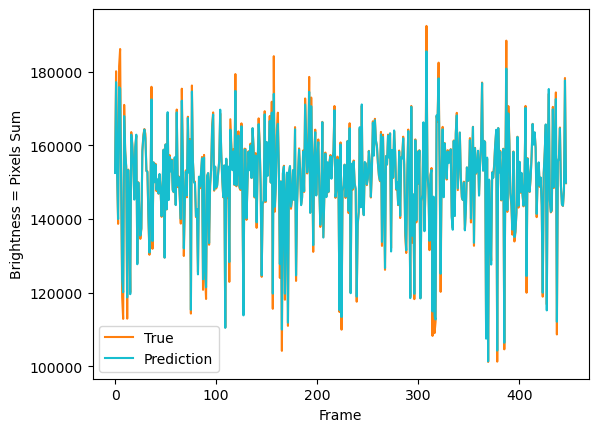

In [166]:
test_labels_ar =test_labels.to_numpy()

plt.plot(test_labels_ar, color='tab:orange', label='True')
plt.plot(preds, color='tab:cyan', label='Prediction')

plt.xlabel("Frame")
plt.ylabel("Brightness = Pixels Sum")

plt.legend()

plt.show()

In [168]:
mse_err = mean_squared_error(preds, test_labels_ar)
mse_err

2209104.8066786523

# Normalized with delta

In [171]:
normalized_final_with_delta = (final_with_delta - final_with_delta.mean())/final_with_delta.std()
normalized_final_with_delta.head()

X_las1    Y_las1    Power1    X_max1    Y_max1   sum_im1    X_las2  \
0  0.103876 -0.033470 -4.058226 -1.287004  0.139250  0.340909  0.247425   
1  0.247584 -0.095316 -4.058226  0.965756  0.139250  0.572480  0.391127   
2  0.391291 -0.157163 -4.058226 -0.385900  1.690939 -0.067119  0.534829   
3  0.534999 -0.219009 -4.058226  0.064652 -2.188284  0.402905  0.822233   
4  0.822414 -0.342702 -4.058226  0.064652 -0.636595 -0.344146  0.965935   

     Y_las2    Power2    X_max2  ...   Power41   X_max41   Y_max41  sum_im41  \
0 -0.095823 -4.075138  0.965663  ... -0.021143  0.312736 -2.702216  0.328503   
1 -0.157651 -4.075138 -0.385581  ... -0.021143  0.000558  1.082240 -0.523589   
2 -0.219478 -4.075138  0.064834  ... -0.021143  0.624913  0.000967  1.303339   
3 -0.343134 -4.075138  0.064834  ... -0.021143 -0.311619  0.811922 -2.684451   
4 -0.404961 -4.075138  0.965663  ... -0.021143  0.000558 -0.809988  3.152677   

    X_las51   Y_las51   Power51   X_max51   Y_max51  sum_im51  
0  1.827052 -0.850236 -0.021143  0.000698  1.081087 -0.522703  
1  0.913474 -0.427727 -0.021143  0.625066 -0.001088  1.303617  
2  0.913474 -0.427727 -0.021143 -0.311486  0.810543 -2.682845  
3  0.913474 -0.427727 -0.021143  0.000698 -0.812720  3.152340  
4  1.827052 -0.850236 -0.021143  0.000698  0.269455 -1.256890  

[5 rows x 60 columns]

In [172]:
end_train = '1425'
start_validation = '1430'
end_validation = '1785'
start_test = '1790'
data_train = normalized_final_with_delta.loc[: end_train, :]
data_val   = normalized_final_with_delta.loc[start_validation:end_validation, :]
data_test  = normalized_final_with_delta.loc[start_test:, :]


train_labels = data_train['sum_im5']
data_train = data_train.iloc[:,:-1]

val_labels = data_val['sum_im5']
data_val = data_val.iloc[:,:-1]

test_labels = data_test['sum_im5']
data_test = data_test.iloc[:,:-1]

model = CatBoostRegressor(iterations = 6000, 
                          random_seed = 42, 
                          depth = 10,
                          #task_type = "GPU",
                          #devices = '0'
                         )

model.fit(data_train, train_labels, plot = True, eval_set = (data_test,test_labels))
preds = model.predict(data_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.018048
0:	learn: 1.0041724	test: 0.9234676	best: 0.9234676 (0)	total: 28.1ms	remaining: 2m 48s
1:	learn: 0.9918226	test: 0.9119435	best: 0.9119435 (1)	total: 53.7ms	remaining: 2m 40s
2:	learn: 0.9806569	test: 0.9015816	best: 0.9015816 (2)	total: 69.6ms	remaining: 2m 19s
3:	learn: 0.9686270	test: 0.8899498	best: 0.8899498 (3)	total: 86.6ms	remaining: 2m 9s
4:	learn: 0.9558836	test: 0.8774782	best: 0.8774782 (4)	total: 102ms	remaining: 2m 2s
5:	learn: 0.9437817	test: 0.8654475	best: 0.8654475 (5)	total: 118ms	remaining: 1m 58s
6:	learn: 0.9313786	test: 0.8542667	best: 0.8542667 (6)	total: 134ms	remaining: 1m 54s
7:	learn: 0.9199242	test: 0.8433191	best: 0.8433191 (7)	total: 150ms	remaining: 1m 52s
8:	learn: 0.9077042	test: 0.8323682	best: 0.8323682 (8)	total: 165ms	remaining: 1m 49s
9:	learn: 0.8959251	test: 0.8215731	best: 0.8215731 (9)	total: 182ms	remaining: 1m 49s
10:	learn: 0.8847053	test: 0.8112275	best: 0.8112275 (10)	total: 198ms	remaining: 1m 47s
11:	learn

103:	learn: 0.2951260	test: 0.3002554	best: 0.3002554 (103)	total: 1.88s	remaining: 1m 46s
104:	learn: 0.2917502	test: 0.2972485	best: 0.2972485 (104)	total: 1.9s	remaining: 1m 46s
105:	learn: 0.2888351	test: 0.2944044	best: 0.2944044 (105)	total: 1.91s	remaining: 1m 46s
106:	learn: 0.2856767	test: 0.2915554	best: 0.2915554 (106)	total: 1.93s	remaining: 1m 46s
107:	learn: 0.2820664	test: 0.2882933	best: 0.2882933 (107)	total: 1.95s	remaining: 1m 46s
108:	learn: 0.2791715	test: 0.2862727	best: 0.2862727 (108)	total: 1.97s	remaining: 1m 46s
109:	learn: 0.2757786	test: 0.2832561	best: 0.2832561 (109)	total: 1.99s	remaining: 1m 46s
110:	learn: 0.2727908	test: 0.2803663	best: 0.2803663 (110)	total: 2.01s	remaining: 1m 46s
111:	learn: 0.2694861	test: 0.2772703	best: 0.2772703 (111)	total: 2.03s	remaining: 1m 46s
112:	learn: 0.2668400	test: 0.2748786	best: 0.2748786 (112)	total: 2.05s	remaining: 1m 46s
113:	learn: 0.2642762	test: 0.2730649	best: 0.2730649 (113)	total: 2.06s	remaining: 1m 46s


196:	learn: 0.1248937	test: 0.1609894	best: 0.1609894 (196)	total: 3.58s	remaining: 1m 45s
197:	learn: 0.1239139	test: 0.1602730	best: 0.1602730 (197)	total: 3.6s	remaining: 1m 45s
198:	learn: 0.1226558	test: 0.1592962	best: 0.1592962 (198)	total: 3.61s	remaining: 1m 45s
199:	learn: 0.1214223	test: 0.1582980	best: 0.1582980 (199)	total: 3.63s	remaining: 1m 45s
200:	learn: 0.1206759	test: 0.1580152	best: 0.1580152 (200)	total: 3.65s	remaining: 1m 45s
201:	learn: 0.1194614	test: 0.1570957	best: 0.1570957 (201)	total: 3.67s	remaining: 1m 45s
202:	learn: 0.1184002	test: 0.1561975	best: 0.1561975 (202)	total: 3.69s	remaining: 1m 45s
203:	learn: 0.1175374	test: 0.1553787	best: 0.1553787 (203)	total: 3.7s	remaining: 1m 45s
204:	learn: 0.1168399	test: 0.1550458	best: 0.1550458 (204)	total: 3.72s	remaining: 1m 45s
205:	learn: 0.1159562	test: 0.1545814	best: 0.1545814 (205)	total: 3.74s	remaining: 1m 45s
206:	learn: 0.1150146	test: 0.1538675	best: 0.1538675 (206)	total: 3.75s	remaining: 1m 45s
2

296:	learn: 0.0626527	test: 0.1204046	best: 0.1204046 (296)	total: 5.46s	remaining: 1m 44s
297:	learn: 0.0624308	test: 0.1203024	best: 0.1203024 (297)	total: 5.48s	remaining: 1m 44s
298:	learn: 0.0620865	test: 0.1201121	best: 0.1201121 (298)	total: 5.5s	remaining: 1m 44s
299:	learn: 0.0617024	test: 0.1199301	best: 0.1199301 (299)	total: 5.51s	remaining: 1m 44s
300:	learn: 0.0613032	test: 0.1197452	best: 0.1197452 (300)	total: 5.53s	remaining: 1m 44s
301:	learn: 0.0610095	test: 0.1196047	best: 0.1196047 (301)	total: 5.55s	remaining: 1m 44s
302:	learn: 0.0606145	test: 0.1193191	best: 0.1193191 (302)	total: 5.57s	remaining: 1m 44s
303:	learn: 0.0602972	test: 0.1191113	best: 0.1191113 (303)	total: 5.58s	remaining: 1m 44s
304:	learn: 0.0599561	test: 0.1189643	best: 0.1189643 (304)	total: 5.6s	remaining: 1m 44s
305:	learn: 0.0596866	test: 0.1188111	best: 0.1188111 (305)	total: 5.62s	remaining: 1m 44s
306:	learn: 0.0594388	test: 0.1186083	best: 0.1186083 (306)	total: 5.64s	remaining: 1m 44s
3

392:	learn: 0.0396137	test: 0.1079492	best: 0.1079492 (392)	total: 7.15s	remaining: 1m 42s
393:	learn: 0.0394356	test: 0.1078678	best: 0.1078678 (393)	total: 7.17s	remaining: 1m 42s
394:	learn: 0.0392730	test: 0.1077913	best: 0.1077913 (394)	total: 7.19s	remaining: 1m 42s
395:	learn: 0.0391363	test: 0.1077570	best: 0.1077570 (395)	total: 7.21s	remaining: 1m 42s
396:	learn: 0.0389681	test: 0.1076258	best: 0.1076258 (396)	total: 7.23s	remaining: 1m 42s
397:	learn: 0.0388243	test: 0.1075495	best: 0.1075495 (397)	total: 7.25s	remaining: 1m 42s
398:	learn: 0.0386492	test: 0.1073888	best: 0.1073888 (398)	total: 7.27s	remaining: 1m 42s
399:	learn: 0.0384403	test: 0.1072134	best: 0.1072134 (399)	total: 7.29s	remaining: 1m 42s
400:	learn: 0.0382656	test: 0.1071390	best: 0.1071390 (400)	total: 7.3s	remaining: 1m 41s
401:	learn: 0.0380861	test: 0.1070343	best: 0.1070343 (401)	total: 7.32s	remaining: 1m 41s
402:	learn: 0.0379878	test: 0.1070305	best: 0.1070305 (402)	total: 7.34s	remaining: 1m 41s


486:	learn: 0.0282456	test: 0.1023794	best: 0.1023794 (486)	total: 8.85s	remaining: 1m 40s
487:	learn: 0.0281686	test: 0.1023455	best: 0.1023455 (487)	total: 8.87s	remaining: 1m 40s
488:	learn: 0.0280910	test: 0.1023054	best: 0.1023054 (488)	total: 8.89s	remaining: 1m 40s
489:	learn: 0.0280211	test: 0.1022749	best: 0.1022749 (489)	total: 8.91s	remaining: 1m 40s
490:	learn: 0.0279513	test: 0.1022615	best: 0.1022615 (490)	total: 8.93s	remaining: 1m 40s
491:	learn: 0.0278469	test: 0.1021875	best: 0.1021875 (491)	total: 8.95s	remaining: 1m 40s
492:	learn: 0.0277966	test: 0.1021724	best: 0.1021724 (492)	total: 8.97s	remaining: 1m 40s
493:	learn: 0.0276898	test: 0.1020922	best: 0.1020922 (493)	total: 8.99s	remaining: 1m 40s
494:	learn: 0.0275908	test: 0.1020543	best: 0.1020543 (494)	total: 9.01s	remaining: 1m 40s
495:	learn: 0.0274850	test: 0.1019783	best: 0.1019783 (495)	total: 9.03s	remaining: 1m 40s
496:	learn: 0.0273908	test: 0.1019326	best: 0.1019326 (496)	total: 9.06s	remaining: 1m 40s

581:	learn: 0.0215696	test: 0.0989052	best: 0.0989052 (581)	total: 10.7s	remaining: 1m 39s
582:	learn: 0.0215195	test: 0.0988887	best: 0.0988887 (582)	total: 10.7s	remaining: 1m 39s
583:	learn: 0.0214870	test: 0.0988660	best: 0.0988660 (583)	total: 10.8s	remaining: 1m 39s
584:	learn: 0.0214435	test: 0.0988307	best: 0.0988307 (584)	total: 10.8s	remaining: 1m 39s
585:	learn: 0.0214091	test: 0.0988184	best: 0.0988184 (585)	total: 10.8s	remaining: 1m 39s
586:	learn: 0.0213848	test: 0.0988036	best: 0.0988036 (586)	total: 10.8s	remaining: 1m 39s
587:	learn: 0.0213369	test: 0.0987844	best: 0.0987844 (587)	total: 10.8s	remaining: 1m 39s
588:	learn: 0.0212905	test: 0.0987699	best: 0.0987699 (588)	total: 10.8s	remaining: 1m 39s
589:	learn: 0.0212439	test: 0.0987542	best: 0.0987542 (589)	total: 10.9s	remaining: 1m 39s
590:	learn: 0.0212286	test: 0.0987493	best: 0.0987493 (590)	total: 10.9s	remaining: 1m 39s
591:	learn: 0.0211701	test: 0.0987101	best: 0.0987101 (591)	total: 10.9s	remaining: 1m 39s

674:	learn: 0.0180435	test: 0.0975419	best: 0.0975419 (674)	total: 12.4s	remaining: 1m 37s
675:	learn: 0.0180280	test: 0.0975289	best: 0.0975289 (675)	total: 12.4s	remaining: 1m 37s
676:	learn: 0.0179796	test: 0.0975155	best: 0.0975155 (676)	total: 12.4s	remaining: 1m 37s
677:	learn: 0.0179443	test: 0.0974992	best: 0.0974992 (677)	total: 12.5s	remaining: 1m 37s
678:	learn: 0.0179063	test: 0.0975021	best: 0.0974992 (677)	total: 12.5s	remaining: 1m 37s
679:	learn: 0.0178727	test: 0.0974994	best: 0.0974992 (677)	total: 12.5s	remaining: 1m 37s
680:	learn: 0.0178211	test: 0.0974734	best: 0.0974734 (680)	total: 12.5s	remaining: 1m 37s
681:	learn: 0.0178113	test: 0.0974693	best: 0.0974693 (681)	total: 12.5s	remaining: 1m 37s
682:	learn: 0.0177648	test: 0.0974344	best: 0.0974344 (682)	total: 12.5s	remaining: 1m 37s
683:	learn: 0.0177297	test: 0.0974314	best: 0.0974314 (683)	total: 12.6s	remaining: 1m 37s
684:	learn: 0.0176925	test: 0.0974354	best: 0.0974314 (683)	total: 12.6s	remaining: 1m 37s

769:	learn: 0.0151183	test: 0.0965304	best: 0.0965302 (768)	total: 14.3s	remaining: 1m 37s
770:	learn: 0.0150851	test: 0.0965240	best: 0.0965240 (770)	total: 14.3s	remaining: 1m 37s
771:	learn: 0.0150664	test: 0.0965099	best: 0.0965099 (771)	total: 14.3s	remaining: 1m 37s
772:	learn: 0.0150426	test: 0.0964986	best: 0.0964986 (772)	total: 14.4s	remaining: 1m 37s
773:	learn: 0.0150070	test: 0.0964576	best: 0.0964576 (773)	total: 14.4s	remaining: 1m 37s
774:	learn: 0.0149794	test: 0.0964535	best: 0.0964535 (774)	total: 14.4s	remaining: 1m 37s
775:	learn: 0.0149485	test: 0.0964212	best: 0.0964212 (775)	total: 14.4s	remaining: 1m 37s
776:	learn: 0.0149106	test: 0.0964172	best: 0.0964172 (776)	total: 14.4s	remaining: 1m 36s
777:	learn: 0.0148886	test: 0.0964141	best: 0.0964141 (777)	total: 14.4s	remaining: 1m 36s
778:	learn: 0.0148634	test: 0.0964117	best: 0.0964117 (778)	total: 14.5s	remaining: 1m 36s
779:	learn: 0.0148577	test: 0.0964038	best: 0.0964038 (779)	total: 14.5s	remaining: 1m 36s

862:	learn: 0.0126522	test: 0.0958435	best: 0.0958382 (860)	total: 16s	remaining: 1m 35s
863:	learn: 0.0126349	test: 0.0958400	best: 0.0958382 (860)	total: 16s	remaining: 1m 35s
864:	learn: 0.0126169	test: 0.0958339	best: 0.0958339 (864)	total: 16s	remaining: 1m 35s
865:	learn: 0.0125781	test: 0.0958310	best: 0.0958310 (865)	total: 16s	remaining: 1m 35s
866:	learn: 0.0125519	test: 0.0958188	best: 0.0958188 (866)	total: 16.1s	remaining: 1m 35s
867:	learn: 0.0125305	test: 0.0958022	best: 0.0958022 (867)	total: 16.1s	remaining: 1m 35s
868:	learn: 0.0125235	test: 0.0957937	best: 0.0957937 (868)	total: 16.3s	remaining: 1m 36s
869:	learn: 0.0125027	test: 0.0957830	best: 0.0957830 (869)	total: 16.3s	remaining: 1m 36s
870:	learn: 0.0124859	test: 0.0957811	best: 0.0957811 (870)	total: 16.4s	remaining: 1m 36s
871:	learn: 0.0124552	test: 0.0957742	best: 0.0957742 (871)	total: 16.4s	remaining: 1m 36s
872:	learn: 0.0124234	test: 0.0957668	best: 0.0957668 (872)	total: 16.4s	remaining: 1m 36s
873:	le

958:	learn: 0.0105249	test: 0.0952694	best: 0.0952694 (958)	total: 18s	remaining: 1m 34s
959:	learn: 0.0105019	test: 0.0952719	best: 0.0952694 (958)	total: 18s	remaining: 1m 34s
960:	learn: 0.0104748	test: 0.0952699	best: 0.0952694 (958)	total: 18.1s	remaining: 1m 34s
961:	learn: 0.0104724	test: 0.0952682	best: 0.0952682 (961)	total: 18.1s	remaining: 1m 34s
962:	learn: 0.0104519	test: 0.0952560	best: 0.0952560 (962)	total: 18.1s	remaining: 1m 34s
963:	learn: 0.0104449	test: 0.0952448	best: 0.0952448 (963)	total: 18.1s	remaining: 1m 34s
964:	learn: 0.0104287	test: 0.0952393	best: 0.0952393 (964)	total: 18.1s	remaining: 1m 34s
965:	learn: 0.0104071	test: 0.0952383	best: 0.0952383 (965)	total: 18.1s	remaining: 1m 34s
966:	learn: 0.0104046	test: 0.0952367	best: 0.0952367 (966)	total: 18.2s	remaining: 1m 34s
967:	learn: 0.0103830	test: 0.0952379	best: 0.0952367 (966)	total: 18.2s	remaining: 1m 34s
968:	learn: 0.0103616	test: 0.0952421	best: 0.0952367 (966)	total: 18.2s	remaining: 1m 34s
969

1048:	learn: 0.0091160	test: 0.0949173	best: 0.0949173 (1048)	total: 19.7s	remaining: 1m 32s
1049:	learn: 0.0090994	test: 0.0949114	best: 0.0949114 (1049)	total: 19.7s	remaining: 1m 32s
1050:	learn: 0.0090792	test: 0.0949121	best: 0.0949114 (1049)	total: 19.7s	remaining: 1m 32s
1051:	learn: 0.0090628	test: 0.0949095	best: 0.0949095 (1051)	total: 19.7s	remaining: 1m 32s
1052:	learn: 0.0090583	test: 0.0949074	best: 0.0949074 (1052)	total: 19.8s	remaining: 1m 32s
1053:	learn: 0.0090412	test: 0.0949070	best: 0.0949070 (1053)	total: 19.8s	remaining: 1m 32s
1054:	learn: 0.0090299	test: 0.0948994	best: 0.0948994 (1054)	total: 19.8s	remaining: 1m 32s
1055:	learn: 0.0090133	test: 0.0948964	best: 0.0948964 (1055)	total: 19.8s	remaining: 1m 32s
1056:	learn: 0.0089909	test: 0.0948924	best: 0.0948924 (1056)	total: 19.8s	remaining: 1m 32s
1057:	learn: 0.0089746	test: 0.0948904	best: 0.0948904 (1057)	total: 19.9s	remaining: 1m 32s
1058:	learn: 0.0089501	test: 0.0948907	best: 0.0948904 (1057)	total: 1

1138:	learn: 0.0077937	test: 0.0947150	best: 0.0947150 (1138)	total: 21.4s	remaining: 1m 31s
1139:	learn: 0.0077806	test: 0.0947088	best: 0.0947088 (1139)	total: 21.4s	remaining: 1m 31s
1140:	learn: 0.0077699	test: 0.0947064	best: 0.0947064 (1140)	total: 21.4s	remaining: 1m 31s
1141:	learn: 0.0077619	test: 0.0947002	best: 0.0947002 (1141)	total: 21.4s	remaining: 1m 31s
1142:	learn: 0.0077493	test: 0.0946988	best: 0.0946988 (1142)	total: 21.5s	remaining: 1m 31s
1143:	learn: 0.0077372	test: 0.0946961	best: 0.0946961 (1143)	total: 21.5s	remaining: 1m 31s
1144:	learn: 0.0077317	test: 0.0946937	best: 0.0946937 (1144)	total: 21.5s	remaining: 1m 31s
1145:	learn: 0.0077214	test: 0.0946898	best: 0.0946898 (1145)	total: 21.5s	remaining: 1m 31s
1146:	learn: 0.0077110	test: 0.0946872	best: 0.0946872 (1146)	total: 21.5s	remaining: 1m 31s
1147:	learn: 0.0076987	test: 0.0946836	best: 0.0946836 (1147)	total: 21.5s	remaining: 1m 31s
1148:	learn: 0.0076900	test: 0.0946843	best: 0.0946836 (1147)	total: 2

1237:	learn: 0.0066399	test: 0.0945400	best: 0.0945400 (1237)	total: 23.2s	remaining: 1m 29s
1238:	learn: 0.0066385	test: 0.0945377	best: 0.0945377 (1238)	total: 23.3s	remaining: 1m 29s
1239:	learn: 0.0066280	test: 0.0945348	best: 0.0945348 (1239)	total: 23.3s	remaining: 1m 29s
1240:	learn: 0.0066180	test: 0.0945358	best: 0.0945348 (1239)	total: 23.3s	remaining: 1m 29s
1241:	learn: 0.0066099	test: 0.0945338	best: 0.0945338 (1241)	total: 23.3s	remaining: 1m 29s
1242:	learn: 0.0066029	test: 0.0945363	best: 0.0945338 (1241)	total: 23.3s	remaining: 1m 29s
1243:	learn: 0.0066018	test: 0.0945350	best: 0.0945338 (1241)	total: 23.4s	remaining: 1m 29s
1244:	learn: 0.0065894	test: 0.0945322	best: 0.0945322 (1244)	total: 23.4s	remaining: 1m 29s
1245:	learn: 0.0065806	test: 0.0945275	best: 0.0945275 (1245)	total: 23.4s	remaining: 1m 29s
1246:	learn: 0.0065695	test: 0.0945274	best: 0.0945274 (1246)	total: 23.4s	remaining: 1m 29s
1247:	learn: 0.0065606	test: 0.0945292	best: 0.0945274 (1246)	total: 2

1336:	learn: 0.0057611	test: 0.0944002	best: 0.0944002 (1336)	total: 25.1s	remaining: 1m 27s
1337:	learn: 0.0057551	test: 0.0943993	best: 0.0943993 (1337)	total: 25.1s	remaining: 1m 27s
1338:	learn: 0.0057439	test: 0.0943971	best: 0.0943971 (1338)	total: 25.1s	remaining: 1m 27s
1339:	learn: 0.0057359	test: 0.0943947	best: 0.0943947 (1339)	total: 25.1s	remaining: 1m 27s
1340:	learn: 0.0057298	test: 0.0943953	best: 0.0943947 (1339)	total: 25.2s	remaining: 1m 27s
1341:	learn: 0.0057169	test: 0.0943948	best: 0.0943947 (1339)	total: 25.2s	remaining: 1m 27s
1342:	learn: 0.0057039	test: 0.0943936	best: 0.0943936 (1342)	total: 25.2s	remaining: 1m 27s
1343:	learn: 0.0056894	test: 0.0943949	best: 0.0943936 (1342)	total: 25.2s	remaining: 1m 27s
1344:	learn: 0.0056798	test: 0.0943949	best: 0.0943936 (1342)	total: 25.2s	remaining: 1m 27s
1345:	learn: 0.0056703	test: 0.0943887	best: 0.0943887 (1345)	total: 25.3s	remaining: 1m 27s
1346:	learn: 0.0056569	test: 0.0943875	best: 0.0943875 (1346)	total: 2

1431:	learn: 0.0049166	test: 0.0942942	best: 0.0942909 (1427)	total: 27s	remaining: 1m 25s
1432:	learn: 0.0049050	test: 0.0942919	best: 0.0942909 (1427)	total: 27s	remaining: 1m 25s
1433:	learn: 0.0048954	test: 0.0942923	best: 0.0942909 (1427)	total: 27s	remaining: 1m 25s
1434:	learn: 0.0048896	test: 0.0942908	best: 0.0942908 (1434)	total: 27s	remaining: 1m 25s
1435:	learn: 0.0048823	test: 0.0942914	best: 0.0942908 (1434)	total: 27s	remaining: 1m 25s
1436:	learn: 0.0048759	test: 0.0942895	best: 0.0942895 (1436)	total: 27.1s	remaining: 1m 25s
1437:	learn: 0.0048689	test: 0.0942897	best: 0.0942895 (1436)	total: 27.1s	remaining: 1m 25s
1438:	learn: 0.0048610	test: 0.0942892	best: 0.0942892 (1438)	total: 27.1s	remaining: 1m 25s
1439:	learn: 0.0048549	test: 0.0942877	best: 0.0942877 (1439)	total: 27.1s	remaining: 1m 25s
1440:	learn: 0.0048467	test: 0.0942856	best: 0.0942856 (1440)	total: 27.1s	remaining: 1m 25s
1441:	learn: 0.0048414	test: 0.0942843	best: 0.0942843 (1441)	total: 27.1s	remai

1520:	learn: 0.0043119	test: 0.0942253	best: 0.0942253 (1520)	total: 28.6s	remaining: 1m 24s
1521:	learn: 0.0043093	test: 0.0942250	best: 0.0942250 (1521)	total: 28.7s	remaining: 1m 24s
1522:	learn: 0.0043036	test: 0.0942200	best: 0.0942200 (1522)	total: 28.7s	remaining: 1m 24s
1523:	learn: 0.0042965	test: 0.0942190	best: 0.0942190 (1523)	total: 28.7s	remaining: 1m 24s
1524:	learn: 0.0042896	test: 0.0942197	best: 0.0942190 (1523)	total: 28.7s	remaining: 1m 24s
1525:	learn: 0.0042848	test: 0.0942184	best: 0.0942184 (1525)	total: 28.7s	remaining: 1m 24s
1526:	learn: 0.0042800	test: 0.0942169	best: 0.0942169 (1526)	total: 28.8s	remaining: 1m 24s
1527:	learn: 0.0042771	test: 0.0942151	best: 0.0942151 (1527)	total: 28.8s	remaining: 1m 24s
1528:	learn: 0.0042685	test: 0.0942139	best: 0.0942139 (1528)	total: 28.8s	remaining: 1m 24s
1529:	learn: 0.0042627	test: 0.0942129	best: 0.0942129 (1529)	total: 28.8s	remaining: 1m 24s
1530:	learn: 0.0042559	test: 0.0942125	best: 0.0942125 (1530)	total: 2

1613:	learn: 0.0037837	test: 0.0941697	best: 0.0941697 (1612)	total: 30.5s	remaining: 1m 22s
1614:	learn: 0.0037777	test: 0.0941687	best: 0.0941687 (1614)	total: 30.5s	remaining: 1m 22s
1615:	learn: 0.0037710	test: 0.0941693	best: 0.0941687 (1614)	total: 30.6s	remaining: 1m 22s
1616:	learn: 0.0037658	test: 0.0941678	best: 0.0941678 (1616)	total: 30.6s	remaining: 1m 22s
1617:	learn: 0.0037564	test: 0.0941658	best: 0.0941658 (1617)	total: 30.6s	remaining: 1m 22s
1618:	learn: 0.0037519	test: 0.0941617	best: 0.0941617 (1618)	total: 30.6s	remaining: 1m 22s
1619:	learn: 0.0037464	test: 0.0941613	best: 0.0941613 (1619)	total: 30.6s	remaining: 1m 22s
1620:	learn: 0.0037406	test: 0.0941616	best: 0.0941613 (1619)	total: 30.7s	remaining: 1m 22s
1621:	learn: 0.0037358	test: 0.0941584	best: 0.0941584 (1621)	total: 30.7s	remaining: 1m 22s
1622:	learn: 0.0037295	test: 0.0941588	best: 0.0941584 (1621)	total: 30.7s	remaining: 1m 22s
1623:	learn: 0.0037237	test: 0.0941585	best: 0.0941584 (1621)	total: 3

1712:	learn: 0.0032895	test: 0.0941177	best: 0.0941167 (1711)	total: 32.4s	remaining: 1m 21s
1713:	learn: 0.0032861	test: 0.0941170	best: 0.0941167 (1711)	total: 32.4s	remaining: 1m 21s
1714:	learn: 0.0032807	test: 0.0941178	best: 0.0941167 (1711)	total: 32.5s	remaining: 1m 21s
1715:	learn: 0.0032769	test: 0.0941163	best: 0.0941163 (1715)	total: 32.5s	remaining: 1m 21s
1716:	learn: 0.0032745	test: 0.0941155	best: 0.0941155 (1716)	total: 32.5s	remaining: 1m 21s
1717:	learn: 0.0032701	test: 0.0941150	best: 0.0941150 (1717)	total: 32.5s	remaining: 1m 21s
1718:	learn: 0.0032654	test: 0.0941150	best: 0.0941150 (1717)	total: 32.5s	remaining: 1m 21s
1719:	learn: 0.0032613	test: 0.0941132	best: 0.0941132 (1719)	total: 32.6s	remaining: 1m 21s
1720:	learn: 0.0032575	test: 0.0941132	best: 0.0941132 (1720)	total: 32.6s	remaining: 1m 21s
1721:	learn: 0.0032533	test: 0.0941130	best: 0.0941130 (1721)	total: 32.6s	remaining: 1m 21s
1722:	learn: 0.0032472	test: 0.0941126	best: 0.0941126 (1722)	total: 3

1810:	learn: 0.0028621	test: 0.0940690	best: 0.0940690 (1810)	total: 34.3s	remaining: 1m 19s
1811:	learn: 0.0028567	test: 0.0940690	best: 0.0940690 (1811)	total: 34.3s	remaining: 1m 19s
1812:	learn: 0.0028528	test: 0.0940684	best: 0.0940684 (1812)	total: 34.3s	remaining: 1m 19s
1813:	learn: 0.0028473	test: 0.0940678	best: 0.0940678 (1813)	total: 34.4s	remaining: 1m 19s
1814:	learn: 0.0028439	test: 0.0940674	best: 0.0940674 (1814)	total: 34.4s	remaining: 1m 19s
1815:	learn: 0.0028414	test: 0.0940674	best: 0.0940674 (1815)	total: 34.4s	remaining: 1m 19s
1816:	learn: 0.0028351	test: 0.0940668	best: 0.0940668 (1816)	total: 34.4s	remaining: 1m 19s
1817:	learn: 0.0028325	test: 0.0940669	best: 0.0940668 (1816)	total: 34.4s	remaining: 1m 19s
1818:	learn: 0.0028288	test: 0.0940667	best: 0.0940667 (1818)	total: 34.4s	remaining: 1m 19s
1819:	learn: 0.0028255	test: 0.0940656	best: 0.0940656 (1819)	total: 34.5s	remaining: 1m 19s
1820:	learn: 0.0028238	test: 0.0940653	best: 0.0940653 (1820)	total: 3

1906:	learn: 0.0025140	test: 0.0940409	best: 0.0940409 (1906)	total: 36.1s	remaining: 1m 17s
1907:	learn: 0.0025127	test: 0.0940404	best: 0.0940404 (1907)	total: 36.2s	remaining: 1m 17s
1908:	learn: 0.0025080	test: 0.0940389	best: 0.0940389 (1908)	total: 36.2s	remaining: 1m 17s
1909:	learn: 0.0025042	test: 0.0940397	best: 0.0940389 (1908)	total: 36.2s	remaining: 1m 17s
1910:	learn: 0.0025002	test: 0.0940394	best: 0.0940389 (1908)	total: 36.2s	remaining: 1m 17s
1911:	learn: 0.0024953	test: 0.0940395	best: 0.0940389 (1908)	total: 36.2s	remaining: 1m 17s
1912:	learn: 0.0024927	test: 0.0940393	best: 0.0940389 (1908)	total: 36.3s	remaining: 1m 17s
1913:	learn: 0.0024906	test: 0.0940380	best: 0.0940380 (1913)	total: 36.3s	remaining: 1m 17s
1914:	learn: 0.0024903	test: 0.0940381	best: 0.0940380 (1913)	total: 36.3s	remaining: 1m 17s
1915:	learn: 0.0024867	test: 0.0940376	best: 0.0940376 (1915)	total: 36.3s	remaining: 1m 17s
1916:	learn: 0.0024845	test: 0.0940371	best: 0.0940371 (1916)	total: 3

2003:	learn: 0.0022135	test: 0.0940111	best: 0.0940108 (2002)	total: 38s	remaining: 1m 15s
2004:	learn: 0.0022100	test: 0.0940111	best: 0.0940108 (2002)	total: 38s	remaining: 1m 15s
2005:	learn: 0.0022066	test: 0.0940116	best: 0.0940108 (2002)	total: 38.1s	remaining: 1m 15s
2006:	learn: 0.0022050	test: 0.0940105	best: 0.0940105 (2006)	total: 38.1s	remaining: 1m 15s
2007:	learn: 0.0022023	test: 0.0940096	best: 0.0940096 (2007)	total: 38.1s	remaining: 1m 15s
2008:	learn: 0.0022005	test: 0.0940092	best: 0.0940092 (2008)	total: 38.1s	remaining: 1m 15s
2009:	learn: 0.0021978	test: 0.0940086	best: 0.0940086 (2009)	total: 38.1s	remaining: 1m 15s
2010:	learn: 0.0021950	test: 0.0940078	best: 0.0940078 (2010)	total: 38.2s	remaining: 1m 15s
2011:	learn: 0.0021923	test: 0.0940084	best: 0.0940078 (2010)	total: 38.2s	remaining: 1m 15s
2012:	learn: 0.0021877	test: 0.0940084	best: 0.0940078 (2010)	total: 38.2s	remaining: 1m 15s
2013:	learn: 0.0021823	test: 0.0940081	best: 0.0940078 (2010)	total: 38.2s

2099:	learn: 0.0019443	test: 0.0939941	best: 0.0939939 (2093)	total: 39.9s	remaining: 1m 14s
2100:	learn: 0.0019421	test: 0.0939933	best: 0.0939933 (2100)	total: 39.9s	remaining: 1m 14s
2101:	learn: 0.0019394	test: 0.0939933	best: 0.0939933 (2101)	total: 39.9s	remaining: 1m 14s
2102:	learn: 0.0019358	test: 0.0939941	best: 0.0939933 (2101)	total: 40s	remaining: 1m 14s
2103:	learn: 0.0019318	test: 0.0939938	best: 0.0939933 (2101)	total: 40s	remaining: 1m 14s
2104:	learn: 0.0019299	test: 0.0939937	best: 0.0939933 (2101)	total: 40s	remaining: 1m 14s
2105:	learn: 0.0019276	test: 0.0939936	best: 0.0939933 (2101)	total: 40s	remaining: 1m 13s
2106:	learn: 0.0019249	test: 0.0939938	best: 0.0939933 (2101)	total: 40s	remaining: 1m 13s
2107:	learn: 0.0019219	test: 0.0939919	best: 0.0939919 (2107)	total: 40.1s	remaining: 1m 13s
2108:	learn: 0.0019199	test: 0.0939922	best: 0.0939919 (2107)	total: 40.1s	remaining: 1m 13s
2109:	learn: 0.0019183	test: 0.0939916	best: 0.0939916 (2109)	total: 40.1s	remai

2188:	learn: 0.0017296	test: 0.0939787	best: 0.0939777 (2181)	total: 41.6s	remaining: 1m 12s
2189:	learn: 0.0017260	test: 0.0939791	best: 0.0939777 (2181)	total: 41.6s	remaining: 1m 12s
2190:	learn: 0.0017237	test: 0.0939788	best: 0.0939777 (2181)	total: 41.6s	remaining: 1m 12s
2191:	learn: 0.0017203	test: 0.0939794	best: 0.0939777 (2181)	total: 41.7s	remaining: 1m 12s
2192:	learn: 0.0017190	test: 0.0939786	best: 0.0939777 (2181)	total: 41.7s	remaining: 1m 12s
2193:	learn: 0.0017166	test: 0.0939784	best: 0.0939777 (2181)	total: 41.7s	remaining: 1m 12s
2194:	learn: 0.0017144	test: 0.0939784	best: 0.0939777 (2181)	total: 41.7s	remaining: 1m 12s
2195:	learn: 0.0017135	test: 0.0939773	best: 0.0939773 (2195)	total: 41.7s	remaining: 1m 12s
2196:	learn: 0.0017115	test: 0.0939772	best: 0.0939772 (2196)	total: 41.8s	remaining: 1m 12s
2197:	learn: 0.0017100	test: 0.0939766	best: 0.0939766 (2197)	total: 41.8s	remaining: 1m 12s
2198:	learn: 0.0017083	test: 0.0939761	best: 0.0939761 (2198)	total: 4

2286:	learn: 0.0015141	test: 0.0939698	best: 0.0939683 (2277)	total: 43.5s	remaining: 1m 10s
2287:	learn: 0.0015115	test: 0.0939698	best: 0.0939683 (2277)	total: 43.5s	remaining: 1m 10s
2288:	learn: 0.0015078	test: 0.0939703	best: 0.0939683 (2277)	total: 43.5s	remaining: 1m 10s
2289:	learn: 0.0015068	test: 0.0939696	best: 0.0939683 (2277)	total: 43.5s	remaining: 1m 10s
2290:	learn: 0.0015047	test: 0.0939688	best: 0.0939683 (2277)	total: 43.5s	remaining: 1m 10s
2291:	learn: 0.0015018	test: 0.0939688	best: 0.0939683 (2277)	total: 43.6s	remaining: 1m 10s
2292:	learn: 0.0015015	test: 0.0939687	best: 0.0939683 (2277)	total: 43.6s	remaining: 1m 10s
2293:	learn: 0.0014993	test: 0.0939688	best: 0.0939683 (2277)	total: 43.6s	remaining: 1m 10s
2294:	learn: 0.0014964	test: 0.0939685	best: 0.0939683 (2277)	total: 43.6s	remaining: 1m 10s
2295:	learn: 0.0014943	test: 0.0939683	best: 0.0939683 (2295)	total: 43.6s	remaining: 1m 10s
2296:	learn: 0.0014941	test: 0.0939683	best: 0.0939683 (2296)	total: 4

2378:	learn: 0.0013257	test: 0.0939625	best: 0.0939625 (2375)	total: 45.4s	remaining: 1m 9s
2379:	learn: 0.0013236	test: 0.0939623	best: 0.0939623 (2379)	total: 45.4s	remaining: 1m 9s
2380:	learn: 0.0013214	test: 0.0939628	best: 0.0939623 (2379)	total: 45.4s	remaining: 1m 9s
2381:	learn: 0.0013196	test: 0.0939628	best: 0.0939623 (2379)	total: 45.4s	remaining: 1m 9s
2382:	learn: 0.0013175	test: 0.0939628	best: 0.0939623 (2379)	total: 45.5s	remaining: 1m 8s
2383:	learn: 0.0013160	test: 0.0939630	best: 0.0939623 (2379)	total: 45.5s	remaining: 1m 8s
2384:	learn: 0.0013153	test: 0.0939627	best: 0.0939623 (2379)	total: 45.5s	remaining: 1m 8s
2385:	learn: 0.0013136	test: 0.0939631	best: 0.0939623 (2379)	total: 45.5s	remaining: 1m 8s
2386:	learn: 0.0013118	test: 0.0939630	best: 0.0939623 (2379)	total: 45.5s	remaining: 1m 8s
2387:	learn: 0.0013086	test: 0.0939633	best: 0.0939623 (2379)	total: 45.6s	remaining: 1m 8s
2388:	learn: 0.0013059	test: 0.0939637	best: 0.0939623 (2379)	total: 45.6s	remai

2475:	learn: 0.0011702	test: 0.0939630	best: 0.0939623 (2379)	total: 47.5s	remaining: 1m 7s
2476:	learn: 0.0011684	test: 0.0939627	best: 0.0939623 (2379)	total: 47.5s	remaining: 1m 7s
2477:	learn: 0.0011665	test: 0.0939625	best: 0.0939623 (2379)	total: 47.5s	remaining: 1m 7s
2478:	learn: 0.0011647	test: 0.0939622	best: 0.0939622 (2478)	total: 47.6s	remaining: 1m 7s
2479:	learn: 0.0011632	test: 0.0939624	best: 0.0939622 (2478)	total: 47.6s	remaining: 1m 7s
2480:	learn: 0.0011614	test: 0.0939625	best: 0.0939622 (2478)	total: 47.6s	remaining: 1m 7s
2481:	learn: 0.0011596	test: 0.0939623	best: 0.0939622 (2478)	total: 47.6s	remaining: 1m 7s
2482:	learn: 0.0011581	test: 0.0939624	best: 0.0939622 (2478)	total: 47.6s	remaining: 1m 7s
2483:	learn: 0.0011571	test: 0.0939621	best: 0.0939621 (2483)	total: 47.6s	remaining: 1m 7s
2484:	learn: 0.0011560	test: 0.0939620	best: 0.0939620 (2484)	total: 47.7s	remaining: 1m 7s
2485:	learn: 0.0011546	test: 0.0939620	best: 0.0939620 (2484)	total: 47.7s	remai

2571:	learn: 0.0010219	test: 0.0939601	best: 0.0939600 (2565)	total: 49.4s	remaining: 1m 5s
2572:	learn: 0.0010207	test: 0.0939602	best: 0.0939600 (2565)	total: 49.4s	remaining: 1m 5s
2573:	learn: 0.0010194	test: 0.0939602	best: 0.0939600 (2565)	total: 49.4s	remaining: 1m 5s
2574:	learn: 0.0010184	test: 0.0939598	best: 0.0939598 (2574)	total: 49.4s	remaining: 1m 5s
2575:	learn: 0.0010174	test: 0.0939597	best: 0.0939597 (2575)	total: 49.4s	remaining: 1m 5s
2576:	learn: 0.0010163	test: 0.0939594	best: 0.0939594 (2576)	total: 49.5s	remaining: 1m 5s
2577:	learn: 0.0010147	test: 0.0939598	best: 0.0939594 (2576)	total: 49.5s	remaining: 1m 5s
2578:	learn: 0.0010142	test: 0.0939597	best: 0.0939594 (2576)	total: 49.5s	remaining: 1m 5s
2579:	learn: 0.0010119	test: 0.0939597	best: 0.0939594 (2576)	total: 49.5s	remaining: 1m 5s
2580:	learn: 0.0010116	test: 0.0939598	best: 0.0939594 (2576)	total: 49.5s	remaining: 1m 5s
2581:	learn: 0.0010096	test: 0.0939601	best: 0.0939594 (2576)	total: 49.5s	remai

2668:	learn: 0.0009021	test: 0.0939572	best: 0.0939572 (2668)	total: 51.2s	remaining: 1m 3s
2669:	learn: 0.0009009	test: 0.0939570	best: 0.0939570 (2669)	total: 51.2s	remaining: 1m 3s
2670:	learn: 0.0008993	test: 0.0939570	best: 0.0939570 (2670)	total: 51.3s	remaining: 1m 3s
2671:	learn: 0.0008985	test: 0.0939570	best: 0.0939570 (2671)	total: 51.3s	remaining: 1m 3s
2672:	learn: 0.0008976	test: 0.0939570	best: 0.0939570 (2671)	total: 51.3s	remaining: 1m 3s
2673:	learn: 0.0008967	test: 0.0939572	best: 0.0939570 (2671)	total: 51.3s	remaining: 1m 3s
2674:	learn: 0.0008959	test: 0.0939569	best: 0.0939569 (2674)	total: 51.3s	remaining: 1m 3s
2675:	learn: 0.0008957	test: 0.0939567	best: 0.0939567 (2675)	total: 51.3s	remaining: 1m 3s
2676:	learn: 0.0008947	test: 0.0939567	best: 0.0939567 (2676)	total: 51.4s	remaining: 1m 3s
2677:	learn: 0.0008934	test: 0.0939567	best: 0.0939567 (2676)	total: 51.4s	remaining: 1m 3s
2678:	learn: 0.0008920	test: 0.0939567	best: 0.0939567 (2676)	total: 51.4s	remai

2765:	learn: 0.0007951	test: 0.0939545	best: 0.0939533 (2739)	total: 53.1s	remaining: 1m 2s
2766:	learn: 0.0007936	test: 0.0939543	best: 0.0939533 (2739)	total: 53.1s	remaining: 1m 2s
2767:	learn: 0.0007922	test: 0.0939544	best: 0.0939533 (2739)	total: 53.1s	remaining: 1m 2s
2768:	learn: 0.0007911	test: 0.0939541	best: 0.0939533 (2739)	total: 53.2s	remaining: 1m 2s
2769:	learn: 0.0007900	test: 0.0939540	best: 0.0939533 (2739)	total: 53.2s	remaining: 1m 2s
2770:	learn: 0.0007889	test: 0.0939539	best: 0.0939533 (2739)	total: 53.2s	remaining: 1m 1s
2771:	learn: 0.0007875	test: 0.0939539	best: 0.0939533 (2739)	total: 53.2s	remaining: 1m 1s
2772:	learn: 0.0007863	test: 0.0939535	best: 0.0939533 (2739)	total: 53.3s	remaining: 1m 1s
2773:	learn: 0.0007852	test: 0.0939536	best: 0.0939533 (2739)	total: 53.3s	remaining: 1m 1s
2774:	learn: 0.0007840	test: 0.0939535	best: 0.0939533 (2739)	total: 53.3s	remaining: 1m 1s
2775:	learn: 0.0007839	test: 0.0939535	best: 0.0939533 (2739)	total: 53.3s	remai

2859:	learn: 0.0007016	test: 0.0939515	best: 0.0939508 (2855)	total: 55s	remaining: 1m
2860:	learn: 0.0007010	test: 0.0939515	best: 0.0939508 (2855)	total: 55s	remaining: 1m
2861:	learn: 0.0006998	test: 0.0939514	best: 0.0939508 (2855)	total: 55s	remaining: 1m
2862:	learn: 0.0006982	test: 0.0939513	best: 0.0939508 (2855)	total: 55.1s	remaining: 1m
2863:	learn: 0.0006976	test: 0.0939513	best: 0.0939508 (2855)	total: 55.1s	remaining: 1m
2864:	learn: 0.0006965	test: 0.0939512	best: 0.0939508 (2855)	total: 55.1s	remaining: 1m
2865:	learn: 0.0006958	test: 0.0939512	best: 0.0939508 (2855)	total: 55.1s	remaining: 1m
2866:	learn: 0.0006942	test: 0.0939511	best: 0.0939508 (2855)	total: 55.1s	remaining: 1m
2867:	learn: 0.0006941	test: 0.0939511	best: 0.0939508 (2855)	total: 55.1s	remaining: 1m
2868:	learn: 0.0006933	test: 0.0939507	best: 0.0939507 (2868)	total: 55.2s	remaining: 1m
2869:	learn: 0.0006932	test: 0.0939507	best: 0.0939507 (2868)	total: 55.2s	remaining: 1m
2870:	learn: 0.0006925	test

2955:	learn: 0.0006208	test: 0.0939489	best: 0.0939488 (2954)	total: 56.9s	remaining: 58.6s
2956:	learn: 0.0006202	test: 0.0939486	best: 0.0939486 (2956)	total: 56.9s	remaining: 58.5s
2957:	learn: 0.0006190	test: 0.0939486	best: 0.0939486 (2956)	total: 56.9s	remaining: 58.5s
2958:	learn: 0.0006177	test: 0.0939487	best: 0.0939486 (2956)	total: 56.9s	remaining: 58.5s
2959:	learn: 0.0006163	test: 0.0939485	best: 0.0939485 (2959)	total: 56.9s	remaining: 58.5s
2960:	learn: 0.0006155	test: 0.0939485	best: 0.0939485 (2959)	total: 57s	remaining: 58.5s
2961:	learn: 0.0006147	test: 0.0939484	best: 0.0939484 (2961)	total: 57s	remaining: 58.4s
2962:	learn: 0.0006146	test: 0.0939484	best: 0.0939484 (2962)	total: 57s	remaining: 58.4s
2963:	learn: 0.0006143	test: 0.0939483	best: 0.0939483 (2963)	total: 57s	remaining: 58.4s
2964:	learn: 0.0006137	test: 0.0939483	best: 0.0939483 (2964)	total: 57s	remaining: 58.4s
2965:	learn: 0.0006137	test: 0.0939483	best: 0.0939483 (2964)	total: 57.1s	remaining: 58.4

3052:	learn: 0.0005562	test: 0.0939466	best: 0.0939461 (3043)	total: 58.8s	remaining: 56.7s
3053:	learn: 0.0005555	test: 0.0939465	best: 0.0939461 (3043)	total: 58.8s	remaining: 56.7s
3054:	learn: 0.0005544	test: 0.0939465	best: 0.0939461 (3043)	total: 58.8s	remaining: 56.7s
3055:	learn: 0.0005535	test: 0.0939465	best: 0.0939461 (3043)	total: 58.8s	remaining: 56.7s
3056:	learn: 0.0005529	test: 0.0939465	best: 0.0939461 (3043)	total: 58.8s	remaining: 56.6s
3057:	learn: 0.0005517	test: 0.0939468	best: 0.0939461 (3043)	total: 58.9s	remaining: 56.6s
3058:	learn: 0.0005513	test: 0.0939468	best: 0.0939461 (3043)	total: 58.9s	remaining: 56.6s
3059:	learn: 0.0005503	test: 0.0939467	best: 0.0939461 (3043)	total: 58.9s	remaining: 56.6s
3060:	learn: 0.0005500	test: 0.0939466	best: 0.0939461 (3043)	total: 58.9s	remaining: 56.6s
3061:	learn: 0.0005491	test: 0.0939466	best: 0.0939461 (3043)	total: 58.9s	remaining: 56.5s
3062:	learn: 0.0005484	test: 0.0939467	best: 0.0939461 (3043)	total: 58.9s	remai

3149:	learn: 0.0004913	test: 0.0939463	best: 0.0939457 (3114)	total: 1m	remaining: 54.9s
3150:	learn: 0.0004909	test: 0.0939460	best: 0.0939457 (3114)	total: 1m	remaining: 54.9s
3151:	learn: 0.0004898	test: 0.0939460	best: 0.0939457 (3114)	total: 1m	remaining: 54.9s
3152:	learn: 0.0004888	test: 0.0939459	best: 0.0939457 (3114)	total: 1m	remaining: 54.9s
3153:	learn: 0.0004880	test: 0.0939457	best: 0.0939457 (3114)	total: 1m	remaining: 54.8s
3154:	learn: 0.0004880	test: 0.0939457	best: 0.0939457 (3154)	total: 1m	remaining: 54.8s
3155:	learn: 0.0004876	test: 0.0939457	best: 0.0939457 (3155)	total: 1m	remaining: 54.8s
3156:	learn: 0.0004868	test: 0.0939457	best: 0.0939457 (3156)	total: 1m	remaining: 54.8s
3157:	learn: 0.0004863	test: 0.0939455	best: 0.0939455 (3157)	total: 1m	remaining: 54.8s
3158:	learn: 0.0004860	test: 0.0939455	best: 0.0939455 (3158)	total: 1m	remaining: 54.8s
3159:	learn: 0.0004856	test: 0.0939453	best: 0.0939453 (3159)	total: 1m	remaining: 54.7s
3160:	learn: 0.000484

3248:	learn: 0.0004399	test: 0.0939430	best: 0.0939430 (3248)	total: 1m 2s	remaining: 53.3s
3249:	learn: 0.0004394	test: 0.0939430	best: 0.0939430 (3249)	total: 1m 3s	remaining: 53.3s
3250:	learn: 0.0004389	test: 0.0939430	best: 0.0939430 (3249)	total: 1m 3s	remaining: 53.3s
3251:	learn: 0.0004385	test: 0.0939430	best: 0.0939430 (3251)	total: 1m 3s	remaining: 53.3s
3252:	learn: 0.0004382	test: 0.0939429	best: 0.0939429 (3252)	total: 1m 3s	remaining: 53.3s
3253:	learn: 0.0004373	test: 0.0939431	best: 0.0939429 (3252)	total: 1m 3s	remaining: 53.2s
3254:	learn: 0.0004371	test: 0.0939431	best: 0.0939429 (3252)	total: 1m 3s	remaining: 53.2s
3255:	learn: 0.0004367	test: 0.0939431	best: 0.0939429 (3252)	total: 1m 3s	remaining: 53.2s
3256:	learn: 0.0004358	test: 0.0939431	best: 0.0939429 (3252)	total: 1m 3s	remaining: 53.2s
3257:	learn: 0.0004351	test: 0.0939431	best: 0.0939429 (3252)	total: 1m 3s	remaining: 53.2s
3258:	learn: 0.0004344	test: 0.0939430	best: 0.0939429 (3252)	total: 1m 3s	remai

3342:	learn: 0.0003916	test: 0.0939422	best: 0.0939419 (3316)	total: 1m 4s	remaining: 51.6s
3343:	learn: 0.0003912	test: 0.0939422	best: 0.0939419 (3316)	total: 1m 4s	remaining: 51.5s
3344:	learn: 0.0003906	test: 0.0939423	best: 0.0939419 (3316)	total: 1m 4s	remaining: 51.5s
3345:	learn: 0.0003899	test: 0.0939424	best: 0.0939419 (3316)	total: 1m 4s	remaining: 51.5s
3346:	learn: 0.0003894	test: 0.0939426	best: 0.0939419 (3316)	total: 1m 4s	remaining: 51.5s
3347:	learn: 0.0003888	test: 0.0939425	best: 0.0939419 (3316)	total: 1m 4s	remaining: 51.5s
3348:	learn: 0.0003886	test: 0.0939423	best: 0.0939419 (3316)	total: 1m 4s	remaining: 51.4s
3349:	learn: 0.0003885	test: 0.0939423	best: 0.0939419 (3316)	total: 1m 5s	remaining: 51.4s
3350:	learn: 0.0003882	test: 0.0939421	best: 0.0939419 (3316)	total: 1m 5s	remaining: 51.4s
3351:	learn: 0.0003873	test: 0.0939420	best: 0.0939419 (3316)	total: 1m 5s	remaining: 51.4s
3352:	learn: 0.0003868	test: 0.0939422	best: 0.0939419 (3316)	total: 1m 5s	remai

3441:	learn: 0.0003500	test: 0.0939424	best: 0.0939419 (3316)	total: 1m 6s	remaining: 49.6s
3442:	learn: 0.0003497	test: 0.0939424	best: 0.0939419 (3316)	total: 1m 6s	remaining: 49.6s
3443:	learn: 0.0003494	test: 0.0939426	best: 0.0939419 (3316)	total: 1m 6s	remaining: 49.6s
3444:	learn: 0.0003490	test: 0.0939426	best: 0.0939419 (3316)	total: 1m 6s	remaining: 49.6s
3445:	learn: 0.0003490	test: 0.0939426	best: 0.0939419 (3316)	total: 1m 6s	remaining: 49.6s
3446:	learn: 0.0003487	test: 0.0939426	best: 0.0939419 (3316)	total: 1m 6s	remaining: 49.6s
3447:	learn: 0.0003483	test: 0.0939427	best: 0.0939419 (3316)	total: 1m 6s	remaining: 49.5s
3448:	learn: 0.0003480	test: 0.0939427	best: 0.0939419 (3316)	total: 1m 6s	remaining: 49.5s
3449:	learn: 0.0003477	test: 0.0939427	best: 0.0939419 (3316)	total: 1m 6s	remaining: 49.5s
3450:	learn: 0.0003471	test: 0.0939427	best: 0.0939419 (3316)	total: 1m 7s	remaining: 49.5s
3451:	learn: 0.0003470	test: 0.0939427	best: 0.0939419 (3316)	total: 1m 7s	remai

3538:	learn: 0.0003098	test: 0.0939416	best: 0.0939415 (3533)	total: 1m 8s	remaining: 47.8s
3539:	learn: 0.0003093	test: 0.0939415	best: 0.0939415 (3539)	total: 1m 8s	remaining: 47.7s
3540:	learn: 0.0003087	test: 0.0939415	best: 0.0939415 (3539)	total: 1m 8s	remaining: 47.7s
3541:	learn: 0.0003085	test: 0.0939415	best: 0.0939415 (3539)	total: 1m 8s	remaining: 47.7s
3542:	learn: 0.0003082	test: 0.0939415	best: 0.0939415 (3542)	total: 1m 8s	remaining: 47.7s
3543:	learn: 0.0003082	test: 0.0939415	best: 0.0939415 (3542)	total: 1m 8s	remaining: 47.7s
3544:	learn: 0.0003079	test: 0.0939415	best: 0.0939415 (3544)	total: 1m 8s	remaining: 47.6s
3545:	learn: 0.0003074	test: 0.0939414	best: 0.0939414 (3545)	total: 1m 8s	remaining: 47.6s
3546:	learn: 0.0003072	test: 0.0939414	best: 0.0939414 (3546)	total: 1m 8s	remaining: 47.6s
3547:	learn: 0.0003065	test: 0.0939414	best: 0.0939414 (3546)	total: 1m 8s	remaining: 47.6s
3548:	learn: 0.0003064	test: 0.0939414	best: 0.0939414 (3546)	total: 1m 8s	remai

3633:	learn: 0.0002753	test: 0.0939412	best: 0.0939408 (3579)	total: 1m 10s	remaining: 45.9s
3634:	learn: 0.0002750	test: 0.0939411	best: 0.0939408 (3579)	total: 1m 10s	remaining: 45.9s
3635:	learn: 0.0002744	test: 0.0939411	best: 0.0939408 (3579)	total: 1m 10s	remaining: 45.9s
3636:	learn: 0.0002742	test: 0.0939411	best: 0.0939408 (3579)	total: 1m 10s	remaining: 45.9s
3637:	learn: 0.0002741	test: 0.0939411	best: 0.0939408 (3579)	total: 1m 10s	remaining: 45.9s
3638:	learn: 0.0002740	test: 0.0939410	best: 0.0939408 (3579)	total: 1m 10s	remaining: 45.8s
3639:	learn: 0.0002736	test: 0.0939409	best: 0.0939408 (3579)	total: 1m 10s	remaining: 45.8s
3640:	learn: 0.0002733	test: 0.0939409	best: 0.0939408 (3579)	total: 1m 10s	remaining: 45.8s
3641:	learn: 0.0002733	test: 0.0939408	best: 0.0939408 (3641)	total: 1m 10s	remaining: 45.8s
3642:	learn: 0.0002728	test: 0.0939407	best: 0.0939407 (3642)	total: 1m 10s	remaining: 45.8s
3643:	learn: 0.0002725	test: 0.0939408	best: 0.0939407 (3642)	total: 1

3726:	learn: 0.0002448	test: 0.0939397	best: 0.0939397 (3722)	total: 1m 12s	remaining: 44.2s
3727:	learn: 0.0002443	test: 0.0939398	best: 0.0939397 (3722)	total: 1m 12s	remaining: 44.2s
3728:	learn: 0.0002439	test: 0.0939397	best: 0.0939397 (3722)	total: 1m 12s	remaining: 44.1s
3729:	learn: 0.0002438	test: 0.0939397	best: 0.0939397 (3722)	total: 1m 12s	remaining: 44.1s
3730:	learn: 0.0002435	test: 0.0939397	best: 0.0939397 (3722)	total: 1m 12s	remaining: 44.1s
3731:	learn: 0.0002432	test: 0.0939397	best: 0.0939397 (3722)	total: 1m 12s	remaining: 44.1s
3732:	learn: 0.0002431	test: 0.0939397	best: 0.0939397 (3722)	total: 1m 12s	remaining: 44.1s
3733:	learn: 0.0002431	test: 0.0939397	best: 0.0939397 (3722)	total: 1m 12s	remaining: 44s
3734:	learn: 0.0002426	test: 0.0939396	best: 0.0939396 (3734)	total: 1m 12s	remaining: 44s
3735:	learn: 0.0002425	test: 0.0939396	best: 0.0939396 (3735)	total: 1m 12s	remaining: 44s
3736:	learn: 0.0002422	test: 0.0939396	best: 0.0939396 (3736)	total: 1m 12s	

3822:	learn: 0.0002195	test: 0.0939391	best: 0.0939390 (3779)	total: 1m 14s	remaining: 42.5s
3823:	learn: 0.0002192	test: 0.0939391	best: 0.0939390 (3779)	total: 1m 14s	remaining: 42.5s
3824:	learn: 0.0002190	test: 0.0939391	best: 0.0939390 (3779)	total: 1m 14s	remaining: 42.5s
3825:	learn: 0.0002189	test: 0.0939391	best: 0.0939390 (3779)	total: 1m 14s	remaining: 42.4s
3826:	learn: 0.0002187	test: 0.0939391	best: 0.0939390 (3779)	total: 1m 14s	remaining: 42.4s
3827:	learn: 0.0002187	test: 0.0939391	best: 0.0939390 (3779)	total: 1m 14s	remaining: 42.4s
3828:	learn: 0.0002184	test: 0.0939391	best: 0.0939390 (3779)	total: 1m 14s	remaining: 42.4s
3829:	learn: 0.0002181	test: 0.0939391	best: 0.0939390 (3779)	total: 1m 14s	remaining: 42.4s
3830:	learn: 0.0002181	test: 0.0939391	best: 0.0939390 (3779)	total: 1m 14s	remaining: 42.3s
3831:	learn: 0.0002176	test: 0.0939391	best: 0.0939390 (3779)	total: 1m 14s	remaining: 42.3s
3832:	learn: 0.0002174	test: 0.0939391	best: 0.0939390 (3779)	total: 1

3917:	learn: 0.0001968	test: 0.0939384	best: 0.0939384 (3915)	total: 1m 16s	remaining: 40.7s
3918:	learn: 0.0001965	test: 0.0939384	best: 0.0939384 (3915)	total: 1m 16s	remaining: 40.6s
3919:	learn: 0.0001962	test: 0.0939384	best: 0.0939384 (3915)	total: 1m 16s	remaining: 40.6s
3920:	learn: 0.0001957	test: 0.0939384	best: 0.0939384 (3920)	total: 1m 16s	remaining: 40.6s
3921:	learn: 0.0001955	test: 0.0939384	best: 0.0939384 (3921)	total: 1m 16s	remaining: 40.6s
3922:	learn: 0.0001953	test: 0.0939384	best: 0.0939384 (3921)	total: 1m 16s	remaining: 40.6s
3923:	learn: 0.0001951	test: 0.0939383	best: 0.0939383 (3923)	total: 1m 16s	remaining: 40.6s
3924:	learn: 0.0001946	test: 0.0939384	best: 0.0939383 (3923)	total: 1m 16s	remaining: 40.5s
3925:	learn: 0.0001944	test: 0.0939384	best: 0.0939383 (3923)	total: 1m 16s	remaining: 40.5s
3926:	learn: 0.0001941	test: 0.0939385	best: 0.0939383 (3923)	total: 1m 16s	remaining: 40.5s
3927:	learn: 0.0001938	test: 0.0939385	best: 0.0939383 (3923)	total: 1

4014:	learn: 0.0001759	test: 0.0939382	best: 0.0939382 (4014)	total: 1m 18s	remaining: 38.9s
4015:	learn: 0.0001759	test: 0.0939382	best: 0.0939382 (4015)	total: 1m 18s	remaining: 38.8s
4016:	learn: 0.0001759	test: 0.0939382	best: 0.0939382 (4016)	total: 1m 18s	remaining: 38.8s
4017:	learn: 0.0001756	test: 0.0939381	best: 0.0939381 (4017)	total: 1m 18s	remaining: 38.8s
4018:	learn: 0.0001752	test: 0.0939381	best: 0.0939381 (4018)	total: 1m 18s	remaining: 38.8s
4019:	learn: 0.0001749	test: 0.0939380	best: 0.0939380 (4019)	total: 1m 18s	remaining: 38.8s
4020:	learn: 0.0001748	test: 0.0939379	best: 0.0939379 (4020)	total: 1m 18s	remaining: 38.7s
4021:	learn: 0.0001744	test: 0.0939380	best: 0.0939379 (4020)	total: 1m 18s	remaining: 38.7s
4022:	learn: 0.0001742	test: 0.0939380	best: 0.0939379 (4020)	total: 1m 18s	remaining: 38.7s
4023:	learn: 0.0001741	test: 0.0939380	best: 0.0939379 (4020)	total: 1m 18s	remaining: 38.7s
4024:	learn: 0.0001741	test: 0.0939380	best: 0.0939379 (4020)	total: 1

4111:	learn: 0.0001604	test: 0.0939375	best: 0.0939375 (4104)	total: 1m 20s	remaining: 37s
4112:	learn: 0.0001602	test: 0.0939375	best: 0.0939375 (4104)	total: 1m 20s	remaining: 36.9s
4113:	learn: 0.0001602	test: 0.0939375	best: 0.0939375 (4104)	total: 1m 20s	remaining: 36.9s
4114:	learn: 0.0001600	test: 0.0939375	best: 0.0939375 (4104)	total: 1m 20s	remaining: 36.9s
4115:	learn: 0.0001600	test: 0.0939375	best: 0.0939375 (4104)	total: 1m 20s	remaining: 36.9s
4116:	learn: 0.0001598	test: 0.0939376	best: 0.0939375 (4104)	total: 1m 20s	remaining: 36.9s
4117:	learn: 0.0001595	test: 0.0939376	best: 0.0939375 (4104)	total: 1m 20s	remaining: 36.8s
4118:	learn: 0.0001593	test: 0.0939376	best: 0.0939375 (4104)	total: 1m 20s	remaining: 36.8s
4119:	learn: 0.0001591	test: 0.0939376	best: 0.0939375 (4104)	total: 1m 20s	remaining: 36.8s
4120:	learn: 0.0001589	test: 0.0939376	best: 0.0939375 (4104)	total: 1m 20s	remaining: 36.8s
4121:	learn: 0.0001587	test: 0.0939376	best: 0.0939375 (4104)	total: 1m 

4205:	learn: 0.0001431	test: 0.0939372	best: 0.0939371 (4204)	total: 1m 22s	remaining: 35.1s
4206:	learn: 0.0001428	test: 0.0939372	best: 0.0939371 (4204)	total: 1m 22s	remaining: 35.1s
4207:	learn: 0.0001428	test: 0.0939372	best: 0.0939371 (4204)	total: 1m 22s	remaining: 35.1s
4208:	learn: 0.0001426	test: 0.0939372	best: 0.0939371 (4204)	total: 1m 22s	remaining: 35.1s
4209:	learn: 0.0001426	test: 0.0939372	best: 0.0939371 (4204)	total: 1m 22s	remaining: 35.1s
4210:	learn: 0.0001424	test: 0.0939372	best: 0.0939371 (4204)	total: 1m 22s	remaining: 35.1s
4211:	learn: 0.0001423	test: 0.0939372	best: 0.0939371 (4204)	total: 1m 22s	remaining: 35s
4212:	learn: 0.0001421	test: 0.0939372	best: 0.0939371 (4204)	total: 1m 22s	remaining: 35s
4213:	learn: 0.0001419	test: 0.0939372	best: 0.0939371 (4204)	total: 1m 22s	remaining: 35s
4214:	learn: 0.0001417	test: 0.0939371	best: 0.0939371 (4204)	total: 1m 22s	remaining: 35s
4215:	learn: 0.0001417	test: 0.0939371	best: 0.0939371 (4204)	total: 1m 22s	re

4298:	learn: 0.0001296	test: 0.0939367	best: 0.0939367 (4294)	total: 1m 24s	remaining: 33.4s
4299:	learn: 0.0001295	test: 0.0939366	best: 0.0939366 (4299)	total: 1m 24s	remaining: 33.3s
4300:	learn: 0.0001294	test: 0.0939366	best: 0.0939366 (4299)	total: 1m 24s	remaining: 33.3s
4301:	learn: 0.0001292	test: 0.0939366	best: 0.0939366 (4301)	total: 1m 24s	remaining: 33.3s
4302:	learn: 0.0001290	test: 0.0939366	best: 0.0939366 (4302)	total: 1m 24s	remaining: 33.3s
4303:	learn: 0.0001290	test: 0.0939366	best: 0.0939366 (4302)	total: 1m 24s	remaining: 33.3s
4304:	learn: 0.0001288	test: 0.0939366	best: 0.0939366 (4302)	total: 1m 24s	remaining: 33.2s
4305:	learn: 0.0001287	test: 0.0939366	best: 0.0939366 (4305)	total: 1m 24s	remaining: 33.2s
4306:	learn: 0.0001286	test: 0.0939366	best: 0.0939366 (4306)	total: 1m 24s	remaining: 33.2s
4307:	learn: 0.0001284	test: 0.0939366	best: 0.0939366 (4307)	total: 1m 24s	remaining: 33.2s
4308:	learn: 0.0001282	test: 0.0939366	best: 0.0939366 (4308)	total: 1

4387:	learn: 0.0001174	test: 0.0939367	best: 0.0939365 (4318)	total: 1m 26s	remaining: 31.7s
4388:	learn: 0.0001172	test: 0.0939366	best: 0.0939365 (4318)	total: 1m 26s	remaining: 31.7s
4389:	learn: 0.0001169	test: 0.0939367	best: 0.0939365 (4318)	total: 1m 26s	remaining: 31.6s
4390:	learn: 0.0001169	test: 0.0939366	best: 0.0939365 (4318)	total: 1m 26s	remaining: 31.6s
4391:	learn: 0.0001169	test: 0.0939366	best: 0.0939365 (4318)	total: 1m 26s	remaining: 31.6s
4392:	learn: 0.0001168	test: 0.0939367	best: 0.0939365 (4318)	total: 1m 26s	remaining: 31.6s
4393:	learn: 0.0001166	test: 0.0939367	best: 0.0939365 (4318)	total: 1m 26s	remaining: 31.6s
4394:	learn: 0.0001164	test: 0.0939367	best: 0.0939365 (4318)	total: 1m 26s	remaining: 31.5s
4395:	learn: 0.0001164	test: 0.0939367	best: 0.0939365 (4318)	total: 1m 26s	remaining: 31.5s
4396:	learn: 0.0001164	test: 0.0939367	best: 0.0939365 (4318)	total: 1m 26s	remaining: 31.5s
4397:	learn: 0.0001161	test: 0.0939367	best: 0.0939365 (4318)	total: 1

4482:	learn: 0.0001048	test: 0.0939363	best: 0.0939363 (4463)	total: 1m 28s	remaining: 29.8s
4483:	learn: 0.0001046	test: 0.0939363	best: 0.0939363 (4463)	total: 1m 28s	remaining: 29.8s
4484:	learn: 0.0001044	test: 0.0939363	best: 0.0939363 (4463)	total: 1m 28s	remaining: 29.8s
4485:	learn: 0.0001043	test: 0.0939363	best: 0.0939363 (4463)	total: 1m 28s	remaining: 29.8s
4486:	learn: 0.0001041	test: 0.0939363	best: 0.0939363 (4463)	total: 1m 28s	remaining: 29.8s
4487:	learn: 0.0001041	test: 0.0939363	best: 0.0939363 (4463)	total: 1m 28s	remaining: 29.7s
4488:	learn: 0.0001039	test: 0.0939363	best: 0.0939363 (4463)	total: 1m 28s	remaining: 29.7s
4489:	learn: 0.0001038	test: 0.0939363	best: 0.0939363 (4489)	total: 1m 28s	remaining: 29.7s
4490:	learn: 0.0001036	test: 0.0939363	best: 0.0939363 (4489)	total: 1m 28s	remaining: 29.7s
4491:	learn: 0.0001035	test: 0.0939363	best: 0.0939363 (4489)	total: 1m 28s	remaining: 29.6s
4492:	learn: 0.0001034	test: 0.0939363	best: 0.0939363 (4489)	total: 1

4578:	learn: 0.0000934	test: 0.0939363	best: 0.0939360 (4516)	total: 1m 30s	remaining: 27.9s
4579:	learn: 0.0000933	test: 0.0939363	best: 0.0939360 (4516)	total: 1m 30s	remaining: 27.9s
4580:	learn: 0.0000933	test: 0.0939363	best: 0.0939360 (4516)	total: 1m 30s	remaining: 27.9s
4581:	learn: 0.0000931	test: 0.0939363	best: 0.0939360 (4516)	total: 1m 30s	remaining: 27.9s
4582:	learn: 0.0000930	test: 0.0939363	best: 0.0939360 (4516)	total: 1m 30s	remaining: 27.9s
4583:	learn: 0.0000930	test: 0.0939363	best: 0.0939360 (4516)	total: 1m 30s	remaining: 27.9s
4584:	learn: 0.0000929	test: 0.0939363	best: 0.0939360 (4516)	total: 1m 30s	remaining: 27.8s
4585:	learn: 0.0000927	test: 0.0939363	best: 0.0939360 (4516)	total: 1m 30s	remaining: 27.8s
4586:	learn: 0.0000926	test: 0.0939363	best: 0.0939360 (4516)	total: 1m 30s	remaining: 27.8s
4587:	learn: 0.0000925	test: 0.0939363	best: 0.0939360 (4516)	total: 1m 30s	remaining: 27.8s
4588:	learn: 0.0000923	test: 0.0939363	best: 0.0939360 (4516)	total: 1

4673:	learn: 0.0000834	test: 0.0939362	best: 0.0939360 (4516)	total: 1m 32s	remaining: 26.1s
4674:	learn: 0.0000832	test: 0.0939362	best: 0.0939360 (4516)	total: 1m 32s	remaining: 26.1s
4675:	learn: 0.0000830	test: 0.0939362	best: 0.0939360 (4516)	total: 1m 32s	remaining: 26.1s
4676:	learn: 0.0000829	test: 0.0939362	best: 0.0939360 (4516)	total: 1m 32s	remaining: 26s
4677:	learn: 0.0000828	test: 0.0939362	best: 0.0939360 (4516)	total: 1m 32s	remaining: 26s
4678:	learn: 0.0000827	test: 0.0939362	best: 0.0939360 (4516)	total: 1m 32s	remaining: 26s
4679:	learn: 0.0000826	test: 0.0939362	best: 0.0939360 (4516)	total: 1m 32s	remaining: 26s
4680:	learn: 0.0000825	test: 0.0939362	best: 0.0939360 (4516)	total: 1m 32s	remaining: 26s
4681:	learn: 0.0000824	test: 0.0939362	best: 0.0939360 (4516)	total: 1m 32s	remaining: 25.9s
4682:	learn: 0.0000823	test: 0.0939361	best: 0.0939360 (4516)	total: 1m 32s	remaining: 25.9s
4683:	learn: 0.0000821	test: 0.0939362	best: 0.0939360 (4516)	total: 1m 32s	rema

4771:	learn: 0.0000743	test: 0.0939361	best: 0.0939360 (4516)	total: 1m 34s	remaining: 24.2s
4772:	learn: 0.0000742	test: 0.0939361	best: 0.0939360 (4516)	total: 1m 34s	remaining: 24.2s
4773:	learn: 0.0000741	test: 0.0939361	best: 0.0939360 (4516)	total: 1m 34s	remaining: 24.2s
4774:	learn: 0.0000741	test: 0.0939361	best: 0.0939360 (4516)	total: 1m 34s	remaining: 24.2s
4775:	learn: 0.0000739	test: 0.0939361	best: 0.0939360 (4516)	total: 1m 34s	remaining: 24.2s
4776:	learn: 0.0000737	test: 0.0939361	best: 0.0939360 (4516)	total: 1m 34s	remaining: 24.1s
4777:	learn: 0.0000736	test: 0.0939361	best: 0.0939360 (4516)	total: 1m 34s	remaining: 24.1s
4778:	learn: 0.0000736	test: 0.0939361	best: 0.0939360 (4516)	total: 1m 34s	remaining: 24.1s
4779:	learn: 0.0000734	test: 0.0939361	best: 0.0939360 (4516)	total: 1m 34s	remaining: 24.1s
4780:	learn: 0.0000734	test: 0.0939361	best: 0.0939360 (4516)	total: 1m 34s	remaining: 24.1s
4781:	learn: 0.0000733	test: 0.0939361	best: 0.0939360 (4516)	total: 1

4863:	learn: 0.0000664	test: 0.0939361	best: 0.0939360 (4516)	total: 1m 36s	remaining: 22.5s
4864:	learn: 0.0000664	test: 0.0939361	best: 0.0939360 (4516)	total: 1m 36s	remaining: 22.4s
4865:	learn: 0.0000663	test: 0.0939361	best: 0.0939360 (4516)	total: 1m 36s	remaining: 22.4s
4866:	learn: 0.0000663	test: 0.0939361	best: 0.0939360 (4516)	total: 1m 36s	remaining: 22.4s
4867:	learn: 0.0000661	test: 0.0939361	best: 0.0939360 (4516)	total: 1m 36s	remaining: 22.4s
4868:	learn: 0.0000660	test: 0.0939360	best: 0.0939360 (4868)	total: 1m 36s	remaining: 22.4s
4869:	learn: 0.0000660	test: 0.0939360	best: 0.0939360 (4869)	total: 1m 36s	remaining: 22.3s
4870:	learn: 0.0000660	test: 0.0939360	best: 0.0939360 (4869)	total: 1m 36s	remaining: 22.3s
4871:	learn: 0.0000658	test: 0.0939360	best: 0.0939360 (4871)	total: 1m 36s	remaining: 22.3s
4872:	learn: 0.0000657	test: 0.0939360	best: 0.0939360 (4872)	total: 1m 36s	remaining: 22.3s
4873:	learn: 0.0000656	test: 0.0939360	best: 0.0939360 (4872)	total: 1

4957:	learn: 0.0000597	test: 0.0939359	best: 0.0939359 (4938)	total: 1m 38s	remaining: 20.6s
4958:	learn: 0.0000596	test: 0.0939359	best: 0.0939359 (4938)	total: 1m 38s	remaining: 20.6s
4959:	learn: 0.0000595	test: 0.0939359	best: 0.0939359 (4938)	total: 1m 38s	remaining: 20.6s
4960:	learn: 0.0000595	test: 0.0939359	best: 0.0939359 (4938)	total: 1m 38s	remaining: 20.6s
4961:	learn: 0.0000594	test: 0.0939359	best: 0.0939359 (4938)	total: 1m 38s	remaining: 20.5s
4962:	learn: 0.0000593	test: 0.0939359	best: 0.0939359 (4938)	total: 1m 38s	remaining: 20.5s
4963:	learn: 0.0000593	test: 0.0939359	best: 0.0939359 (4938)	total: 1m 38s	remaining: 20.5s
4964:	learn: 0.0000593	test: 0.0939359	best: 0.0939359 (4938)	total: 1m 38s	remaining: 20.5s
4965:	learn: 0.0000592	test: 0.0939359	best: 0.0939359 (4938)	total: 1m 38s	remaining: 20.5s
4966:	learn: 0.0000591	test: 0.0939359	best: 0.0939359 (4938)	total: 1m 38s	remaining: 20.4s
4967:	learn: 0.0000590	test: 0.0939359	best: 0.0939359 (4938)	total: 1

5051:	learn: 0.0000531	test: 0.0939358	best: 0.0939358 (5049)	total: 1m 40s	remaining: 18.8s
5052:	learn: 0.0000531	test: 0.0939358	best: 0.0939358 (5049)	total: 1m 40s	remaining: 18.7s
5053:	learn: 0.0000530	test: 0.0939358	best: 0.0939358 (5049)	total: 1m 40s	remaining: 18.7s
5054:	learn: 0.0000529	test: 0.0939358	best: 0.0939358 (5049)	total: 1m 40s	remaining: 18.7s
5055:	learn: 0.0000529	test: 0.0939358	best: 0.0939358 (5049)	total: 1m 40s	remaining: 18.7s
5056:	learn: 0.0000528	test: 0.0939358	best: 0.0939358 (5049)	total: 1m 40s	remaining: 18.7s
5057:	learn: 0.0000528	test: 0.0939358	best: 0.0939358 (5049)	total: 1m 40s	remaining: 18.6s
5058:	learn: 0.0000527	test: 0.0939358	best: 0.0939358 (5049)	total: 1m 40s	remaining: 18.6s
5059:	learn: 0.0000526	test: 0.0939358	best: 0.0939358 (5049)	total: 1m 40s	remaining: 18.6s
5060:	learn: 0.0000525	test: 0.0939358	best: 0.0939358 (5049)	total: 1m 40s	remaining: 18.6s
5061:	learn: 0.0000525	test: 0.0939358	best: 0.0939358 (5049)	total: 1

5145:	learn: 0.0000476	test: 0.0939356	best: 0.0939356 (5132)	total: 1m 41s	remaining: 16.9s
5146:	learn: 0.0000475	test: 0.0939356	best: 0.0939356 (5132)	total: 1m 41s	remaining: 16.9s
5147:	learn: 0.0000475	test: 0.0939356	best: 0.0939356 (5132)	total: 1m 41s	remaining: 16.9s
5148:	learn: 0.0000474	test: 0.0939356	best: 0.0939356 (5132)	total: 1m 41s	remaining: 16.9s
5149:	learn: 0.0000474	test: 0.0939356	best: 0.0939356 (5132)	total: 1m 41s	remaining: 16.8s
5150:	learn: 0.0000474	test: 0.0939356	best: 0.0939356 (5132)	total: 1m 42s	remaining: 16.8s
5151:	learn: 0.0000472	test: 0.0939356	best: 0.0939356 (5132)	total: 1m 42s	remaining: 16.8s
5152:	learn: 0.0000472	test: 0.0939356	best: 0.0939356 (5132)	total: 1m 42s	remaining: 16.8s
5153:	learn: 0.0000471	test: 0.0939356	best: 0.0939356 (5132)	total: 1m 42s	remaining: 16.8s
5154:	learn: 0.0000471	test: 0.0939356	best: 0.0939356 (5132)	total: 1m 42s	remaining: 16.7s
5155:	learn: 0.0000470	test: 0.0939356	best: 0.0939356 (5132)	total: 1

5237:	learn: 0.0000426	test: 0.0939354	best: 0.0939354 (5232)	total: 1m 43s	remaining: 15.1s
5238:	learn: 0.0000426	test: 0.0939354	best: 0.0939354 (5232)	total: 1m 43s	remaining: 15.1s
5239:	learn: 0.0000425	test: 0.0939354	best: 0.0939354 (5232)	total: 1m 43s	remaining: 15.1s
5240:	learn: 0.0000425	test: 0.0939354	best: 0.0939354 (5232)	total: 1m 43s	remaining: 15s
5241:	learn: 0.0000424	test: 0.0939354	best: 0.0939354 (5232)	total: 1m 43s	remaining: 15s
5242:	learn: 0.0000424	test: 0.0939354	best: 0.0939354 (5232)	total: 1m 43s	remaining: 15s
5243:	learn: 0.0000424	test: 0.0939354	best: 0.0939354 (5232)	total: 1m 43s	remaining: 15s
5244:	learn: 0.0000423	test: 0.0939354	best: 0.0939354 (5232)	total: 1m 44s	remaining: 15s
5245:	learn: 0.0000422	test: 0.0939354	best: 0.0939354 (5232)	total: 1m 44s	remaining: 15s
5246:	learn: 0.0000421	test: 0.0939354	best: 0.0939354 (5232)	total: 1m 44s	remaining: 14.9s
5247:	learn: 0.0000421	test: 0.0939354	best: 0.0939354 (5232)	total: 1m 44s	remain

5329:	learn: 0.0000381	test: 0.0939354	best: 0.0939353 (5298)	total: 1m 45s	remaining: 13.3s
5330:	learn: 0.0000381	test: 0.0939354	best: 0.0939353 (5298)	total: 1m 45s	remaining: 13.3s
5331:	learn: 0.0000380	test: 0.0939354	best: 0.0939353 (5298)	total: 1m 45s	remaining: 13.2s
5332:	learn: 0.0000380	test: 0.0939354	best: 0.0939353 (5298)	total: 1m 45s	remaining: 13.2s
5333:	learn: 0.0000379	test: 0.0939354	best: 0.0939353 (5298)	total: 1m 45s	remaining: 13.2s
5334:	learn: 0.0000379	test: 0.0939354	best: 0.0939353 (5298)	total: 1m 45s	remaining: 13.2s
5335:	learn: 0.0000378	test: 0.0939354	best: 0.0939353 (5298)	total: 1m 45s	remaining: 13.2s
5336:	learn: 0.0000378	test: 0.0939354	best: 0.0939353 (5298)	total: 1m 45s	remaining: 13.2s
5337:	learn: 0.0000378	test: 0.0939354	best: 0.0939353 (5298)	total: 1m 45s	remaining: 13.1s
5338:	learn: 0.0000377	test: 0.0939354	best: 0.0939353 (5298)	total: 1m 45s	remaining: 13.1s
5339:	learn: 0.0000377	test: 0.0939354	best: 0.0939353 (5298)	total: 1

5421:	learn: 0.0000340	test: 0.0939355	best: 0.0939353 (5298)	total: 1m 47s	remaining: 11.5s
5422:	learn: 0.0000340	test: 0.0939355	best: 0.0939353 (5298)	total: 1m 47s	remaining: 11.5s
5423:	learn: 0.0000339	test: 0.0939354	best: 0.0939353 (5298)	total: 1m 47s	remaining: 11.4s
5424:	learn: 0.0000339	test: 0.0939355	best: 0.0939353 (5298)	total: 1m 47s	remaining: 11.4s
5425:	learn: 0.0000339	test: 0.0939355	best: 0.0939353 (5298)	total: 1m 47s	remaining: 11.4s
5426:	learn: 0.0000338	test: 0.0939354	best: 0.0939353 (5298)	total: 1m 47s	remaining: 11.4s
5427:	learn: 0.0000337	test: 0.0939354	best: 0.0939353 (5298)	total: 1m 47s	remaining: 11.4s
5428:	learn: 0.0000337	test: 0.0939354	best: 0.0939353 (5298)	total: 1m 47s	remaining: 11.3s
5429:	learn: 0.0000337	test: 0.0939354	best: 0.0939353 (5298)	total: 1m 47s	remaining: 11.3s
5430:	learn: 0.0000336	test: 0.0939354	best: 0.0939353 (5298)	total: 1m 47s	remaining: 11.3s
5431:	learn: 0.0000336	test: 0.0939354	best: 0.0939353 (5298)	total: 1

5516:	learn: 0.0000303	test: 0.0939353	best: 0.0939353 (5505)	total: 1m 49s	remaining: 9.61s
5517:	learn: 0.0000302	test: 0.0939353	best: 0.0939353 (5517)	total: 1m 49s	remaining: 9.59s
5518:	learn: 0.0000302	test: 0.0939353	best: 0.0939353 (5518)	total: 1m 49s	remaining: 9.57s
5519:	learn: 0.0000301	test: 0.0939353	best: 0.0939353 (5518)	total: 1m 49s	remaining: 9.55s
5520:	learn: 0.0000301	test: 0.0939353	best: 0.0939353 (5518)	total: 1m 49s	remaining: 9.53s
5521:	learn: 0.0000301	test: 0.0939354	best: 0.0939353 (5518)	total: 1m 49s	remaining: 9.51s
5522:	learn: 0.0000300	test: 0.0939353	best: 0.0939353 (5518)	total: 1m 49s	remaining: 9.49s
5523:	learn: 0.0000300	test: 0.0939353	best: 0.0939353 (5518)	total: 1m 49s	remaining: 9.47s
5524:	learn: 0.0000299	test: 0.0939353	best: 0.0939353 (5518)	total: 1m 49s	remaining: 9.45s
5525:	learn: 0.0000299	test: 0.0939353	best: 0.0939353 (5525)	total: 1m 49s	remaining: 9.43s
5526:	learn: 0.0000299	test: 0.0939353	best: 0.0939353 (5526)	total: 1

5606:	learn: 0.0000272	test: 0.0939353	best: 0.0939353 (5606)	total: 1m 51s	remaining: 7.83s
5607:	learn: 0.0000271	test: 0.0939353	best: 0.0939353 (5606)	total: 1m 51s	remaining: 7.81s
5608:	learn: 0.0000271	test: 0.0939353	best: 0.0939353 (5606)	total: 1m 51s	remaining: 7.79s
5609:	learn: 0.0000271	test: 0.0939353	best: 0.0939353 (5609)	total: 1m 51s	remaining: 7.77s
5610:	learn: 0.0000271	test: 0.0939352	best: 0.0939352 (5610)	total: 1m 51s	remaining: 7.75s
5611:	learn: 0.0000271	test: 0.0939352	best: 0.0939352 (5611)	total: 1m 51s	remaining: 7.73s
5612:	learn: 0.0000270	test: 0.0939352	best: 0.0939352 (5612)	total: 1m 51s	remaining: 7.71s
5613:	learn: 0.0000270	test: 0.0939352	best: 0.0939352 (5613)	total: 1m 51s	remaining: 7.69s
5614:	learn: 0.0000270	test: 0.0939352	best: 0.0939352 (5614)	total: 1m 51s	remaining: 7.67s
5615:	learn: 0.0000269	test: 0.0939352	best: 0.0939352 (5614)	total: 1m 51s	remaining: 7.65s
5616:	learn: 0.0000269	test: 0.0939352	best: 0.0939352 (5614)	total: 1

5700:	learn: 0.0000244	test: 0.0939351	best: 0.0939351 (5693)	total: 1m 53s	remaining: 5.96s
5701:	learn: 0.0000244	test: 0.0939351	best: 0.0939351 (5693)	total: 1m 53s	remaining: 5.94s
5702:	learn: 0.0000243	test: 0.0939351	best: 0.0939351 (5693)	total: 1m 53s	remaining: 5.92s
5703:	learn: 0.0000243	test: 0.0939351	best: 0.0939351 (5693)	total: 1m 53s	remaining: 5.9s
5704:	learn: 0.0000243	test: 0.0939351	best: 0.0939351 (5693)	total: 1m 53s	remaining: 5.88s
5705:	learn: 0.0000242	test: 0.0939351	best: 0.0939351 (5693)	total: 1m 53s	remaining: 5.86s
5706:	learn: 0.0000242	test: 0.0939351	best: 0.0939351 (5693)	total: 1m 53s	remaining: 5.84s
5707:	learn: 0.0000242	test: 0.0939351	best: 0.0939351 (5707)	total: 1m 53s	remaining: 5.82s
5708:	learn: 0.0000242	test: 0.0939351	best: 0.0939351 (5707)	total: 1m 53s	remaining: 5.8s
5709:	learn: 0.0000241	test: 0.0939351	best: 0.0939351 (5707)	total: 1m 53s	remaining: 5.78s
5710:	learn: 0.0000241	test: 0.0939351	best: 0.0939351 (5710)	total: 1m 

5795:	learn: 0.0000218	test: 0.0939351	best: 0.0939351 (5793)	total: 1m 55s	remaining: 4.07s
5796:	learn: 0.0000218	test: 0.0939351	best: 0.0939351 (5793)	total: 1m 55s	remaining: 4.05s
5797:	learn: 0.0000218	test: 0.0939351	best: 0.0939351 (5797)	total: 1m 55s	remaining: 4.03s
5798:	learn: 0.0000217	test: 0.0939351	best: 0.0939351 (5797)	total: 1m 55s	remaining: 4.01s
5799:	learn: 0.0000217	test: 0.0939351	best: 0.0939351 (5797)	total: 1m 55s	remaining: 3.99s
5800:	learn: 0.0000217	test: 0.0939351	best: 0.0939351 (5800)	total: 1m 55s	remaining: 3.97s
5801:	learn: 0.0000217	test: 0.0939351	best: 0.0939351 (5801)	total: 1m 55s	remaining: 3.95s
5802:	learn: 0.0000217	test: 0.0939351	best: 0.0939351 (5802)	total: 1m 55s	remaining: 3.93s
5803:	learn: 0.0000216	test: 0.0939351	best: 0.0939351 (5803)	total: 1m 55s	remaining: 3.91s
5804:	learn: 0.0000216	test: 0.0939351	best: 0.0939351 (5804)	total: 1m 55s	remaining: 3.89s
5805:	learn: 0.0000216	test: 0.0939351	best: 0.0939351 (5804)	total: 1

5891:	learn: 0.0000196	test: 0.0939350	best: 0.0939350 (5884)	total: 1m 58s	remaining: 2.16s
5892:	learn: 0.0000196	test: 0.0939351	best: 0.0939350 (5884)	total: 1m 58s	remaining: 2.14s
5893:	learn: 0.0000196	test: 0.0939351	best: 0.0939350 (5884)	total: 1m 58s	remaining: 2.12s
5894:	learn: 0.0000195	test: 0.0939350	best: 0.0939350 (5884)	total: 1m 58s	remaining: 2.1s
5895:	learn: 0.0000195	test: 0.0939351	best: 0.0939350 (5884)	total: 1m 58s	remaining: 2.08s
5896:	learn: 0.0000195	test: 0.0939351	best: 0.0939350 (5884)	total: 1m 58s	remaining: 2.06s
5897:	learn: 0.0000194	test: 0.0939351	best: 0.0939350 (5884)	total: 1m 58s	remaining: 2.04s
5898:	learn: 0.0000194	test: 0.0939351	best: 0.0939350 (5884)	total: 1m 58s	remaining: 2.02s
5899:	learn: 0.0000194	test: 0.0939350	best: 0.0939350 (5884)	total: 1m 58s	remaining: 2s
5900:	learn: 0.0000194	test: 0.0939351	best: 0.0939350 (5884)	total: 1m 58s	remaining: 1.98s
5901:	learn: 0.0000194	test: 0.0939351	best: 0.0939350 (5884)	total: 1m 58

5985:	learn: 0.0000175	test: 0.0939350	best: 0.0939350 (5984)	total: 1m 59s	remaining: 281ms
5986:	learn: 0.0000175	test: 0.0939350	best: 0.0939350 (5984)	total: 1m 59s	remaining: 261ms
5987:	learn: 0.0000175	test: 0.0939350	best: 0.0939350 (5984)	total: 1m 59s	remaining: 240ms
5988:	learn: 0.0000174	test: 0.0939350	best: 0.0939350 (5984)	total: 2m	remaining: 220ms
5989:	learn: 0.0000174	test: 0.0939350	best: 0.0939350 (5984)	total: 2m	remaining: 200ms
5990:	learn: 0.0000174	test: 0.0939350	best: 0.0939350 (5984)	total: 2m	remaining: 180ms
5991:	learn: 0.0000174	test: 0.0939350	best: 0.0939350 (5984)	total: 2m	remaining: 160ms
5992:	learn: 0.0000173	test: 0.0939350	best: 0.0939350 (5984)	total: 2m	remaining: 140ms
5993:	learn: 0.0000173	test: 0.0939350	best: 0.0939350 (5984)	total: 2m	remaining: 120ms
5994:	learn: 0.0000173	test: 0.0939350	best: 0.0939350 (5984)	total: 2m	remaining: 100ms
5995:	learn: 0.0000173	test: 0.0939350	best: 0.0939350 (5984)	total: 2m	remaining: 80.2ms
5996:	le

In [174]:
test_labels_ar =test_labels.to_numpy()

mse_err = mean_squared_error(preds, test_labels_ar)
mse_err

0.008823785160178102

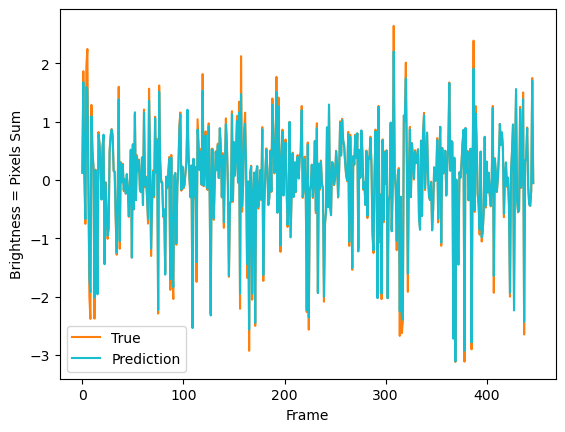

In [175]:
plt.plot(test_labels_ar, color='tab:orange', label='True')
plt.plot(preds, color='tab:cyan', label='Prediction')

plt.xlabel("Frame")
plt.ylabel("Brightness = Pixels Sum")

plt.legend()

plt.show()

(0.0, 100.0)

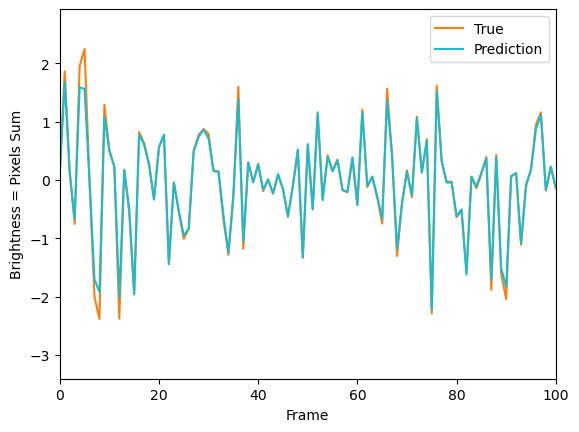

In [176]:
plt.plot(test_labels_ar, color='tab:orange', label='True')
plt.plot(preds, color='tab:cyan', label='Prediction')

plt.xlabel("Frame")
plt.ylabel("Brightness = Pixels Sum")

plt.legend()
plt.xlim(0, 100)

